# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

### Table of Contents
- [Part 0: Problem Statement](#problem_statement)
- [Part 1: Get to Know the Data: Cleaning and Exploratory Data Analysis](#know_the_data)
- [Part 2: Customer Segmentation Report](#customer_segmentation)    
- [Part 3: Supervised Learning for Mailout Prediction](#mailout_prediction)

## <a id='problem_statement'> Part 0: Problem Statement

### Project Definition:
The client Arvato Financial provides a suite of services to its customers such as fraud detection and credit management. Study of consumers is important for the company, since understanding the characteristics of customers is key to serving needs of customers and increasing customer retention. Understanding customers also helps to acquire more future customers and increase market share of the company. Mail-out campaign is one of the most traditional and relevant marketing channel for the company to interact with its customers. Understanding how customers respond to a mail-out campaign allows the company to concentrate its resources and target those with best chance of responding to the campaign. In light of this, Arvato Financial challenged us with two tasks: (1) to segment its customers and better understand the customer profiles and (2) to predict which customers have better chance of responding to the company's mail-out campaigns.

In this project, we are provided with three datasets that contain demographics data for customers of the company, the general population and  targets of a marketing campaign for the company along with their historical response. 

### Project Goals:
The goals of the project are to (1) understand the demographic difference between customers and the general population, and to (2) predict whether a NEW customer with demographics information can respond to the company's mail-out campaign.

### Strategy and Expected Solutions:
The number of demographic attributes, as shown below, is over 300 for each sample. In order to gain more insights into demographics data, we develop a data analysis pipeline for customer segmentation, which uses unsupervised learning to reduce the number of attributes and then cluster customers into segments. 

The reduced features of the demographic information, as well as customer clusters, can then be analyzed to provide typical customer profiles. The pipeline developed will then be used to analyze the population demographic. For specific customer segments, we can analyze how many of these customers are within the population, and whether they are more likely to become a customer than the general population. 

Then, using the pipeline, we transform the demographics information of a past mail-out compaign. Given response data to the compains, we then train supervised learning models to predict which individuals are most likely to convert into becoming customers for the company. 

We can optimize the pipeline and algorithm parameters to obtain best predictive power for customer response to the campagin. By interpreting the algortihms' features, one can better understand what drives a customer's response to campaign, and what this would potentially mean for customer converison. 


## <a id='know_the_data'> Part 1: Get to Know the Data </a>

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.


### Import Data:
We first import both the customers and population dataset from CSV files. The population dataset has been divided into several parts so that they can be downloaded from online workspace.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

import datetime
import math

In [2]:
import scipy.stats as stats 
import time
import random
import statistics

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score,silhouette_score


In [ ]:
# load in the data
#azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

In [3]:
customers = pd.read_csv('data/customers.csv')
del customers['Unnamed: 0']
customers.head()

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


LNR  AGER_TYP  AKT_DAT_KL  ALTER_HH  ALTER_KIND1  ALTER_KIND2  \
0    9626         2         1.0      10.0          NaN          NaN   
1    9628        -1         9.0      11.0          NaN          NaN   
2  143872        -1         1.0       6.0          NaN          NaN   
3  143873         1         1.0       8.0          NaN          NaN   
4  143874        -1         1.0      20.0          NaN          NaN   

   ALTER_KIND3  ALTER_KIND4  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ...  \
0          NaN          NaN                  10.0                  1.0  ...   
1          NaN          NaN                   NaN                  NaN  ...   
2          NaN          NaN                   0.0                  1.0  ...   
3          NaN          NaN                   8.0                  0.0  ...   
4          NaN          NaN                  14.0                  7.0  ...   

   VK_ZG11  W_KEIT_KIND_HH  WOHNDAUER_2008  WOHNLAGE  ZABEOTYP  \
0      2.0             6.0             9.0       7.0         3   
1      3.0             0.0             9.0       NaN         3   
2     11.0             6.0             9.0       2.0         3   
3      2.0             NaN             9.0       7.0         1   
4      4.0             2.0             9.0       3.0         1   

       PRODUCT_GROUP  CUSTOMER_GROUP ONLINE_PURCHASE ANREDE_KZ  \
0  COSMETIC_AND_FOOD     MULTI_BUYER               0         1   
1               FOOD    SINGLE_BUYER               0         1   
2  COSMETIC_AND_FOOD     MULTI_BUYER               0         2   
3           COSMETIC     MULTI_BUYER               0         1   
4               FOOD     MULTI_BUYER               0         1   

  ALTERSKATEGORIE_GROB  
0                    4  
1                    4  
2                    4  
3                    4  
4                    3  

[5 rows x 369 columns]

In [393]:
customers.shape

(191652, 369)

We note that each time we load the customers dataset, a warning message is shown, but the message does not indicate a corruption of data. This warning is only because columns (19, 20) have mixed data types of string and floats. Data in these two columns are cleaned in the cleaning step for numerical columns.

In [394]:
# import population datasets
population = pd.read_csv('data/azdias1.csv')
del population['Unnamed: 0']
print('Importing dataset')
print(population.shape)
for i in range(2,10):
    azdias_filename = 'data/azdias'+str(i)+'.csv'
    print('Importing dataset '+azdias_filename)
    population_add = pd.read_csv(azdias_filename)
    del population_add['Unnamed: 0']
    
    population = population.append(population_add, ignore_index=True)
    print(population.shape)

Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.


Importing dataset
(100000, 366)
Importing dataset azdias2.csv
(200000, 366)
Importing dataset azdias3.csv
(300000, 366)
Importing dataset azdias4.csv
(400000, 366)
Importing dataset azdias5.csv
(500000, 366)
Importing dataset azdias6.csv
(600000, 366)
Importing dataset azdias7.csv
(700000, 366)
Importing dataset azdias8.csv
(800000, 366)
Importing dataset azdias9.csv
(891221, 366)


In [395]:
population.shape

(891221, 366)

There are 3 columns that are in the customers dataset, but not in the population dataset, namely ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'). 

### Steps of Data Cleaning and EDA
The data cleaning and EDA (exploratory data analysis) process is divided into several steps as below. We clean attributes, process missing data, and build data pipelines.  Each of the steps described below include processing on both the customers and the population dataset. Each row is a unique sample in the dataset, and each column is a unique data attribute.     

- 1.1 [Clean Attributes](#clean_data)  
    a. Clean attributes with special unknown values  
    b. Clean NA for date-time attributes  
    c. Clean unique columns  

 
    
- 1.2 [Clean Missing Data](#missing_data)  
    a. Peek of missing data in customers vs. population datasets  
    b. Identify rows with significant amount of missing values  
    c. Clean columns with significant amount of missing values  
    d. Clean missing data in numerical attributes  
    e. Description statistics of numerical atributes  
    f. Clean missing data in categorical attributes  
    g. Description statistics of categorical attributes
    

- 1.3 [Data Cleaning Pipeline](#data_cleaning_pipeline)   
    a. Building pipeline for customers: main cluster vs. sub-cluster  
    b. Post-processing and categorical encoding for population  
    c. Building pipelien for population  
     
    
    

### <a id='clean_data'> 1.1 Clean Attributes </a> 

Many data attributes require cleaning. First, we clean attributes that have special unknown values. These include some ordinal data that assign a specific value to unknowns, as well as date-time objects that assign a value of 0 to unknowns. These special unknown values need to be processed before we clean missing data. Then, we clean other unique columns. These include attributes that engtangle several attributes together, and thus require pre-procesing to extract information. 

### 1.1.a  Clean Attributes with Special Unknown Values

We create a dictionary to map these special 'unknown' values to np.nan values, and replace these special unkown values with NA. We note that this step creates new NA values in the dataset, which will also need to be processed.


In [396]:

def find_col_names(df, substr):
    """
    find column names in dataframe df that contain a certain string substr
    INPUT: 
    df        (pandas dataframe) dataset with column names
    substr    (str) string for wchih we search column names with 
    
    OUTPUT:
    col_name   (list) of column names that contain the substr
    """
    t = [name.find(substr) >= 0 for name in  list(df.columns)]
    
    # find column indices
    col_ind =  [i for i, x in enumerate(t) if x]
    
    # find column names
    col_name = [list(df.columns)[i] for i in col_ind]
    return col_name

In [397]:
def create_unknown_dict(df):
    """
    Create dictionary (ordinal or numerical values) that identify columns/attributes with special unknown values.
    
    INPUT:
        df                      (pandas dataframe) dataset containing customer attributes
    OUTPUT:
        columns_dict            dictionary with these attributes as value and a numeric identifier as key
        val_unknown_dict        dictionary with these special unknown values as value and a numeric identifier as key
        columns_fill_unknown    column names/attributes that have special unknown values
    
    """
    
    columns_dict = {}
    val_unknown_dict = {}

    # unkown value -1
    columns = ['ORTSGR_KLS9', 'INNENSTADT' ,'BALLRAUM',
               'EWDICHTE', 'KBA05_ANTG1', 'KBA05_ANTG2','KBA05_ANTG3','KBA05_ANTG4',
               'D19_KK_KUNDENTYP' ]
    kba13_col = find_col_names(df, 'KBA13')
    kba13_col.remove('KBA13_ANZAHL_PKW')
    plz8_col = find_col_names(df, 'PLZ8')
    plz8_col.remove('PLZ8_BAUMAX')
    finanz_col = find_col_names(df, 'FINANZ')
    finanz_col.remove('FINANZTYP')

    columns = columns + kba13_col + plz8_col + finanz_col
    columns_dict[0] = columns
    val_unknown_dict[0] = [-1]

    # unkown value -1,0
    columns_dict[1] = ['W_KEIT_KIND_HH','WOHNDAUER_2008',
               'KBA05_BAUMAX','KBA05_GBZ',
               'KKK','HH_EINKOMMEN_SCORE','WOHNLAGE','ALTERSKATEGORIE_FEIN'
              ]
    val_unknown_dict[1] = [-1,0]

    # unkown value 0
    columns_dict[2] = ['ALTER_HH','RETOURTYP_BK_S']
                       
                      
    val_unknown_dict[2] = [0]

    # unkown value -1,9,0
    columns_dict[3] = ['ALTERSKATEGORIE_GROB']
    val_unknown_dict[3] = [-1, 9, 0]

    # unkown values -1,9
    columns = ['RELAT_AB','KOMBIALTER']
    kba05_col = find_col_names(df, 'KBA05')
    for to_remove in ['KBA05_BAUMAX','KBA05_GBZ','KBA05_ANTG1', 'KBA05_ANTG2','KBA05_ANTG3','KBA05_ANTG4']:
        kba05_col.remove(to_remove)
    
    semio_col = find_col_names(df,'SEMIO')
    columns = columns + kba05_col + semio_col
    columns_dict[4] = columns
    val_unknown_dict[4] = [-1, 9]
    
    columns_fill_unknown = []
    # enumerate columns with special unknown values as key
    for key in columns_dict.keys():
        columns = columns_dict[key]
        for column in columns:
        # append the columns to a list
            columns_fill_unknown.append(column)
        
    return columns_dict, val_unknown_dict, columns_fill_unknown 

In [398]:
def fill_encoded_na1(df, columns_dict, val_unknown_dict):
    """
    Fill columns/attributes with special unknown values.
    INPUT:
    columns_dict            dictionary with these attributes as value and a numeric identifier as key
    val_unknown_dict        dictionary with these special unknown values as value and a numeric identifier as key
    df                      Dataframe to be processed
        
    OUTPUT:
    df                      Dataframe we've processed and filled with special unknown values
    
    """

    # access key information
    for key in columns_dict.keys():
        columns = columns_dict[key]
        val_unknown = val_unknown_dict[key]
        
        # change those with unknown value of (unknown) to NA 
        for column in columns:
            # if the column exists in the dataframe
            if column in list(df.columns.values):
                y = df[column].to_list()
                select_unknown = [x in val_unknown for x in y]
                df.loc[select_unknown, column] = np.nan

    return df

In [399]:
columns_dict, val_unknown_dict, columns_fill_unknown = create_unknown_dict(customers)

In [400]:
customers = fill_encoded_na1(customers, columns_dict, val_unknown_dict)

In [401]:
population = fill_encoded_na1(population, columns_dict, val_unknown_dict)

In [13]:
def create_unknown_dict_category(df):
    """
    Create dictionary (categorical values) that identify columns/attributes with special unknown values.
    INPUT: 
    df                      (pandas dataframe) contains attributes of customers
    
    OUTPUT:
    columns_dict            dictionary with these attributes as value and a numeric identifier as key
    val_unknown_dict        dictionary with these special unknown values as value and a numeric identifier as key
    columns_fill_unknown    column names/attributes that have special unknown values
    """
        
    columns_dict = {}
    val_unknown_dict = {}

    # unkown value -1
    columns = ['AGER_TYP','FINANZTYP',
               'OST_WEST_KZ','SHOPPER_TYP','VERS_TYP'
              ]
    columns_dict[0] = columns
    val_unknown_dict[0] = [-1]

    # unkown value -1,0
    columns_dict[1] = ['ANREDE_KZ','GEBAEUDETYP','NATIONALITAET_KZ',
                       'PRAEGENDE_JUGENDJAHRE','REGIOTYP','TITEL_KZ',
                       'HEALTH_TYP'
              ]
    val_unknown_dict[1] = [-1,0]

    # unkown value 0
    columns_dict[2] = ['LP_FAMILIE_GROB','LP_FAMILIE_FEIN']
    val_unknown_dict[2] = [0]


    # unkown values -1,9
    columns = ['ZABEOTYP']
    columns_dict[3] = columns
    val_unknown_dict[3] = [-1, 9]
    
    columns_fill_unknown = []
    for key in columns_dict.keys():
        columns = columns_dict[key]
        for column in columns:
        # append the columns to a list
            columns_fill_unknown.append(column)
        
    return columns_dict, val_unknown_dict, columns_fill_unknown 

In [402]:
columns_dict_cat, val_unknown_dict_cat, columns_fill_unknown_cat  = create_unknown_dict_category(customers)


In [403]:
customers = fill_encoded_na1(customers, columns_dict_cat, val_unknown_dict_cat)


In [404]:
population = fill_encoded_na1(population, columns_dict_cat, val_unknown_dict_cat)

### 1.1.b Clean NA and Pre-process for Date-Time Attributes

There are several columns with numerical information relevant to dates, namely 'EINGEFUEGT_AM', 'GEBURTSJAHR', 'EINGEZOGENAM_HH_JAHR' and 'MIN_GEBAEUDEJAHR'. They translate to 'insert time' (likely the time the customer information is entered into a database), 'birth year', 'move-in year' and 'min building year'.

We perform 2 cleaning/data preprocessing steps:

1. Clean NA values: We see in the cell below that there are missing values in these columns in the form of 'NaN' in columns 'EINGEFUEGT_AM' and 'MIN_GEBAEUDEJAHR', and in the form of '0' in column 'GEBURTSJAHR'. We make sure we process  NA values in these date-time columns. 

2. We also transform these attributs to more meaningful numerical values, as number of years to year 2018, which is the latest time-stamp in these columns.

In [405]:
datetime_col = ['EINGEFUEGT_AM','GEBURTSJAHR', 'EINGEZOGENAM_HH_JAHR', 'MIN_GEBAEUDEJAHR'] 
customers[datetime_col].head(10)

EINGEFUEGT_AM  GEBURTSJAHR  EINGEZOGENAM_HH_JAHR  MIN_GEBAEUDEJAHR
0  1992-02-12 00:00:00            0                1994.0            1992.0
1                  NaN            0                2007.0               NaN
2  1992-02-10 00:00:00            0                1996.0            1992.0
3  1992-02-10 00:00:00            0                1997.0            1992.0
4  1992-02-12 00:00:00         1960                1997.0            1992.0
5  1992-02-10 00:00:00            0                1994.0            1992.0
6  1992-02-10 00:00:00         1942                1994.0            1992.0
7  1992-02-10 00:00:00         1938                1994.0            1992.0
8  2004-10-14 00:00:00         1914                2015.0            1994.0
9  1997-07-14 00:00:00         1959                1997.0            1997.0

In [18]:
def clean_time_columns_na(df):
    """Convert date-time columns to number and change special unknown values to np.nan"""
    
    
    # clean column 'EINGEFUEGT_AM'
    df['EINGEFUEGT_AM'] = df['EINGEFUEGT_AM'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') if isinstance(x,str) else x)
    
    
    # clean GEBURTSJARH column
    # find missing data (value 0)
    find_zero = df['GEBURTSJAHR'] == 0
    
    # replace the data with np.nan
    df.loc[find_zero, 'GEBURTSJAHR'] = np.nan

    return df

In [406]:
customers = clean_time_columns_na(customers)

In [407]:
population = clean_time_columns_na(population)

In [21]:
# change to YEARS to 2018 for all columns
def clean_datetime_columns(df):
    """Convert date-time columns to number of years to year 2018"""
    
    # identify date time column, except EINGEFUEGT_AM that contains date-time objects
    datetime_col = ['GEBURTSJAHR', 'EINGEZOGENAM_HH_JAHR', 'MIN_GEBAEUDEJAHR'] 

    # transform value to YEARS to 2018
    for col in datetime_col:
        if col in list(df.columns):
            df[col] = 2018 - df[col]
    
    # change value in EINGEFUEGT_AM to nubmer of years to 2018
    if 'EINGEFUEGT_AM' in list(df.columns):
        end_time = x = datetime.datetime(2018, 1, 1)
        df['EINGEFUEGT_AM'] = df['EINGEFUEGT_AM'].apply(lambda x: (end_time - x).days/365 if pd.notnull(x) else x)
        df.loc[df['EINGEFUEGT_AM'].isnull(), 'EINGEFUEGT_AM'] = np.nan
    
    return df

In [408]:
customers = clean_datetime_columns(customers)

In [409]:
population = clean_datetime_columns(population)

### 1.1.c Clean Unique Columns

We first clean several unique columns that needs pre-processing below. 

- The OST_WEST_KZ column include west or east Germany info. We change strings to integers (i.e. 1 indicates west and 0 indicates east).
- The D19_LETZTER_KAUF_BRANCHE column indicates branch of merchandise person last purchases. We create a dictionary and change these strings to numbers. Such dictionary is saved and used to map the same attribute in population dataset.


In [24]:
def clean_ost_west_cols(df): 
    """Convert OST_WEST_Col from string to number (West = 1, Oriental/East = 0)"""
    
    # if we have not removed column
    if 'OST_WEST_KZ' in list(df.columns):
        # convert string to numeric value
        df['OST_WEST_KZ'] = df['OST_WEST_KZ'].apply(lambda x: 1 if x == 'W' else (0 if x == 'O' else np.nan))
    
    return df

In [25]:
def clean_d19_letzer(df, d19_letzer_dict):   
    """
    Convert D19_LETZTER_KAUF_BRANCHE column to number and output the dictionary that maps the string to number
    If no dict is passed, this mapping is first created using df dataset, 
    If the dict is passed, this mapping is USED to map values in columm D19_LETZTER_KAUF_BRANCHE
    
    INPUT:
    df                (pandas dataframe) dataset that could contain the column D19_LETZTER_KAUF_BRANCHE
    d19_letzer_dict   (dict) dictionary to map the strings to numbers in the column D19_LETZTER_KAUF_BRANCHE
                      This dict could be empty
    
    OUTPUT:
    df                (pandas dataframe) cleaned dataset with NUMERICAL value for column D19_LETZTER_KAUF_BRANCHE
    d19_letzer_dict   (dict) dictionary to map the strings to numbers in the column D19_LETZTER_KAUF_BRANCHE
    """
    
    # if we have not removed the column
    if 'D19_LETZTER_KAUF_BRANCHE' in list(df.columns):
        
         # create new dictionary if no dict is passed (i.e. is empty)
        dict_empty = not bool(d19_letzer_dict)
        if dict_empty: 
            d19_letzer_dict = {}
            cnt = 0
            for value in df['D19_LETZTER_KAUF_BRANCHE'].unique():
                if not pd.isna(value):
                    d19_letzer_dict[value] = cnt
                    cnt += 1
                else: 
                    d19_letzer_dict[value] = np.nan
        
        
         # We map all categories to numbers using map() 
        df['D19_LETZTER_KAUF_BRANCHE'] = df['D19_LETZTER_KAUF_BRANCHE'].apply(lambda x: d19_letzer_dict[x])

    return df, d19_letzer_dict

In [410]:
customers = clean_ost_west_cols(customers)
customers, d19_letzer_dict_customers = clean_d19_letzer(customers, {})


In [411]:
population = clean_ost_west_cols(population)
population, d19_letzer_dict_population = clean_d19_letzer(population, d19_letzer_dict_customers)


We continue to clean more unique columns. These attributes have several pieces of distinct information, so new columns are created to include these pieces of information separately. 

- The CJT_GESAMTTYP attribute includes info on interest in advertising and shopping channels (e.g. online, in-store or cross-channel).
- Many attributes that start with D19 are ordinal data that have value 0 misplaced. Values starting from 1-7 indicate frequency and likelihood of purchase in the last 24 months, with 1 indicating multi-buyer and 7 indicating prospect buyer more than 2 years ago. However, 0 indicate no actiivty known. We change value 0 to 8, to indicate NO transations at all.
- The GEBAEUDETYP column includes info on type of building (commericial or residential), and whether there are known households/companies inside the building. 
- 'LP_FAMILIE_FEIN' and 'LP_FAMILIE_GROB' both have 0 as special unknown values and changed to NA values. The LP_FAMILIE_FEIN column includes info on age of child, and number of generations living in the household. 
- 'LP_LEBENSPHASE_GROB' and 'LP_LEBENSPHASE_FEIN' both have 0 as special unknown values. These columns also include relative age, income and status of home-ownership/financials. 
- PRAEGENDE_JUGENDJAHRE attributes includes information on year of youth movements (i.e. 40s, 50s etc), whether it's main-stream or avantgarde and location of movements (i.e. west, east or both).



In [28]:
def clean_unique_cols_na(df):
    """
    Clean unique columns in the dataframe df, including these columns below and output cleaned dataframe.
    
    CJT_GESAMTTYP                          create CJT_GESAMTTYP_Advertising and CJT_GESAMTTYP_Channel to:
                                            indicate level of interest in advertising & cross-channel behavior
    some columns that start with D19       replace 8 with 0, so these values follow  a ordinal logic
    GEBAEUDETYP                            create new columns GEBAEUDETYP_Type, GEBAEUDETYP_KnownHousehold, GEBAEUDETYP_KnownCompany to indicate:
                                            type of building (residential, commericial or mixed)
                                            whether there is known household or known company in the building
    LP_FAMILIE_FEIN                        create LP_FAMILIE_Child and LP_FAMILIE_Generation columns to indicate:
                                            age of child in the family and whether there is generational living in the family
    LP_FAMILIE_GROB                        replace special unknown value of 0 to np.nan
    LP_LEBENSPHASE_FEIN                    LP_LEBENSPHASE_FEIN_income, LP_LEBENSPHASE_FEIN_age and LP_LEBENSPHASE_FEIN_other to indicate:
                                            level of income, age and whether homeowner
    LP_LEBENSPHASE_GROB                    create LP_LEBENSPHASE_GROB_income and LP_LEBENSPHASE_GROB_age columns to indicate:
                                            level of income and age for the customer
    PRAEGENDE_JUGENDJAHRE                  create PRAEGENDE_JUGENDJAHRE_year, PRAEGENDE_JUGENDJAHRE_movement and PRAEGENDE_JUGENDJAHRE_ow columns to indicate:
                                            decade the movement happened, whether movement is main-stream or avantgarde and whether movement is in west /east germany
    WOHNLAGE                                create WOHNLAGE_Rural column to indicate if the neighborhood is rural
                                            update orginal column to remove this rural information
    
    """
    
    ### Clean Column CJT_GESAMTTYP and create columns for advertising and channel of advertising
    
    # fill unknown values in CJT_GESAMTTYP
    columns_dict = {}
    val_unknown_dict = {}
    columns = ['CJT_GESAMTTYP']
    columns_dict[0] = columns
    val_unknown_dict[0] = [0]
    df = fill_encoded_na1(df, columns_dict, val_unknown_dict)
    
    # extract advertising info
    df['CJT_GESAMTTYP_Advertising'] = df['CJT_GESAMTTYP'].apply(lambda x: math.ceil(x/2) if not pd.isna(x) else x)
    
    # change values of 1 and 2 to unknown, leave others unchanged
    df['CJT_GESAMTTYP_Channel'] = df['CJT_GESAMTTYP'].copy()
    df['CJT_GESAMTTYP_Channel'] = df['CJT_GESAMTTYP_Channel'].apply(lambda x: np.nan if (x==1 or x==2) else x)
    
    # drop original column
    df = df.drop(columns = ['CJT_GESAMTTYP'])
    
    ### Clean some D19 columns
    # change value of 0 to 8, so these value follows a rank-based logic
    d19_cols = ['D19_BANKEN_DIREKT','D19_BANKEN_GROSS','D19_BANKEN_LOKAL',
                'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH','D19_BEKLEIDUNG_REST',
                'D19_BILDUNG','D19_BIO_OEKO','D19_BUCH_CD','D19_DIGIT_SERV',
                'D19_DROGERIEARTIKEL','D19_ENERGIE','D19_FREIZEIT','D19_GARTEN',
                'D19_HANDWERK', 'D19_HAUS_DEKO','D19_KINDERARTIKEL',
                'D19_KOSMETIK','D19_LEBENSMITTEL','D19_LOTTO', 'D19_NAHRUNGSERGAENZUNG',
                'D19_RATGEBER','D19_REISEN','D19_SAMMELARTIKEL','D19_SCHUHE',
                'D19_SONSTIGE', 'D19_SOZIALES', 'D19_TECHNIK','D19_TELKO_REST',
                'D19_TELKO_MOBILE','D19_TIERARTIKEL','D19_VERSAND_REST','D19_VERSICHERUNGEN',
                'D19_VOLLSORTIMENT', 'D19_WEIN_FEINKOST' ]
    for d19_col in d19_cols:
        df[d19_col] = df[d19_col].apply(lambda x: 8 if x==0 else x)
    
    ### Clean GEBAEUDETYP that contains info on type of residence and whether info is known about tenants
    
    # change GEBAEUDETYP with -1,0-value (special unknowns) as np.nan values
    columns_dict = {}
    val_unknown_dict = {}
    columns = ['GEBAEUDETYP']
    columns_dict[0] = columns
    val_unknown_dict[0] = [-1,0]
    df = fill_encoded_na1(df, columns_dict, val_unknown_dict)
    
    # create dictionary to map data to residential type and create new column 
    dict_GEBAEUDETYP = dict.fromkeys([1,2], 0) # residential
    dict_GEBAEUDETYP.update(dict.fromkeys([3,4,6,8], 1)) # company
    dict_GEBAEUDETYP.update(dict.fromkeys([5,7], np.nan)) # mixed-> there is only 1 entry in all datasets, clearly an outlier
    df['GEBAEUDETYP_Type'] = df['GEBAEUDETYP'].apply(lambda x: dict_GEBAEUDETYP[x] if pd.notnull(x) else x)
                
    # create dictionary to map data (with known household, without known hosuehold, with known company, without known company)
    # create new column to contain such information
    dict_GEBAEUDETYP_KnownHousehold = dict.fromkeys([1,3,8], 1)
    dict_GEBAEUDETYP_KnownHousehold.update(dict.fromkeys([2,4,5,6,7], 0))
    dict_GEBAEUDETYP_KnownCompany = dict.fromkeys([3,6,7], 1)
    dict_GEBAEUDETYP_KnownCompany.update(dict.fromkeys([1,2,4,5,8], 0))
    df['GEBAEUDETYP_KnownHousehold'] = df['GEBAEUDETYP'].apply(lambda x: dict_GEBAEUDETYP_KnownHousehold[x] if pd.notnull(x) else x)
    df['GEBAEUDETYP_KnownCompany'] = df['GEBAEUDETYP'].apply(lambda x: dict_GEBAEUDETYP_KnownCompany[x] if pd.notnull(x) else x)
    
    # drop original column
    df = df.drop(columns = 'GEBAEUDETYP')
    
    # ###### Clean LP_FAMILIE_GROB and LP_FAMILIE_FEIN columns
    # change LP_FAMILIE_FEIN and  LP_FAMILIE_GROB with 0-value (special unknowns) as np.nan values
    columns_dict = {}
    val_unknown_dict = {}
    columns = ['LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB']
    columns_dict[0] = columns
    val_unknown_dict[0] = [0]
    df = fill_encoded_na1(df, columns_dict, val_unknown_dict)
    
    # create additional column with info about children's age within household, and whether household is generational
    dict_FAMILIE = dict.fromkeys([1,2], 0) # no child
    dict_FAMILIE.update(dict.fromkeys([3,6], 1)) # small child
    dict_FAMILIE.update(dict.fromkeys([4,7], 2)) # teenage child
    dict_FAMILIE.update(dict.fromkeys([5,8], 3)) # adult child
    dict_FAMILIE.update(dict.fromkeys([9,10,11], 4)) # generational households
    
    dict_FAMILIE_Generation = dict.fromkeys([1,2,3,4,5,6,7,8],0 ) # not shared, not generational
    dict_FAMILIE_Generation.update(dict.fromkeys([9], 1)) # shared
    dict_FAMILIE_Generation.update(dict.fromkeys([10], 2)) # two-generations
    dict_FAMILIE_Generation.update(dict.fromkeys([11], 3)) # more than two-generations

    df['LP_FAMILIE_Child'] = df['LP_FAMILIE_FEIN'].apply(lambda x: dict_FAMILIE[x] if pd.notnull(x) else x)
    df['LP_FAMILIE_Generation'] = df['LP_FAMILIE_FEIN'].apply(lambda x: dict_FAMILIE_Generation[x] if pd.notnull(x) else x)
    
    # drop original column
    df = df.drop(columns = 'LP_FAMILIE_FEIN')
    
    ##### Clean columns LP_LEBENSPHASE_GROB and LP_LEBENSPHASE_FEIN
    #'LP_LEBENSPHASE_GROB' contains info on income and relative age combinations, in addition to family 
    # LEBENSPHASE_FEIN contains more detailed age, income and asset-ownership info
    
    # unknown values are 0, change to np.nan
    columns_dict = {}
    val_unknown_dict = {}
    columns = ['LP_LEBENSPHASE_GROB','LP_LEBENSPHASE_FEIN']
    columns_dict[0] = columns
    val_unknown_dict[0] = [0]
    df = fill_encoded_na1(df, columns_dict, val_unknown_dict)
    
    # income info
    dict_LBENSPHASE_income = dict.fromkeys([1,2,4,7,9,10], 0) # low-income to average earner,
    dict_LBENSPHASE_income.update(dict.fromkeys([3,5,8,11,12], 1))#  high-income
    dict_LBENSPHASE_income.update(dict.fromkeys([6], np.nan))# single parents, no info on income
    
    #  age info
    dict_LBENSPHASE_age = dict.fromkeys([1,9,11], 0) # younger age
    dict_LBENSPHASE_age.update(dict.fromkeys([2,10,12], 1))#  higher age
    dict_LBENSPHASE_age.update(dict.fromkeys([3,4,5,6,7,8], np.nan))# no info on age
    
    # create new columns with info on income and age
    df['LP_LEBENSPHASE_GROB_income'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: dict_LBENSPHASE_income[x] if pd.notnull(x) else x)
    df['LP_LEBENSPHASE_GROB_age'] = df['LP_LEBENSPHASE_GROB'].apply(lambda x: dict_LBENSPHASE_age[x] if pd.notnull(x) else x)
    
    # drop original column
    df = df.drop(columns = 'LP_LEBENSPHASE_GROB')

    
    # income atttribute for LP_LEBENSPHASE_FEIN
    dict_LBENSPHASE_FEIN_income = dict.fromkeys([1,2,5,6,14,21,24,29,31], 0) # low-income 
    dict_LBENSPHASE_FEIN_income.update(dict.fromkeys([3,4,7,8,15,16,22,25,30,32], 1))#  average earner
    dict_LBENSPHASE_FEIN_income.update(dict.fromkeys([13,20,23,28,35,39,40], 2))#  top-earner
    dict_LBENSPHASE_FEIN_income.update(dict.fromkeys([9,10,11,12,17,18,19,26,27,33,34,36,37,38], np.nan))# no info on income, but on asset/family
    # this constitutes about 25% of the datasets
    
    # age
    dict_LBENSPHASE_FEIN_age = dict.fromkeys([1,3,14,18,29,30,33,34,35], 0) # younger age
    dict_LBENSPHASE_FEIN_age.update(dict.fromkeys([2,4,39], 1))#  middle age
    dict_LBENSPHASE_FEIN_age.update(dict.fromkeys([5,7,11,13,15,16,19,20,31,32,36,37], 2))#  advanced/higher age
    dict_LBENSPHASE_FEIN_age.update(dict.fromkeys([6,8,12,38,40], 3))# retirement age
    dict_LBENSPHASE_FEIN_age.update(dict.fromkeys([9,10,17,21,22,23,24,25,26,27,28], np.nan))# no info on age
    
    # homeowner, independent, wealthy homeowner
    dict_LEBENSPHASE_FEIN_other = dict.fromkeys([9,17,26,33,36], 0) # independent
    dict_LEBENSPHASE_FEIN_other.update(dict.fromkeys([11,12,19,27,34,37,38], 1))#  homeowner
    dict_LEBENSPHASE_FEIN_other.update(dict.fromkeys([10,18,], 2))#  wealthy homeowner
    dict_LEBENSPHASE_FEIN_other.update(dict.fromkeys([1,2,3,4,5,6,7,8,13,14,15,16,20,21,22,23,24,25,28,29,30,31,32,35,39,40], np.nan))#  no info
    
    # create new columns with info on income, age and financials
    df['LP_LEBENSPHASE_FEIN_income'] = df['LP_LEBENSPHASE_FEIN'].apply(lambda x: dict_LBENSPHASE_FEIN_income[x] if pd.notnull(x) else x)
    df['LP_LEBENSPHASE_FEIN_age'] = df['LP_LEBENSPHASE_FEIN'].apply(lambda x: dict_LBENSPHASE_FEIN_age[x] if pd.notnull(x) else x)
    df['LP_LEBENSPHASE_FEIN_other'] = df['LP_LEBENSPHASE_FEIN'].apply(lambda x: dict_LEBENSPHASE_FEIN_other[x] if pd.notnull(x) else x)
    
    # drop original column
    df = df.drop(columns = 'LP_LEBENSPHASE_FEIN')
    
    
    #### column 'PRAEGENDE_JUGENDJAHRE' contains info on both year and whether mainstream or avantgarde
    # changed -1,0 to np.nan already
    
    # age
    dict_JUGENDJAHRE_year = dict.fromkeys([1,2], 0) # 40s
    dict_JUGENDJAHRE_year.update(dict.fromkeys([3,4], 1))#  50s
    dict_JUGENDJAHRE_year.update(dict.fromkeys([5,6,7], 2))#  60s
    dict_JUGENDJAHRE_year.update(dict.fromkeys([8,9], 3))# 70s
    dict_JUGENDJAHRE_year.update(dict.fromkeys([10,11,12,13], 4))# 80s
    dict_JUGENDJAHRE_year.update(dict.fromkeys([14,15], 5))# 90s
    
    # movement type
    dict_JUGENDJAHRE_movement = dict.fromkeys([1,3,5,8,10,12,14], 0) # main-stream 
    dict_JUGENDJAHRE_movement.update(dict.fromkeys([2,4,6,7,9,11,13,15], 1))# avantgarde 

    # movement location
    dict_JUGENDJAHRE_ow = dict.fromkeys([1,2,3,4,5,8,9,14,15], 0) # o+w
    dict_JUGENDJAHRE_ow.update(dict.fromkeys([7,12,13], 1))# o only 
    dict_JUGENDJAHRE_ow.update(dict.fromkeys([6,10,11], 1))# w only
    
    # create new columns for these info
    df['PRAEGENDE_JUGENDJAHRE_year'] = df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: dict_JUGENDJAHRE_year[x] if pd.notnull(x) else x)
    df['PRAEGENDE_JUGENDJAHRE_movement'] = df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: dict_JUGENDJAHRE_movement[x] if pd.notnull(x) else x)
    df['PRAEGENDE_JUGENDJAHRE_ow'] = df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: dict_JUGENDJAHRE_ow[x] if pd.notnull(x) else x)
    
    # drop original column
    df = df.drop(columns = 'PRAEGENDE_JUGENDJAHRE')
    
    ### clean WOHNLAGE column as it includes two info
    # -1,0 info already encoded as NaN 
    
    # create new column indicating whether it's rural
    df['WOHNLAGE_Rural'] = df['WOHNLAGE'].apply(lambda x: 1 if (x==7 or x==8) else 0)
    
    # update original column so that rural neighborhood are NA
    df['WOHNLAGE'] = df['WOHNLAGE'].apply(lambda x: np.nan if (x==7 or x==8) else x)
    
    
    
    
    return df

In [412]:
customers = clean_unique_cols_na(customers)

In [413]:
population = clean_unique_cols_na(population)

There are three additional unique columns that start with 'CAMEO'. 

- The 'CAMEO_DEUG_2015' column encode class information, with a smaller value indicating higher social class. Both 'X' and -1 indicate a unknown value. It contains both class information (i.e. middle or working class) and which speciifc middle-class the person belongs to.

- The 'CAMEO_INTL_2015' column encodes both wealth and family information, with the first digit containing wealth info and second digit containing family info. 

- The 'CAMEO_DEU_2015' column contains more than 30 types of descriptive classification about the person such as 'single parent', but it is very hard to infer ordinal or numerical information from these types. We simply change the strings to integers so that maybe one-hot encoded as separate categories later.


In [31]:
def clean_cameo_cols(df):
    """
    Clean columns in input dataframe df that start with CAMEO and output cleaned dataframe df. 
    These columns include:
    CAMEO_DEUG_2015            change special unknown value to np.nan value
                               create new CAMEO_DEUG_Class and CAMEO_DEUG_MidClass columns to indicate class and consumption 
    CAMEO_INTL_2015            create CAMEO_INTL_2015_wealth and CAMEO_INTL_2015_family columns to indicate:
                                whether household is wealthy and stage of the family (e.g. pre-family singles)
    CAMEO_DEU_2015             change CAMEO_DEU_2015 to numerical value so this attribute is easier to categorize
    
    """

    ### Clean CAMEO_DEUG_2015 column 
    # convert s'X' to np.nan
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].apply(lambda x: np.nan if x=='X' else x)

    # convert str to float
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].apply(lambda x: float(x) if not pd.isna(x) else x)
 
    # change CAMEO_DEUG_2015 with -1 values (special unknowns) as np.nan values
    columns_dict = {}
    val_unknown_dict = {}
    columns = ['CAMEO_DEUG_2015']
    columns_dict[0] = columns
    val_unknown_dict[0] = [-1]
    df = fill_encoded_na1(df, columns_dict, val_unknown_dict)
    
    # extract info about class and consumption
    dict_CAMEO_class = dict.fromkeys([1], 0) # upper class
    dict_CAMEO_class.update(dict.fromkeys([2,3,4,5,6,7], 1))#  middleclass
    dict_CAMEO_class.update(dict.fromkeys([8,9], 2))# working class
    df['CAMEO_DEUG_Class'] = df['CAMEO_DEUG_2015'].apply(lambda x: dict_CAMEO_class[x] if pd.notnull(x) else x)
    df['CAMEO_DEUG_MidClass'] = df['CAMEO_DEUG_2015'].apply(lambda x: 0 if (x==1 or x==8 or x==9) else (x-1 if pd.notnull(x) else x))     # extract info about different divisions of middleclass 
    
    df = df.drop(columns = ['CAMEO_DEUG_2015'])
    
    ##### Clean CAMEO_INTL_2015 column 
    # convert 'XX' to nan
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].apply(lambda x: np.nan if x=='XX' else x)

    # convert str to float
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].apply(lambda x: int(float(x)) if not pd.isna(x) else x)
    
    # first str and second str to two different columns, if -1, stay as it is
    df['CAMEO_INTL_2015_wealth'] = df['CAMEO_INTL_2015'].apply(lambda x: x//10 if not pd.isna(x) else x)
    df['CAMEO_INTL_2015_family'] = df['CAMEO_INTL_2015'].apply(lambda x: x%10 if not pd.isna(x) else x)
    
    # drop original CAMEO_INTL_2015
    df = df.drop(columns = ['CAMEO_INTL_2015'])
    
    # change CAMEO_INTL_xxx columns with -1 as np.nan values
    columns_dict = {}
    val_unknown_dict = {}
    columns = ['CAMEO_INTL_2015_wealth', 'CAMEO_INTL_2015_family']
    columns_dict[0] = columns
    val_unknown_dict[0] = [-1]
    df = fill_encoded_na1(df, columns_dict, val_unknown_dict)
    
    #### Clean CAMEO_DEU_2015 column 
    # convert NaN values to 'XX'
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].apply(lambda x: 'XX' if pd.isna(x) else x)
    
    # change alphabetical A-E to numbers (type str)
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].apply(lambda x: x.replace('A','0'))
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].apply(lambda x: x.replace('B','1'))
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].apply(lambda x: x.replace('C','2'))
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].apply(lambda x: x.replace('D','3'))
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].apply(lambda x: x.replace('E','4'))
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].apply(lambda x: x.replace('F','5'))
   
    # change strings to int, note 'XX' are mapped as NaN
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].apply(lambda x: int(float(x)) if x != 'XX' else np.nan)

    
    return df

In [414]:
customers = clean_cameo_cols(customers)

In [415]:
population = clean_cameo_cols(population)

In [416]:
# save cleaned datasets
cleaned_customers_one = customers.copy()
cleaned_population_one = population.copy()

In [417]:
# load cleaned datastes
customers = cleaned_customers_one.copy()
population = cleaned_population_one.copy()

## <a id=missing_data> 1.2 Numerical Data </a>

We first take a peek of NA/missing values in the dataset, and then go on to clean missing data. For numerical or ordinal data, we fill with the mean or median of data values, depending on the outlier fraction of the attribute data. For categorical data, we use one-hot encoding to turn categorical data to binary data. Then we desribe statistical properties of the various cleaned data attributes. 

### 1.2.a Peek into dataset




We first peek into the dataset and use the attributes Excel sheets to identify numerical or categorical columns. After these columns are identified, we make sure that we have covered all attributes in the dataset. Afterwards, we take a look at the fraction of NA values.

In [36]:
 def find_category_cols(df):
    """
    Find list of category columns and the corresponding prefix that are IN THE dataframe df.
    Those categorical attributes not in the dataframe are not output. 
    
    INTPUT:
    df      (pandas dataframe) dataset that contains demographic column
    
    OUTPUT:
    columns_select     (list) of categorical columns in the dataframe df
    prefix_list_select (list) of prefixes for the categorical column in the dataframe df
    
    """

    columns = [
               'AGER_TYP','ANREDE_KZ','CAMEO_DEUG_MidClass','CAMEO_DEU_2015','CAMEO_DEUG_MidClass',
               'CJT_GESAMTTYP_Channel','CJT_KATALOGNUTZER',
               'CJT_TYP_1','CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6',
               'DSL_FLAG','D19_KONSUMTYP','D19_KONSUMTYP_MAX','D19_LETZTER_KAUF_BRANCHE',
               'FINANZTYP','GEBAEUDETYP_Type','GEBAEUDETYP_KnownHousehold',
               'GEBAEUDETYP_KnownCompany','GEMEINDETYP','GFK_URLAUBERTYP',
               'GREEN_AVANTGARDE','HEALTH_TYP','HH_DELTA_FLAG',
               'KBA05_MAXHERST','KOMBIALTER','KONSUMZELLE',
               'LP_FAMILIE_Child','LP_FAMILIE_Generation','LP_FAMILIE_GROB',
               'LP_LEBENSPHASE_FEIN_other','NATIONALITAET_KZ',
               'OST_WEST_KZ','LP_STATUS_FEIN','LP_STATUS_GROB',
               'PRAEGENDE_JUGENDJAHRE_movement','PRAEGENDE_JUGENDJAHRE_ow',
               'REGIOTYP','SHOPPER_TYP','SOHO_KZ','STRUKTURTYP',
               'UNGLEICHENN_FLAG','WOHNLAGE_Rural',
               'ZABEOTYP','VERS_TYP'
              ]
 

    
    columns_select =[]
    
    # remove columns and prefix that are NOT in dataframe df columns
    for col in df.columns:
        if col in columns:
            columns_select.append(col)
    
    # use same names for prefix
    prefix_list_select = columns_select.copy()
    
    
    return columns_select, prefix_list_select

In [418]:

columns_category, prefix_list = find_category_cols(customers)

In [39]:
def find_numerical_cols(df):
    """
    Return list of numerical columns AND in the dataframe. 
    
    INPUT:
    df                       (pandas dataframe) dataset that contains demographic attributes
    
    OUTPUT:
    columns_fill_numerical   (list) of numerical column names in the dataframe df
    
    """
    #### fill numerical data 
    columns_fill_numerical = ['ANZ_KINDER', 'AKT_DAT_KL','ANZ_STATISTISCHE_HAUSHALTE','ARBEIT',
                              'ALTERSKATEGORIE_GROB','ALTERSKATEGORIE_FEIN','ALTER_HH',
                              'ANZ_HAUSHALTE_AKTIV','ANZ_HH_TITEL','ANZ_PERSONEN',
                              'ANZ_TITEL','BALLRAUM',
                              'CAMEO_DEUG_Class','CAMEO_INTL_2015_wealth','CAMEO_INTL_2015_family',
                              'CJT_GESAMTTYP_Advertising','EXTSEL992','KK_KUNDENTYP',
                              'EWDICHTE','EINGEZOGENAM_HH_JAHR','EINGEFUEGT_AM',
                              'FIRMENDICHTE','GEBAEUDETYP_RASTER',
                              'GEBURTSJAHR','GEOSCORE_KLS7','HH_EINKOMMEN_SCORE',
                              'INNENSTADT','KKK','KONSUMNAEHE',
                              'LP_LEBENSPHASE_FEIN_income','LP_LEBENSPHASE_FEIN_age',
                              'LP_LEBENSPHASE_GROB_income','LP_LEBENSPHASE_GROB_age',
                              'MIN_GEBAEUDEJAHR','MOBI_RASTER','MOBI_REGIO','ONLINE_AFFINITAET',
                              'ORTSGR_KLS9','PRAEGENDE_JUGENDJAHRE_year','RELAT_AB',
                              'RETOURTYP_BK_S','UMFELD_ALT','UMFELD_JUNG',
                              'VERDICHTUNGSRAUM','VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11',
                              'WOHNDAUER_2008','WOHNLAGE','WACHSTUMSGEBIET_NB','W_KEIT_KIND_HH']

    # find columns that start with D19  and remove non-numerical dataset
    d19_col = find_col_names(df, 'D19')
    if 'D19_KONSUMTYP' in d19_col:
        d19_col.remove('D19_KONSUMTYP')
    if 'D19_KONSUMTYP_MAX' in d19_col:
        d19_col.remove('D19_KONSUMTYP_MAX')
    if 'D19_LETZTER_KAUF_BRANCHE' in d19_col:
        d19_col.remove('D19_LETZTER_KAUF_BRANCHE')
    
    # find columns that start with FINANZ and remove those non-numerical
    finanz_col = find_col_names(df, 'FINANZ')
    if 'FINANZTYP' in finanz_col:
        finanz_col.remove('FINANZTYP')
    
    # find columns that start with KBA and remove those non-numerical
    kba_col = find_col_names(df,'KBA')
    if 'KBA05_MAXHERST' in kba_col:
        kba_col.remove('KBA05_MAXHERST')
    
    # find columns that start with PLZ8, RT and SEMIO
    PLZ8col = find_col_names(df,'PLZ8')
    rtcol = find_col_names(df,'RT')
    semiocol = find_col_names(df, 'SEMIO')
    
    # combine all above numerical columns
    columns_fill_numerical.extend(d19_col)
    columns_fill_numerical.extend(finanz_col)
    columns_fill_numerical.extend(kba_col)
    columns_fill_numerical.extend(PLZ8col)
    columns_fill_numerical.extend(rtcol)
    columns_fill_numerical.extend(semiocol)
    
    # return cols that are numerical, remove those NOT in dataframe  
    temp_list = columns_fill_numerical.copy()
    for col in temp_list:
        if col not in list(df.columns):
            columns_fill_numerical.remove(col)          
    
    
    return columns_fill_numerical

In [419]:
columns_fill_numerical  = find_numerical_cols(customers)

Using the above functions, we check that have covered all attributes except unique identifier LNR, three attributes unique to customers dataset (aka 'ONLINE_PURCHASE', 'PRODUCT_GROUP', 'CUSTOMER_GROUP') as well as attributes clearly with too much missing values.

In [41]:
column_names = customers.columns
columns_processed = columns_fill_numerical.copy()
columns_processed.extend(columns_category)

columns_unprocessed = list(set(column_names) - set(columns_processed))
print('Columns we have not processed: ')
print(columns_unprocessed)

print(customers[columns_unprocessed].isnull().sum()/customers.shape[0])

Columns we have not processed: 
['PRODUCT_GROUP', 'ALTER_KIND3', 'CUSTOMER_GROUP', 'LNR', 'ALTER_KIND2', 'ALTER_KIND4', 'ALTER_KIND1', 'ONLINE_PURCHASE', 'TITEL_KZ']
PRODUCT_GROUP      0.000000
ALTER_KIND3        0.993347
CUSTOMER_GROUP     0.000000
LNR                0.000000
ALTER_KIND2        0.973389
ALTER_KIND4        0.998769
ALTER_KIND1        0.938607
ONLINE_PURCHASE    0.000000
TITEL_KZ           0.987936
dtype: float64


We look at missing value fractions in these datasets before cleaning. 

In [42]:
for col in columns_category:
    col_na_customers = customers[col].isnull().sum()/customers.shape[0]
    col_na_pop = population[col].isnull().sum()/population.shape[0]
    
    if (col_na_customers > 0.05) | (col_na_pop > 0.05):
        print('For column {}: fraction of NA {} for customers and {} for population'.format(col, round(col_na_customers,4), round(col_na_pop,4)))
          


For column AGER_TYP: fraction of NA 0.4806 for customers and 0.7602 for population
For column CAMEO_DEU_2015: fraction of NA 0.2638 for customers and 0.1115 for population
For column D19_KONSUMTYP: fraction of NA 0.2489 for customers and 0.2885 for population
For column D19_LETZTER_KAUF_BRANCHE: fraction of NA 0.2489 for customers and 0.2885 for population
For column DSL_FLAG: fraction of NA 0.2605 for customers and 0.1045 for population
For column GEMEINDETYP: fraction of NA 0.2634 for customers and 0.1091 for population
For column HEALTH_TYP: fraction of NA 0.2556 for customers and 0.1248 for population
For column HH_DELTA_FLAG: fraction of NA 0.2804 for customers and 0.1207 for population
For column KBA05_MAXHERST: fraction of NA 0.297 for customers and 0.1662 for population
For column KOMBIALTER: fraction of NA 0.2455 for customers and 0.1051 for population
For column KONSUMZELLE: fraction of NA 0.2605 for customers and 0.1045 for population
For column LP_FAMILIE_GROB: fraction of 

In [43]:
for col in columns_fill_numerical:
    col_na_customers = customers[col].isnull().sum()/customers.shape[0]
    col_na_pop = population[col].isnull().sum()/population.shape[0]
    
    if (col_na_customers > 0.05) | (col_na_pop > 0.05):
        print('For columns {}: fraction of NA {} for customers and {} for population' \
              .format(col, round(col_na_customers,4), round(col_na_pop,4)))

For columns ANZ_KINDER: fraction of NA 0.2431 for customers and 0.0825 for population
For columns AKT_DAT_KL: fraction of NA 0.2431 for customers and 0.0825 for population
For columns ANZ_STATISTISCHE_HAUSHALTE: fraction of NA 0.2605 for customers and 0.1045 for population
For columns ARBEIT: fraction of NA 0.2634 for customers and 0.1091 for population
For columns ALTERSKATEGORIE_FEIN: fraction of NA 0.328 for customers and 0.3413 for population
For columns ALTER_HH: fraction of NA 0.3587 for customers and 0.3481 for population
For columns ANZ_HAUSHALTE_AKTIV: fraction of NA 0.2605 for customers and 0.1045 for population
For columns ANZ_HH_TITEL: fraction of NA 0.2719 for customers and 0.1088 for population
For columns ANZ_PERSONEN: fraction of NA 0.2431 for customers and 0.0825 for population
For columns ANZ_TITEL: fraction of NA 0.2431 for customers and 0.0825 for population
For columns BALLRAUM: fraction of NA 0.2607 for customers and 0.1052 for population
For columns CAMEO_DEUG_Cl

For columns KBA13_CCM_1500: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_CCM_1600: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_CCM_1800: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_CCM_2000: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_CCM_2500: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_CCM_2501: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_CCM_3000: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_CCM_3001: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_FAB_ASIEN: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_FAB_SONSTIGE: fraction of NA 0.2676 for customers and 0.1187 for population
For columns KBA13_FIAT: fraction of NA 0.2676 for customers and 0.1187 for population
For colum

For most columns we observe that the missing value fraction is smaller than 30%, and usually the fraction of missing values are diffferent for customers and population datasets, suggesting that the demographics vs. population dataset may be statistically different. 

### 1.1.b Process Missing Values in Rows
We first look at rows with missing values, where each row indicates a sample from either customers or population dataset. As shown below,  there are many entires (for customers as well as in the general population), with more than 60% missing values. 

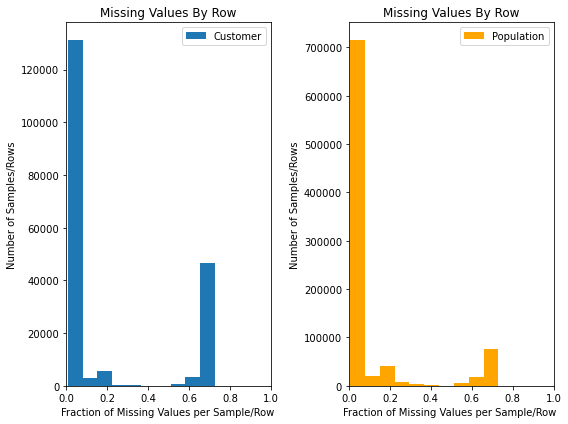

In [48]:
# find count of rows with certain fraction of NA values
fraction_nan_rows = customers.isnull().sum(axis=1)/customers.shape[1]
fraction_nan_rows_pop = population.isnull().sum(axis=1)/population.shape[1]

plt.figure(figsize=[8,6])

plt.subplot(1, 2, 1)
plt.hist(fraction_nan_rows, label = 'Customer')
plt.legend(loc='upper right')
plt.xlim(0,1) 
plt.xlabel('Fraction of Missing Values per Sample/Row ')
plt.ylabel('Number of Samples/Rows')
plt.title('Missing Values By Row')

plt.subplot(1, 2, 2)
plt.hist(fraction_nan_rows_pop, label = 'Population', color = 'orange')
plt.legend(loc='upper right')
plt.xlim(0,1) 
plt.xlabel('Fraction of Missing Values per Sample/Row ')
plt.ylabel('Number of Samples/Rows')
plt.title('Missing Values By Row')
plt.tight_layout()
plt.show()

We go on to check if these missing values come from same columns, or they come from sparse missing entries.  Indeed, from the below plot, we see that there are more than 200 columns with almost NO values (i.e. fraction of missing values in column is 1), in both subset of customers and population that have more than 60% missing values. Missing values coming from same columns in this subset may form an 'artificial cluster' that complicates our analysis for customer segmentation, so we go ahead and sub-set these rows for further customer segmentation analysis. 

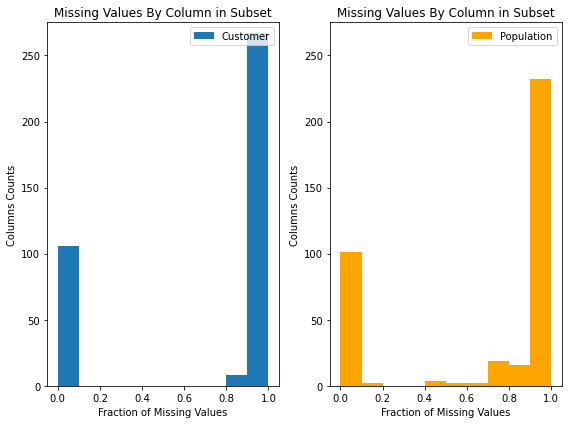

In [49]:
rows_na = list(fraction_nan_rows[fraction_nan_rows>0.6].index)
# subset customers with > 50% missing values, find NA values
mask = customers.loc[rows_na,:].isnull()

rows_na_pop = list(fraction_nan_rows_pop[fraction_nan_rows_pop>0.6].index)
# subset population with > 50% missing values, find NA values
mask_pop = population.loc[rows_na_pop,:].isnull()

plt.figure(figsize=[8,6])
plt.subplot(1, 2, 1)
plt.hist(mask.sum(axis=0)/mask.shape[0], label = 'Customer')
plt.legend(loc='upper right')
plt.xlabel('Fraction of Missing Values')
plt.ylabel('Columns Counts')
plt.title('Missing Values By Column in Subset')
plt.ylim(0,275) 
plt.subplot(1, 2, 2)
plt.hist(mask_pop.sum(axis=0)/mask_pop.shape[0], label = 'Population', color = 'orange')
plt.legend(loc='upper right')
plt.xlabel('Fraction of Missing Values')
plt.ylabel('Columns Counts')
plt.title('Missing Values By Column in Subset')
plt.ylim(0,275) 
plt.tight_layout()
plt.show()

We define a function to drop rows in the dataset with fraction of missing values higher than a threshold. We output two datasets for each input dataset, one containing the dropped subcluster and another containing the remaining data.

In [44]:
def drop_na_rows(df, drop_na_row_threshold):
    """
    Drop rows in the dataframe that have NA values above a certain threshold.
    Output:
        df       dataframe that has dropped rows
        rows_na  index of dropped rows/samples in the input dataframe
    """
    fraction_nan_rows = df.isnull().sum(axis=1)/df.shape[1]
    rows_na = fraction_nan_rows[fraction_nan_rows>drop_na_row_threshold].index
    rows_na = list(rows_na)
    df = df.drop(rows_na)
    

    return df, rows_na

In [420]:
# We process missing values in customers dataset

# For customers dataset, before dropping row
fraction_nan_cols = customers.isnull().sum()/customers.shape[0]

# drop rows, output data main cluster customers_main
customers_main, rows_na = drop_na_rows(customers, 0.6)

# select sub cluster (dropped rows)
customers_subcluster = customers.loc[rows_na]

# For fraction of NA in columns, after rows dropped
fraction_nan_cols_main = customers_main.isnull().sum()/customers_main.shape[0]


In [421]:

# For population dataset, before dropping rows
fraction_nan_cols_pop = population.isnull().sum()/population.shape[0]

# drop rows, output data main cluster population_main
population_main, rows_na_pop = drop_na_rows(population, 0.6)

# select artificla cluster
population_subcluster = population.loc[rows_na_pop]

# For fraction of NA in columns, after rows dropped
fraction_nan_cols_main_pop = population_main.isnull().sum()/population_main.shape[0]



In [50]:
# Fraction of samples/rows in the sub-cluster

size_subcluster_customers = customers_subcluster.shape[0]/(customers_main.shape[0] + customers_subcluster.shape[0]) 
size_subcluster_population = population_subcluster.shape[0]/(population_main.shape[0]+population_subcluster.shape[0])
print('Fraction of Samples in the Sub-cluster {} for customers and {} for population'.format(size_subcluster_customers, size_subcluster_population))



Fraction of Samples in the Sub-cluster 0.26046167011040844 for customers and 0.10458124303623904 for population


After processing, we have selected a sub-cluster with many missing values. For customers dataset, that is about 1/4 of the entire dataset, whereas for the population dataset, it contains about 10% of the entire dataset.

We can then compare missing value distribution, in terms of data attributes, before and after dropping rows, in both customers and population dataset. 

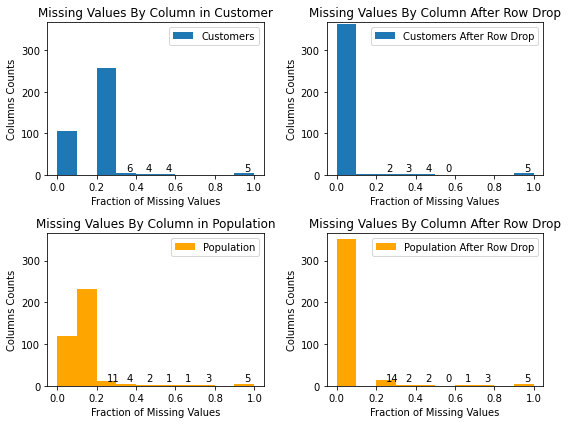

In [55]:
# Plot the difference
plt.figure(figsize=[8,6])
plt.subplot(2, 2, 1)
plt.hist(fraction_nan_cols, label = 'Customers')
plt.legend(loc='upper right')
plt.xlabel('Fraction of Missing Values')
plt.ylabel('Columns Counts')
plt.title('Missing Values By Column in Customer')
plt.ylim(0,366)
ax = plt.gca()
for value in [0.3, 0.4,0.5,0.9]:
    count_bin = fraction_nan_cols[ (fraction_nan_cols>=value) & (fraction_nan_cols<=value+0.1)].count()
    ax.text(value+0.05, 10, str(count_bin))

plt.subplot(2, 2, 2)
plt.hist(fraction_nan_cols_main, label = 'Customers After Row Drop')
plt.legend(loc='upper right')
plt.xlabel('Fraction of Missing Values')
plt.ylabel('Columns Counts')
plt.title('Missing Values By Column After Row Drop')
plt.tight_layout()
plt.ylim(0,366)
ax = plt.gca()
for value in [0.2,0.3, 0.4,0.5,0.9]:
    count_bin = fraction_nan_cols_main[ (fraction_nan_cols_main>=value) & (fraction_nan_cols_main<=value+0.1)].count()
    ax.text(value+0.05, 10, str(count_bin))


plt.subplot(2, 2, 3)
plt.hist(fraction_nan_cols_pop, label = 'Population', color = 'orange')
plt.xlabel('Fraction of Missing Values')
plt.legend(loc='upper right')
plt.ylabel('Columns Counts')
plt.title('Missing Values By Column in Population')
plt.tight_layout()
plt.ylim(0,366)
ax = plt.gca()
for value in [0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.9]:
    count_bin = fraction_nan_cols_pop[ (fraction_nan_cols_pop>=value) & (fraction_nan_cols_pop<=value+0.1)].count()
    ax.text(value+0.05, 10, str(count_bin))

plt.subplot(2, 2, 4)
plt.hist(fraction_nan_cols_main_pop, label = 'Population After Row Drop',color = 'orange')
plt.legend(loc='upper right')
plt.xlabel('Fraction of Missing Values')
plt.ylabel('Columns Counts')
plt.title('Missing Values By Column After Row Drop')
plt.tight_layout()
plt.ylim(0,366)
ax = plt.gca()
for value in [0.2,0.3, 0.4, 0.5, 0.6,0.7,0.9]:
    count_bin = fraction_nan_cols_main_pop[ (fraction_nan_cols_main_pop>=value) & (fraction_nan_cols_main_pop<=value+0.1)].count()
    ax.text(value+0.05, 10, str(count_bin))
    
    
plt.show()


In [57]:
# output columns with large fraction of NA after row drop
print('Columns in customers dataset with more than 50% NA values AFTER rows dropped')
print(fraction_nan_cols_main[fraction_nan_cols_main > 0.5])

print('Columns in population dataset with more than 50% NA values AFTER rows dropped')
print(fraction_nan_cols_main_pop[fraction_nan_cols_main_pop>0.5])

cols = ['AGER_TYP','KK_KUNDENTYP','EXTSEL992']
print('These are columns with high NA fraction in population, but not in customers')
print('NA fraction in customers main cluster')
print(customers_main[cols].isnull().sum()/customers_main.shape[0])

Columns in customers dataset with more than 50% NA values AFTER rows dropped
ALTER_KIND1                  0.918911
ALTER_KIND2                  0.964772
ALTER_KIND3                  0.991131
ALTER_KIND4                  0.998342
TITEL_KZ                     0.984012
LP_LEBENSPHASE_FEIN_other    0.673381
dtype: float64
Columns in population dataset with more than 50% NA values AFTER rows dropped
AGER_TYP                     0.738218
ALTER_KIND1                  0.900629
ALTER_KIND2                  0.963770
ALTER_KIND3                  0.992419
ALTER_KIND4                  0.998524
EXTSEL992                    0.709154
KK_KUNDENTYP                 0.624837
TITEL_KZ                     0.997358
LP_LEBENSPHASE_FEIN_other    0.761035
dtype: float64
These are columns with high NA fraction in population, but not in customers
NA fraction in customers main cluster
AGER_TYP        0.313115
KK_KUNDENTYP    0.450548
EXTSEL992       0.265716
dtype: float64


We note that 5 columns consistently still have over 90% missing values in both datasets after row drop, namely ALTER_KIND1, ALTER_KIND2, ALTER_KIND3, ALTER_KIND4 and TITEL_KZ. We can go ahead and drop these columns with high fraction of missing value in the next section.

Another column LP_LEBENSPHASE_FEIN_other has consistently around 60-75% NA fraction in customers and population datasets, simply because for many samples we have no info on financial status. 

Other columns ('AGER_TYP','KK_KUNDENTYP','EXTSEL992') have high NA fraction in population dataset, but not in customers dataset, which suggests difference in datasets. Processing numerical NA values is easy, simply filling missing values with mean or median is sufficient. However, for categorical values, we need to choose whether to encode missing value as separate category, drop NA values or fill NA values. The choice has to be consistent in both datasets and we base our subsequent steps on customers dataset. Details are discussed in a later section.

### 1.1.b. Process Missing Value Columns


In [51]:
def drop_na_columns(df, na_threshold):
    """
    Drop columns in the dataframe that have NA values above a certain threshold.
    Output:
        df           dataframe with dropped columns
        columns_na   list of column names that were dropped
    """
    fraction_nan = df.isnull().sum()/df.shape[0]
    columns_na = fraction_nan[fraction_nan>na_threshold].index
    columns_na = list(columns_na)
    
    df = df.drop(columns = columns_na)
    
    return df, columns_na

In [422]:
# save a copy of the main-cluster
customers_main_copy = customers_main.copy()
population_main_copy = population_main.copy()

We choose a threshold of 90% missing value for columns. We record columns we have dropped, so that we mayb drop the same columns in the population dataset. This is to make sure we are comparing comparable datasets and attributes in subsequent segmentation analysis.

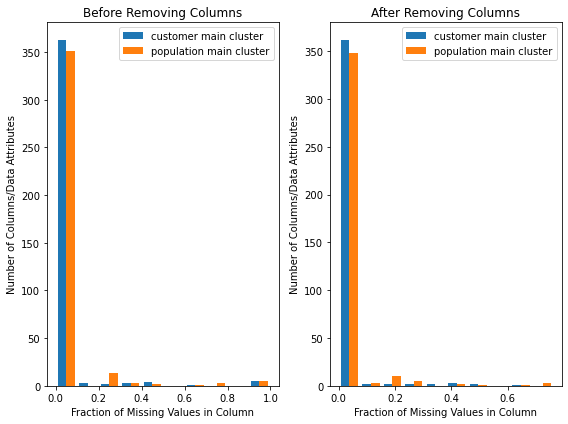

In [423]:
plt.figure(figsize=[8,6])

plt.subplot(1, 2, 1)
plt.hist([customers_main_copy.isnull().sum()/customers_main_copy.shape[0],population_main_copy.isnull().sum()/population_main_copy.shape[0]],
         label = ['customer main cluster', 'population main cluster'])
plt.xlabel('Fraction of Missing Values in Column')
plt.ylabel('Number of Columns/Data Attributes')
plt.title('Before Removing Columns')
plt.legend()

customers_main, columns_na = drop_na_columns(customers_main_copy, 0.9)
population_main = population_main_copy.drop(columns = columns_na)

plt.subplot(1, 2, 2)
plt.hist([customers_main.isnull().sum()/customers_main.shape[0],population_main.isnull().sum()/population_main.shape[0]],
         label = ['customer main cluster', 'population main cluster'])
plt.xlabel('Fraction of Missing Values in Column')
plt.ylabel('Number of Columns/Data Attributes')
plt.title('After Removing Columns')
plt.legend()

plt.tight_layout()
plt.show()

In [424]:
# For fraction of NA in columns, after rows dropped
fraction_nan_cols_main = customers_main_copy.isnull().sum()/customers_main_copy.shape[0]

print('These columns are over 50% NA fraction BEFORE column removal:')
print(*fraction_nan_cols_main[fraction_nan_cols_main > 0.5].index, sep = '  ')

print('These columns are over 50% NA fraction AFTER column removal:')
# For fraction of NA in columns, after rows dropped
fraction_nan_cols_main = customers_main.isnull().sum()/customers_main.shape[0]

print(*fraction_nan_cols_main[fraction_nan_cols_main > 0.5].index, sep = '  ')

print('These columns are over 50% NA fraction AFTER column removal in Population dataset:')
fraction_nan_cols_main_pop = population_main.isnull().sum()/population_main.shape[0]

print(*fraction_nan_cols_main_pop[fraction_nan_cols_main_pop > 0.5].index, sep = '  ')

These columns are over 50% NA fraction BEFORE column removal:
ALTER_KIND1  ALTER_KIND2  ALTER_KIND3  ALTER_KIND4  TITEL_KZ  LP_LEBENSPHASE_FEIN_other
These columns are over 50% NA fraction AFTER column removal:
LP_LEBENSPHASE_FEIN_other
These columns are over 50% NA fraction AFTER column removal in Population dataset:
AGER_TYP  EXTSEL992  KK_KUNDENTYP  LP_LEBENSPHASE_FEIN_other


Observe from above that we have eliminated columns with more than 90% NA values. However, some attributes remain with relatively high fraction of NA values in both datasets. 

### Parallel-Process Missing Values in Sub-Cluster

Now we begin to process the sub-cluster's attributes with NA values. Again, it is is clear from the two figure below that there are more than 200 data attributes/columns with almost NO data. These attribute don't provide information, and could come from a systematic data collection error, such as a step that simply does not collect data for these attributes. A peek into the 'mailout_train' and 'mailout_test' dataset confirms that similar cluster also exists in these datasets.Therefore, we proceed to drop columns with lots of missing data. 

After dropping these columns in these rows, we have only a few attributes with NA fraction below 20%. Though some attributes have lower NA fraction than 80% in population cluster, they all have higher than 80% NA fraction in customers dataset and are thus dropped.

In [425]:
customers_subcluster_copy = customers_subcluster.copy()
population_subcluster_copy = population_subcluster.copy()

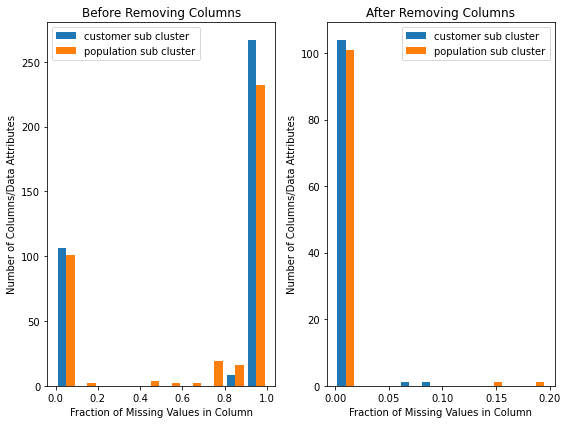

In [426]:
plt.figure(figsize=[8,6])

plt.subplot(1, 2, 1)
plt.hist([customers_subcluster_copy.isnull().sum()/customers_subcluster_copy.shape[0], 
          population_subcluster_copy.isnull().sum()/population_subcluster_copy.shape[0]], 
         label = ['customer sub cluster', 'population sub cluster'])
plt.xlabel('Fraction of Missing Values in Column')
plt.ylabel('Number of Columns/Data Attributes')
plt.title('Before Removing Columns')
plt.legend()


customers_subcluster, columns_na_subcluster = drop_na_columns(customers_subcluster_copy, 0.8)
population_subcluster = population_subcluster_copy.drop(columns = columns_na_subcluster)

plt.subplot(1, 2, 2)
plt.hist([customers_subcluster.isnull().sum()/customers_subcluster.shape[0], 
          population_subcluster.isnull().sum()/population_subcluster.shape[0]], 
         label = ['customer sub cluster', 'population sub cluster'])
plt.xlabel('Fraction of Missing Values in Column')
plt.ylabel('Number of Columns/Data Attributes')
plt.title('After Removing Columns')
plt.legend()

plt.tight_layout()
plt.show()

In [427]:
# For fraction of NA in columns, after rows dropped
fraction_nan_cols_subcluster = customers_subcluster_copy.isnull().sum()/customers_subcluster_copy.shape[0]
print('There are {} columns with over 50% NA fraction BEFORE column removal'.format(
    len(fraction_nan_cols_subcluster[fraction_nan_cols_subcluster > 0.5].index)))
      
fraction_nan_cols_subcluster = customers_subcluster.isnull().sum()/customers_subcluster.shape[0]

print('There are {} columns with over 50% NA fraction AFTER column removal'.format(
    len(fraction_nan_cols_subcluster[fraction_nan_cols_subcluster > 0.5].index)))

fraction_nan_cols_subcluster_pop = population_subcluster.isnull().sum()/population_subcluster.shape[0]
print('There are {} columns are over 50% NA fraction AFTER column removal in Population dataset'.format(
    len(fraction_nan_cols_subcluster_pop[fraction_nan_cols_subcluster_pop > 0.5].index)))

There are 275 columns with over 50% NA fraction BEFORE column removal
There are 0 columns with over 50% NA fraction AFTER column removal
There are 0 columns are over 50% NA fraction AFTER column removal in Population dataset


### 1.2.d Clean Numerical Data Attributes

We are now ready to fill the missing values in all numerical columns we've identified. In order to fill missing values in these numerical columns, We first observe fraction of NA values, skewedness and fraction of outliers in these columns. Outlier is defined as + or - 3 standard devications away from mean of the data. 

In [428]:
fraction_nan_cols_main_numerical = customers_main[columns_fill_numerical].isnull().sum()/customers_main.shape[0]
fraction_nan_cols_main_pop_numerical = population_main[columns_fill_numerical].isnull().sum()/population_main.shape[0]

In [429]:
for col in columns_fill_numerical:
    col_na_customers= customers_main[col].isnull().sum()/customers_main.shape[0]
    col_na_pop = population_main[col].isnull().sum()/population_main.shape[0]
    
    if (col_na_customers > 0.1) | (col_na_pop > 0.1):
        print('For columns {} fraction of NA {} for customers and {} for population after prelim cleaning' \
              .format(col, round(col_na_customers,4), round(col_na_pop,4)))

For columns ALTERSKATEGORIE_FEIN fraction of NA 0.1122 for customers and 0.2815 for population after prelim cleaning
For columns ALTER_HH fraction of NA 0.1524 for customers and 0.2887 for population after prelim cleaning
For columns EXTSEL992 fraction of NA 0.2657 for customers and 0.7092 for population after prelim cleaning
For columns KK_KUNDENTYP fraction of NA 0.4505 for customers and 0.6248 for population after prelim cleaning
For columns GEBURTSJAHR fraction of NA 0.3206 for customers and 0.3896 for population after prelim cleaning
For columns LP_LEBENSPHASE_FEIN_income fraction of NA 0.396 for customers and 0.3019 for population after prelim cleaning
For columns LP_LEBENSPHASE_FEIN_age fraction of NA 0.1839 for customers and 0.2125 for population after prelim cleaning
For columns LP_LEBENSPHASE_GROB_age fraction of NA 0.4746 for customers and 0.4169 for population after prelim cleaning
For columns WOHNLAGE fraction of NA 0.2447 for customers and 0.2427 for population after prel

We observe again that there exists some differnt fraction of NA values in customers vs. population datasets, but the difference is always smaller than about 20%.  

To fill missing values and preserve statistical nature of datasets, we fill NA values with either mean or median of the data attribute. We look at two statistical metric the skewedness and outlier-fraction below. 

In [430]:
skew_customers_main = customers_main[columns_fill_numerical].skew() 

In [431]:
skew_pop_main = population_main[columns_fill_numerical].skew() 

We observe from the skewedness data calcualted above that many attribute values have relatively small skewedness. More than 80 attributes have skewedness at almost 0. However, at the same time, many data attributes are still highly skewed (aka skewedness greater than 1).  There are even a few data attributes with absolute skewedness greater than 15. We plot below, for both customers and population, data attributes with negligible skewedness (<0.003) and those with very high skewedness (>15). All data attributes are scaled by their maximum value. We note that though it seems that attributes with high skewedness only have 1 value and can be dropped, we checked that there exist values other than the most frequent values in each of the data attributes. 

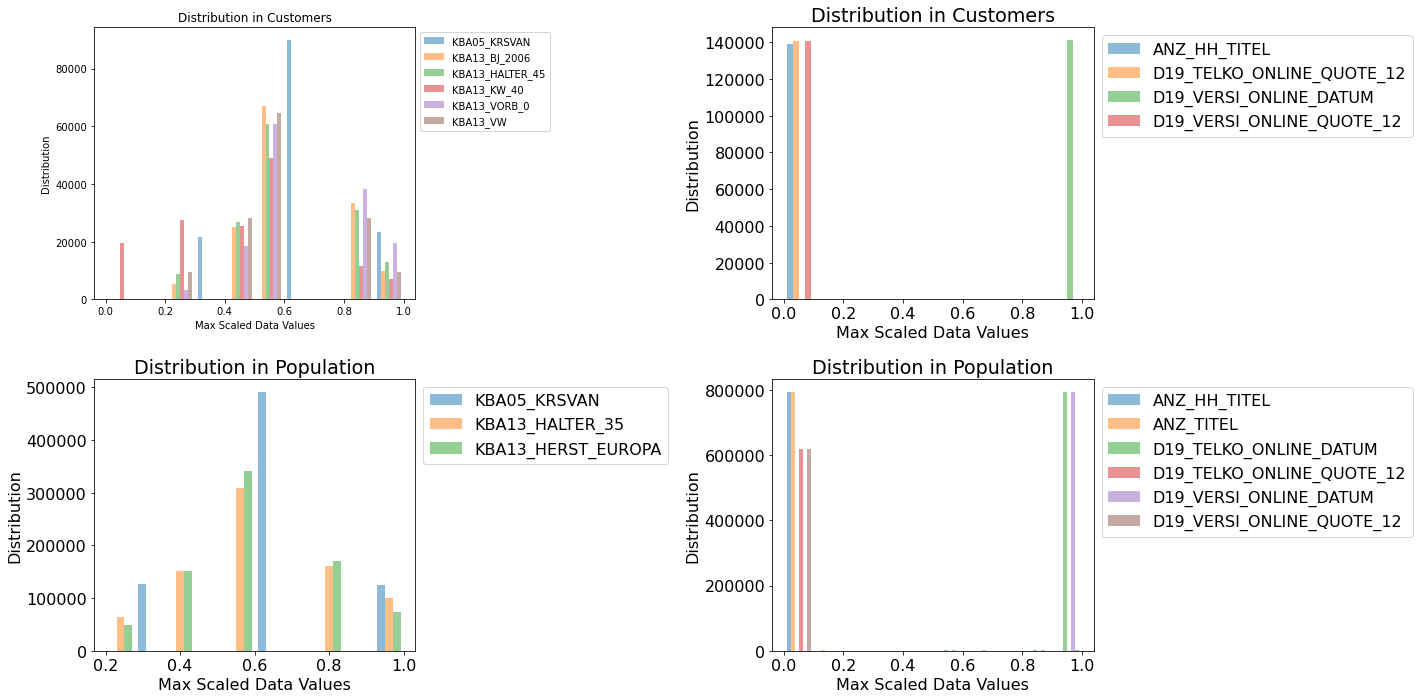

In [432]:
plt.figure(figsize=[20,10])

font_size = 16

# Plot Distribution of Values (Un-skewed in Customers)
filter =  ((abs(skew_customers_main)>0) & (abs(skew_customers_main)<0.003))
filtered_list = [i for (i, v) in zip(columns_fill_numerical, filter) if v]

data = []
labels = []
for col in filtered_list:
    data.append(customers_main[col]/np.nanmax(customers_main[col]))
    labels.append(col)

plt.subplot(2,2,1)
plt.hist(data, label = labels, alpha = 0.5)
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('Max Scaled Data Values')
plt.ylabel('Distribution')
plt.title('Distribution in Customers')
plt.rc('font', size=font_size)

# Plot Distribution of Values (Un-skewed in Customers)
filter =  (abs(skew_customers_main)> 15).values
filtered_list = [i for (i, v) in zip(columns_fill_numerical, filter) if v]

data = []
labels = []
for col in filtered_list:
    data.append(customers_main[col]/np.nanmax(customers_main[col]))
    labels.append(col)

plt.subplot(2,2,2)
plt.rc('font', size=font_size)
plt.hist(data, label = labels, alpha = 0.5)
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('Max Scaled Data Values')
plt.ylabel('Distribution')
plt.title('Distribution in Customers')

# Plot Distribution of Values (Un-skewed in Customers)
filter =  ((abs(skew_pop_main)>0) & (abs(skew_pop_main)<0.003)).values
filtered_list = [i for (i, v) in zip(columns_fill_numerical, filter) if v]
#print(filtered_list)

data = []
labels = []
for col in filtered_list:
    data.append(population_main[col]/np.nanmax(population_main[col]))
    labels.append(col)

#print(len(data))
plt.subplot(2,2,3)
plt.hist(data, label = labels, alpha = 0.5)
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('Max Scaled Data Values')
plt.ylabel('Distribution')
plt.title('Distribution in Population')
plt.rc('font', size=font_size)

# Plot Distribution of Values (Un-skewed in Customers)
filter =  (abs(skew_pop_main)>15).values
filtered_list = [i for (i, v) in zip(columns_fill_numerical, filter) if v]
#print(filtered_list)

data = []
labels = []
for col in filtered_list:
    data.append(population_main[col]/np.nanmax(population_main[col]))
    labels.append(col)

#print(len(data))
plt.subplot(2,2,4)
plt.hist(data, label = labels, alpha = 0.5)
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('Max Scaled Data Values')
plt.ylabel('Distribution')
plt.title('Distribution in Population')
plt.rc('font', size=font_size)


plt.tight_layout()
plt.show()



In [433]:
# find fraction of outliers, along with skewedness data


z_score_customers = pd.DataFrame(index = customers_main.index, columns=customers_main.columns)
z_score_customers = z_score_customers.fillna(0) # fill empty dataframe with 0s rather than NaNs

# find z-score of each atribute, then define outlier as 3 std away from mean
outlier_frac_list = []
for col in columns_fill_numerical:
    z_score_customers[col] = (customers_main[col] - customers_main[col].mean())/customers_main[col].std(ddof=0)
    outlier_frac = (abs(z_score_customers[col]) >= 3).sum()/customers_main.shape[0]
    outlier_frac_list.append(outlier_frac)

# compile in dataframe outlier fraction, skewedness and na fraction 
stats_customers_main = pd.DataFrame(data = outlier_frac_list, index = columns_fill_numerical)
stats_customers_main['skewedness'] = skew_customers_main
stats_customers_main['na fraction'] = fraction_nan_cols_main_numerical
stats_customers_main.columns = ['outlier_frac','skewedness','na fraction']

In [434]:
# find fraction of outliers, along with skewedness data

z_score_population = pd.DataFrame(index = population_main.index, columns=population_main.columns)
z_score_population = z_score_population.fillna(0) # fill empty dataframe with 0s rather than NaNs

# find z-score of each atribute, then define outlier as 3 std away from mean
outlier_frac_list = []
for col in columns_fill_numerical:
    z_score_population[col] = (population_main[col] - population_main[col].mean())/population_main[col].std(ddof=0)
    outlier_frac = (abs(z_score_population[col]) >= 3).sum()/population_main.shape[0]
    outlier_frac_list.append(outlier_frac)

# compile in dataframe outlier fraction, skewedness and na fraction 
stats_population_main = pd.DataFrame(data = outlier_frac_list, index = columns_fill_numerical)
stats_population_main['skewedness'] = skew_pop_main
stats_population_main['na fraction'] = fraction_nan_cols_main_pop_numerical
stats_population_main.columns = ['outlier_frac','skewedness','na fraction']

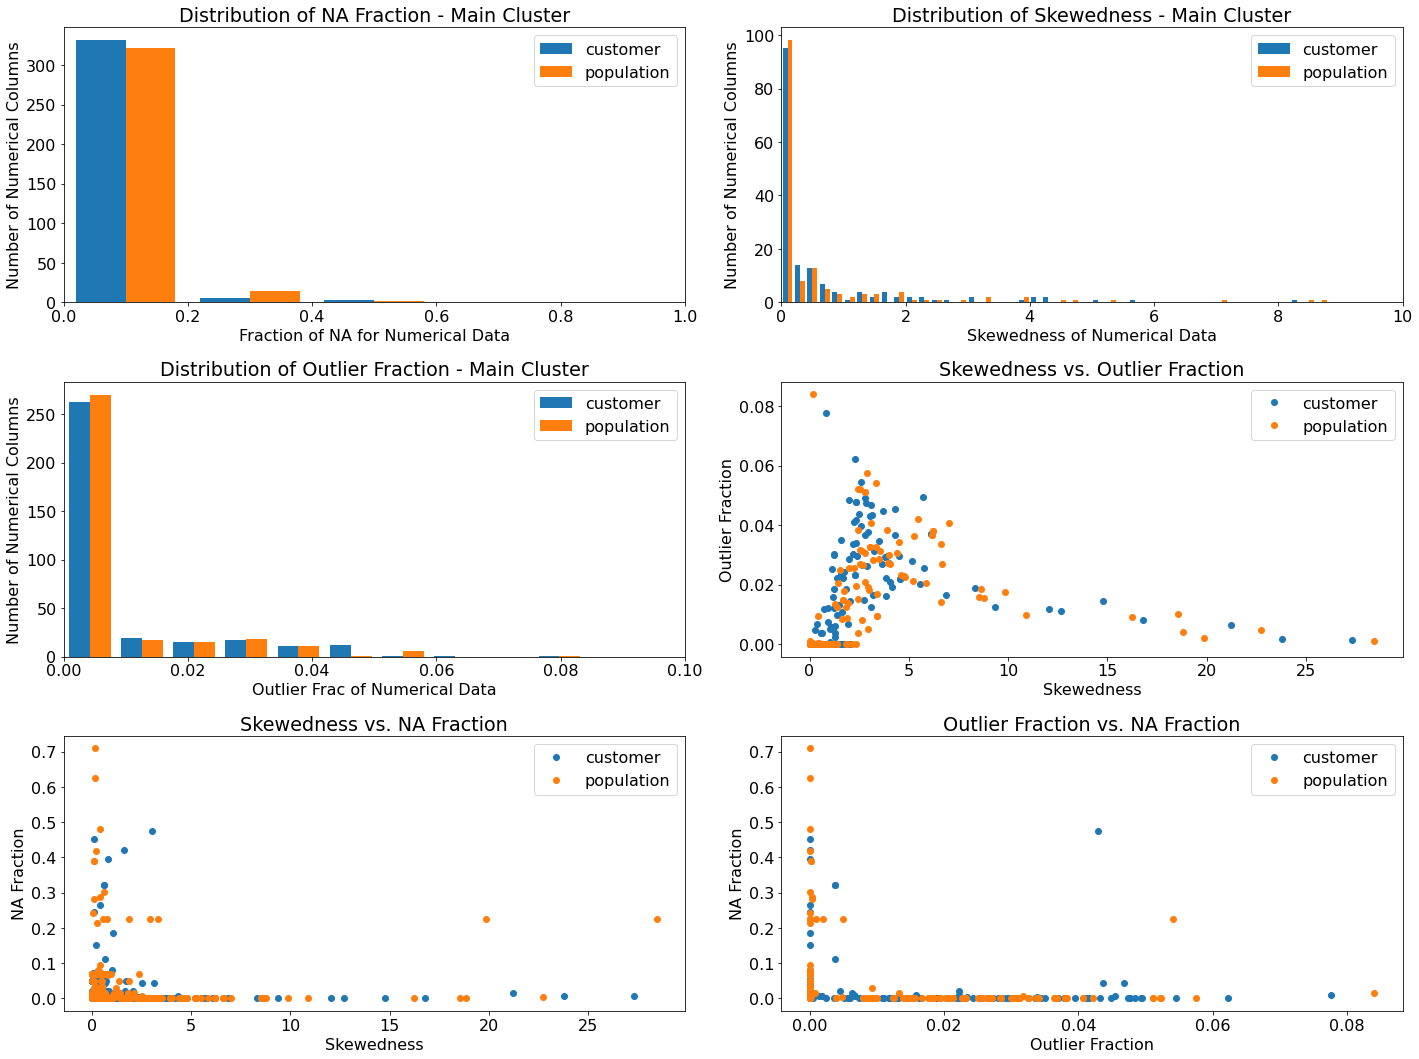

In [435]:
plt.figure(figsize=[20,15])

fontsize = 16

plt.subplot(3,2,1)
plt.rc('font', size=fontsize)
plt.hist([fraction_nan_cols_main_numerical.values, fraction_nan_cols_main_pop_numerical.values], label=['customer','population'], bins = np.arange(0,fraction_nan_cols_main_pop_numerical.max(),0.2))
plt.xlim(0,1)
plt.legend()
plt.xlabel('Fraction of NA for Numerical Data')
plt.ylabel('Number of Numerical Columns')
plt.title('Distribution of NA Fraction - Main Cluster')


plt.subplot(3,2,2)
plt.hist([skew_customers_main.values, skew_pop_main.values], label=['customer','population'], bins = np.arange(0,skew_customers_main.max(),0.2))
plt.xlim(0,10)
plt.legend()
plt.xlabel('Skewedness of Numerical Data')
plt.ylabel('Number of Numerical Columns')
plt.title('Distribution of Skewedness - Main Cluster')
plt.rc('font', size=fontsize)

plt.subplot(3,2,3)
outlier_customers_main = stats_customers_main['outlier_frac']
outlier_population_main = stats_population_main['outlier_frac']
plt.hist([outlier_customers_main, outlier_population_main], label=['customer','population'])
plt.xlim(0,0.1)
plt.legend()
plt.xlabel('Outlier Frac of Numerical Data')
plt.ylabel('Number of Numerical Columns')
plt.title('Distribution of Outlier Fraction - Main Cluster')
plt.rc('font', size=fontsize)

plt.subplot(3,2,4)
plt.plot(abs(skew_customers_main), outlier_customers_main, 'o', color='tab:blue', label = 'customer')
plt.plot(abs(skew_pop_main), outlier_population_main, 'o', color='tab:orange', label = 'population')
plt.xlabel('Skewedness')
plt.ylabel('Outlier Fraction')
plt.title('Skewedness vs. Outlier Fraction')
plt.legend()
plt.rc('font', size=fontsize)


plt.subplot(3,2,5)
plt.plot(abs(skew_customers_main), fraction_nan_cols_main_numerical.values, 'o', color='tab:blue', label = 'customer')
plt.plot(abs(skew_pop_main), fraction_nan_cols_main_pop_numerical.values, 'o', color='tab:orange', label = 'population')
plt.legend()
plt.xlabel('Skewedness')
plt.ylabel('NA Fraction')
plt.title('Skewedness vs. NA Fraction')
#plt.xscale('log')
plt.rc('font', size=fontsize)

plt.subplot(3,2,6)
plt.plot(outlier_customers_main, fraction_nan_cols_main_numerical.values, 'o', color='tab:blue', label = 'customer')
plt.plot(outlier_population_main, fraction_nan_cols_main_pop_numerical.values, 'o', color='tab:orange', label = 'population')
plt.legend()
#plt.xscale('log')
plt.xlabel('Outlier Fraction')
plt.ylabel('NA Fraction')
plt.title('Outlier Fraction vs. NA Fraction')
plt.rc('font', size=fontsize)

plt.tight_layout()
plt.show()

From plot above, we see that skewedness and outlier-fraction are linearly related for skewnedss smaller than about 5. But for high-skewedness data, outlier-fraction fails to characterize high outlier-fraction. This is because many ordinal data are not continuous, but fixed within a range of values. When skewedness increases, there simply do not include values that are 3 standard deviations away. 

**Therefore, we think skewedness is a better way to characterize and determine whether to fill NA values with mean or median.**

From 5 and 6th plots above, we see that many data have low NA fraction and filling with mean/median doesn't really matter. Those with high NA fraction tends to collect at skewedness around 0, and only a few have skewedness greater than 0.2. We define a following funtion to fill NA values with mean/median depending on a skewedness threshold. Those with higher skewedness than the threshold are filled with median, whereas those with lower skewedness are filled with mean.

In [65]:
def fill_numericalna_mean(df, columns):
    """
    Fill NA in columns with mean of data.
    Input:
        df        dataframe to be cleaned
        columns   list of column names to clean
    """
    # change those with unknown value of (unknown) to NA then fill 0
    for column in columns:
        df[column] = df[column].fillna(df[column].mean())
    return df

In [66]:
def fill_numericalna_median(df, columns):
    """
    Fill NA in columns with median of data.
    Input:
        df        dataframe to be cleaned
        columns   list of column names to clean
    """
    # change those with unknown value of (unknown) to NA then fill 0
    for column in columns:
        df[column] = df[column].fillna(df[column].median())
    return df

In [67]:
def clean_numeric_columns(df, columns_fill_numerical, skewedness_outlier_threshold, skew_select):
    """
    Clean NA values in numerical columns.
    INPUT:
        df                            dataframe to be cleaned
        columns_fill_numerical        list of column names that are numerical
        skewedness_outlier_threshold  threshold above which to fill with median and below which to fill with mean
        skew_select                   whether to use skewedness or outlier as threshold (1: skewedness, other than 1: outlier)
        
    OUTPUT:
        df                            cleaned dataframe
    """
    
    if skew_select == 1: 
        # find skewedness data and columns to fill with mean/median
        columns_fill_mean = []
        columns_fill_median = []
        for col in columns_fill_numerical:
            skew_df = df[col].skew() 
            if abs(skew_df) < skewedness_outlier_threshold:
                columns_fill_mean.append(col)
            else:
                columns_fill_median.append(col)
        

    
    else:
        # find outlier fraction data
        z_score = pd.DataFrame(index = df.index, columns=df.columns)
        z_score = z_score.fillna(0) # fill empty dataframe with 0s rather than NaNs

        outlier_frac_list = []
        for col in columns_fill_numerical:
            z_score[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)
            outlier_frac = (abs(z_score[col]) >= 3).sum()/z_score.shape[0]
            outlier_frac_list.append(outlier_frac)

        df_outlier_frac = pd.DataFrame(data = outlier_frac_list, index = columns_fill_numerical)
        df_outlier_frac.columns = ['outlier_frac']
        
        # find column names with outlier fraction smaller than or larger than threshold
        columns_fill_mean = df_outlier_frac[df_outlier_frac['outlier_frac'] < skewedness_outlier_threshold].index
        columns_fill_median = df_outlier_frac[df_outlier_frac['outlier_frac'] >= skewedness_outlier_threshold].index
        
    # fill NA in columns with mean or median
    df =  fill_numericalna_mean(df, columns_fill_mean)
    df =  fill_numericalna_median(df, columns_fill_median)
    return df

In [439]:
customers_main = clean_numeric_columns(customers_main, columns_fill_numerical, 0.2, 1)

In [440]:
population_main = clean_numeric_columns(population_main, columns_fill_numerical, 0.2, 1)


### Process Numerical Columns in Sub-Cluster
We look at description statistics of the sub-cluster, and then go on to process the sub-cluster in parallel. 

In [436]:
# find numerical columns in sub-cluster
columns_fill_numerical_subcluster = find_numerical_cols(customers_subcluster)

# find corresponding NA fractions and skewedness
fraction_nan_cols_subcluster_numerical = customers_subcluster[columns_fill_numerical_subcluster].isnull().sum()/customers_subcluster.shape[0]
fraction_nan_cols_subcluster_pop_numerical = population_subcluster[columns_fill_numerical_subcluster].isnull().sum()/population_subcluster.shape[0]
skew_customers_subcluster = customers_subcluster[columns_fill_numerical_subcluster].skew() 
skew_pop_subcluster = population_subcluster[columns_fill_numerical_subcluster].skew() 

In [437]:
for col in columns_fill_numerical_subcluster:
    col_na_customers= customers_subcluster[col].isnull().sum()/customers_subcluster.shape[0]
    col_na_pop = population_subcluster[col].isnull().sum()/population_subcluster.shape[0]
    
    if (col_na_customers > 0.05) | (col_na_pop > 0.05):
        print('For columns {} fraction of NA {} for customers and {} for population after prelim cleaning' \
              .format(col, round(col_na_customers,4), round(col_na_pop,4)))

For columns HH_EINKOMMEN_SCORE fraction of NA 0.0592 for customers and 0.1969 for population after prelim cleaning


We observe that there exists differnt fraction of NA values for HH_EINKOMMEN_SCORE attribute. Again, to fill missing values and preserve statistical nature of datasets, we fill NA values with either mean or median of the data attribute. We look at two statistical metric the skewedness and outlier-fraction below. 

We observe from the skewedness data calcualted above that many attribute values have much higher skewedness. 

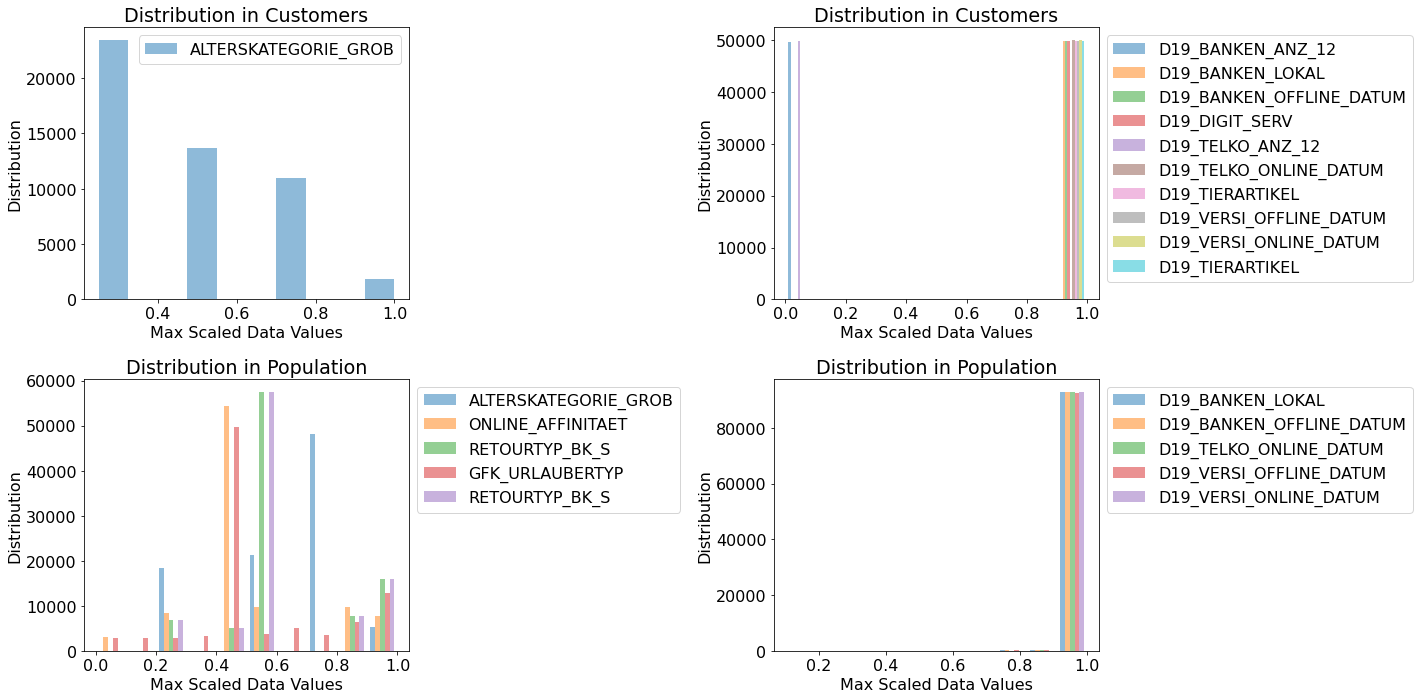

In [438]:
plt.figure(figsize=[20,10])

font_size = 16

# Plot Distribution of Values (Un-skewed in Customers)
filter =  ((abs(skew_customers_subcluster.values)>0) & (abs(skew_customers_subcluster.values)<1))
filtered_list = [i for (i, v) in zip(columns_fill_numerical_subcluster, filter) if v]

data = []
labels = []
for col in filtered_list:
    data.append(customers_subcluster[col]/np.nanmax(customers_subcluster[col]))
    labels.append(col)

plt.subplot(2,2,1)
plt.rc('font', size=font_size)
plt.hist(data, label = labels, alpha = 0.5)
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('Max Scaled Data Values')
plt.ylabel('Distribution')
plt.title('Distribution in Customers')


# Plot Distribution of Values (Un-skewed in Customers)
filter =  (abs(skew_customers_subcluster)> 20).values
filtered_list = [i for (i, v) in zip(columns_fill_numerical_subcluster, filter) if v]

data = []
labels = []
for col in filtered_list:
    data.append(customers_subcluster[col]/np.nanmax(customers_subcluster[col]))
    labels.append(col)

plt.subplot(2,2,2)
plt.hist(data, label = labels, alpha = 0.5)
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('Max Scaled Data Values')
plt.ylabel('Distribution')
plt.title('Distribution in Customers')
plt.rc('font', size=font_size)

# Plot Distribution of Values (Un-skewed in Customers)
filter =  ((abs(skew_pop_subcluster)>0) & (abs(skew_pop_subcluster)<1)).values
filtered_list = [i for (i, v) in zip(columns_fill_numerical_subcluster, filter) if v]
#print(filtered_list)

data = []
labels = []
for col in filtered_list:
    data.append(population_subcluster[col]/np.nanmax(population_subcluster[col]))
    labels.append(col)

#print(len(data))
plt.subplot(2,2,3)
plt.hist(data, label = labels, alpha = 0.5)
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('Max Scaled Data Values')
plt.ylabel('Distribution')
plt.title('Distribution in Population')
plt.rc('font', size=font_size)

# Plot Distribution of Values (Un-skewed in Customers)
filter =  (abs(skew_pop_subcluster)>20).values
filtered_list = [i for (i, v) in zip(columns_fill_numerical_subcluster, filter) if v]
#print(filtered_list)

data = []
labels = []
for col in filtered_list:
    data.append(population_subcluster[col]/np.nanmax(population_subcluster[col]))
    labels.append(col)

#print(len(data))
plt.subplot(2,2,4)
plt.hist(data, label = labels, alpha = 0.5)
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('Max Scaled Data Values')
plt.ylabel('Distribution')
plt.title('Distribution in Population')
plt.rc('font', size=font_size)


plt.tight_layout()
plt.show()



In [441]:
# find fraction of outliers, along with skewedness data

z_score_customers_subcluster = pd.DataFrame(index = customers_subcluster.index, columns=customers_subcluster.columns)
z_score_customers_subcluster = z_score_customers_subcluster.fillna(0) # fill empty dataframe with 0s rather than NaNs

# calculate z score for each attribute and find fraction of outliers (outlier has z score > 3 or <-3)
outlier_frac_list = []
for col in columns_fill_numerical_subcluster:
    z_score_customers_subcluster[col] = (customers_subcluster[col] - customers_subcluster[col].mean())/customers_subcluster[col].std(ddof=0)
    outlier_frac = (abs(z_score_customers[col]) >= 3).sum()/customers_subcluster.shape[0]
    outlier_frac_list.append(outlier_frac)

# compile outlier fraction, skewedness and missing value fraction in dataset
stats_customers_subcluster = pd.DataFrame(data = outlier_frac_list, index = columns_fill_numerical_subcluster)
stats_customers_subcluster['skewedness'] = skew_customers_subcluster
stats_customers_subcluster['na fraction'] = fraction_nan_cols_subcluster_numerical
stats_customers_subcluster.columns = ['outlier_frac','skewedness','na fraction']

In [442]:
# find fraction of outliers, along with skewedness data

z_score_population_subcluster = pd.DataFrame(index = population_subcluster.index, columns=population_subcluster.columns)
z_score_population_subcluster = z_score_population_subcluster.fillna(0) # fill empty dataframe with 0s rather than NaNs

# calculate z score for each attribute and find fraction of outliers (outlier has z score > 3 or <-3)
outlier_frac_list = []
for col in columns_fill_numerical_subcluster:
    z_score_population_subcluster[col] = (population_subcluster[col] - population_subcluster[col].mean())/population_subcluster[col].std(ddof=0)
    outlier_frac = (abs(population_subcluster[col]) >= 3).sum()/population_subcluster.shape[0]
    outlier_frac_list.append(outlier_frac)

# compile outlier fraction, skewedness and missing value fraction in dataset
stats_population_subcluster = pd.DataFrame(data = outlier_frac_list, index = columns_fill_numerical_subcluster)
stats_population_subcluster['skewedness'] = skew_pop_subcluster
stats_population_subcluster['na fraction'] = fraction_nan_cols_subcluster_pop_numerical
stats_population_subcluster.columns = ['outlier_frac','skewedness','na fraction']

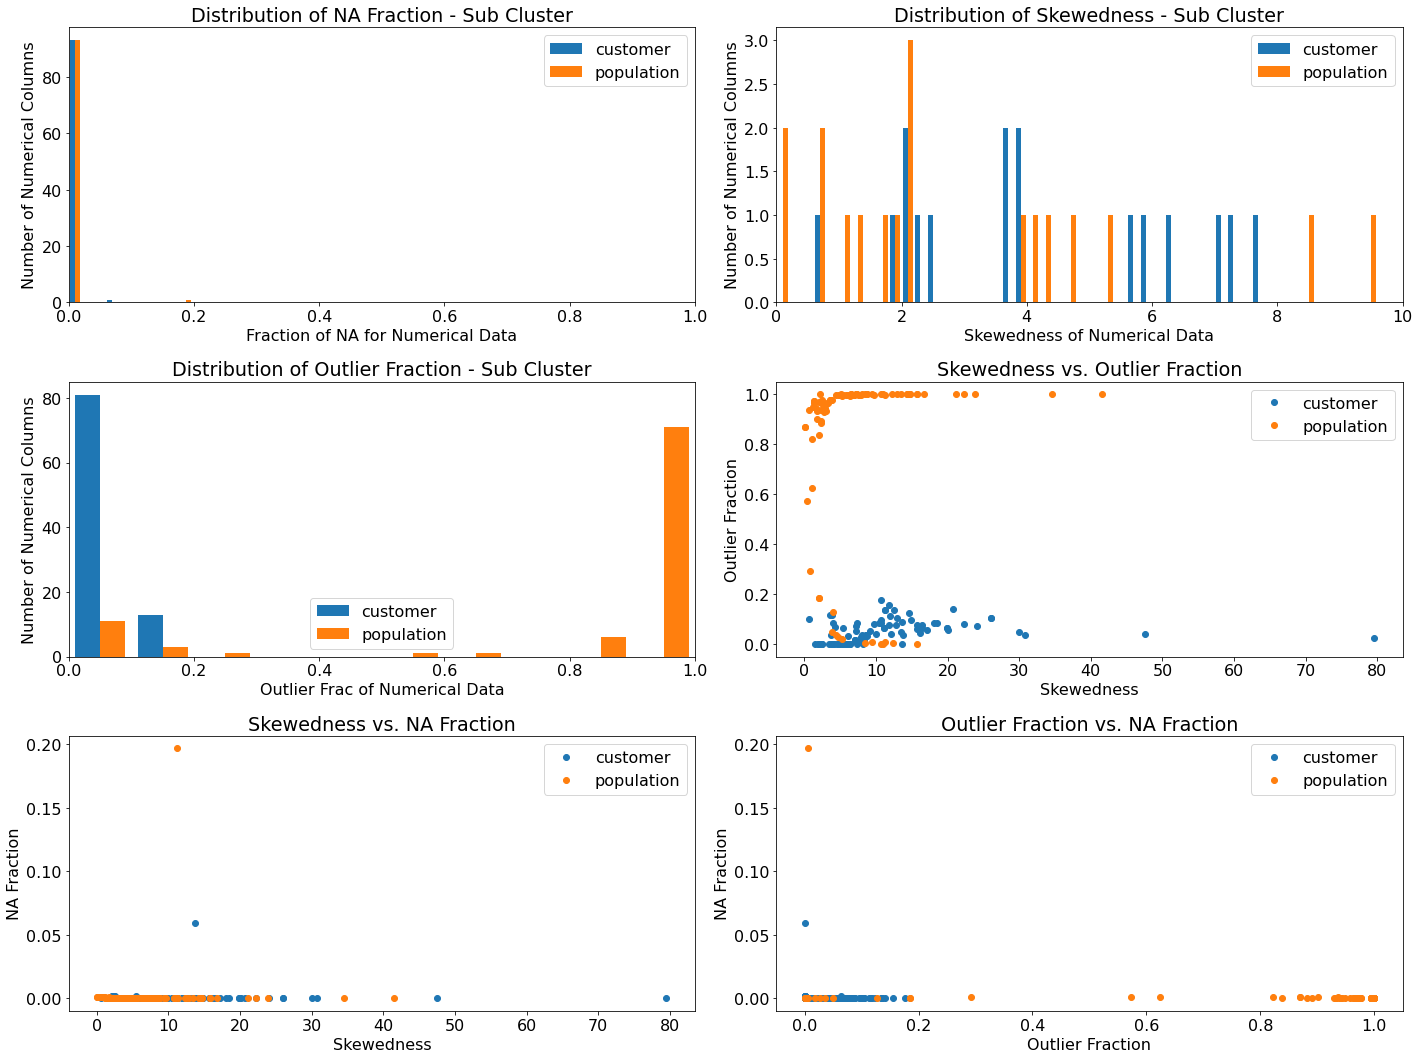

In [443]:
plt.figure(figsize=[20,15])
font_size = 16

plt.subplot(3,2,1)
plt.rc('font', size=font_size)
plt.hist([fraction_nan_cols_subcluster_numerical.values, fraction_nan_cols_subcluster_pop_numerical.values], 
         label=['customer','population'])
plt.xlim(0,1)
plt.legend()
plt.xlabel('Fraction of NA for Numerical Data')
plt.ylabel('Number of Numerical Columns')
plt.title('Distribution of NA Fraction - Sub Cluster')


plt.subplot(3,2,2)
plt.hist([skew_customers_subcluster.values, skew_pop_subcluster.values], label=['customer','population'], 
         bins = np.arange(0,skew_customers_subcluster.max(),0.2))
plt.xlim(0,10)
plt.legend()
plt.xlabel('Skewedness of Numerical Data')
plt.ylabel('Number of Numerical Columns')
plt.title('Distribution of Skewedness - Sub Cluster')
plt.rc('font', size=font_size)

plt.subplot(3,2,3)
outlier_customers_subcluster = stats_customers_subcluster['outlier_frac']
outlier_population_subcluster = stats_population_subcluster['outlier_frac']
plt.hist([outlier_customers_subcluster, outlier_population_subcluster], label=['customer','population'])
plt.xlim(0,1)
plt.legend()
plt.xlabel('Outlier Frac of Numerical Data')
plt.ylabel('Number of Numerical Columns')
plt.title('Distribution of Outlier Fraction - Sub Cluster')
plt.rc('font', size=font_size)

plt.subplot(3,2,4)
plt.plot(abs(skew_customers_subcluster), outlier_customers_subcluster, 'o', color='tab:blue', label = 'customer')
plt.plot(abs(skew_pop_subcluster), outlier_population_subcluster, 'o', color='tab:orange', label = 'population')
plt.xlabel('Skewedness')
plt.ylabel('Outlier Fraction')
plt.title('Skewedness vs. Outlier Fraction')
plt.legend()
plt.rc('font', size=font_size)


plt.subplot(3,2,5)
plt.plot(abs(skew_customers_subcluster), fraction_nan_cols_subcluster_numerical.values, 'o', color='tab:blue', label = 'customer')
plt.plot(abs(skew_pop_subcluster), fraction_nan_cols_subcluster_pop_numerical.values, 'o', color='tab:orange', label = 'population')
plt.legend()
plt.xlabel('Skewedness')
plt.ylabel('NA Fraction')
plt.title('Skewedness vs. NA Fraction')
#plt.xscale('log')
plt.rc('font', size=font_size)

plt.subplot(3,2,6)
plt.plot(outlier_customers_subcluster, fraction_nan_cols_subcluster_numerical.values, 'o', color='tab:blue', label = 'customer')
plt.plot(outlier_population_subcluster, fraction_nan_cols_subcluster_pop_numerical.values, 'o', color='tab:orange', label = 'population')
plt.legend()
#plt.xscale('log')
plt.xlabel('Outlier Fraction')
plt.ylabel('NA Fraction')
plt.title('Outlier Fraction vs. NA Fraction')
plt.rc('font', size=font_size)

plt.tight_layout()
plt.show()

We observe above that skewedness of data in the subcluster is much more pronounced than in the main cluster. The fourth plot shows us that outlier-fraction is not a good metric to determine whether to fill mean/median. This is because customers and population datasets have drastically different outlier fractions. To make comparisons in the customer segmentation report, we have to use consistent processing for both datasets. 

**Therefore, we use skewedness level to choose how to fill NA values in these numerical values.**

In [73]:
customers_subcluster = clean_numeric_columns(customers_subcluster, columns_fill_numerical_subcluster, 1, 1)

In [74]:
population_subcluster = clean_numeric_columns(population_subcluster, columns_fill_numerical_subcluster, 1, 1)

### 1.2.e  Description Statstics after Cleaning Numerical Data

We can also perform Mann-Whitney test to test if the data from customers and population datasets are statistically different. When p-value from the Mann-Whitney test is smaller than 0.05, data from the two datasets are different; otherwise, we fail to reject the null hypothesis that they are the same. 

From the test results below, only for five attributes out of more than 300 numerical attributes, we cannot reach the conclusion that the datasets are statistically different. All the other attributes are indeed statistically different. 

Given the statistically significant difference between customers and population datasets, we should be able to compare the two datasets in the Customer Segmentation part of our analysis.

In [75]:
p_value_list = []
for col in columns_fill_numerical:
    u_statistic, p_value = stats.mannwhitneyu(customers_main[col], population_main[col])
    p_value_list.append(p_value)
    if p_value >= 0.05:
        print('P-value of Mann Whitney Test for column {} is {}'.format(col, round(p_value,3)))

P-value of Mann Whitney Test for column EINGEFUEGT_AM is 0.128
P-value of Mann Whitney Test for column D19_VERSI_OFFLINE_DATUM is 0.185
P-value of Mann Whitney Test for column KBA05_ANTG2 is 0.152
P-value of Mann Whitney Test for column KBA05_VORB1 is 0.22
P-value of Mann Whitney Test for column KBA13_CCM_1800 is 0.413


Out of about 80 numerical attributes in the subcluster, only a few attributes are statistically the same in the customers and population datasets. This means the customer and population datasets' numerical attributes are quite different statistically.

In [76]:
 
p_value_list = []
for col in columns_fill_numerical_subcluster:
    u_statistic, p_value = stats.mannwhitneyu(customers_subcluster[col], population_subcluster[col])
    p_value_list.append(p_value)
    if p_value >= 0.05:
        print('P-value of Mann Whitney Test in Subcluster for column {} is {}'.format(col, round(p_value,3)))

P-value of Mann Whitney Test in Subcluster for column D19_BIO_OEKO is 0.108
P-value of Mann Whitney Test in Subcluster for column D19_SAMMELARTIKEL is 0.357
P-value of Mann Whitney Test in Subcluster for column D19_SAMMELARTIKEL is 0.357
P-value of Mann Whitney Test in Subcluster for column SEMIO_MAT is 0.087


### 1.3.f Clean Missing Values in Categorical Columns

### Description Statistics before Cleaning

We next look at the fraction of NA values in these categorical columns. There are three ways we can clean these attributes, fill, remvoe or encode NA as separate category. 

In [77]:
for col in columns_category:
    col_na_customers = customers_main[col].isnull().sum()/customers_main.shape[0]
    col_na_pop = population_main[col].isnull().sum()/population_main.shape[0]
    
    if (col_na_customers > 0.05) | (col_na_pop > 0.05):
        print('For column {}: fraction of NA {} for customers and {} for population'.format(col, round(col_na_customers,4), round(col_na_pop,4)))
        

For column AGER_TYP: fraction of NA 0.3131 for customers and 0.7382 for population
For column D19_KONSUMTYP: fraction of NA 0.0075 for customers and 0.2241 for population
For column D19_LETZTER_KAUF_BRANCHE: fraction of NA 0.0075 for customers and 0.2241 for population
For column KBA05_MAXHERST: fraction of NA 0.0494 for customers and 0.0688 for population
For column LP_FAMILIE_GROB: fraction of NA 0.0663 for customers and 0.0394 for population
For column REGIOTYP: fraction of NA 0.0716 for customers and 0.0813 for population
For column CJT_GESAMTTYP_Channel: fraction of NA 0.468 for customers and 0.2999 for population
For column LP_FAMILIE_Child: fraction of NA 0.0663 for customers and 0.0394 for population
For column LP_FAMILIE_Generation: fraction of NA 0.0663 for customers and 0.0394 for population
For column LP_LEBENSPHASE_FEIN_other: fraction of NA 0.6734 for customers and 0.761 for population


For most of the attributes, missing value fraction are consistently small. However, due to the statistically different customers vs. population dataset, we find that there are a few exception categories. We employ different strategies for different columns.

- Fill columns: Columns with consistently low missing values can be filled with most frequent category. Columsn include: KBA05_MAXHERST, LP_FAMILIE_GROB, REGIOTYP, LP_FAMILIE_Child, LP_FAMILIE_Generation. 

- Encode NA values as category: There are a few columns with consistent, relatively large number of missing values in both customers and population dataset, but not so significant that they can be directly dropped. These include: CJT_GESAMTTYP_Channel, AGER_TYP, LP_LEBENSPHASE_FEIN_other. 

- Rest of the columns have different fraction of NA values in customers vs. population datasets. For attribute D19_LETZTER_KAUF_BRANCHE and D19_KONSUMTYP, we clearly have different fractions in population vs. customers. but to be consistent in pre-processing step, we follow rules for customers dataset and fill in NA values. 

In [78]:
columns_category_subcluster, prefix_list_subcluster = find_category_cols(customers_subcluster)

for col in columns_category_subcluster:
    col_na_customers = customers_subcluster[col].isnull().sum()/customers_subcluster.shape[0]
    col_na_pop = population_subcluster[col].isnull().sum()/population_subcluster.shape[0]
    
    if (col_na_customers > 0.05) | (col_na_pop > 0.05): 
        print('For columns {}: fraction of NA {} for customers sub-cluster and {} for population sub-cluster' \
              .format(col, round(col_na_customers,4), round(col_na_pop,4)))

For columns CJT_GESAMTTYP_Channel: fraction of NA 0.0793 for customers sub-cluster and 0.1418 for population sub-cluster


We observe that we can fill NA values for all categories in this subcluster.

We define a function below that process NA categorical columns. Columns with NA values larger than the na_high_frac variable are dropped. Columns with NA values smaller than the na_low_frac are filled with the most frequent category in the column/attribute. 

Specifically, based on the above properties of the sub-cluster and remaining cluster, we set the na_low_frac to be 15%, and the varaible na_high_fract to be 95% . 

In [79]:
def process_na_category(df, columns_category, prefix_list, na_low_frac, na_high_frac):
    """
    Process NA values in categorical columns. 
    Fill those with low fraction of NA values with the most frequent category, drop those with high fraction NA values.
    List remainign category columns and corresponding prefix list in following steps.
    
    Input:
        df                    dataframe to be cleaned
        columns_category      list of column names that are categorical
        prefix_list           list of prefixes (in the same order) for the categorical columns
        na_low_frac           NA fraction threshold below which category columns with NA values are filled with most frequent category
        na_high_frac          NA fraction threshold above which category columns with NA values are dropped
        
    Output:
        df                   cleaned dataframe
        fill_na_cols_cat     columns that we have filled NAs
        drop_na_cols_cat     columns that we have dropped with too high NA fraction
        columns_category     list of category columns that are still in the dataframe
        prefix_list          corresponding list of prefixes
    """
    
    # we check the fraction of NaN values in categorical columns
    frac_na = df[columns_category].isnull().sum()/df.shape[0]
    
    # find low fraction NA columns
    cols_low_na = [x for (x,v) in zip (columns_category, frac_na) if v < na_low_frac]
    for col in cols_low_na:
        
        # find most frequent category and fill NA with this category
        most_frequent_category = df[col].value_counts().index[0]
        
        # fill NA with most frequent category
        df[col] = df[col].fillna(most_frequent_category)
        
    # find high fraction NA columns 
    cols_high_na = [x for (x,v) in zip (columns_category, frac_na) if v > na_high_frac]
    prefix_high_na = [x for (x,v) in zip (prefix_list, frac_na) if v > na_high_frac]
    
    # remove high fraction NA columns
    prefix_list = [x for x in prefix_list if x not in prefix_high_na]
    columns_category = [x for x in columns_category if x not in cols_high_na ]
    
    # drop these columns
    df = df.drop(columns = cols_high_na)
    
    
    # output column names
    fill_na_cols_cat = cols_low_na
    drop_na_cols_cat = cols_high_na
    
    
    
    return df, fill_na_cols_cat, drop_na_cols_cat, columns_category, prefix_list

In [80]:
customers_main, fill_na_cols_cat, drop_na_cols_cat, columns_category, prefix_list = \
process_na_category(customers_main, columns_category, prefix_list, 0.15, 0.95)

In [81]:
customers_subcluster, fill_na_cols_cat_subcluster, drop_na_cols_cat_subcluster, columns_category_subcluster, prefix_list_subcluster = \
    process_na_category(customers_subcluster, columns_category_subcluster, prefix_list_subcluster, 0.1, 0.95)


In [82]:
print('number of columns to encode after processing NA categories - for subcluster')
print(len(prefix_list_subcluster))
print('number of columns we have filled NA categories - for subcluster')
print(len(fill_na_cols_cat_subcluster))
print('number of columns we have dropped NA categories - for subcluster')
print(len(drop_na_cols_cat_subcluster))

print('number of columns to encode  after processing NA categories - main cluster data')
print(len(prefix_list))
print('number of columns we have filled NA categories - main cluster')
print(len(fill_na_cols_cat))
print('number of columns we have dropped NA categories - main cluster')
print(len(drop_na_cols_cat))


number of columns to encode after processing NA categories - for subcluster
17
number of columns we have filled NA categories - for subcluster
17
number of columns we have dropped NA categories - for subcluster
0
number of columns to encode  after processing NA categories - main cluster data
46
number of columns we have filled NA categories - main cluster
43
number of columns we have dropped NA categories - main cluster
0


### Categorical Encoding

In the next part, we define a function that clean categorical columns according to a threshold. All columns with unique values greater than the threshold are NOT encoded and DROPPED, whereas those with number of unique values smaller than the threshold are encoded. This is because we are not sure how many categorical attributes to include in the feature reduction step. Including too many attributes increases dimension of the original dataset and may be harder to reduce, whereas including too few may leave out important info as well. 

In [83]:

def category_encode(df, columns, prefix_list):
    """
    Encode columns in the dataframe df as integers. Those with NA values are encoded as separate category. 
    
    INPUT:
    df          (pandas dataframe) dataset contains demographic attributes
    columns     (list) of categorical columns to encode
    prefix_list  (list) of corresponding prefixes for categorical columns 
    
    OUTPUT:
    df
    """
    print_out = 0
    for column, prefix in zip(columns, prefix_list):
        
        # check if there exists NA values in column
        dummy_na = (df[column].isnull().sum() > 0)
        
        if print_out == 1:
            print('Encoding column'+column)
            print('{} Null values'.format(df[column].isnull().sum()))
            print('Encoding with dummy {}'.format(dummy_na))
        

        # encode data in the specific column
        df_encoded = pd.get_dummies(df[column], prefix=prefix, dummy_na= dummy_na, dtype = np.int8)
        
       
        # join on index
        df = df.join(df_encoded)
        
    return df

In [85]:

def clean_category_columns(df, columns, prefix_list, n_category_threshold):
    """
    Clean category columns in dataframe df. Encode, drop or fill-NAs in binary columns.
    INPUT:
        df                    dataframe to be cleaned
        columns               list of categorical columns to be cleaned
        prefix_lsit           list of corresponding prefixes for the columns
        n_category_threshold  threshold for number of categories to choose for encoding or dropping
        
    
    OUTPUT: 
        df                    cleaned dataframe
        column_encode         list of column names that we have encoded (with number of categories fewer than threshold and NOT binary)
        column_remain         list of column names that we have dropped (with number of categories higher than threshold)
        column_binary         list of column names that are binary
        prefix_list_encode    corresponding prefixes for encoding columns
    
    
    """
    print_out = 0
    
    # Select three type of categorical columns to process
    column_encode = []
    prefix_list_encode = []
    column_remain = []
    prefix_list_remain = []
    column_binary = []
    prefix_list_binary = []
    for col, prefix in zip(columns, prefix_list):
        
        # Select those that have too many categories (higher than threshold) and will be dropped
        if (df[col].unique().shape[0] > n_category_threshold): 
            column_remain.append(col)
            prefix_list_remain.append(prefix)
        # Select binary columns that do not need encoding (they already constitute two categories)
        elif (df[col].unique().shape[0] == 2):
            column_binary.append(col)
            prefix_list_binary.append(prefix)
        else: # Select those with smaller number of cateogires to encode
            column_encode.append(col)
            prefix_list_encode.append(prefix)

    ### Process columsn to encode
    # force columns (not Na) to be encoded to int
    for col in column_encode:
        # find not NaN values to force to int
        s = df[col].notnull()
        df.loc[s[s].index, col] = df.loc[s[s].index, col].astype(np.int8)
    
    # print-outs for encoding columns
    if print_out == 1:
        for col in column_encode:
            n_categories_col = df[col].unique().shape[0]
            print('Encoding categorical column {} with {} categories'.format(col, str(n_categories_col)))
        print('Encoding {} categorical columns and dropping {} categorical columns'.format(len(column_encode), len(column_remain)))
    
    # encode columns and drop original columns that were encoded
    df = category_encode(df, column_encode, prefix_list_encode)
    df = df.drop(columns = column_encode)

    ### Drop columns that have too many categories
    df = df.drop(columns = column_remain)
    
    ### Process binary columns 
    # check if the binary columns contain NA values, if yes, then we fill NA with a non-NA value
    for col in column_binary:
        if df[col].isnull().sum() > 0: # one of the binary value is NaN
            binary_values = df[col].unique()
            check_na_value = pd.isnull(binary_values) 
            notna_value = binary_values[check_na_value == False][0]
            
            # fill NA with another value plus 1
            df[col] = df[col].fillna(notna_value + 1)
            
    
    ### clean the names of columns so the names contain integers, not decimal points
    colnames = df.columns.values
    new_colnames = []
    for colname in colnames:
        # find the '.' in column names and strip 
        ind = colname.find('.')
        if ind == -1: # not find
            new_colnames.append(colname)
        else:
            new_colnames.append(colname[:ind])
    df.columns = new_colnames
    
    return df, column_encode, column_remain, column_binary, prefix_list_encode


In [86]:

# execute
customers_main, column_encode, column_remain, column_binary, prefix_list_encode  = clean_category_columns(customers_main, columns_category, prefix_list, 6)

We look at descriptive statistics for categorical columns after category encoding.

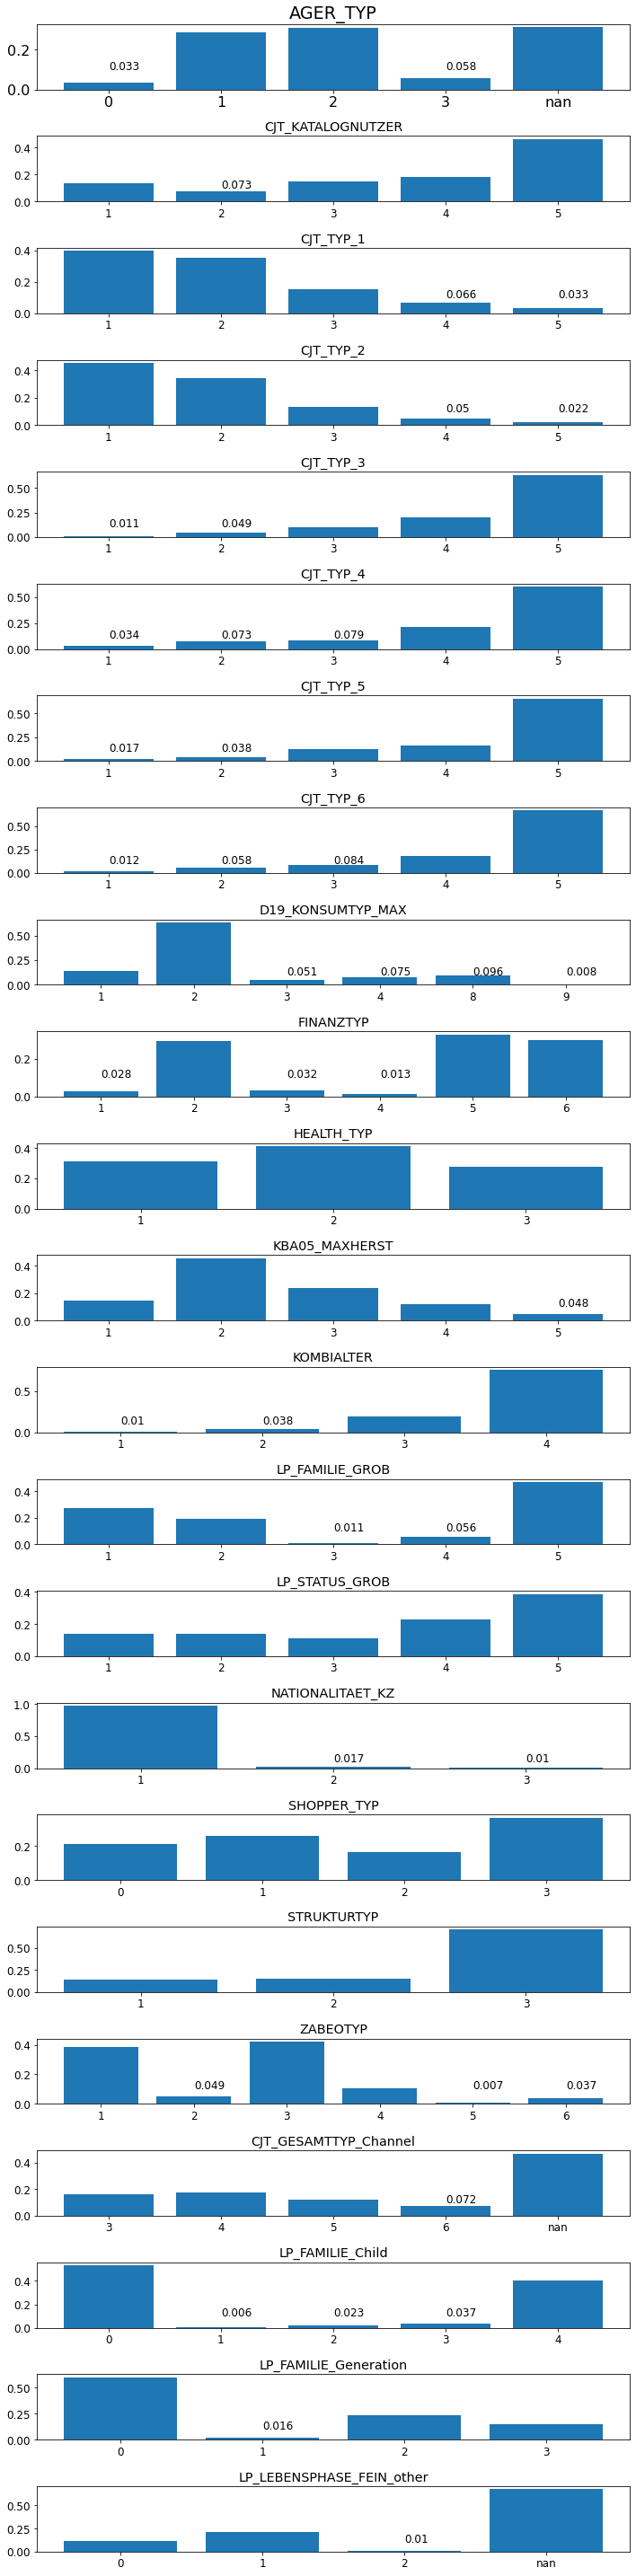

In [87]:
n_graphs = len(prefix_list_encode)
plt.figure(figsize=[10,40])

for ind in range(n_graphs):
    
    prefix = prefix_list_encode[ind]
    column_encoded_names = find_col_names(customers_main, prefix)

    x_values = [x.replace(prefix+'_', '') for x in column_encoded_names]
    y_values = [customers_main[col].sum() for col in column_encoded_names]
    y_values /= sum(y_values)
    plt.subplot(n_graphs,1, ind+1)
    plt.bar(x_values, y_values)
    plt.title(prefix)
    plt.rc('font', size=12)
    #plt.ylabel('Fraction of Values in Data')
    
    # add text for imbalanced data
    ax = plt.gca()
    for x_value, y_value in zip(x_values, y_values):    
        if y_value < 0.1:
            ax.text(x_value, 0.1, str(round(y_value,3)))
    
plt.tight_layout()
plt.show()   

We look at encoded data attributes in the sub-cluster with categorical encoding.

In [88]:

# execute
customers_subcluster, column_encode_subcluster, column_remain_subcluster, column_binary_subcluster, prefix_list_encode_subcluster  \
= clean_category_columns(customers_subcluster, columns_category_subcluster, prefix_list_subcluster, 8)

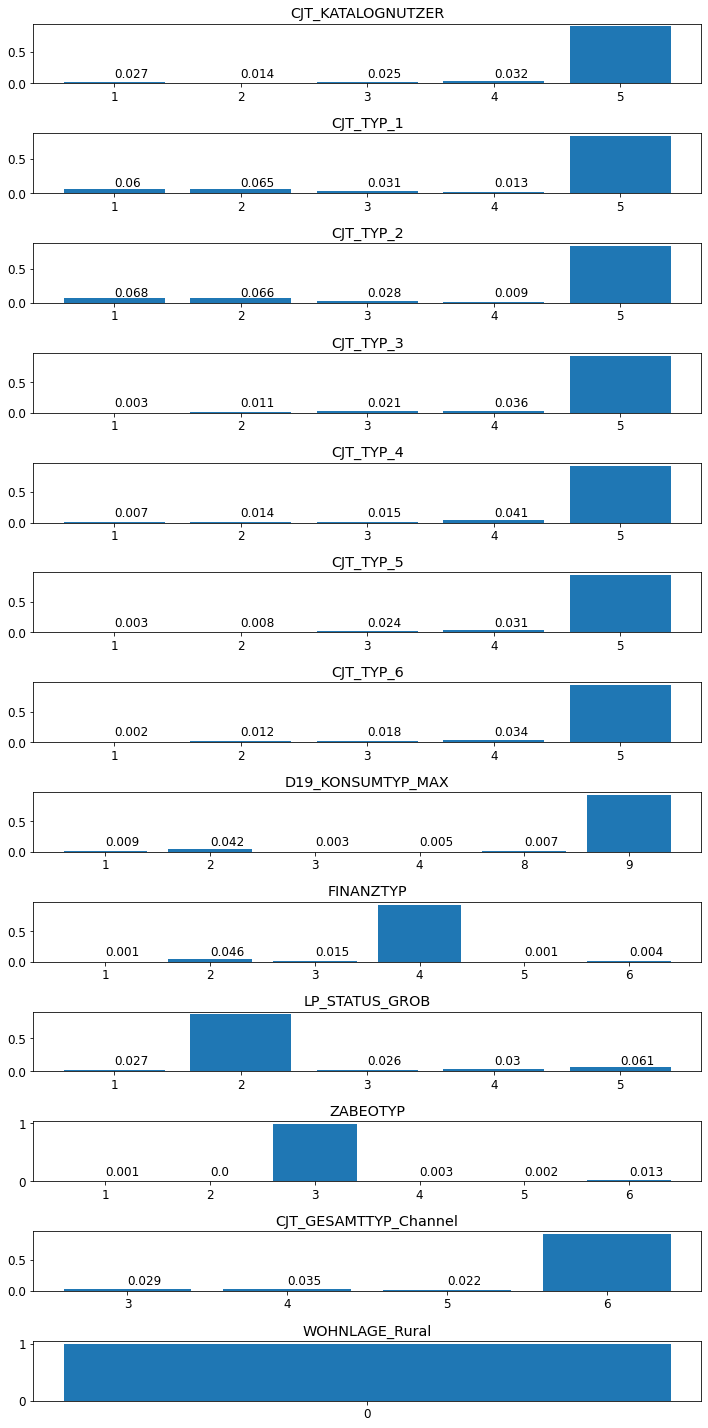

In [89]:
n_graphs = len(prefix_list_encode_subcluster)
plt.figure(figsize=[10,20])

for ind in range(n_graphs):
    
    prefix = prefix_list_encode_subcluster[ind]
    column_encoded_names = find_col_names(customers_subcluster, prefix)

    x_values = [x.replace(prefix+'_', '') for x in column_encoded_names]
    y_values = [customers_subcluster[col].sum() for col in column_encoded_names]
    y_values /= sum(y_values)
    plt.subplot(n_graphs,1, ind+1)
    plt.bar(x_values, y_values)
    plt.title(prefix)
    #plt.ylabel('Fraction of Values in Data')
    
    # add text for imbalanced data
    ax = plt.gca()
    for x_value, y_value in zip(x_values, y_values):    
        if y_value < 0.1:
            ax.text(x_value, 0.1, str(round(y_value,3)))
    
plt.tight_layout()
plt.show()   

We can see that in the datasets, many categorical data are quite imbalanced. There exist a large amount of samples/rows in one category, out of two or a few categories. This imbalance seems more dominant in the dropped sub-cluster. This imbalance of data also suggests that we should try to upsample minority data in our subsequent steps to train and evaluate classifiers. 

### <a id ='data_cleaning_pipeline'> 5. Data Cleaning Pipeline </a>

We put together everything and build a pipeline for cleaning the customers and population dataset, for the both the remaining cluster and for the dropped subcluster.

In [91]:
def clean_df(df,select_main_cluster,na_row_threshold, na_col_threshold, 
             skewedness_outlier_threshold, skew_select, na_low_frac, na_high_frac, n_category_threshold, verbose_print_out):

    """
    Pipelien function for cleaning customers/training dataframe before scaling. 
    INPUT:
        select_main_cluster           indicator we're processing main cluster (rows with small NA values) 
                                      or subcluster (rows with large NA values) or do not remove rows with NA values
        na_row_threshold              threshold fraction of NA values in rows (main or sub-cluster)
        na_col_threshold              threshold fraction of NA values in columns (drop columns if above threshold)
        skewedness_outlier_threshold  skewedness/outlier threshold to fill with median/mean for numerical NA values
        skew_select                   select whether we're using skewedness or outlier fraction 
        na_low_frac                   threshold fraction of NA values in categorical columns below which we fill NA
        na_high_frac                  threshold fraction of NA values in categorical columns above which we drop the column
        n_category_threshold          threshold number of categories above which we drop these categorical columns and below which we encode
        verbose_print_out             level of print-outs information
    
    OUTPUT:
        df                            cleaned dataframe
        d19_letzer_dict               dictionary we used to map strings to integers in column 'D19_LETZER_KAUF_BRANCHE'
        rows_na                       index of rows that we have selected for sub-cluster
        columns_na                    list of columns with too high NA fraction that we have dropped 
        fill_na_cols_cat              list of categorical columns we have filled NA with most frequent cateogires
        drop_na_cols_cat              list of categorical columns we have dropped due to high fraction NA values
        column_encode                 list of categorical columns we have encoded with number of categories smalelr than threshold
        column_remain                 list of categorical columns we have dropped due to numer of categories higher than threshold
        column_binary                 list of categorical columns with binary values
        prefix_list_encode            list of prefixes for categorical columns we have encoded with number of categories smalelr than threshold
        column_names                  list of columns names
    
    """
    
    # clean data - including fill unknown values that are inherently NA ###
    columns_dict, val_unknown_dict, columns_fill_unknown  = create_unknown_dict(df)
    df = fill_encoded_na1(df, columns_dict, val_unknown_dict)

    columns_dict_cat, val_unknown_dict_cat, columns_fill_unknown_cat  = create_unknown_dict_category(df)
    df = fill_encoded_na1(df, columns_dict_cat, val_unknown_dict_cat)
    
    df = clean_unique_cols_na(df)

    df = clean_cameo_cols(df)

    df = clean_time_columns_na(df)

    df = clean_ost_west_cols(df)
    
    df, d19_letzer_dict = clean_d19_letzer(df, {})
    
    df = clean_datetime_columns(df)
    if verbose_print_out > 1:
        print('Finished step 1 of cleaning')
    
    ### Process NA values in rows/columns 
    # subset data to main and sub-cluster based on NA values in rows
    df_afterdrop, rows_na = drop_na_rows(df, na_row_threshold)
    df_subcluster = df.loc[rows_na]
    
    # select relevant cluster or dataset we're interested in 
    if select_main_cluster == 1: # select main cluster
        df = df_afterdrop
    elif select_main_cluster == 0: # select sub cluster
        df = df_subcluster
    else:  #2
        df = df # do not remove rows
    
    # drop NA columns
    df, columns_na = drop_na_columns(df, na_col_threshold)
    
    if verbose_print_out > 1:
        print('Processed {} rows with higher than {} NA fraction'.format(len(rows_na)/(len(rows_na) + df_afterdrop.shape[0]),
                                                                         na_row_threshold))
        print('Dropped {} columns with higher than {} NA fraction'.format(len(columns_na), na_col_threshold))
        if verbose_print_out > 2:
            print('Dropped following columns:')
            print(columns_na)

    ####  fill remaining NA values for all columns 
    column_names = df.columns.values
    
    # find numerical columns and clean 
    columns_fill_numerical  = find_numerical_cols(df)
    df = clean_numeric_columns(df, columns_fill_numerical, skewedness_outlier_threshold, skew_select)
    if verbose_print_out > 1:
        print('Finished step 3a of cleaning - filling NA for {} numerical columns'.format(len(columns_fill_numerical)))
    
    # process NA in category columns (# remove any columns with too many NA values and fill those with very little NA values)
    columns_category, prefix_list = find_category_cols(df)
    df, fill_na_cols_cat, drop_na_cols_cat, columns_category, prefix_list = process_na_category(df, columns_category, prefix_list, 
                                                                                                na_low_frac, na_high_frac)
    
    # eencode categorical columns
    df, column_encode, column_remain, column_binary, prefix_list_encode  = clean_category_columns(df, columns_category, prefix_list, n_category_threshold)
    if verbose_print_out > 1:
        print('Finished step 3b of cleaning - Encoded {} columns, dropped {} columns and found {} binary columns'.format(
            len(column_encode),len(column_remain), len(column_binary)))
    
    ### print the columns we have not processed
    columns_processed = columns_fill_numerical.copy()
    columns_processed.extend(columns_category)
    if verbose_print_out > 1:
        print('Columns we have not processed: ')
        print(list(set(column_names) - set(columns_processed)))
    
    
    return df, d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, column_encode, column_remain, column_binary, prefix_list_encode, column_names

In [92]:
customers = pd.read_csv('data/customers.csv')
del customers['Unnamed: 0']
customers.head()

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


LNR  AGER_TYP  AKT_DAT_KL  ALTER_HH  ALTER_KIND1  ALTER_KIND2  \
0    9626         2         1.0      10.0          NaN          NaN   
1    9628        -1         9.0      11.0          NaN          NaN   
2  143872        -1         1.0       6.0          NaN          NaN   
3  143873         1         1.0       8.0          NaN          NaN   
4  143874        -1         1.0      20.0          NaN          NaN   

   ALTER_KIND3  ALTER_KIND4  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ...  \
0          NaN          NaN                  10.0                  1.0  ...   
1          NaN          NaN                   NaN                  NaN  ...   
2          NaN          NaN                   0.0                  1.0  ...   
3          NaN          NaN                   8.0                  0.0  ...   
4          NaN          NaN                  14.0                  7.0  ...   

   VK_ZG11  W_KEIT_KIND_HH  WOHNDAUER_2008  WOHNLAGE  ZABEOTYP  \
0      2.0             6.0             9.0       7.0         3   
1      3.0             0.0             9.0       NaN         3   
2     11.0             6.0             9.0       2.0         3   
3      2.0             NaN             9.0       7.0         1   
4      4.0             2.0             9.0       3.0         1   

       PRODUCT_GROUP  CUSTOMER_GROUP ONLINE_PURCHASE ANREDE_KZ  \
0  COSMETIC_AND_FOOD     MULTI_BUYER               0         1   
1               FOOD    SINGLE_BUYER               0         1   
2  COSMETIC_AND_FOOD     MULTI_BUYER               0         2   
3           COSMETIC     MULTI_BUYER               0         1   
4               FOOD     MULTI_BUYER               0         1   

  ALTERSKATEGORIE_GROB  
0                    4  
1                    4  
2                    4  
3                    4  
4                    3  

[5 rows x 369 columns]

In [93]:
verbose_print_out = 2
customers_main, d19_letzer_dict_main, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
column_encode, column_remain, column_binary, prefix_list_encode, customer_column_names \
= clean_df(customers,1,0.6, 0.9, 0.2, 1, 0.15, 0.95, 6, verbose_print_out)
    

Finished step 1 of cleaning
Processed 0.26046167011040844 rows with higher than 0.6 NA fraction
Dropped 5 columns with higher than 0.9 NA fraction
Finished step 3a of cleaning - filling NA for 339 numerical columns
Finished step 3b of cleaning - Encoded 23 columns, dropped 8 columns and found 15 binary columns
Columns we have not processed: 
['PRODUCT_GROUP', 'ONLINE_PURCHASE', 'CUSTOMER_GROUP', 'LNR']


We use the same pipeline for pre-processing data in the sub-cluster in the customers dataset.

In [94]:
verbose_print_out = 2
customers_subcluster, d19_letzer_dict_subcluster, rows_na_subcluster, columns_na_subcluster, \
fill_na_cols_cat_subcluster, drop_na_cols_cat_subcluster, \
column_encode_subcluster, column_remain_subcluster, column_binary_subcluster, \
prefix_list_encode_subcluster, customer_column_names_subcluster \
= clean_df(customers,0,0.6, 0.8, 0.2, 1, 0.1, 0.95, 8, verbose_print_out)


Finished step 1 of cleaning
Processed 0.26046167011040844 rows with higher than 0.6 NA fraction
Dropped 275 columns with higher than 0.8 NA fraction
Finished step 3a of cleaning - filling NA for 94 numerical columns
Finished step 3b of cleaning - Encoded 13 columns, dropped 2 columns and found 2 binary columns
Columns we have not processed: 
['PRODUCT_GROUP', 'ONLINE_PURCHASE', 'CUSTOMER_GROUP', 'LNR']


We then go ahead to build pipeline for cleaning the population datset, using same process as for the customers dataset. Note that we have to pass on several values from the customers pipeline. For example, using even the same variables such as na_threshold does not guarantee that we remove exact same columns from population dataset, simply because there are subtle differences in data attributes. The values passed from the customers dataset include:
- The dictionary to encode D19_LETZER column
- Columns removed due to many missing value
- Categorical columns encoded and the prefix list for encoding these categories
- Categorical columns with relatively low NA fraction, and we have filled NA values with most frequent category 
- Categorical columns that we have dropped due to signifcant number of missing values
- Categorical columns that are dropped due to too many categories higher than threshold
- Column names in cleaned dataset

In [95]:
def process_na_category_population(df, fill_na_cols_cat, drop_na_cols_cat):
    """
    Process NA values in categories in the population or test dataset. 
    
    INPUT:
    df                            dataframe to be cleaned
    fill_na_cols_cat              list of categorical columns we have filled NA with most frequent cateogires
    drop_na_cols_cat              list of categorical columns we have dropped due to high fraction NA values
    
    OUTPUT:
    df                            dataframe where we have processed NA categories with fill-NA and dropping 
    """
    for col in fill_na_cols_cat:

        most_frequent_category = df[col].value_counts().index[0]
        
        # fill NA with most frequent category
        df[col] = df[col].fillna(most_frequent_category)
        
    df = df.drop(columns = drop_na_cols_cat)
    
    return df

In [96]:
def clean_category_columns_population(df, column_encode, column_remain, column_binary, prefix_list_encode,  df_customer):
    """
    Clean categorical columns in population or test datasets. 
    Some columns are encoded, some are dropped, and some binary column Na values are converted to numeric values.
    
    INPUT:
    df                     dataframe to be cleaned
    column_encode          list of categorical columns we have encoded with number of categories smalelr than threshold           
    column_remain          list of categorical columns we have dropped due to numer of categories higher than threshold
    column_binary          list of categorical columns with binary values
    prefix_list_encode     list of prefixes for categorical columns we have encoded with number of categories smalelr than threshold
    df_customer            corresponding cleaned customer/train dataframe before scaling
    
    OUTPUT:
    df                     dataframe we've encoded cateogrical columns
    """
    
    # force columns (not Na) to be encoded to int
    for col in column_encode:
        # find not NaN values
        s = df[col].notnull()
        df.loc[s[s].index, col] = df.loc[s[s].index, col].astype(np.int8)

    # encode columns and drop encoded original columns
    df = category_encode_population(df, column_encode, prefix_list_encode, df_customer)
    df = df.drop(columns = column_encode)
 
    # drop columns that are dropped in trained/customer dataset
    df = df.drop(columns = column_remain)
    
    # find the '.' in column names and strip to get new column names without decimal points
    colnames = df.columns.values
    new_colnames = []
    for colname in colnames:
        ind = colname.find('.')
        if ind == -1: # not find
            new_colnames.append(colname)
        else:
            new_colnames.append(colname[:ind])
        
    df.columns = new_colnames
    
    # change any na value in binary columns to new value
    for col in column_binary:
        if df[col].isnull().sum() > 0: # some of the values are NA
            if df[col].unique().shape[0] > 2:
                print('Some columns are not binary in population but binary in customers')
            
            binary_values = df[col].unique()
            check_na_value = pd.isnull(binary_values) 
            notna_value = binary_values[check_na_value == False][0]
            
            # fill NA with another value plus 1
            df[col] = df[col].fillna(notna_value + 1)
            
    
    return df


In [97]:
def post_process_population(df, df_customer, prefix_list_encode, verbose_print_out):
    """
    1. Post process customers/train dataset, which adds columns that are in population/test dataset but not in customer/train dataset.
    2. Remove outlier categorical columns that have small fractions in both train, test OR customers, population datasets.
    
    Since this function modifies both population and customers dataset, 
    to simplify our work-flow, we only use this function in EDA (Exploratory data analysis).
    
    INTPUT:
    df                  (pandas dataframe) test or population dataset to be cleaned   
    df_customer         (pandas dataframe) corresponding cleaned customer/train dataframe before scaling
    prefix_list_encode   list of prefixes for categorical columns we have encoded with number of categories smalelr than threshold
    verbose_print_out    level of print-outs information
    
    
    OUTPUT:
    df                  cleaned test or population dataset
    df_customer         updated customers/train dataset
    """

    for prefix in prefix_list_encode:
        # find categories that are encoded in the population dataset, but not in customers dataset
        categories_encoded_population = find_col_names(df, prefix)
        categories_encoded_customer = find_col_names(df_customer, prefix)

        # add columns in population dataset, but not in customers dataset
        diff_pop_customers = set(categories_encoded_population) - set(categories_encoded_customer)
        if diff_pop_customers == set(): # do nothing if no such column
            pass
        else: # create new column in customers dataset with -
            for col in diff_pop_customers:
                df_customer[col] = 0
                if verbose_print_out > 0:
                    print('Adding colum {} in population, but not in customer dataset'.format(col))
                
    
        # clean and remoe categories with fraction below 0.001 or 0.1% in both datasets
        categories_encoded = find_col_names(df, prefix)
        
        x_values = [x.replace(prefix+'_', '') for x in categories_encoded]
        y_values = [df_customer[col].sum() for col in categories_encoded]
        y_values /= sum(y_values)
        y_values_pop = [df[col].sum() for col in categories_encoded]
        y_values_pop /= sum(y_values_pop)
        
        y_test_check = [y<0.001 for y in y_values]
        y_test_check_pop = [y<0.001 for y in y_values_pop]
        y_test_total = [x and y for x, y in zip(y_test_check, y_test_check_pop)]
        x_values_remove = [x for x,y_test in zip(x_values, y_test_total) if y_test]
        
        for x_values_remove_col in x_values_remove:
            col_remove = prefix+'_'+x_values_remove_col
            df = df.drop(columns = col_remove)
            df_customer = df_customer.drop(columns = col_remove)
            if verbose_print_out > 0:
                print('Removing outlier categorical columns {}'.format(col_remove))
    
    return df, df_customer

In [98]:

def category_encode_population(df, columns, prefix_list, df_customer):
    """
    Encode categorical columns in population or test datasets. 
    For each column to encode, encode values and make sure column names don't contain decimal point. 
    Encode Na values if customers/train dataset encodes Na values.
    Then for each encoded column in customers/train dataset, we make sure that we have same column. 
    
    INTPUT:
    df               dataframe to be cleaned
    columns          list of categorical columns we have encoded with number of categories smalelr than threshold
    prefix_list      list of prefixes for categorical columns we have encoded with number of categories smaller than threshold
    df_customer      corresponding cleaned customer/train dataframe before scaling
    
    OUTPUT:
    df               cleaned dataframe with cateogry columns encoded; added columns if present in customers/train dataset 
    """
    
    
    print_out  = 1
    
    for column, prefix in zip(columns, prefix_list):

        # check if NaN data is encoded for this column in customers data
        nan_encoded = prefix+'_nan'
        dummy_na_encode = nan_encoded in df_customer.columns #if true, then nan data is encoded
             
        # encode data in the specific column
        df_encoded = pd.get_dummies(df[column], prefix=prefix, dummy_na= dummy_na_encode, dtype = np.int8)
        
        # remove any decimal points in column names
        colnames = df_encoded.columns.values
        new_colnames = []
        for colname in colnames:
            ind = colname.find('.')
            if ind == -1: # not find
                new_colnames.append(colname)
            else:
                new_colnames.append(colname[:ind])
        df_encoded.columns = new_colnames
        
        # find categories that are encoded in the customers dataset
        categories_encoded = find_col_names(df_customer, prefix)
        # if the prefix is D19_KONSUMTYP, make sure we don't include columns encoded from D19_KONSUMTYP_MAX
        if prefix == 'D19_KONSUMTYP':
            # remove categories with D19_KONSUMTYP_MAX
            categories_encoded1 = find_col_names(df_customer, 'D19_KONSUMTYP')
            categories_encoded2 = find_col_names(df_customer, 'D19_KONSUMTYP_MAX')
            categories_encoded = list(set(categories_encoded1) - set(categories_encoded2))
            
        
        # add columns in customers dataset, but not in population dataset
        for cat in categories_encoded:   
            if cat in list(df_encoded.columns.values):
                if print_out > 1:
                    print('encoded column: '+cat)
                pass
            else: 
                if print_out > 0:
                    #print(prefix)
                    #print(cat)
                    print('add separate column for population: '+cat)
                df_encoded[cat] = 0
       

        # join on index
        df = df.join(df_encoded)
        
    return df

In [99]:
def clean_df_population(df, df_customer, select_main_cluster, na_row_threshold, columns_na, skew_outlier_threshold, skew_select,
                       column_encode, column_remain, column_binary, prefix_list_encode,  
                       fill_na_cols_cat, drop_na_cols_cat, post_process, d19_letzer_dict, verbose_print_out):
    """
    Pipelien function for cleaning populaiton/test dataframe before scaling. 
    INPUT:
        df                            dataframe to be cleaned
        df_customer                   corresponding cleaned customer/train dataframe before scaling
        select_main_cluster           indicator we're processing main cluster (rows with small NA values) 
                                      or subcluster (rows with large NA values) or do not remove rows with NA values
        na_row_threshold              threshold fraction of NA values in rows (main or sub-cluster)
        columns_na                    list of columns with too high NA fraction that we have dropped 
        skew_outlier_threshold        skewedness/outlier threshold to fill with median/mean for numerical NA values
        skew_select                   select whether we're using skewedness or outlier fraction 
        column_encode                 list of categorical columns we have encoded with number of categories smalelr than threshold
        column_remain                 list of categorical columns we have dropped due to numer of categories higher than threshold
        column_binary                 list of categorical columns with binary values
        prefix_list_encode            list of prefixes for categorical columns we have encoded with number of categories smalelr than threshold
        fill_na_cols_cat              list of categorical columns we have filled NA with most frequent cateogires
        post_process                  whether we modify customer/train dataframes to add columns in population/test, and to remove outlier columns
        drop_na_cols_cat              list of categorical columns we have dropped due to high fraction NA values
        d19_letzer_dict               dictionary we used to map strings to integers in column 'D19_LETZER_KAUF_BRANCHE'
        verbose_print_out             level of print-outs information
    
    OUTPUT:
        df                            cleaned dataframe
        df_customer                   updated customer/train dataframe if post_process is True
       
    
    """
    
    #clean data - including fill unknown values that are inherently NA ###
    
    columns_dict, val_unknown_dict, columns_fill_unknown  = create_unknown_dict(df)
    df = fill_encoded_na1(df, columns_dict, val_unknown_dict)

    columns_dict_cat, val_unknown_dict_cat, columns_fill_unknown_cat  = create_unknown_dict_category(df)
    df = fill_encoded_na1(df, columns_dict_cat, val_unknown_dict_cat)

    
    df = clean_unique_cols_na(df)
   
    df = clean_cameo_cols(df)

    df = clean_time_columns_na(df)

    df = clean_ost_west_cols(df)
    
    df, d19_letzer_dict = clean_d19_letzer(df, d19_letzer_dict)
    
    df = clean_datetime_columns(df)
    if verbose_print_out > 0:
        print('Finished step 1 of cleaning')

    
    # drop rows and columns, output data after dropping sub-cluster
    df_afterdrop, rows_na = drop_na_rows(df, na_row_threshold)

    # select sub cluster (dropped rows)
    df_subcluster = df.loc[rows_na]
    
    if select_main_cluster == 1: # select main cluster
        df = df_afterdrop
    elif select_main_cluster == 0: # select sub cluster
        df = df_subcluster
    else:  #2
        df = df # do not remove rows
    
    # drop NA columns
    df = df.drop(columns = columns_na)
    
    if verbose_print_out > 0:
        print('Processed {} rows with higher than {} NA fraction'.format(len(rows_na)/(len(rows_na) + df_afterdrop.shape[0]),
                                                                         na_row_threshold))
        print('Dropped {} columns'.format(len(columns_na)))
        if verbose_print_out > 1:
            if len(columns_na) < 20:
                print('Dropped following columns:')
                print(columns_na)
            else:
                print('Dropped {} columns'.format(len(columns_na)))
    
    # fill NA for all columns ### 
    column_names = df.columns.values
    
    # find numerical columns
    columns_fill_numerical  = find_numerical_cols(df)
    
    df = clean_numeric_columns(df, columns_fill_numerical, skew_outlier_threshold, skew_select)
    if verbose_print_out > 0:
        print('Finished step 3a of cleaning - filling NA for {} numerical columns'.format(len(columns_fill_numerical)))
  
    
    # fill NA in category columns 

    # remove same columns as in customers dataset and fill those with very little NA values (same as in customers dataset)
    df = process_na_category_population(df, fill_na_cols_cat, drop_na_cols_cat)
    
    # execute
    df  = clean_category_columns_population(df, column_encode, column_remain, column_binary, prefix_list_encode, df_customer)

    if verbose_print_out > 0:
        print('Finished step 3b of cleaning - Encoded {} columns, dropped {} columns and found {} \
        binary columns'.format(len(column_encode), len(column_remain), len(column_binary)))
 
    # print the columns we have not processed
    columns_processed = columns_fill_numerical.copy()
    columns_processed.extend(fill_na_cols_cat)
    columns_processed.extend(drop_na_cols_cat)
    columns_processed.extend(column_encode)
    columns_processed.extend(column_remain)
    
    if verbose_print_out > 0:
        print('Columns we have not processed: ')
        print(list(set(column_names) - set(columns_processed)))   

    if post_process:
        df, df_customer = post_process_population(df, df_customer, prefix_list_encode, verbose_print_out)
        if verbose_print_out > 0:
            print('Post-processing datasets')
    
    
    return df, df_customer

In [4]:
# import population datasets
population = pd.read_csv('data/azdias1.csv')
del population['Unnamed: 0']
print('Importing dataset')
print(population.shape)
for i in range(2,10):
    azdias_filename = 'data/azdias'+str(i)+'.csv'
    print('Importing dataset '+azdias_filename)
    population_add = pd.read_csv(azdias_filename)
    del population_add['Unnamed: 0']
    
    population = population.append(population_add, ignore_index=True)
    print(population.shape)

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Importing dataset
(100000, 366)
Importing dataset data/azdias2.csv
(200000, 366)
Importing dataset data/azdias3.csv
(300000, 366)
Importing dataset data/azdias4.csv
(400000, 366)
Importing dataset data/azdias5.csv
(500000, 366)
Importing dataset data/azdias6.csv
(600000, 366)
Importing dataset data/azdias7.csv
(700000, 366)
Importing dataset data/azdias8.csv
(800000, 366)
Importing dataset data/azdias9.csv
(891221, 366)


We test our population pipeline on a subset of population data and compare the statistics for category-encoded information as shown below. The customers and population datasets have qutie similar distributions of these encoded information. We can also observe that there are significant imbalances for many of the dataset's categorical information.

In [101]:
verbose_print_out = 2
# post_process is TRUE
population_cleaned, customers_main = clean_df_population(population, \
                                             customers_main, 1, 0.6, columns_na, 0.2, 1, \
                       column_encode, column_remain, column_binary, prefix_list_encode,  \
                       fill_na_cols_cat, drop_na_cols_cat, 1, d19_letzer_dict_main, verbose_print_out)

Finished step 1 of cleaning
Processed 0.10458124303623904 rows with higher than 0.6 NA fraction
Dropped 5 columns
Dropped following columns:
['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'TITEL_KZ']
Finished step 3a of cleaning - filling NA for 339 numerical columns
Finished step 3b of cleaning - Encoded 23 columns, dropped 8 columns and found 15         binary columns
Columns we have not processed: 
['LNR']
Post-processing datasets


In [102]:
diff_pop_customers_main = set(population_cleaned.columns) - set(customers_main.columns)
print('Columns in population but not in customers')
print(diff_pop_customers_main)

print('Columns in customers but not in population')
print(set(customers_main.columns) - set(population_cleaned.columns) )

Columns in population but not in customers
set()
Columns in customers but not in population
{'PRODUCT_GROUP', 'ONLINE_PURCHASE', 'CUSTOMER_GROUP'}


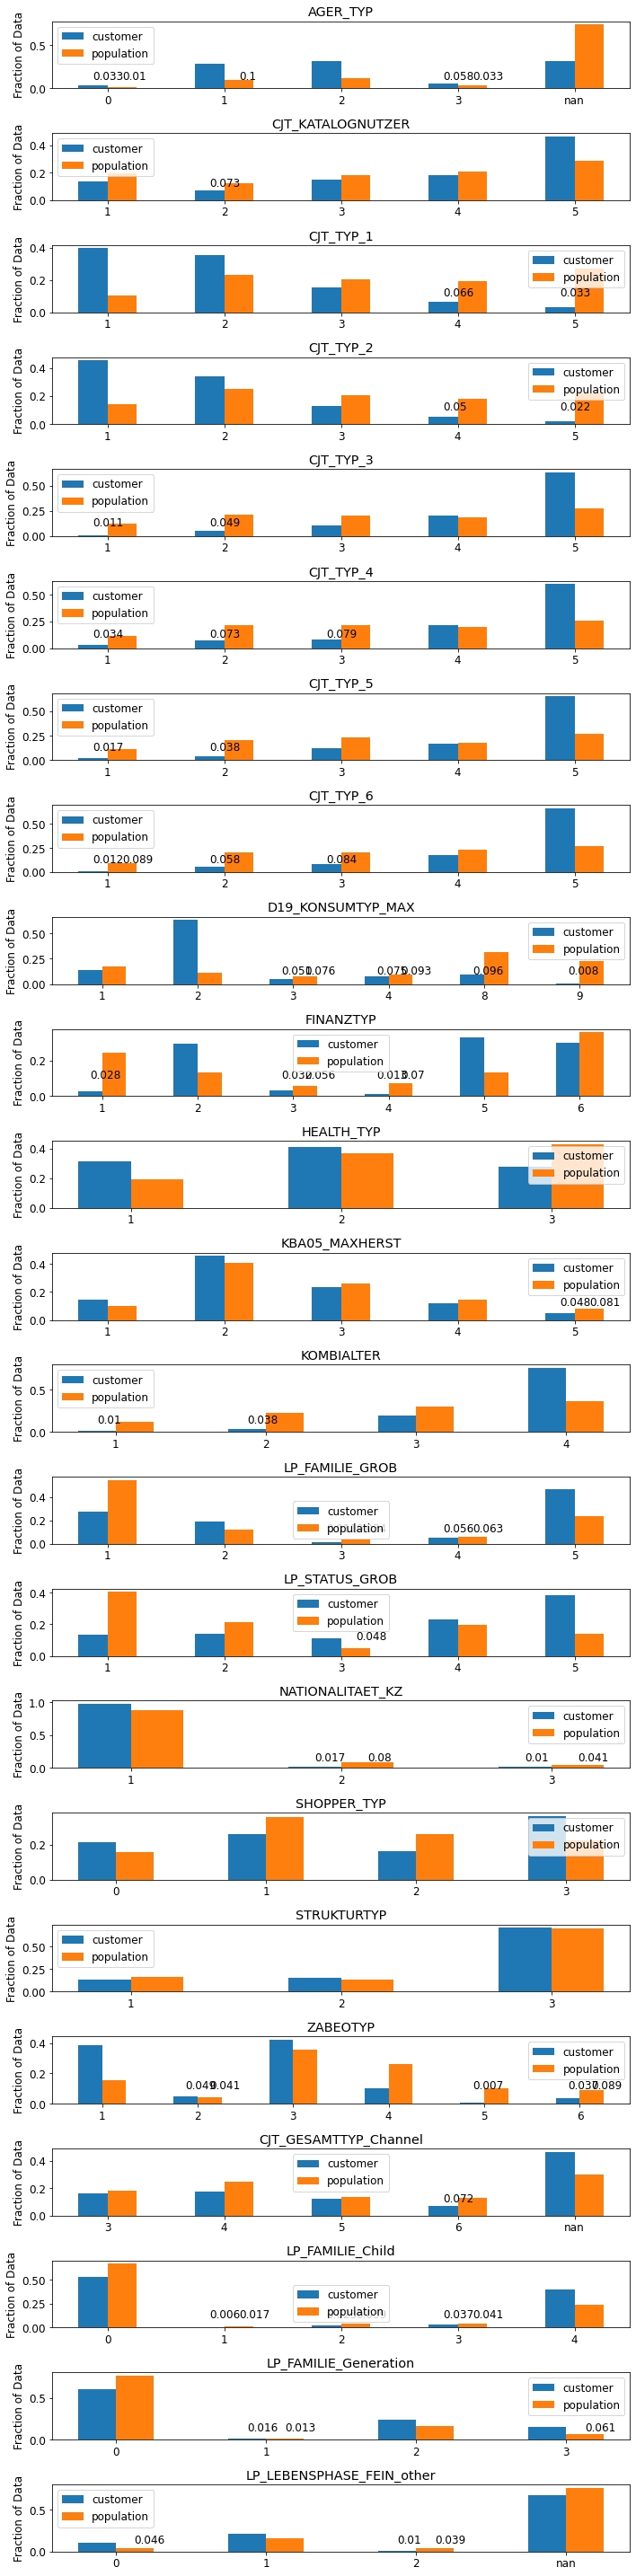

In [103]:
n_graphs = len(prefix_list_encode)
plt.figure(figsize=[10,40])

for ind in range(n_graphs):
    
    prefix = prefix_list_encode[ind]
    column_encoded_names = find_col_names(customers_main, prefix)
    
    x_values = [x.replace(prefix+'_', '') for x in column_encoded_names]
    y_values = [customers_main[col].sum() for col in column_encoded_names]
    y_values /= sum(y_values)
    y_values_pop = [population_cleaned[col].sum() for col in column_encoded_names]
    y_values_pop /= sum(y_values_pop)
    
    barwidth = 0.25
    N = len(x_values)
    x_inds = np.arange(N)    # the x locations for the groups
    plt.subplot(n_graphs,1, ind+1)
    plt.bar(x_inds, y_values, label = 'customer', width = barwidth)
    plt.bar(x_inds + barwidth, y_values_pop, label = 'population', width = barwidth)
    plt.ylabel('Fraction of Data')
    plt.title(prefix)
    plt.legend()
   
    # add text for imbalanced data
    ax = plt.gca()
    for x_ind, y_value in zip(x_inds, y_values):    
        if y_value < 0.1:
            ax.text(x_ind, 0.1, str(round(y_value,3)))
    for x_ind, y_value_pop in zip(x_inds, y_values_pop):    
        if y_value_pop < 0.1:
            ax.text(x_ind + barwidth, 0.1, str(round(y_value_pop,3)))
    ax.set_xticks(x_inds + barwidth / 2)
    ax.set_xticklabels(x_values)

plt.tight_layout()
plt.show()   

There is clearly different fraction of customers/population belonging in the same category.

We process the sub-cluster dataset in parallel. 

In [177]:
verbose_print_out = 2
population_subcluster, customers_subcluster = clean_df_population(population, \
                                             customers_subcluster, 0, 0.6, columns_na_subcluster, 0.2, 1, \
                       column_encode_subcluster, column_remain_subcluster, column_binary_subcluster, prefix_list_encode_subcluster,  \
                       fill_na_cols_cat_subcluster, drop_na_cols_cat_subcluster, 1, d19_letzer_dict_subcluster, verbose_print_out) 

Finished step 1 of cleaning
Processed 0.10458124303623904 rows with higher than 0.6 NA fraction
Dropped 275 columns
Dropped 275 columns
Finished step 3a of cleaning - filling NA for 94 numerical columns
Finished step 3b of cleaning - Encoded 13 columns, dropped 2 columns and found 2         binary columns
Columns we have not processed: 
['LNR']
Adding colum FINANZTYP_5 in population, but not in customer dataset
Adding colum WOHNLAGE_Rural_1 in population, but not in customer dataset
Removing outlier categorical columns WOHNLAGE_Rural_1
Post-processing datasets


In [178]:
print('Columns in population but not in customers')
print(set(population_subcluster.columns) - set(customers_subcluster.columns) )

print('Columns in customers but not in population')
print(set(customers_subcluster.columns) - set(population_subcluster.columns) )

Columns in population but not in customers
set()
Columns in customers but not in population
{'ONLINE_PURCHASE', 'PRODUCT_GROUP', 'CUSTOMER_GROUP'}


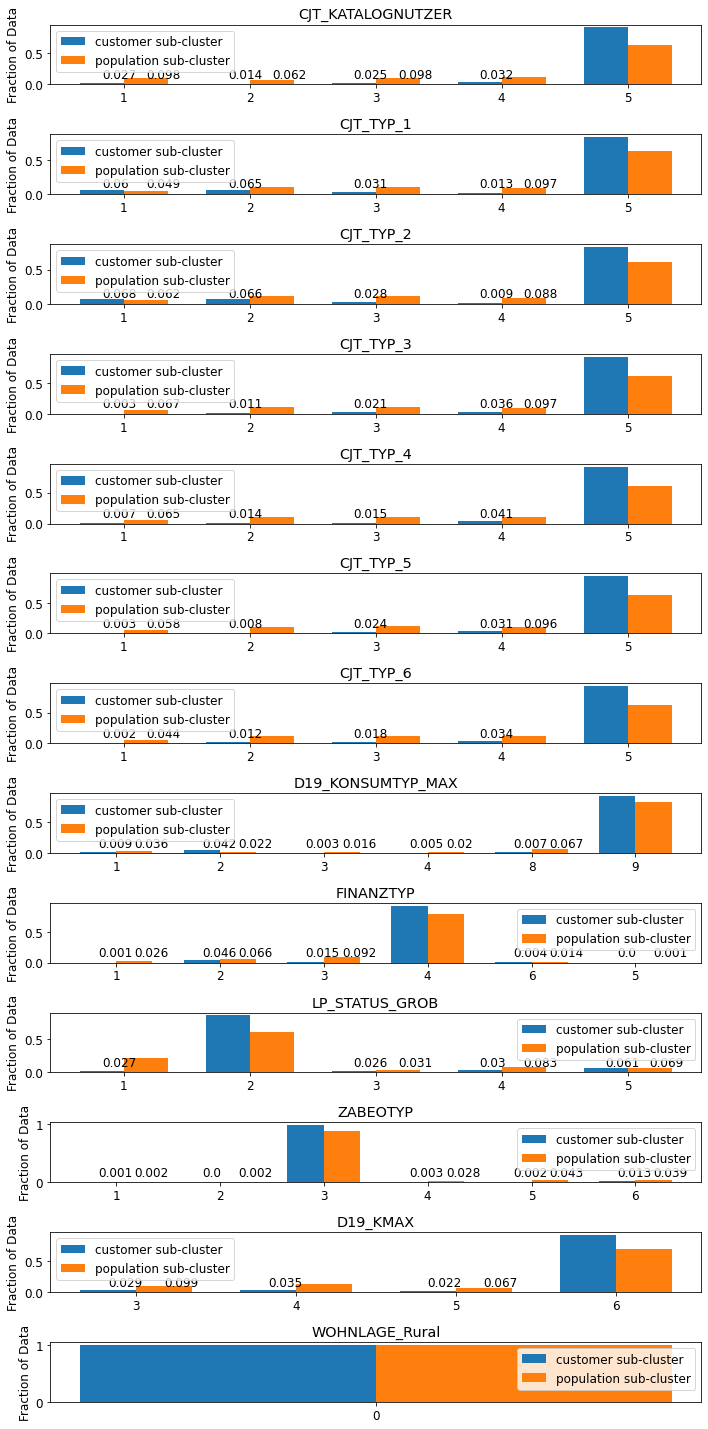

In [180]:
n_graphs = len(prefix_list_encode_subcluster)
plt.figure(figsize=[10,20])

for ind in range(n_graphs):
    
    prefix = prefix_list_encode_subcluster[ind]
    column_encoded_names = find_col_names(customers_subcluster, prefix)

    x_values = [x.replace(prefix+'_', '') for x in column_encoded_names]
    y_values = [customers_subcluster[col].sum() for col in column_encoded_names]
    y_values /= sum(y_values)
    y_values_pop = [population_subcluster[col].sum() for col in column_encoded_names]
    y_values_pop /= sum(y_values_pop)
    
    barwidth = 0.35
    N = len(x_values)
    x_inds = np.arange(N)    # the x locations for the groups
    plt.subplot(n_graphs,1, ind+1)
    plt.bar(x_inds, y_values, label = 'customer sub-cluster', width = barwidth)
    plt.bar(x_inds + barwidth, y_values_pop, label = 'population sub-cluster', width = barwidth)
    plt.title(prefix)
    plt.ylabel('Fraction of Data')
    plt.legend()
    
    # add text for imbalanced data
    ax = plt.gca()
    for x_ind, y_value in zip(x_inds, y_values):    
        if y_value < 0.1:
            ax.text(x_ind, 0.1, str(round(y_value,3)))
    for x_ind, y_value_pop in zip(x_inds, y_values_pop):    
        if y_value_pop < 0.1:
            ax.text(x_ind + barwidth, 0.1, str(round(y_value_pop,3)))
    ax.set_xticks(x_inds + barwidth / 2)
    ax.set_xticklabels(x_values)

plt.tight_layout()
plt.show()   

## <a id='customer_segmentation'> Part 2: Customer Segmentation Report </a>

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

The data cleaning pipeline is created in the following steps. 
- We first create a pipeline for the customers dataset, including previously defined data clenaing pipeline, plus two steps of scaling and PCA. 
- We go on to optimize the pipeline and explain what the reduced features mean. This is essentially the 'fit' step for the pipeline using customers dataset. 
- We group the reduced features to several clusters, inverse-transform features back to demographics information, and explain the typical cluster profiles
- After that, we analyze the population data using the same cleaning, scaling and PCA processes so that we arrive at the same reduced features for comparison. 
- We compare the reduced features from customers and population datasets; we then compare the representation of these customer segments in customers base and general population. 


For each of the steps listed, we note that we have two analysis in parallel, one for the dropped sub-cluster (i.e. rows with many missing attributes in the original dataset) and the other for the remaining data.

Here is the notebook structure of this part of the project.  After we've gone through this entire process for main cluster, we repeat this for the sub-cluster.


- [1. Pipeline for Customers](#pipeline_customer)  
    Data Cleaning + Scaling + PCA
  
  
- [2. Feature Reduction and Customer Segmentation](#feature_reduction)    
    a. Optimize Pipeline for Feature Reduction and Customer Segmentation  
    b. Explain Reduced Features  
    c. Inverse-Transform to Demographics Info and Explain Customer Segments  
    
    
- [3. Pipeline for Population](#pipeline_population)   
    a. Population Pipeline with Scaling and PCA  
    b. Compare transformed Customers vs. Population  
    
- [4. Customer Segmentation for Sub-Cluster](#segment_subcluster) 





### <a id=pipeline_customer> 2.1. Pipeline for Customers </a>
The data pipeline first cleans the data, scales data and then perform feature reduction using PCA. The data cleaning step is already defined in Part 1. The pipeline is built-in with several dependent parameters, such that one can choose what rows/columns with missing values to drop, which categorical columns to encode, and which scalers to use.  

This step is essentially the 'fit' step for a conventional data pipeline.

In [181]:
n_graphs = len(prefix_list_encode)
column_categorical_encoded = []

for ind in range(n_graphs):
    
    prefix = prefix_list_encode[ind]
    column_encoded_names = find_col_names(customers_main, prefix)
    column_categorical_encoded.extend(column_encoded_names)
    
columns_notcategorical_encoded = list(customers_main.columns)
for col in column_categorical_encoded:
    columns_notcategorical_encoded.remove(col)

columns_notcategorical_encoded.remove('LNR')
columns_notcategorical_encoded.remove('PRODUCT_GROUP')
columns_notcategorical_encoded.remove('ONLINE_PURCHASE')
columns_notcategorical_encoded.remove('CUSTOMER_GROUP')

print('Cleaned dataset includes {} categorical encoded columns and {} non-categorical encoded columns'.format(len(column_categorical_encoded),
                                                                                            len(columns_notcategorical_encoded)))

Cleaned dataset includes 108 categorical encoded columns and 341 non-categorical encoded columns


Encoded cateogrical columns don't need to be scaled as they are already binary. The remainign columns are either ordinal or numerical. Though not ideal we set threshold of number of unique values. Those columns with higher number of unique values are more likely not ordinal and normally distributed. 

In [227]:

def scale_df(df,n_numeric_threshold, scalar_choice, prefix_list_encode, mailout):
    """
    Scale attributes in dataset that are not unique identifiers or attributes. 
        1. Find categorical encoded columns that do not need be scaled. 
        2. Select likely rank columns as those with number of unique values smaller than n_numeric_threshold, 
        and likely normal columns as those with more unique values.
        3. Fit min-max and standard scalers for likely rank and likely normal attributes respectively.
        4. Concatenate scaled data in following order: rank, normal and categorical columns.
        
    INPUT:
        df                      dataset to be scaled
        numeric_thrshold        threshold to choose scaler 
                                if number of unique values for the column/attribute is BELOW threshold, use 1st scaler in scalar_choice 
                                if number of unique values for the column/attribute is ABOVE threshold, use 2nd scaler in scalar_choice 
        scalar_choice           (list) 2 scaler choices
        prefix_list_encode      prefix of encoded cateogrical columns used to find cateogrical columns that don't need scaling at all
        mailout                 indicates if this is the mail-out dataset
        
    OUTPUT:
        df_transformed_X         Scaled data 
        col_name_likely_rank     List of columns that are likely rank
        col_name_likely_normal   List of columns that are likely normal
        rank_scaler              Fitted rank scalers
        numeric_scaler           Fitted numeric scalers
    
    """
    
    # find names of columns that are categorically encoded
    n_encode = len(prefix_list_encode)
    column_categorical_encoded = []
    for ind in range(n_encode):
    
        prefix = prefix_list_encode[ind]
        column_encoded_names = find_col_names(df, prefix)
        column_categorical_encoded.extend(column_encoded_names)
    
    # do not scale categorical encoded data (they are already 0 or 1)
    
    
    # find remaining columns that are NOT categorically encoded
    colnames = list(df.columns)
    for col in column_categorical_encoded:
        if col in colnames:
            colnames.remove(col)

    # remove attributes that are not scaled 
    if mailout == 0: # not mailout pipeline
        colnames.remove('LNR')
        colnames.remove('PRODUCT_GROUP')
        colnames.remove('ONLINE_PURCHASE')
        colnames.remove('CUSTOMER_GROUP')
    else:
        colnames.remove('LNR')
    
    
    # find those columns (rank like) to scale min max
    col_likely_rank_bool = [df[col].value_counts().shape[0] < n_numeric_threshold for col in colnames]
    col_ind =  [i for i, x in enumerate(col_likely_rank_bool) if x]
    col_name_likely_rank = [colnames[i] for i in col_ind]
    
    # use min-max for these likely rank columns
    rank_scaler = scalar_choice[0]
    rank_data = df[col_name_likely_rank]
    rank_data_transformed = rank_scaler.fit_transform(rank_data)
    df_rank_data_transformed = pd.DataFrame(data =rank_data_transformed, columns = col_name_likely_rank, index = df.index )
    
    
    # remove thes likely rank columns, find remaining columns -> likely normally distributed
    for col in col_name_likely_rank:
        if col in colnames:
            colnames.remove(col)
    col_name_likely_normal = colnames
    
    # use standard scaler for these remaining columns
    numeric_scaler = scalar_choice[1]
    numeric_data = df[col_name_likely_normal]
    
    if numeric_data.shape[1] > 0:
        numeric_data_transformed = numeric_scaler.fit_transform(numeric_data) # fit numeric scaler
        df_numeric_transformed = pd.DataFrame(data =numeric_data_transformed, columns = col_name_likely_normal, index = df.index )
    else:
        # do not fit numeric scaler
        df_numeric_transformed = pd.DataFrame(columns = col_name_likely_normal, index = df.index) #create empty dataframe
    
    
    # cateogrical encoded data
    categorical_data = df[column_categorical_encoded]
    
    
    # concatenate transformed data
    df_transformed_X = df_rank_data_transformed.join(df_numeric_transformed)
    
    
    
    for col in column_categorical_encoded:
        df_transformed_X[col] = df[col]
        

    return df_transformed_X, col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler

We then perform PCA on the cleaned and scaled dataset. We select a target variance level and output the required number of components. 

In [106]:
# Choose n_components given desired target variance
def perform_pca(df_scaled, target_variance):
    """
    Perform PCA on scaled dataset.
        Fit PCA model with target variance. 
        Transform scaled dataset to PCA components.
        Output number of components required to explain cumulatively the target variance.
        
    INPUT:
    df_scaled              scaled dataset before PCA
    target_variance        target variance the PCA is desired to achieve
    
    OUTPUT:
    df_pca                 the transforemd dataset after PCA
    pca                    fitted PCA transformer from sklearn
    fitted_n_components    number of PCA components needed to explain target variance
    """

    # find number of PCA components for a target explained variance
    pca = PCA(n_components=target_variance)
    df_pca = pca.fit_transform(df_scaled)
    fitted_n_components = pca.n_components_
    
    return df_pca, pca, fitted_n_components

In [107]:
  
def df_clean_scale_pca(df,select_main_cluster,na_row_threshold, na_col_threshold,
                       skew_threshold, skew_select, na_low_frac, na_high_frac, n_category_threshold,
                      n_numeric_threshold, scalar_choice, mailout, target_variance, verbose_print_out):
    """
    Pipeline that cleans, scales and perform PCA on the customers/train datasets.
    
    Basically comebines functions clean_df, scale_df and perform_pca, with print-outs for time needed to perform each step.
    
    """
    
    start_time = time.time()
    
    df_cleaned, d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
    column_encode, column_remain,column_binary, prefix_list_encode, df_column_names \
    = clean_df(df,select_main_cluster,na_row_threshold, na_col_threshold,
               skew_threshold, skew_select, na_low_frac, na_high_frac, n_category_threshold, verbose_print_out)

    if verbose_print_out > 1:
        print('Finished cleaning step')

    df_scaled, col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler = \
    scale_df(df_cleaned,n_numeric_threshold, scalar_choice, prefix_list_encode, mailout)

    if verbose_print_out > 1:
        print('Finished scaling step')

    ### fit PCA to transformed data
    df_pca, pca_fitted, fitted_n_components = perform_pca(df_scaled, target_variance)
    
    if verbose_print_out > 1:
        print('Finished PCA step')
        
    current_time = time.time()
    elapsed_time = current_time - start_time
        
    if verbose_print_out > 0:
        print('Processed dataset in {} seconds'.format(elapsed_time))
    
    return df_cleaned, df_scaled, df_pca, \
d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
column_encode, column_remain, column_binary, prefix_list_encode, df_column_names, \
col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler,\
pca_fitted, fitted_n_components

In [186]:
verbose_print_out = 2

scalar_choice =  [MinMaxScaler(),StandardScaler()]
select_main_cluster = 1 #main 
mailout = 0 #NOT mailout
target_variance = 0.95
na_row_threshold = 0.6


na_col_threshold = 0.6
skewedness_threshold = 0.2
skew_select = 1
na_low_frac = 0.15
na_high_frac  = 0.95
n_numeric_threshold = 8

df_cleaned, df_scaled, df_pca, \
d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
column_encode, column_remain, column_binary, prefix_list_encode, df_column_names, \
col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler,\
pca_fitted, fitted_n_components = df_clean_scale_pca(customers,select_main_cluster,na_row_threshold, na_col_threshold,
   skewedness_threshold, skew_select, na_low_frac, na_high_frac, 4,
  n_numeric_threshold, scalar_choice, mailout, 0.95, verbose_print_out)

Finished step 1 of cleaning
Processed 0.26046167011040844 rows with higher than 0.6 NA fraction
Dropped 6 columns with higher than 0.6 NA fraction
Finished step 3a of cleaning - filling NA for 339 numerical columns
Finished step 3b of cleaning - Encoded 6 columns, dropped 24 columns and found 15 binary columns
Columns we have not processed: 
['ONLINE_PURCHASE', 'LNR', 'PRODUCT_GROUP', 'CUSTOMER_GROUP']
Finished cleaning step
Finished scaling step
Finished PCA step
Processed dataset in 50.90265202522278 seconds


### 2.2.a  <a id=feature_reduction>Optimize Pipeline for Feature Reduction and Customer Segmentation </a>

For a given number of cluster, we record 
- (1) the CH score, which is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion, and a score that is higher for dense and well separated clusters
- (2) the DB score,  a measure that compares the distance between clusters with the size of the clusters themselves, and is closer to zero for well-separated clusters 
- (3) the Silouett score 
- (4) the BIC information.

In general, to optimize for clustering performance, we look for larger CH, smaller DB scores, larger silouett score and smaller BIC information.

The optimization of pipeline parameters is in the following order:
1. The strongest influence on the number of reduced features is the n_numeric_threshold parameter, which determines which features are scaled with standard or min-max scalers. We record the number of features that can explain 95% variance of the dataset, and select the parameter that results in smallest number of reduced features


2. Category threshold. This is a threshold that if the number of unique cateogories is above such threshold, this attribute is dropped. We take into account several aspects when selecting this parameters:  

    a. We look at the above 4 metrics for the clustering method KMeans, and observe if the number of clusters is robust as we vary this threshold. We select this parameter so that the number of clusters is fairly robust.   
    b. The standard deviation of the metric evaluated is relatively small  
    c. We try to increase the category threshold as much as possible so that we include as many attributes as possible


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 61.555179595947266 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 61.174699783325195 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 61.40291953086853 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 62.189661502838135 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 62.20467495918274 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 62.1896607875824 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 60.31786513328552 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 59.948511362075806 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 59.92450261116028 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 60.13869309425354 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 60.54009032249451 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 60.34388995170593 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 60.749282360076904 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 60.50204110145569 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 60.220771074295044 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 60.979515075683594 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 60.22177171707153 seconds


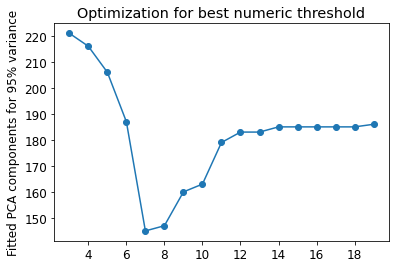

In [189]:

scalar_choice =  [MinMaxScaler(),StandardScaler()]
select_main_cluster = 1 #main 
mailout = 0 #NOT mailout
target_variance = 0.95
na_row_threshold = 0.6


na_col_threshold = 0.6
skewedness_threshold = 0.2
skew_select = 1
na_low_frac = 0.15
na_high_frac  = 0.95
n_numeric_threshold_range = range(3,20,1)

ch_score_gmm_range, db_score_gmm_range, sil_score_gmm_range, bic_info_gmm_range = [], [], [], []
ch_score_kmeans_range, db_score_kmeans_range, sil_score_kmeans_range, inertia_kmeans_range, diff_inertia_kmeans_range = [],[],[],[], []
fitted_n_components_range = []
for n_numeric_threshold in n_numeric_threshold_range:
    
    customers = pd.read_csv('data/customers.csv')
    del customers['Unnamed: 0']
    
    verbose_print_out = 1
    
    df_cleaned, df_scaled, df_pca, \
    d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
    column_encode, column_remain, column_binary, prefix_list_encode, df_column_names, \
    col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler,\
    pca_fitted, fitted_n_components = df_clean_scale_pca(customers,select_main_cluster,na_row_threshold, na_col_threshold,
       skewedness_threshold, skew_select, na_low_frac, na_high_frac, 4,
      n_numeric_threshold, scalar_choice, mailout, 0.95, verbose_print_out)
    
    fitted_n_components_range.append(fitted_n_components)
    
plt.plot(n_numeric_threshold_range, fitted_n_components_range, marker = 'o')
plt.title('Optimization for best numeric threshold')
plt.ylabel('Fitted PCA components for 95% variance')
plt.show()

Clearly, the number of reduced components that can explain 95% variance is smallest **when n_numeric_threshold is 7**. 

We go on to optimize the n_category_threshold_range. We record the 4 metrics described above. Each of the metric is cross-validated by sub-sampling 10% of the dataset 5 times, and calcualted for a range of cluster numbers from 2 to 10. The cross-validation is performed on a sub-set to increase optimization speed.

In [190]:

# use smallest n components found in above step to determine best n_numeric_threshold
ind_min = fitted_n_components_range.index(min(fitted_n_components_range)) 
n_numeric_threshold_optimal = n_numeric_threshold_range[ind_min]


# other parameters
scalar_choice =  [MinMaxScaler(),StandardScaler()]
select_main_cluster = 1 #main 
mailout = 0 #NOT mailout
target_variance = 0.95
na_row_threshold = 0.6
na_col_threshold = 0.6
skewedness_threshold = 0.2
skew_select = 1
na_low_frac = 0.15
na_high_frac  = 0.95

# the paraemter we vary
n_category_threshold_range = [1,2,3,4,5,6,7,8,10,12,14,16,40]


# record metrics for different n_category_threshold, for number of clusters from 2 to 10
ch_score_gmm_range, db_score_gmm_range, sil_score_gmm_range, bic_info_gmm_range = [], [], [], []
ch_score_kmeans_range, db_score_kmeans_range, sil_score_kmeans_range, inertia_kmeans_range, diff_inertia_kmeans_range = [],[],[],[], []
fitted_n_components_range = []
dimension_range = []
for n_category_threshold in n_category_threshold_range:
    
    customers = pd.read_csv('data/customers.csv')
    del customers['Unnamed: 0']

    verbose_print_out = 1
    
    # perform data cleaning, scaling and PCA
    df_cleaned, df_scaled, df_pca, \
    d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
    column_encode, column_remain, column_binary, prefix_list_encode, df_column_names, \
    col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler,\
    pca_fitted, fitted_n_components = df_clean_scale_pca(customers,select_main_cluster,na_row_threshold, na_col_threshold,
       skewedness_threshold, skew_select, na_low_frac, na_high_frac, n_category_threshold,
      n_numeric_threshold_optimal, scalar_choice, mailout, 0.95, verbose_print_out)
    
    # record dimension of cleaned dataset and number of PCA components 
    dimension_range.append(df_scaled.shape[1])
    fitted_n_components_range.append(fitted_n_components)
    
    ch_score_gmm_cv, db_score_gmm_cv, sil_score_gmm_cv, bic_info_gmm_cv = [], [],[],[]
    print('Running cluster analysis CV for {} category threshold'.format(n_category_threshold))
    
    start_time = time.time() 
    # sub-sample dataset 5-times randomly to calculate segmentation metrics
    for cv in range(5):
        rows_id = random.sample(range(0,df_pca.shape[0]-1), math.ceil(0.1 * df_pca.shape[0]))
        df_pca_sample = df_pca[rows_id,:]

        sum_of_squared_distances = []
        ch_score_gmm, db_score_gmm, sil_score_gmm, bic_info_gmm = [], [],[],[]


        
        K_gmm = range(2,10,1)
        for k in K_gmm:

            # fit a Gaussian Mixture Model with k components
            clf = mixture.GaussianMixture(n_components=k, covariance_type='full', max_iter = 1000)
            clf.fit(df_pca_sample)
            
            # calculate and record scores
            bic_info_gmm.append(clf.bic(df_pca_sample))
            labels = clf.predict(df_pca_sample)
            ch_score_gmm.append(calinski_harabasz_score(df_pca_sample, labels))
            db_score_gmm.append(davies_bouldin_score(df_pca_sample, labels))
            sil_score_gmm.append(silhouette_score(df_pca_sample, labels))
        
        ch_score_gmm_cv.append(ch_score_gmm)
        db_score_gmm_cv.append(db_score_gmm)
        sil_score_gmm_cv.append(sil_score_gmm)
        bic_info_gmm_cv.append(bic_info_gmm)
        
    # print-out time to calcualte 1 category threshold
    current_time = time.time()
    elapsed_time = current_time - start_time
    print('Finish cluster analysis CV for {} category threshold in {} minutes'.format(n_category_threshold, int(elapsed_time)/60))
        
    ch_score_gmm_range.append(ch_score_gmm_cv)
    db_score_gmm_range.append(db_score_gmm_cv)
    sil_score_gmm_range.append(sil_score_gmm_cv)
    bic_info_gmm_range.append(bic_info_gmm_cv)
    

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 57.76341414451599 seconds
Running cluster analysis CV for 1 category threshold
Finish cluster analysis CV for 1 category threshold in 8.6 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 58.690303325653076 seconds
Running cluster analysis CV for 2 category threshold
Finish cluster analysis CV for 2 category threshold in 8.816666666666666 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 58.293861389160156 seconds
Running cluster analysis CV for 3 category threshold
Finish cluster analysis CV for 3 category threshold in 8.983333333333333 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 61.11965298652649 seconds
Running cluster analysis CV for 4 category threshold
Finish cluster analysis CV for 4 category threshold in 10.25 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 66.32664275169373 seconds
Running cluster analysis CV for 5 category threshold
Finish cluster analysis CV for 5 category threshold in 13.283333333333333 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 68.39461207389832 seconds
Running cluster analysis CV for 6 category threshold
Finish cluster analysis CV for 6 category threshold in 15.25 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 70.321462392807 seconds
Running cluster analysis CV for 7 category threshold
Finish cluster analysis CV for 7 category threshold in 16.316666666666666 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 69.74192571640015 seconds
Running cluster analysis CV for 8 category threshold
Finish cluster analysis CV for 8 category threshold in 15.616666666666667 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 69.91206812858582 seconds
Running cluster analysis CV for 10 category threshold
Finish cluster analysis CV for 10 category threshold in 14.933333333333334 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 70.3114709854126 seconds
Running cluster analysis CV for 12 category threshold
Finish cluster analysis CV for 12 category threshold in 16.016666666666666 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 70.29745149612427 seconds
Running cluster analysis CV for 14 category threshold
Finish cluster analysis CV for 14 category threshold in 18.766666666666666 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 70.56871461868286 seconds
Running cluster analysis CV for 16 category threshold
Finish cluster analysis CV for 16 category threshold in 16.566666666666666 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 71.17127680778503 seconds
Running cluster analysis CV for 40 category threshold
Finish cluster analysis CV for 40 category threshold in 17.716666666666665 minutes


Clearly, as we increase the thresold, more cateogrical attributes are encoded and we have increased dataset dimension and increased number of PCA components. 

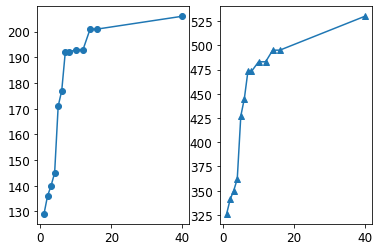

In [191]:
plt.subplot(1,2,1)
plt.plot(n_category_threshold_range, fitted_n_components_range, marker = 'o')
plt.subplot(1,2,2)
plt.plot(n_category_threshold_range, dimension_range, marker = '^')

In [201]:
# output these components
for ind in range(len(n_category_threshold_range)):
    print('For category threshodl {} we have fitted {} PCA components for {} attributes'.format(
        n_category_threshold_range[ind], fitted_n_components_range[ind],
    dimension_range[ind]))

For category threshodl 1 we have fitted 129 PCA components for 326 attributes
For category threshodl 2 we have fitted 136 PCA components for 341 attributes
For category threshodl 3 we have fitted 140 PCA components for 350 attributes
For category threshodl 4 we have fitted 145 PCA components for 362 attributes
For category threshodl 5 we have fitted 171 PCA components for 427 attributes
For category threshodl 6 we have fitted 177 PCA components for 445 attributes
For category threshodl 7 we have fitted 192 PCA components for 473 attributes
For category threshodl 8 we have fitted 192 PCA components for 473 attributes
For category threshodl 10 we have fitted 193 PCA components for 483 attributes
For category threshodl 12 we have fitted 193 PCA components for 483 attributes
For category threshodl 14 we have fitted 201 PCA components for 495 attributes
For category threshodl 16 we have fitted 201 PCA components for 495 attributes
For category threshodl 40 we have fitted 206 PCA components 

We go on to calculate the mean and standard deviation of the evaluated metrics above. 

In [192]:

mean_ch_range, std_ch_range = [],[]
mean_db_range, std_db_range = [],[]
mean_sil_range, std_sil_range = [],[]
mean_bic_range, std_bic_range = [],[]

# for each value of n_category_threshold
for ind in range(len(n_category_threshold_range)):
    mean_ch_k,std_ch_k = [],[]
    mean_db_k,std_db_k = [],[]
    mean_sil_k,std_sil_k = [],[]
    mean_bic_k,std_bic_k = [],[]
    
    # for each cluster number k 
    for k_ind in range(8):
        mean_ch, mean_db, mean_sil, mean_bic = 0,0,0,0
        std_ch, std_db, std_sil, std_bic = [],[],[],[]
        
        # extract all CV-results for this cluster number k and category_threshold
        for cv_ind in range(5):
            mean_ch += ch_score_gmm_range[ind][cv_ind][k_ind] 
            mean_db += db_score_gmm_range[ind][cv_ind][k_ind]
            mean_sil += sil_score_gmm_range[ind][cv_ind][k_ind]
            mean_bic += bic_info_gmm_range[ind][cv_ind][k_ind]
            
            std_ch.append(ch_score_gmm_range[ind][cv_ind][k_ind])
            std_db.append(db_score_gmm_range[ind][cv_ind][k_ind])
            std_sil.append(sil_score_gmm_range[ind][cv_ind][k_ind])
            std_bic.append(bic_info_gmm_range[ind][cv_ind][k_ind])
            
        # calculate mean and std of these metrics
        mean_ch_k.append(mean_ch/5)
        mean_db_k.append(mean_db/5)
        mean_sil_k.append(mean_sil/5)
        mean_bic_k.append(mean_bic/5)
        
        std_ch_k.append(statistics.stdev(std_ch))
        std_db_k.append(statistics.stdev(std_db))
        std_sil_k.append(statistics.stdev(std_sil))
        std_bic_k.append(statistics.stdev(std_bic))
        
    mean_ch_range.append(mean_ch_k)
    mean_db_range.append(mean_db_k)
    mean_sil_range.append(mean_sil_k)
    mean_bic_range.append(mean_bic_k)
    
    std_ch_range.append(std_ch_k)
    std_db_range.append(std_db_k)
    std_sil_range.append(std_sil_k)
    std_bic_range.append(std_bic_k)
    


The following few plots show the 4 metrics/scores evalauted as a function of cluster number k (**on the x-axis**) and for different category thresholds (**legend and labeled with different colors**). 

For better visualization, the scores are moved up/down with respect to the first score for cluster k = 2. The absolute value is not as important for us than the relative variation of scores with number of clusters k, since we'd like to maintain a robust selection of k (number of clusters). 

The scores are better if CH and silouette score is higher, the DB and BIC scores are lower. As observed from below plots, the shape of all 4 metrics remain relatively robust. For best BIC score, the optimal number of clusters is usually 3-5; since other scores are better for smaller number of clusters (aka smaller DB, larger CH and Silouette scores), **we choose the number of clusters k = 3**. 

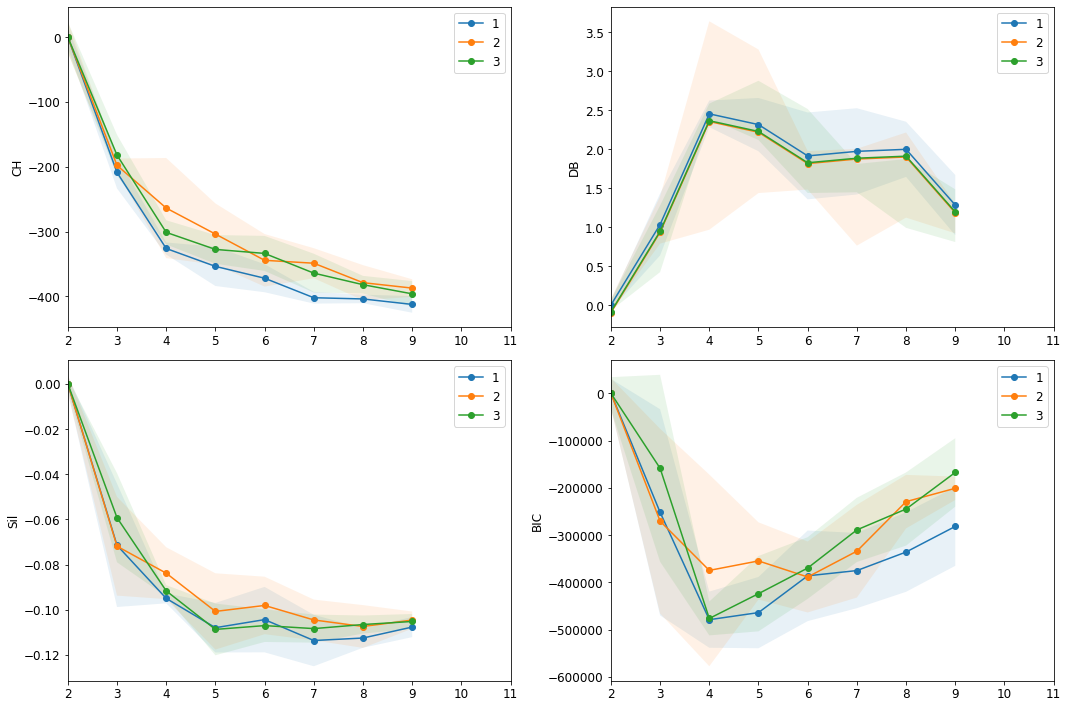

In [193]:

fig, axs = plt.subplots(2, 2, figsize=(15,10)) 
color_cat = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']

for ind, color_ind in zip(range(0,3), color_cat):    
    std_ch_abs = [abs(x) for x in std_ch_range[ind]]
    y1 = [x + y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    y2 = [x - y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    axs[0][0].plot(K_gmm, mean_ch_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][0].set_ylabel('CH')
    axs[0][0].set_xlim(2,11)
    axs[0][0].legend()
    

    std_db_abs = [abs(x) for x in std_db_range[ind]]
    y1 = [x + y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    y2 = [x - y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    axs[0][1].plot(K_gmm, mean_db_range[0] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][1].set_ylabel('DB')
    axs[0][1].set_xlim(2,11)
    axs[0][1].legend()
    

    std_sil_abs = [abs(x) for x in std_sil_range[ind]]
    y1 = [x + y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    y2 = [x - y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    axs[1][0].plot(K_gmm, mean_sil_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][0].set_ylabel('Sil')
    axs[1][0].set_xlim(2,11)
    axs[1][0].legend()
    

    std_bic_abs = [abs(x) for x in std_bic_range[ind]]
    y1 = [x + y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    y2 = [x - y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    axs[1][1].plot(K_gmm, mean_bic_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][1].set_ylabel('BIC')
    axs[1][1].set_xlim(2,11)
    axs[1][1].legend()
    
    
plt.tight_layout()
plt.show()


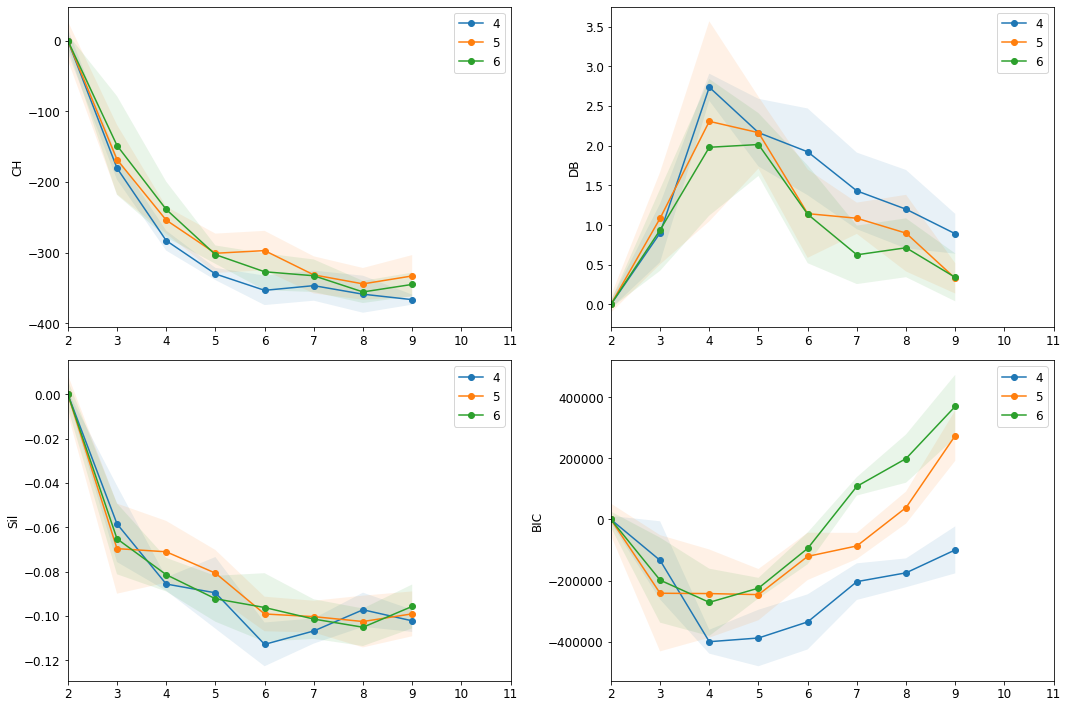

In [194]:

fig, axs = plt.subplots(2, 2, figsize=(15,10)) 
color_cat = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']

for ind, color_ind in zip(range(3,6), color_cat):    
    std_ch_abs = [abs(x) for x in std_ch_range[ind]]
    y1 = [x + y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    y2 = [x - y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    axs[0][0].plot(K_gmm, mean_ch_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][0].set_ylabel('CH')
    axs[0][0].set_xlim(2,11)
    axs[0][0].legend()
    

    std_db_abs = [abs(x) for x in std_db_range[ind]]
    y1 = [x + y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    y2 = [x - y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    axs[0][1].plot(K_gmm, mean_db_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][1].set_ylabel('DB')
    axs[0][1].set_xlim(2,11)
    axs[0][1].legend()
    

    std_sil_abs = [abs(x) for x in std_sil_range[ind]]
    y1 = [x + y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    y2 = [x - y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    axs[1][0].plot(K_gmm, mean_sil_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][0].set_ylabel('Sil')
    axs[1][0].set_xlim(2,11)
    axs[1][0].legend()
    

    std_bic_abs = [abs(x) for x in std_bic_range[ind]]
    y1 = [x + y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    y2 = [x - y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    axs[1][1].plot(K_gmm, mean_bic_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][1].set_ylabel('BIC')
    axs[1][1].set_xlim(2,11)
    axs[1][1].legend()
    
    
plt.tight_layout()
plt.show()


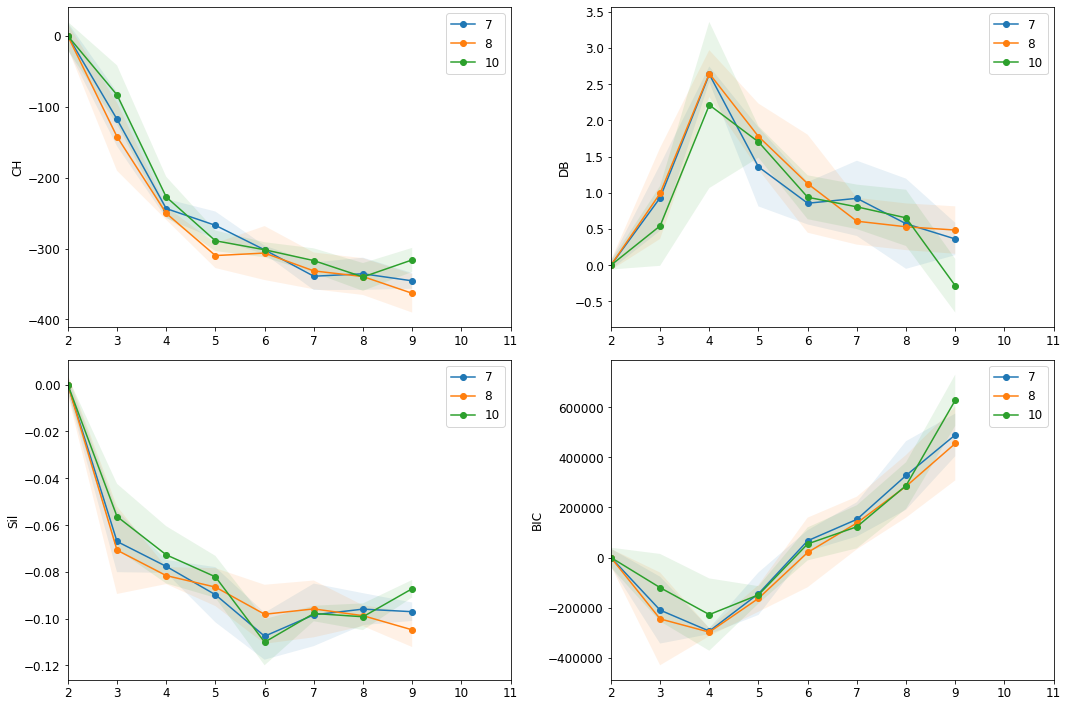

In [195]:

fig, axs = plt.subplots(2, 2, figsize=(15,10)) 
color_cat = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']

for ind, color_ind in zip(range(6,9), color_cat):    
    std_ch_abs = [abs(x) for x in std_ch_range[ind]]
    y1 = [x + y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    y2 = [x - y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    axs[0][0].plot(K_gmm, mean_ch_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][0].set_ylabel('CH')
    axs[0][0].set_xlim(2,11)
    axs[0][0].legend()
    

    std_db_abs = [abs(x) for x in std_db_range[ind]]
    y1 = [x + y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    y2 = [x - y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    axs[0][1].plot(K_gmm, mean_db_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][1].set_ylabel('DB')
    axs[0][1].set_xlim(2,11)
    axs[0][1].legend()
    

    std_sil_abs = [abs(x) for x in std_sil_range[ind]]
    y1 = [x + y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    y2 = [x - y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    axs[1][0].plot(K_gmm, mean_sil_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][0].set_ylabel('Sil')
    axs[1][0].set_xlim(2,11)
    axs[1][0].legend()
    

    std_bic_abs = [abs(x) for x in std_bic_range[ind]]
    y1 = [x + y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    y2 = [x - y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    axs[1][1].plot(K_gmm, mean_bic_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][1].set_ylabel('BIC')
    axs[1][1].set_xlim(2,11)
    axs[1][1].legend()
    
    
plt.tight_layout()
plt.show()


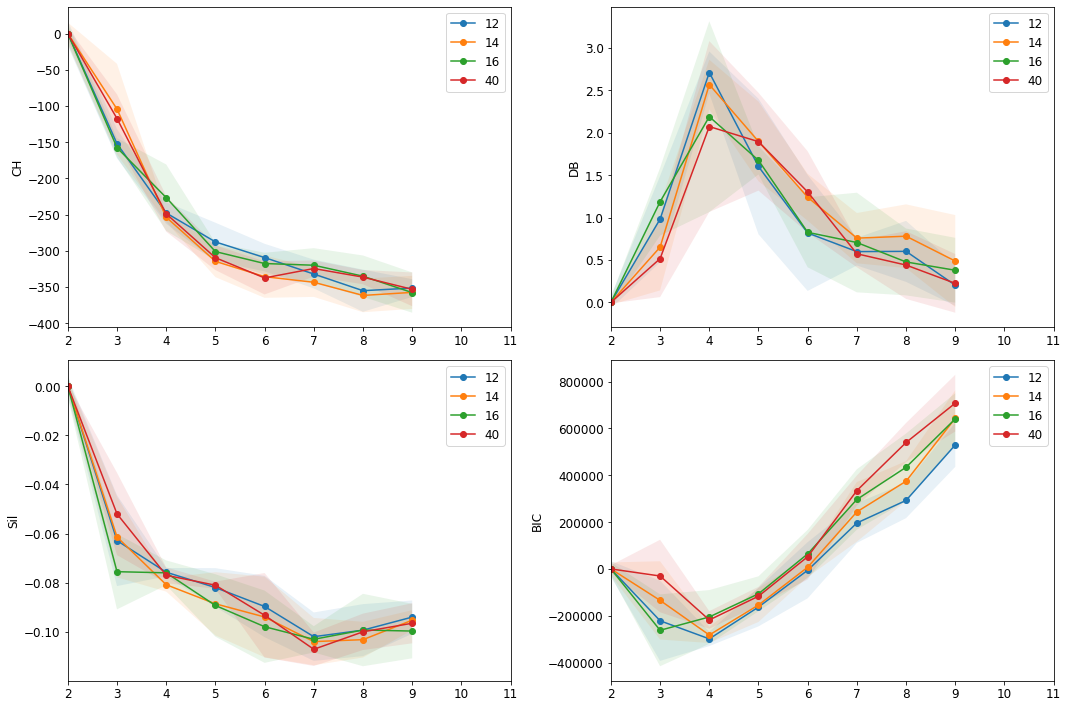

In [196]:

fig, axs = plt.subplots(2, 2, figsize=(15,10)) 
color_cat = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']

for ind, color_ind in zip(range(9,13), color_cat):    
    std_ch_abs = [abs(x) for x in std_ch_range[ind]]
    y1 = [x + y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    y2 = [x - y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    axs[0][0].plot(K_gmm, mean_ch_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][0].set_ylabel('CH')
    axs[0][0].set_xlim(2,11)
    axs[0][0].legend()
    

    std_db_abs = [abs(x) for x in std_db_range[ind]]
    y1 = [x + y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    y2 = [x - y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    axs[0][1].plot(K_gmm, mean_db_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][1].set_ylabel('DB')
    axs[0][1].set_xlim(2,11)
    axs[0][1].legend()
    

    std_sil_abs = [abs(x) for x in std_sil_range[ind]]
    y1 = [x + y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    y2 = [x - y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    axs[1][0].plot(K_gmm, mean_sil_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][0].set_ylabel('Sil')
    axs[1][0].set_xlim(2,11)
    axs[1][0].legend()
    

    std_bic_abs = [abs(x) for x in std_bic_range[ind]]
    y1 = [x + y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    y2 = [x - y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    axs[1][1].plot(K_gmm, mean_bic_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][1].set_ylabel('BIC')
    axs[1][1].set_xlim(2,11)
    axs[1][1].legend()
    
    
plt.tight_layout()
plt.show()


We look at standard deviation of all scores when we choose k = 3 and **as we vary n_category_threshold on the x-axis**. As observed in below plots, we could observe several trends:

1. for CH and DB scores (aka 2 figures on top), the standard deviation fluctuates with an upward trend as n_category_threshold increases, and seems to have downward trend for n_Category_threshold > 16
2. for Silouette score and BIC information, the standard deviation of scores fluctuates with a downward trend as n_category_threshold increases;
3. the smallest standard deviations do not happen at the same choice of n_category_threshold across the 4 metrics

So to achieve relatively small standard deviations, it's better to choose **n_category_thrsehold of 16 or 40**. To include as many attributes as possible, we thus choose a threshold of 40.

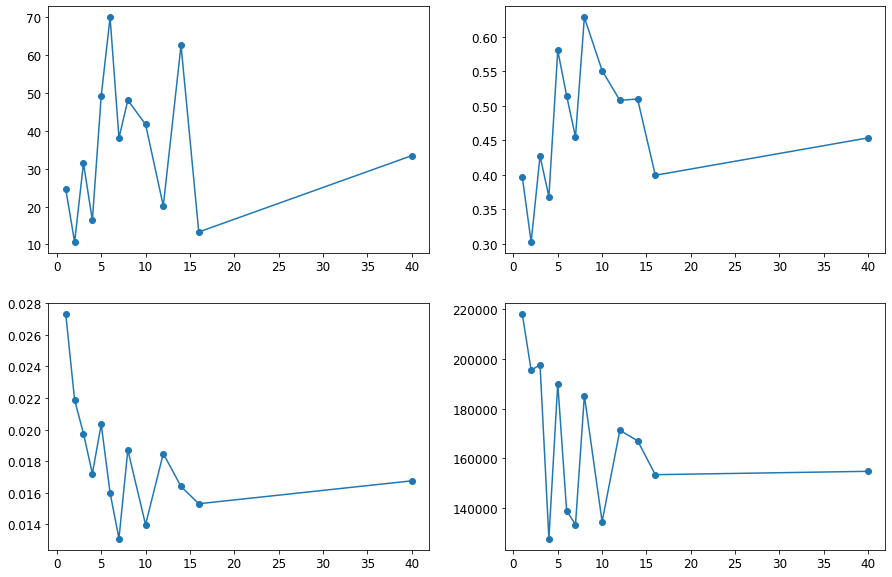

In [197]:
# scan for k = 3
fig, axs = plt.subplots(2, 2, figsize=(15,10)) 

std_kfix_ch, std_kfix_db,std_kfix_sil,std_kfix_bic = [],[],[],[]
for ind in range(13):
    std_kfix_ch.append(std_ch_range[ind][1])
    std_kfix_db.append(std_db_range[ind][1])
    std_kfix_sil.append(std_sil_range[ind][1])
    std_kfix_bic.append(std_bic_range[ind][1])

axs[0][0].plot(n_category_threshold_range, std_kfix_ch, marker = 'o')
axs[0][1].plot(n_category_threshold_range, std_kfix_db, marker = 'o')
axs[1][0].plot(n_category_threshold_range, std_kfix_sil, marker = 'o')
axs[1][1].plot(n_category_threshold_range, std_kfix_bic, marker = 'o')



plt.show()

In [198]:
version = 3
# save optimization stats in csv file
for cat_ind in range(13):
    ch_temp = pd.DataFrame(data = ch_score_gmm_range[cat_ind], columns = K_gmm)
    file_name_ch = 'cv/ch_score_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    ch_temp.to_csv(file_name_ch)
    
    db_temp = pd.DataFrame(data = db_score_gmm_range[cat_ind], columns = K_gmm)
    file_name_db = 'cv/db_score_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    db_temp.to_csv(file_name_db)
    
    sil_temp = pd.DataFrame(data = sil_score_gmm_range[cat_ind], columns = K_gmm)
    file_name_sil = 'cv/sil_score_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    sil_temp.to_csv(file_name_sil)
    
    bic_temp = pd.DataFrame(data = bic_info_gmm_range[cat_ind], columns = K_gmm)
    file_name_bic = 'cv/bic_score_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    bic_temp.to_csv(file_name_bic)
    
    

### 2.2.b. Interpret Reduced Features and Customer Segments


We go on to interpret the reduced features using our optimized pipeline. 

To interpret PCA components, we perform following visualizations and interpretations:
1. The cumulative explained variance ratio as we include more reduced features
2. Visualize the scatter-plot of 3 PCA features with largest distance between cluster distances 
3. Visualize weights of the top 20 PCA features with respect to attributes & interpret a few features in detail

In [109]:

scalar_choice =  [MinMaxScaler(),StandardScaler() ]
select_main_cluster = 1 #main 
mailout = 0 #NOT mailout
target_variance = 0.95
na_row_threshold = 0.6


na_col_threshold = 0.6
skewedness_threshold = 0.2
skew_select = 1
na_low_frac = 0.15
na_high_frac  = 0.95

verbose_print_out = 2
df_cleaned, df_scaled, df_pca, \
d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
column_encode, column_remain, column_binary, prefix_list_encode, df_column_names, \
col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler,\
pca_fitted, fitted_n_components = df_clean_scale_pca(customers,select_main_cluster,na_row_threshold, na_col_threshold,
   skewedness_threshold, skew_select, na_low_frac, na_high_frac, 40,
  7, scalar_choice, mailout, 0.95, verbose_print_out)

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=3, covariance_type='full', max_iter = 1000)
clf.fit(df_pca)

Finished step 1 of cleaning
Processed 0.26046167011040844 rows with higher than 0.6 NA fraction
Dropped 6 columns with higher than 0.6 NA fraction
Finished step 3a of cleaning - filling NA for 339 numerical columns
Finished step 3b of cleaning - Encoded 29 columns, dropped 1 columns and found 15 binary columns
Columns we have not processed: 
['PRODUCT_GROUP', 'ONLINE_PURCHASE', 'CUSTOMER_GROUP', 'LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Processed dataset in 47.2581090927124 seconds


GaussianMixture(max_iter=1000, n_components=3)

We can see from cumulative explained variance below that first 100 components can clearly explain more than 80% of the variance. The first component can explain 11.4% of total variance, the top 5 component can each explain 3-4% of variance, while the 6th-15th components can each explain about 1-2% of variance.

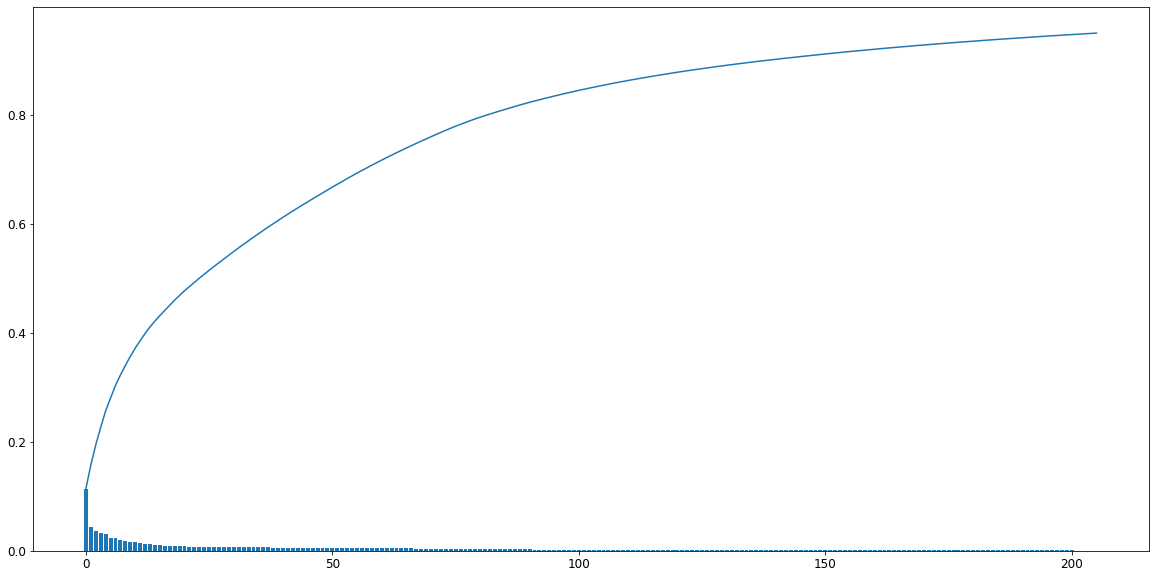

In [205]:
plt.figure(figsize=[20,10])

plt.plot(range(df_pca.shape[1]), np.cumsum(pca_fitted.explained_variance_ratio_))
plt.bar(range(df_pca.shape[1]), pca_fitted.explained_variance_ratio_)
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [114]:
pca_fitted.explained_variance_ratio_[:20]

array([0.11413167, 0.04309592, 0.03709877, 0.03211825, 0.030153  ,
       0.02374401, 0.02310652, 0.01908757, 0.01751497, 0.01651115,
       0.01537193, 0.01360053, 0.01306665, 0.0122949 , 0.01059442,
       0.01005834, 0.00961202, 0.00945409, 0.00937553, 0.00862212])

We also want to develop an understanding of the distribution of PCA components for our dataset. We select 3 PCA components for which we have the largest difference between cluster means, and plot below a scatter plot of the values of these 3 PCA components for the customers dataset, labeled with 3 clusters. 

It seems that those features with higher explained variances also have larger difference in cluster means. The top 5 PCA componensts with largest distance between clustesr all belong in the top 10. 

In [206]:
diff_n = np.zeros(df_pca.shape[1])
for n in range(df_pca.shape[1]):
    
    diff = max(abs(clf.means_[0][n] - clf.means_[1][n]), abs(clf.means_[0][n] - clf.means_[2][n]), 
               abs(clf.means_[2][n] - clf.means_[1][n]))  
    
    diff_n[n] = diff

n_top = 5
diff_top = diff_n[np.argsort(-abs(diff_n))[0:n_top]]
pca_n = np.array(range(df_pca.shape[1]))
diff_top_PCA = pca_n[np.argsort(-abs(diff_n))[0:n_top]]

print('The top {} PCA components with max difference between clusters are:'.format(n_top))
print(diff_top_PCA)

The top 5 PCA components with max difference between clusters are:
[0 3 7 4 2]


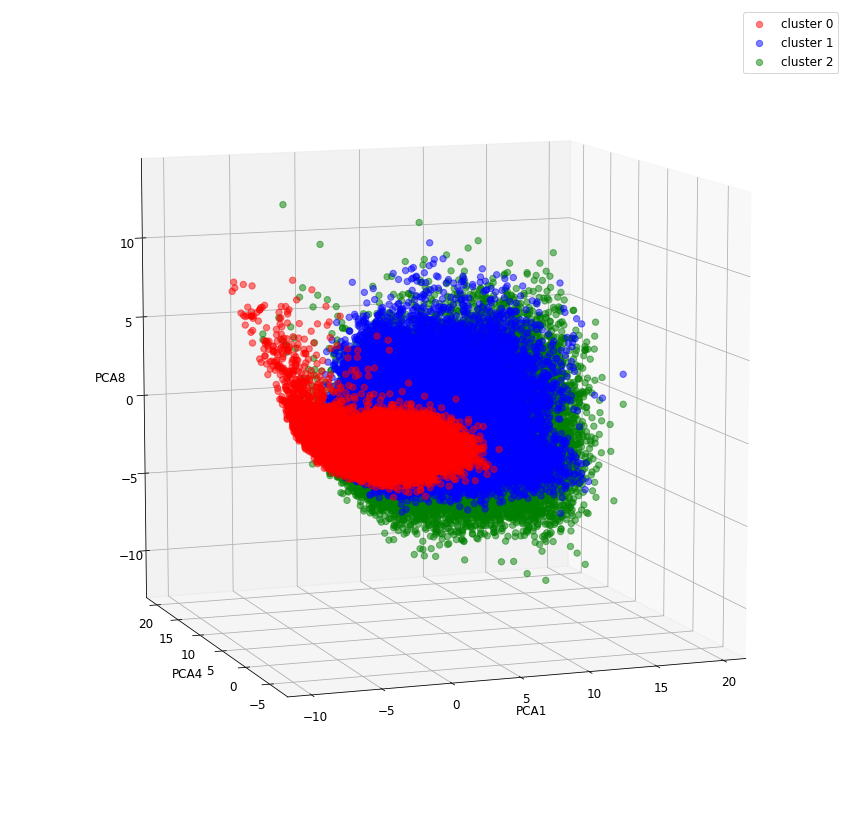

In [207]:
ind_1 = diff_top_PCA[0]
ind_2 = diff_top_PCA[1]
ind_3 = diff_top_PCA[2]

PCA1 = df_pca[:,ind_1]
PCA2 = df_pca[:,ind_2]
PCA3 = df_pca[:,ind_3]
labels = clf.predict(df_pca)

fig = plt.figure(figsize = [15,15])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA1[labels==0], PCA2[labels==0],PCA3[labels == 0], c='red',s=40, alpha = 0.5, label = 'cluster 0')
ax.scatter(PCA1[labels==1], PCA2[labels==1],PCA3[labels == 1],c='blue',s=40, alpha = 0.5, label = 'cluster 1')
ax.scatter(PCA1[labels==2], PCA2[labels==2],PCA3[labels == 2],c='green',s=40, alpha = 0.5, label = 'cluster 2')

ax.set_xlabel('PCA'+str(ind_1+1))
ax.set_ylabel('PCA'+str(ind_2+1))
ax.set_zlabel('PCA'+str(ind_3+1))
ax.legend()
ax.view_init(elev=10., azim=250)

plt.show()

We further look at the different weights of the parameters in each of the PCA components.The y-axis shows the columns in the dataframe, while the x-axis shows the top 20 PCA components. The color shows the weight of each column (aka data attribute) in each PCA component. The brightest areas on the plot are more towards top of the heatmap, suggesting that attributes from 200 to about 330 contribute the most. These include columns that start with D19 (indicates transaction behavior), KBA (ownership of cars), LP (family or life status) and so on.

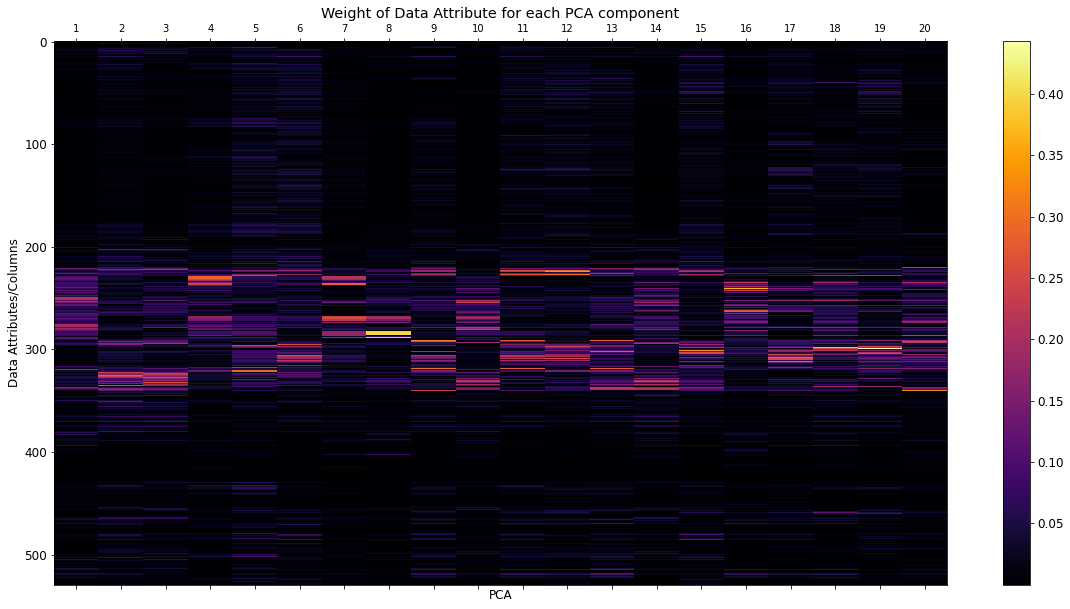

In [110]:
pca_components = pca_fitted.components_
n = 20
x_ticks = [str(i) for i in range(1,n+1)]
fig2,ax2=plt.subplots(figsize=(n,10))
cax = ax2.matshow(abs(pca_components[0:n,:].transpose()),cmap = 'inferno', aspect="auto")
plt.xticks(range(0,n),x_ticks,fontsize=10)
plt.colorbar(cax)
plt.xlabel('PCA')
plt.ylabel('Data Attributes/Columns')
plt.title('Weight of Data Attribute for each PCA component')
plt.show()# 

In [209]:
df_scaled.columns[200:260]

Index(['VHN', 'W_KEIT_KIND_HH', 'WOHNLAGE', 'ANREDE_KZ',
       'ALTERSKATEGORIE_GROB', 'CJT_GESAMTTYP_Advertising', 'GEBAEUDETYP_Type',
       'GEBAEUDETYP_KnownHousehold', 'GEBAEUDETYP_KnownCompany',
       'LP_LEBENSPHASE_GROB_income', 'LP_LEBENSPHASE_GROB_age',
       'LP_LEBENSPHASE_FEIN_income', 'LP_LEBENSPHASE_FEIN_age',
       'PRAEGENDE_JUGENDJAHRE_year', 'PRAEGENDE_JUGENDJAHRE_movement',
       'PRAEGENDE_JUGENDJAHRE_ow', 'WOHNLAGE_Rural', 'CAMEO_DEUG_Class',
       'CAMEO_INTL_2015_wealth', 'CAMEO_INTL_2015_family', 'AKT_DAT_KL',
       'ALTER_HH', 'ALTERSKATEGORIE_FEIN', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'ANZ_KINDER', 'ANZ_PERSONEN',
       'ANZ_STATISTISCHE_HAUSHALTE', 'BALLRAUM', 'D19_BANKEN_ANZ_12',
       'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM', 'D19_BANKEN_DIREKT',
       'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL', 'D19_BANKEN_OFFLINE_DATUM',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12',
       'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEK

In [210]:
df_scaled.columns[260:330]

Index(['D19_LOTTO', 'D19_NAHRUNGSERGAENZUNG', 'D19_RATGEBER', 'D19_REISEN',
       'D19_SAMMELARTIKEL', 'D19_SCHUHE', 'D19_SONSTIGE', 'D19_TECHNIK',
       'D19_TELKO_ANZ_12', 'D19_TELKO_ANZ_24', 'D19_TELKO_DATUM',
       'D19_TELKO_MOBILE', 'D19_TELKO_OFFLINE_DATUM', 'D19_TELKO_ONLINE_DATUM',
       'D19_TELKO_REST', 'D19_TIERARTIKEL', 'D19_VERSAND_ANZ_12',
       'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM', 'D19_VERSAND_OFFLINE_DATUM',
       'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12',
       'D19_VERSAND_REST', 'D19_VERSI_ANZ_12', 'D19_VERSI_ANZ_24',
       'D19_VERSI_DATUM', 'D19_VERSI_OFFLINE_DATUM', 'D19_VERSI_ONLINE_DATUM',
       'D19_VERSICHERUNGEN', 'D19_VOLLSORTIMENT', 'D19_WEIN_FEINKOST',
       'EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR', 'EXTSEL992', 'GEBURTSJAHR',
       'HH_EINKOMMEN_SCORE', 'INNENSTADT', 'KBA05_HERST1', 'KBA05_HERST3',
       'KBA05_HERST4', 'KBA05_HERST5', 'KBA05_MOD4', 'KBA05_MODTEMP',
       'KBA05_VORB2', 'KBA05_ZUL4', 'KBA13_ANZAHL_PKW', 

We can dig deeper into what each PCA component constitutes of. We select the top 30 data attributes by weight, for PCA component 1. Positive contribution to PCA1 can come from:

- Higher transaction activity in segments including TOTAL POOL, MAIL-ORDER, BOOKS and CD, SHOES, etc.
- Recent, actual transaction activity in segments including TOTAL POOL, MAIL ORDER, TOTAL POOL ONLINE, MAIL-ORDER ONLINE, BANKING, TOTAL POOL OFFINE, etc.
- Higher affinity to online purchase
- Higher percentage of transaction in TOTAL POOL ONLINE, MAIL-ORDER ONLINE
- Older household, more adults in the household
 
In general, larger PCA component 1 indicates recent and higher transaction activity in total pools and many segments, higher affinity to online purchases, higher percentage of online purchase, older households and generally more adults in the household.


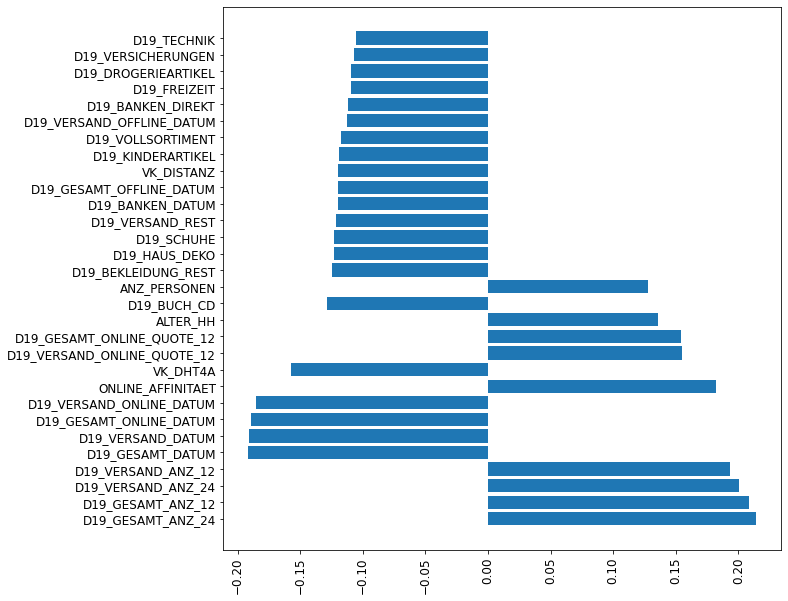

In [211]:
weights_pca1 = pca_components[0,:].transpose()
n_top = 30
weights_pca1_top = weights_pca1[np.argsort(-abs(weights_pca1))[0:n_top]]
weights_pca1_features = df_scaled.columns[np.argsort(-abs(weights_pca1))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pca1_features,weights_pca1_top)
plt.xticks(rotation = 'vertical')
plt.show()

The 2nd PCA component explains mostly about SEMIO-related attributes, indicating affinity to a type of personality. 
Higher PCA2 values indicate: 

- Lower affinity to attributes with positive weights, and these include SEMIO_KAEM (fightful attitude), SEMIO_KRIT (critical minded), SEMIO_DOM (dominant minded)

- Higher affinity to attributes with negative weights, and these include SEMIO_VERT (dreamily), SEMIO_KULT (cultural minded)

- Older age through pre-name analaysis (ALTERSKATEGORIE_FEIN), but smaller actual age (GEBURTSJARH which indicates age, not birth year due to our data pre-processing)

Many of the attributes such as CJT_TYP and WOHNDAUER_2008 are not described in the provided excel sheet, so we could not provide more detailed interpretations regarding these attributes.

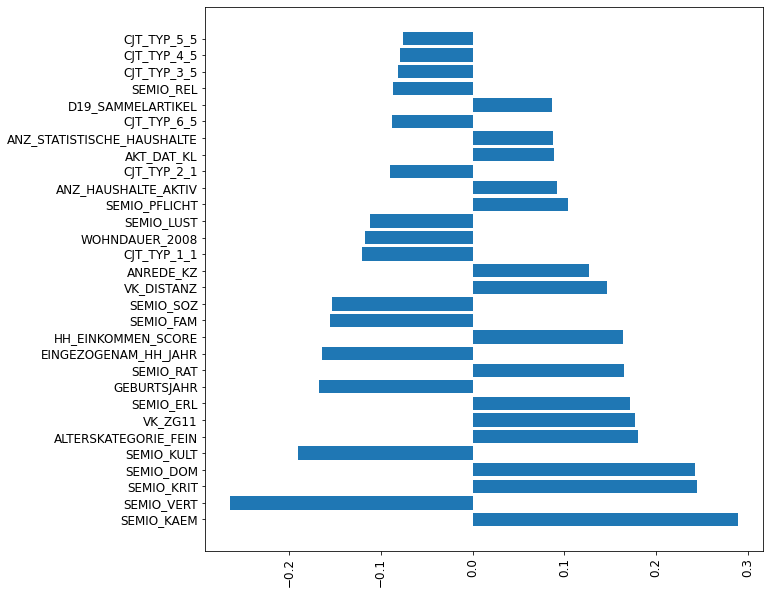

In [112]:
weights_pca2 = pca_components[1,:].transpose()
n_top = 30
weights_pca2_top = weights_pca2[np.argsort(-abs(weights_pca2))[0:n_top]]
weights_pca2_features = df_scaled.columns[np.argsort(-abs(weights_pca2))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pca2_features,weights_pca2_top)
plt.xticks(rotation = 'vertical')
plt.show()

The 8th PCA component (PCA8) is dominantly contributed from a few attributes. As evident from the plot, the weights from different attributes are much more disportionate, compared with PCA0 and PCA1. This is also one of the components that have largest difference between cluster means. 

Higher PCA8 value means:

- recent actual transaction or higher activity in INSURANCE segment
- lower activity or less recent  transaction in TELECOMMUNICATIONS segment, but higher activity in MOBILE TELECOMMUNICATIONS and FRUTHER MOBILE telecommunications segments
- other attributes relate to recent purchases in other sectors such as BANKING
- high affinity to SEMIO_PFLIGHT (dutyful), SEMIO_RAT (rational minded), SEMIO_TRADV (traditional minded) and lower affinity to SEMIO_LUST (sensual minded)
- other attributes indicate e.g. there are more households in the building 


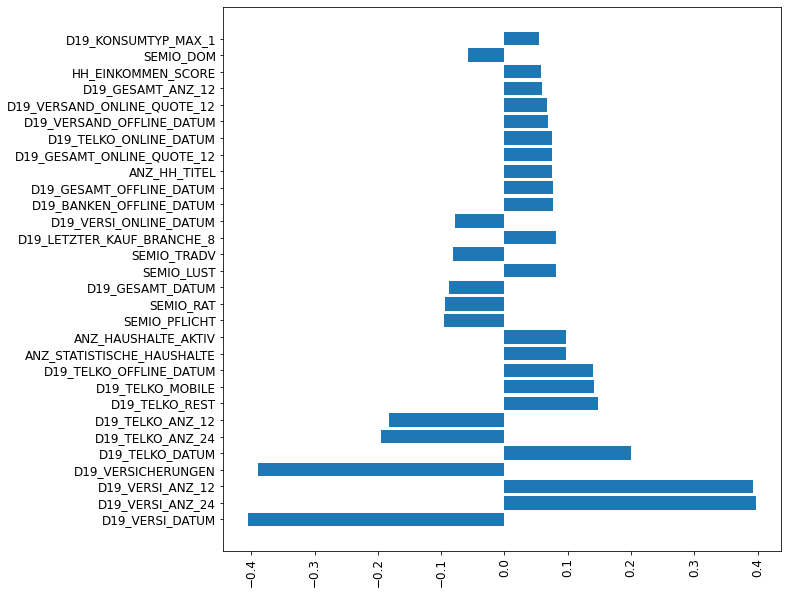

In [115]:
weights_pca8 = pca_components[7,:].transpose()
n_top = 30
weights_pca8_top = weights_pca8[np.argsort(-abs(weights_pca8))[0:n_top]]
weights_pca8_features = df_scaled.columns[np.argsort(-abs(weights_pca8))[0:n_top]]

fig4,ax4=plt.subplots(figsize=(10,10))
ax4.barh(weights_pca8_features,weights_pca8_top)
plt.xticks(rotation = 'vertical')
plt.show()

The other PCA component we'd like to look at is the 4th component, PCA4. Higher value primarily indicates higher activity and more recent transactions in primariliy banking and telecomm segments across multiple channels.

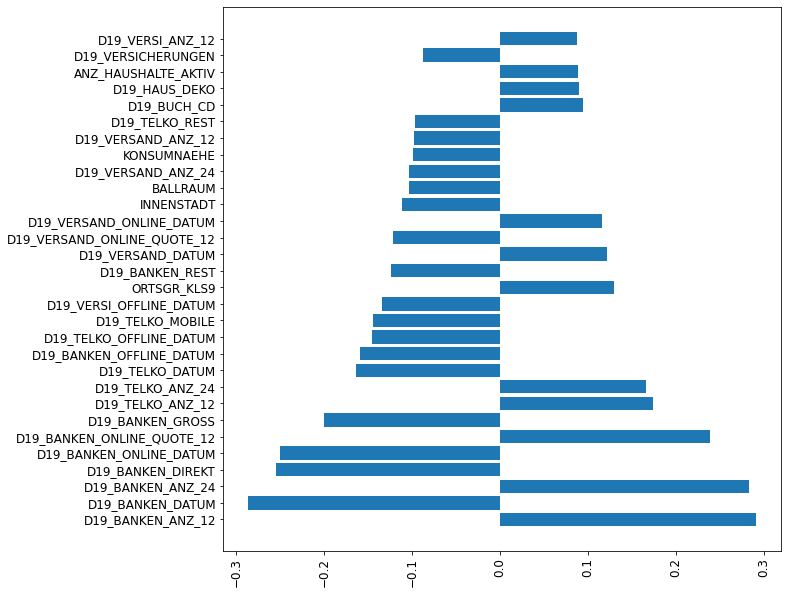

In [214]:
weights_pca4 = pca_components[diff_top_PCA[1],:].transpose()
n_top = 30
weights_pca4_top = weights_pca4[np.argsort(-abs(weights_pca4))[0:n_top]]
weights_pca4_features = df_scaled.columns[np.argsort(-abs(weights_pca4))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pca4_features,weights_pca4_top)
plt.xticks(rotation = 'vertical')
plt.show()

We can then predict lables for each of the customers and output the fraction of customers. Note that this pipeline is built for the main cluster. 

As seen below, the customer segments are fairly evenly distributed, with about 40% in cluster 0, slightly more than 3% in cluster 1 and slightly less than 30% in cluster 2.

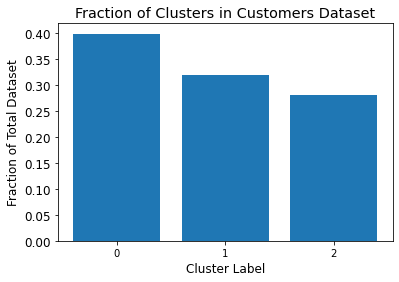

In [120]:
labels = clf.predict(df_pca)

unique_labels, counts_labels = np.unique(labels, return_counts=True)

plt.bar(unique_labels, counts_labels/sum(counts_labels))
plt.xlabel('Cluster Label')
plt.ylabel('Fraction of Total Dataset')
plt.title('Fraction of Clusters in Customers Dataset')
plt.xticks(range(0,len(unique_labels)),unique_labels,fontsize=10)
plt.show()

### 2.2.c-1 Inverse Transform Pipeline

In this section, we define functions for re-scaling and PCA-inverse-transform the reduced features back to demographic info. This step is essentially the **'INVERSE-transform'** step for a conventional data pipeline. This is in order to map the reduced features and clusters back to demographic information for interpretation.

In [116]:
def find_col_ind(df, col_name):
    '''
    Find list of column indices for the list of column names in the dataframe
    
    INPUT:
    df          (pandas dataframe) dataset containing columns
    col_name    (list) of column names
    
    OUTPUT:
    index_list  (list) of indices for corresponding column names in col_name
    
    '''
    all_col = list(df.columns)
    
    index_list = []
    for col in col_name:
        index = all_col.index(col)
        index_list.append(index)

    return index_list

In [117]:
def df_inverse_scale_population(df_scaled,inverse_transformed_X, col_name_likely_rank, col_name_likely_normal, 
                                rank_scaler,numeric_scaler):
    
    '''
    Inverse SCALE already inverse-transformed (through PCA0 data points back to original values
    
    INPUT:
    df_scaled                 result of the data analysis pipeline (clean, scale) before PCA. This is to provide column names
    inverse_transformed_X     data we're interested in that are PCA inversely transformed, ready for inverse scaling
    col_name_likely_rank      (list) of column names that are likely rank and scaled using rank_scaler
    col_name_likely_normal    (list) of column names that are likely normal and scaled using numeric_scaler
    rank_scaler               min-max scaler used to fit and transform columns that are likely rank (col_name_likely_rank)
    numeric_scaler            standard scaler used to fit and transform columns that are likely rank (col_name_likely_normal)
    
    OUTPUT:
    concat_data               inversely scaled dataset      
    col_name_total            (list) of column names for the inversely scaled dataset
    
    '''
    
    
    # use minmaxscaler for these remaining columns
    col_name_likely_rank_ind = find_col_ind(df_scaled, col_name_likely_rank)
    rank_data_scaled = inverse_transformed_X[col_name_likely_rank_ind]
    rank_data = rank_scaler.inverse_transform(rank_data_scaled.reshape(1,-1))
    #df_nonnumeric = pd.DataFrame(data =nonnumeric_data.transpose(), columns = col_name_likely_nonnumeric)
    
    # use standardscaler for these likely numeric columns
    col_name_likely_normal_ind = find_col_ind(df_scaled, col_name_likely_normal)
    numeric_data_scaled = inverse_transformed_X[col_name_likely_normal_ind]
    numeric_data = numeric_scaler.inverse_transform(numeric_data_scaled)
    #df_numeric = pd.DataFrame(data =numeric_data.transpose(), columns = col_name_likely_numeric)
    
    
    # concatenate transformed data 
    concat_data = np.concatenate((rank_data.flatten(), numeric_data.flatten()), axis=0)

    
    # find categorical data and concatenate
    col_name_others = list(set(df_scaled.columns) - set(col_name_likely_normal) - set(col_name_likely_rank))
    col_name_others_ind = find_col_ind(df_scaled, col_name_others)
    category_data = inverse_transformed_X[col_name_others_ind]
    concat_data = np.concatenate((concat_data, category_data), axis = 0)

    # find list of column names in the order data is concatenated
    col_name_total = col_name_likely_rank.copy()
    col_name_total.extend(col_name_likely_normal)
    col_name_total.extend(col_name_others)

    return concat_data, col_name_total

We look at the cluster centers, inverse_transform via PCA and then inverse-scale dataset back to demographic informaiton. We then re-order the columns so that we have the same order as in the original cleaned dataset df_cleaned.

In [121]:
for cluster_n in range(0,len(unique_labels)):
    center_cluster = clf.means_[cluster_n]
    
    # inverse transform via PCA
    inverse_transformed_X = pca_fitted.inverse_transform(center_cluster)
   
    # inverse scale
    df_cleaned_cluster, column_names_total = df_inverse_scale_population(df_scaled, inverse_transformed_X,
                                                                         col_name_likely_rank, 
                                                                         col_name_likely_normal, 
                                                                         rank_scaler,numeric_scaler)
    # dimension of inverse-ly scaled data
    n_dim = df_cleaned_cluster.shape[0]
    
    # if first cluster center, create new variable
    if cluster_n == 0:
        df_cleaned_clusters = df_cleaned_cluster
    # if second cluster center, stack two clusters
    elif cluster_n == 1:
        df_cleaned_clusters = np.stack((df_cleaned_clusters,df_cleaned_cluster ))
    # reshape subsequent cluster centers to 1*n_dim and concatenate with previous cluster centers
    else:
        df_cleaned_cluster = np.reshape(df_cleaned_cluster, (-1, n_dim))
        df_cleaned_clusters = np.concatenate((df_cleaned_clusters, df_cleaned_cluster), axis = 0)

In [122]:
df_cleaned_clusters = pd.DataFrame(data = df_cleaned_clusters, columns = column_names_total)
df_cleaned_clusters

ANZ_TITEL    ARBEIT  D19_SOZIALES  D19_TELKO_ONLINE_QUOTE_12  \
0   0.019255  2.904494      2.253962                  -0.003806   
1   0.013378  2.773030      2.751316                  -0.021458   
2   0.029852  2.773449      2.537021                   0.076905   

   D19_VERSI_ONLINE_QUOTE_12  DSL_FLAG  EWDICHTE  FINANZ_ANLEGER  \
0                  -0.001765  0.982061  4.068220        1.389257   
1                  -0.007715  0.973789  3.751952        1.726859   
2                   0.073197  0.974312  3.765298        1.762191   

   FINANZ_HAUSBAUER  FINANZ_MINIMALIST  ...  LP_STATUS_FEIN_3  \
0          3.113234           4.145951  ...          0.125904   
1          2.526552           4.349190  ...          0.084723   
2          2.412351           4.333645  ...          0.078080   

   GFK_URLAUBERTYP_10  LP_FAMILIE_Generation_1  CJT_GESAMTTYP_Channel_5  \
0            0.158069                 0.013204                 0.079602   
1            0.186990                 0.016157                 0.143931   
2            0.204180                 0.019612                 0.152310   

   FINANZTYP_1  FINANZTYP_4  CJT_KATALOGNUTZER_5  CJT_TYP_2_2  FINANZTYP_5  \
0     0.023379     0.006504             0.722390     0.358836     0.377574   
1     0.031190     0.017541             0.333254     0.329649     0.283224   
2     0.032506     0.016342             0.246326     0.332611     0.315223   

   D19_KONSUMTYP_MAX_9  
0             0.017069  
1             0.002376  
2            -0.000095  

[3 rows x 530 columns]

In [123]:
df_cleaned_attributes = df_cleaned.drop(columns = ['LNR','PRODUCT_GROUP','CUSTOMER_GROUP','ONLINE_PURCHASE'])
df_cleaned_attributes.shape

(141734, 530)

In [124]:
# re-order column names so it's same as cleaned dataframe
df_cleaned_clusters = df_cleaned_clusters[df_cleaned_attributes.columns]

### 2.2.c-2 Interpreting Customer Segments

Given these cluster centers, we can infer the typical customer profile in each segment. 


- We first calculate the weighed cluster centers and standard deviations. The standard deviation and means are weighed by the number of labels in each segment. 

- In order to highlight the attributes of a segment that are most different from the average attributes, we select the attributes that deviate most from the weighed mean of clusters. For each segment, we choose a deviation threshold above which there are only a few outstanding attributes.

In [125]:
std_df_cleaned_attributes = df_cleaned_attributes.std(axis = 0)
avg_df_cleaned_attributes = df_cleaned_attributes.mean(axis = 0)


We look at outstanding attributes in each segment.

In [126]:
select = 0

# for a range of thresholds (Std away values), select number of columns that >threshold*std away from mean
num_cols_range = []
for threshold in np.arange(0,1,0.05):

    num_cols = (df_cleaned_clusters.loc[select] > (avg_df_cleaned_attributes + threshold*std_df_cleaned_attributes)).sum() + \
    (df_cleaned_clusters.loc[select] < (avg_df_cleaned_attributes - threshold*std_df_cleaned_attributes)).sum()
    num_cols_range.append(num_cols)
    
# select optimal threshold that gives around 10 columns 
num_cols_range = [abs(x-10) for x in num_cols_range]
optimal_threshold = np.arange(0,1,0.05)[num_cols_range.index(min(num_cols_range))]
print('The threshold that give closest to 10 columns is '+str(optimal_threshold))

# given the optimal threshold, output the columns and corresponding number of std away from mena
threshold = optimal_threshold
cluster_select_center = []
cluster_select_col = []
for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    std_away = (df_cleaned_clusters.loc[select, col] - avg_df_cleaned_attributes[ind])/std_df_cleaned_attributes[ind]
    
    
    if df_cleaned_clusters.loc[select, col] > avg_df_cleaned_attributes[ind] + threshold *std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is high with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)
    elif df_cleaned_clusters.loc[select, col] < avg_df_cleaned_attributes[ind] -threshold*std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is low with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)

# output attributes' mean for this cluster, and compared with taht for the entire dataset
print('-'*40)
print('Output cluster centers')
for col, cluster_center in zip(cluster_select_col, cluster_select_center):
    avg_value = avg_df_cleaned_attributes.loc[col]
    print('for cluster {}: columns {} is centered at {} while average value is {}'.format(select, col, cluster_center, avg_value))
    
    
cluster_select_col_0 = set(cluster_select_col)

The threshold that give closest to 10 columns is 0.55
for cluster 0: column D19_GESAMT_ANZ_12 is low with -0.6421719951433611 std away from mean 
for cluster 0: column D19_GESAMT_ANZ_24 is low with -0.7494126350085902 std away from mean 
for cluster 0: column D19_GESAMT_DATUM is high with 0.7455697354518188 std away from mean 
for cluster 0: column D19_GESAMT_ONLINE_DATUM is high with 0.6629033957918121 std away from mean 
for cluster 0: column D19_VERSAND_ANZ_24 is low with -0.6204104506362589 std away from mean 
for cluster 0: column D19_VERSAND_DATUM is high with 0.5897577636839008 std away from mean 
for cluster 0: column D19_VERSAND_ONLINE_DATUM is high with 0.5753430856976786 std away from mean 
for cluster 0: column ONLINE_AFFINITAET is low with -0.7308495225500358 std away from mean 
for cluster 0: column D19_KONSUMTYP_3 is high with 0.6806404056452687 std away from mean 
for cluster 0: column D19_LETZTER_KAUF_BRANCHE_0 is high with 0.6506777429221928 std away from mean 
------

In [268]:
select = 1

num_cols_range = []
for threshold in np.arange(0,1,0.05):

    num_cols = (df_cleaned_clusters.loc[select] > (avg_df_cleaned_attributes + threshold*std_df_cleaned_attributes)).sum() + \
    (df_cleaned_clusters.loc[select] < (avg_df_cleaned_attributes - threshold*std_df_cleaned_attributes)).sum()
    #print('{} threshold result in {} cols'.format(threshold, num_cols))
    num_cols_range.append(num_cols)
    
num_cols_range = [abs(x-10) for x in num_cols_range]
optimal_threshold = np.arange(0,1,0.05)[num_cols_range.index(min(num_cols_range))]
print('The threshold that give closest to 10 columns is '+str(optimal_threshold))

threshold = optimal_threshold
cluster_select_center = []
cluster_select_col = []
for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    std_away = (df_cleaned_clusters.loc[select, col] - avg_df_cleaned_attributes[ind])/std_df_cleaned_attributes[ind]
    
    
    if df_cleaned_clusters.loc[select, col] > avg_df_cleaned_attributes[ind] + threshold *std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is high with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)
    elif df_cleaned_clusters.loc[select, col] < avg_df_cleaned_attributes[ind] -threshold*std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is low with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)

print('-'*40)
print('Output cluster centers')
for col, cluster_center in zip(cluster_select_col, cluster_select_center):
    avg_value = avg_df_cleaned_attributes.loc[col]
    print('for cluster {}: columns {} is centered at {} while average value is {}'.format(select, col, cluster_center, avg_value))
    
    
cluster_select_col_1 = set(cluster_select_col)

The threshold that give closest to 10 columns is 0.30000000000000004
for cluster 1: column D19_BANKEN_ANZ_24 is low with -0.3113655906303494 std away from mean 
for cluster 1: column D19_GESAMT_ANZ_24 is high with 0.3074246380268357 std away from mean 
for cluster 1: column D19_GESAMT_DATUM is low with -0.38894370663954914 std away from mean 
for cluster 1: column D19_GESAMT_ONLINE_DATUM is low with -0.3080961529361727 std away from mean 
for cluster 1: column D19_VERSAND_DATUM is low with -0.31509402874030534 std away from mean 
for cluster 1: column D19_VERSAND_ONLINE_DATUM is low with -0.30359285918524187 std away from mean 
for cluster 1: column ONLINE_AFFINITAET is high with 0.37094053491529605 std away from mean 
for cluster 1: column D19_KONSUMTYP_3 is low with -0.37609991289924055 std away from mean 
for cluster 1: column D19_LETZTER_KAUF_BRANCHE_0 is low with -0.39123155778817637 std away from mean 
----------------------------------------
Output cluster centers
for cluster 1:

In [269]:
select = 2

num_cols_range = []
for threshold in np.arange(0,1,0.05):

    num_cols = (df_cleaned_clusters.loc[select] > (avg_df_cleaned_attributes + threshold*std_df_cleaned_attributes)).sum() + \
    (df_cleaned_clusters.loc[select] < (avg_df_cleaned_attributes - threshold*std_df_cleaned_attributes)).sum()
    #print('{} threshold result in {} cols'.format(threshold, num_cols))
    num_cols_range.append(num_cols)
    
num_cols_range = [abs(x-10) for x in num_cols_range]
optimal_threshold = np.arange(0,1,0.05)[num_cols_range.index(min(num_cols_range))]
print('The threshold that give closest to 10 columns is '+str(optimal_threshold))

threshold = optimal_threshold
cluster_select_center = []
cluster_select_col = []
for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    std_away = (df_cleaned_clusters.loc[select, col] - avg_df_cleaned_attributes[ind])/std_df_cleaned_attributes[ind]
    
    
    if df_cleaned_clusters.loc[select, col] > avg_df_cleaned_attributes[ind] + threshold *std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is high with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)
    elif df_cleaned_clusters.loc[select, col] < avg_df_cleaned_attributes[ind] -threshold*std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is low with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)

print('-'*40)
print('Output cluster centers')
for col, cluster_center in zip(cluster_select_col, cluster_select_center):
    avg_value = avg_df_cleaned_attributes.loc[col]
    print('for cluster {}: columns {} is centered at {} while average value is {}'.format(select, col, cluster_center, avg_value))
    
    
cluster_select_col_2 = set(cluster_select_col)

The threshold that give closest to 10 columns is 0.6000000000000001
for cluster 2: column D19_BANKEN_ANZ_12 is high with 0.6597278801354417 std away from mean 
for cluster 2: column D19_BANKEN_ANZ_24 is high with 0.7985445121652622 std away from mean 
for cluster 2: column D19_BANKEN_DATUM is low with -0.9396221953404975 std away from mean 
for cluster 2: column D19_BANKEN_DIREKT is low with -0.749978067056197 std away from mean 
for cluster 2: column D19_BANKEN_GROSS is low with -0.6114022927015618 std away from mean 
for cluster 2: column D19_BANKEN_ONLINE_DATUM is low with -0.7426509410937197 std away from mean 
for cluster 2: column D19_GESAMT_ANZ_12 is high with 0.6661085161315267 std away from mean 
for cluster 2: column D19_GESAMT_ANZ_24 is high with 0.7115210125599536 std away from mean 
for cluster 2: column D19_GESAMT_DATUM is low with -0.6133033747790576 std away from mean 
for cluster 2: column D19_TELKO_DATUM is low with -0.6770143421480878 std away from mean 
for cluster 

Lots of the outstanding attributes are D19 attributes, consistent with our PCA interpretations. Let's select some common outstanding attributes and visualize the distribution of these values in each of the 3 clusters.

As shown below, **the three clusters have a 'tiered' distribution of values in several aspects related to transaction activity and affinity to online purchase**.

For example, in terms of leel of activity in TOTAL POOL segment: Most customers in Cluster 0 have no transactions known, while customers in cluster 1 and 2 mostly have some activity, with cluster 1's typical behavior at about 2(double-buyer) and cluster 2's typical behavior at about 4 (multi-double-buyer). 

Similar behaviors are observed for other attributes, typically cluster 0 is the least active, has least recent purchase and lowest affinity to online purchases, while cluster 2 is the most active, has most recent purchase and highest affinity to online purchases.

['D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'ONLINE_AFFINITAET', 'D19_BANKEN_ANZ_24', 'D19_TELKO_DATUM']


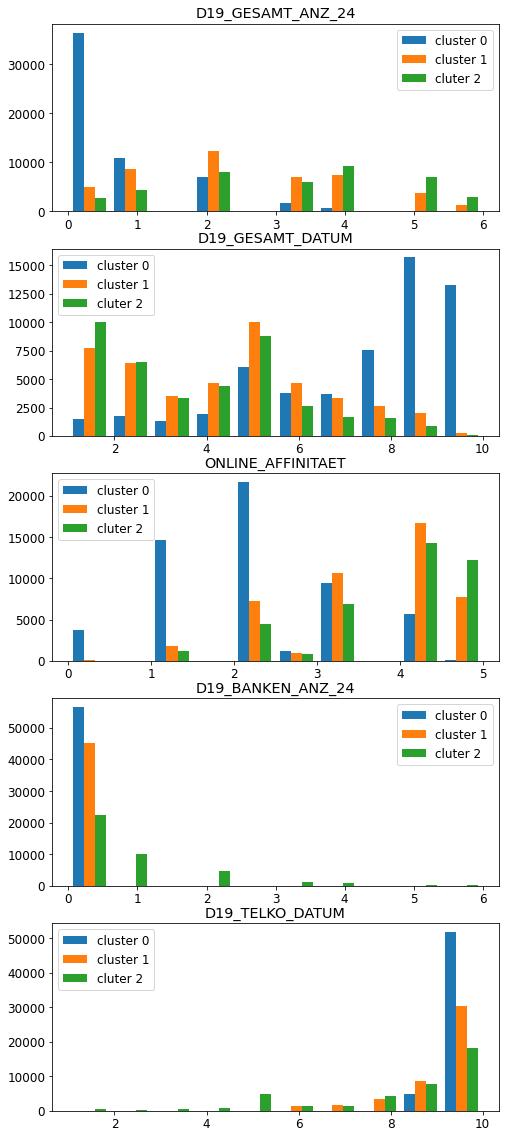

In [290]:
# find common columns from all thress clusters and plot

common_select_cols = cluster_select_col_0.intersection(cluster_select_col_1)
common_select_cols = list(common_select_cols.intersection(cluster_select_col_2))
common_select_cols.append('D19_BANKEN_ANZ_24')
common_select_cols.append('D19_TELKO_DATUM')

print(common_select_cols)
n_plots = len(common_select_cols)
plt.figure(figsize=[8,20])

for ind in range(n_plots):
    plt.subplot(n_plots,1, ind+1)
    data = [df_cleaned[labels == 0][common_select_cols[ind]], 
            df_cleaned[labels == 1][common_select_cols[ind]],
            df_cleaned[labels == 2][common_select_cols[ind]]]
    
    plt.hist(data, label = ['cluster 0', 'cluster 1','cluter 2'])
    plt.title(str(common_select_cols[ind]))
    plt.legend()

We then select attributes with largest standard deviation distances between clusters. These attributes, as it turns out, are also related to transaction activity. The most different attributes between clusters are transaction activity focused in segments including BANKING, TELECOMMUNICATIONS and surprisingly ANIMAL PRODUCTS. 

In [299]:
# find largest distance between cluster centers for each attribute
std_away_columns = np.zeros(len(df_cleaned_clusters.columns))


for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    distance = df_cleaned_clusters.loc[1, col] - df_cleaned_clusters.loc[2, col]
    std_away = distance/std_df_cleaned_attributes[ind]
    std_away_columns[ind] = std_away
    

# find top k attributes with largest distance between clusters
n_top = 10
std_away_top = std_away_columns[np.argsort(-abs(std_away_columns))[0:n_top]]
top_dist_columns = df_cleaned_clusters.columns[np.argsort(-abs(std_away_columns))[0:n_top]]

for n in range(n_top):
    col = top_dist_columns[n]
    print('Column {} is max {} std away between clusters'.format(col, std_away_top[n]))
    avg_value = avg_df_cleaned_attributes.loc[col]
    cluster_center = df_cleaned_clusters[col][0]
    cluster_center1 = df_cleaned_clusters[col][1]
    cluster_center2 = df_cleaned_clusters[col][2]
    
    
    print('columns {} is centered at {},{},{} while average value is {}'.format(col, cluster_center,cluster_center1,cluster_center2, avg_value))


Column D19_BANKEN_DATUM is max 1.1958901330257878 std away between clusters
columns D19_BANKEN_DATUM is centered at 10.007941951778532,9.636873842633216,7.431878607131449 while average value is 9.16436423158875
Column D19_BANKEN_ANZ_24 is max -1.1099101027956118 std away between clusters
columns D19_BANKEN_ANZ_24 is centered at 0.0006425176263271937,0.0021615513421408827,0.7455951874899414 while average value is 0.21071867018499443
Column D19_BANKEN_ONLINE_DATUM is max 0.9678954141605026 std away between clusters
columns D19_BANKEN_ONLINE_DATUM is centered at 10.009309451588964,9.824533310451784,8.310532147639003 while average value is 9.472201447782465
Column D19_BANKEN_DIREKT is max 0.9245478710163867 std away between clusters
columns D19_BANKEN_DIREKT is centered at 7.996241537020098,7.7110847730677845,6.48310283870889 while average value is 7.479221640537909
Column D19_BANKEN_ANZ_12 is max -0.918002045964775 std away between clusters
columns D19_BANKEN_ANZ_12 is centered at -0.0023

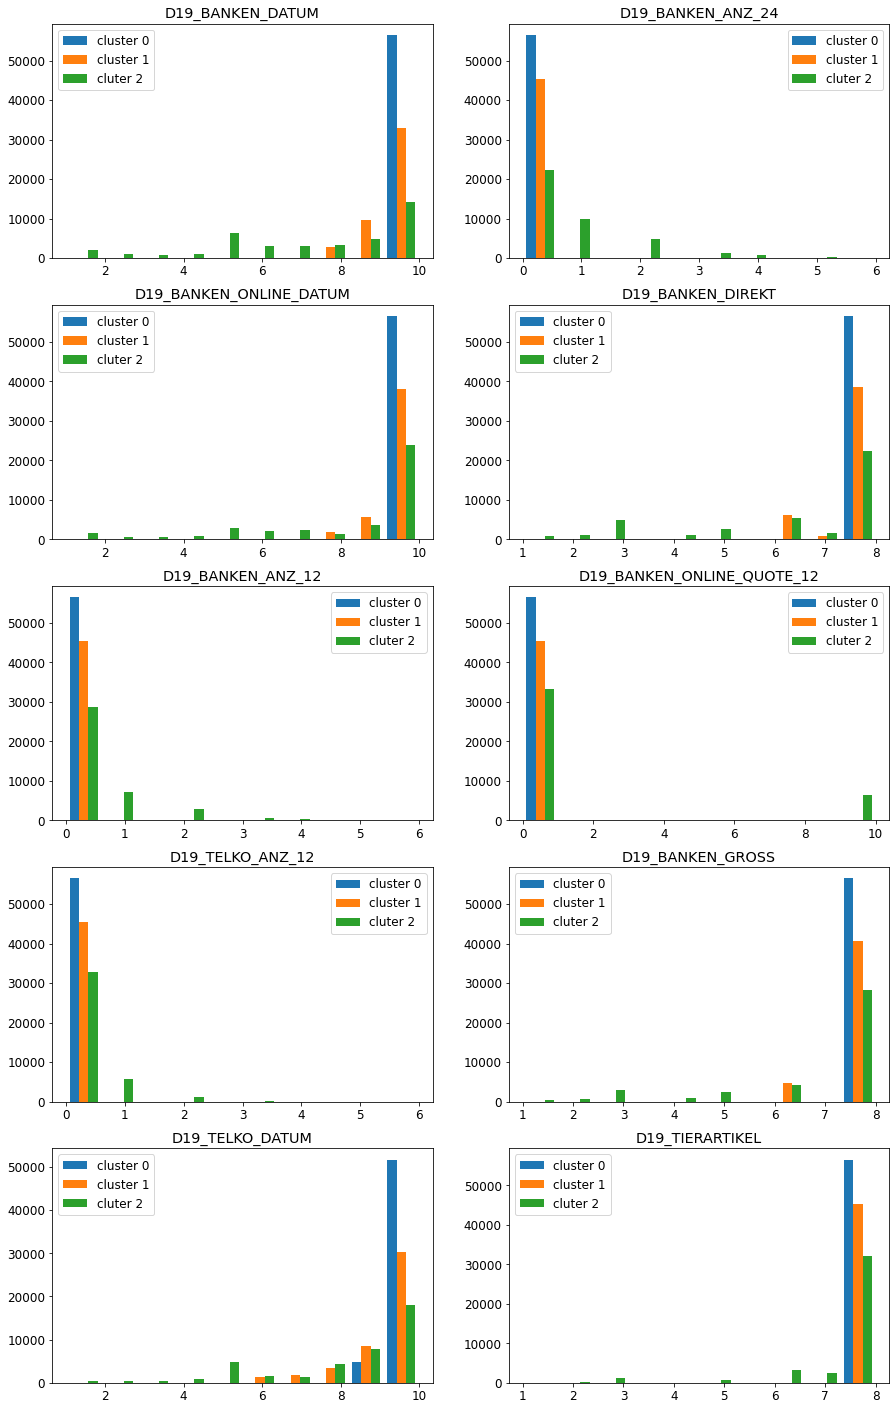

In [300]:
plt.figure(figsize=[15,n_top*2.5])

for n in range(n_top):
    col = top_dist_columns[n]
    
    plt.subplot(math.ceil(n_top/2),2, n+1)
    
    data = [df_cleaned[labels == 0][col], 
            df_cleaned[labels == 1][col],
            df_cleaned[labels == 2][col]]
    
    plt.hist(data, label = ['cluster 0', 'cluster 1','cluter 2'])
    plt.title(str(col))
    plt.legend()

Overall, we find that biggest differentiator between clusters and between clusters and average are transactional activity, priamrily in TOTAL POOL, BANKING and TELECOMMUNICATIONS. This is consistent with our observation about the 1st reduced PCA feature. 

### <a id=pipeline_population> 2.3. Pipeline for Population  </a>

A data pipeline is built for the population demographics data. We defined the data cleaning step in the previous part, where we save the columns/rows dropped, the categorical columns that are encoded, as well as columns that are scaled during the customers pipeline.  These exact same columns/rows are then processed, in the same way, for population dataset.

In the following we define function that scales the population dataset using scalers fitted on customers dataset, and then combine with the prior part's cleaning function to define the pipeline (clean, scale and pca) for population dataset.


### 2.3.a Pipeline for Population

In [127]:
def scale_df_population(df,col_name_likely_rank, col_name_likely_normal, rank_scaler,numeric_scaler, 
                       prefix_list_encode):
    '''
    Scale population/test dataset using fitted scalers for customers/train dataset. 
    
    INPUT:
    df                     (pandas dataframe) dataset to be scaled
    col_name_likely_rank   (list) of cols to be scaled with rank_scaler
    col_name_likely_normal (list) of cols to be scaled with numeric_scaler
    rank_scaler            scaler fitted on train/customers dataset
    numeric_scaler         scaler fitted on train/customers dataset
    prefix_list_encode     (list) of prefixes for categorical columns
                       
    OUTPUT:
    df_transformed_X       scaled dataset
    
    '''
    
    # find names of columns that are categorically encoded
    n_encode = len(prefix_list_encode)
    column_categorical_encoded = []
    for ind in range(n_encode):
    
        prefix = prefix_list_encode[ind]
        column_encoded_names = find_col_names(df, prefix)
        column_categorical_encoded.extend(column_encoded_names)
    
    # note: do not scale categorical encoded data (they are already 0 or 1)
    
     # use fitted rank scaler 
    rank_data = df[col_name_likely_rank]
    rank_data_transformed = rank_scaler.transform(rank_data)
    df_rank_transformed = pd.DataFrame(data =rank_data_transformed, columns = col_name_likely_rank, index = df.index)
    

    # use standardscaler for these likely numeric columns
    numeric_data = df[col_name_likely_normal]
    numeric_data_transformed = numeric_scaler.transform(numeric_data)
    df_numeric_transformed = pd.DataFrame(data =numeric_data_transformed, columns = col_name_likely_normal, index = df.index )
    
   
    # concatenate transformed data
    df_transformed_X = df_rank_transformed.join(df_numeric_transformed)

    
    # add categorical data
    for col in column_categorical_encoded:
        df_transformed_X[col] = df[col]
        
    return df_transformed_X

In [128]:
def df_clean_scale_pca_population(df,df_trained, select_main, mailout, 
                                  na_row_threshold, columns_na, skew_outlier_frac,skew_select,
                                  column_encode, column_remain, column_binary, prefix_list_encode, 
                                  fill_na_cols_cat, drop_na_cols_cat, post_process,d19_letzer_dict,
                                  col_name_likely_rank,col_name_likely_numeric, 
                                  rank_scaler, numeric_scaler, pca_fitted, verbose_print_out):
    
    '''
    Pipeline that clean, scale and perform PCA analysis for transformed data.
    '''
    
    start_time = time.time()
    
    # clean 
    df_cleaned, df_trained = clean_df_population(df,df_trained, select_main, na_row_threshold, columns_na, skew_outlier_frac, skew_select,
                                                 column_encode, column_remain,column_binary, prefix_list_encode,
                                                 fill_na_cols_cat, drop_na_cols_cat, post_process, d19_letzer_dict,verbose_print_out)

    if verbose_print_out > 0:
        print('Finished cleaning step')
    
    # scale data
    df_scaled = scale_df_population(df_cleaned,col_name_likely_rank, col_name_likely_numeric, rank_scaler,numeric_scaler, 
                                   prefix_list_encode)
    
    if verbose_print_out > 0:
        print('Finished scaling step')
    
    
    # exception for sub-cluster analysis, where customers sub-cluster dataset does not have this value
    if select_main == 0:
        df_scaled = df_scaled.drop(columns = 'WOHNLAGE_Rural_1')
    
    ### use PCA to transformed data
    df_pca = pca_fitted.transform(df_scaled)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    if verbose_print_out > 0:
        print('Finished PCA step')
        print('Finished processing population dataset in {} minutes'.format(int(elapsed_time/60)))
        
    
    return df_cleaned, df_scaled, df_pca

We make use of the pipeline to clean,scale,PCA population dataset in the following. Note taht this is still for the main-cluster we defiend previously (where we don't have many missing values in rows/samples of dataset).

In [129]:
customers = pd.read_csv('data/customers.csv')
del customers['Unnamed: 0']

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
select_main_cluster = 1
skew_select = 1
skewedness_threshold = 0.2
na_row_threshold = 0.6
na_col_threshold = 0.6
na_low_frac = 0.15
na_high_frac = 0.95
scalar_choice = [MinMaxScaler(),StandardScaler()]
mailout = 0

verbose_print_out = 2
df_cleaned_customers_main, df_scaled_customers_main, df_pca_customers_main, \
d19_letzer_dict_customers_main, rows_na_customers_main, columns_na_customers_main, \
fill_na_cols_cat_customers_main, drop_na_cols_cat_customers_main, \
column_encode_customers_main, column_remain_customers_main, column_binary_customers_main, prefix_list_encode_customers_main, df_column_names_customers_main, \
col_name_likely_rank_customers_main, col_name_likely_normal_customers_main, rank_scaler_customers_main, numeric_scaler_customers_main,\
pca_fitted_customers_main, fitted_n_components_customers_main = \
df_clean_scale_pca(customers,select_main_cluster,na_row_threshold, na_col_threshold,
   skewedness_threshold, skew_select, na_low_frac, na_high_frac, 40,
  7, scalar_choice, mailout, 0.95, verbose_print_out)

Finished step 1 of cleaning
Processed 0.26046167011040844 rows with higher than 0.6 NA fraction
Dropped 6 columns with higher than 0.6 NA fraction
Finished step 3a of cleaning - filling NA for 339 numerical columns
Finished step 3b of cleaning - Encoded 29 columns, dropped 1 columns and found 15 binary columns
Columns we have not processed: 
['PRODUCT_GROUP', 'ONLINE_PURCHASE', 'CUSTOMER_GROUP', 'LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Processed dataset in 61.303447246551514 seconds


In [131]:
# import population datasets
population = pd.read_csv('data/azdias1.csv')
del population['Unnamed: 0']
print('Importing dataset')
print(population.shape)
for i in range(2,10):
    azdias_filename = 'data/azdias'+str(i)+'.csv'
    print('Importing dataset '+azdias_filename)
    population_add = pd.read_csv(azdias_filename)
    del population_add['Unnamed: 0']
    
    population = population.append(population_add, ignore_index=True)
    print(population.shape)

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Importing dataset
(100000, 366)
Importing dataset azdias2.csv
(200000, 366)
Importing dataset azdias3.csv
(300000, 366)
Importing dataset azdias4.csv
(400000, 366)
Importing dataset azdias5.csv
(500000, 366)
Importing dataset azdias6.csv
(600000, 366)
Importing dataset azdias7.csv
(700000, 366)
Importing dataset azdias8.csv
(800000, 366)
Importing dataset azdias9.csv
(891221, 366)


In [132]:
df_cleaned_population, df_scaled_population, df_pca_population = \
df_clean_scale_pca_population(population,df_cleaned_customers_main, 1, 0,
                              0.6, columns_na_customers_main, 0.2,1,
                                  column_encode_customers_main, column_remain_customers_main, column_binary_customers_main, prefix_list_encode_customers_main, 
                                  fill_na_cols_cat_customers_main, drop_na_cols_cat_customers_main, 0,d19_letzer_dict_customers_main,
                                  col_name_likely_rank_customers_main,col_name_likely_normal_customers_main, 
                                 rank_scaler_customers_main,  numeric_scaler_customers_main, pca_fitted_customers_main, verbose_print_out)

Finished step 1 of cleaning
Processed 0.10458124303623904 rows with higher than 0.6 NA fraction
Dropped 6 columns
Dropped following columns:
['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'TITEL_KZ', 'LP_LEBENSPHASE_FEIN_other']
Finished step 3a of cleaning - filling NA for 339 numerical columns
Finished step 3b of cleaning - Encoded 29 columns, dropped 1 columns and found 15         binary columns
Columns we have not processed: 
['LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Finished processing population dataset in 4 minutes


### 2.3.b Compare customers vs. demographics PCA 

Using the above pipeline, we have cleaned, scaled and transformed population dataset using the fitted pipeline from customers dataset. We can then compare descriptional statistics between customers and population datasets. 

We calcualte the KS (Kolmogorov–Smirnov test) statistics and p-values for each of the reduced features (PCA components) for population and customers dataset. The 10 PCA components with highest KS-staitistic, which indicates largest difference between two distributions, are displayed below. 

In [337]:
from scipy import stats
print_out = 0
ks_stats_list = np.zeros((df_pca_customers_main.shape[1]))
for c in range(df_pca_customers_main.shape[1]):
    PCA_customers = df_pca_customers_main[:,c]
    PCA_population = df_pca_population[:,c]
    ks_statistics, pvalue = stats.ks_2samp(PCA_customers, PCA_population)
    ks_stats_list[c] = ks_statistics
    
    if print_out:
        # mean, median
        print('Mean for PC {} is {} and {}'.format(c+1, round(PCA_customers.mean(),3), round(PCA_population.mean(),3)))

        # variance
        print('Variance for PC {} is {} and {}'.format(c+1, round(np.var(PCA_customers),3), round(np.var(PCA_population),3)))

        # skewness
        print('Skewness for PC {} is {} and {}'.format(c+1, round(stats.skew(PCA_customers),3), round(stats.skew(PCA_population),3)))
    
    
        print('KS Test for PC {} is {} with p-value {:3e}'.format(c+1, round(ks_statistics,2), round(pvalue,3)))
    


In [338]:
n_top = 10
ks_stats_top = ks_stats_list[np.argsort(-abs(ks_stats_list))[0:n_top]]
pca_n_stats_top = np.array(range(df_pca_customers_main.shape[1]))[np.argsort(-abs(ks_stats_list))[0:n_top]]

for n in range(n_top):
    print('KS Stats for PCA {} is {}'.format(pca_n_stats_top[n]+1, ks_stats_top[n]))

KS Stats for PCA 2 is 0.45916831244626355
KS Stats for PCA 3 is 0.41891373146642896
KS Stats for PCA 99 is 0.2881127010747162
KS Stats for PCA 54 is 0.24375131636164604
KS Stats for PCA 7 is 0.1976078867132391
KS Stats for PCA 1 is 0.18949085649310965
KS Stats for PCA 24 is 0.18069959719430534
KS Stats for PCA 104 is 0.17974332505803658
KS Stats for PCA 98 is 0.17799750140193588
KS Stats for PCA 40 is 0.17610641760015594


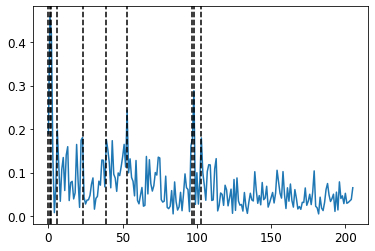

In [339]:
plt.plot(range(df_pca_customers_main.shape[1]), ks_stats_list)
for n in range(n_top):
    plt.axvline(x = pca_n_stats_top[n], linestyle = '--', color = 'k')

plt.show()

We visualize the distribution of data points for customers vs. population dataset, in the reduced feature space. The three dimensions visualized are the 3 components with largest KS statistics.

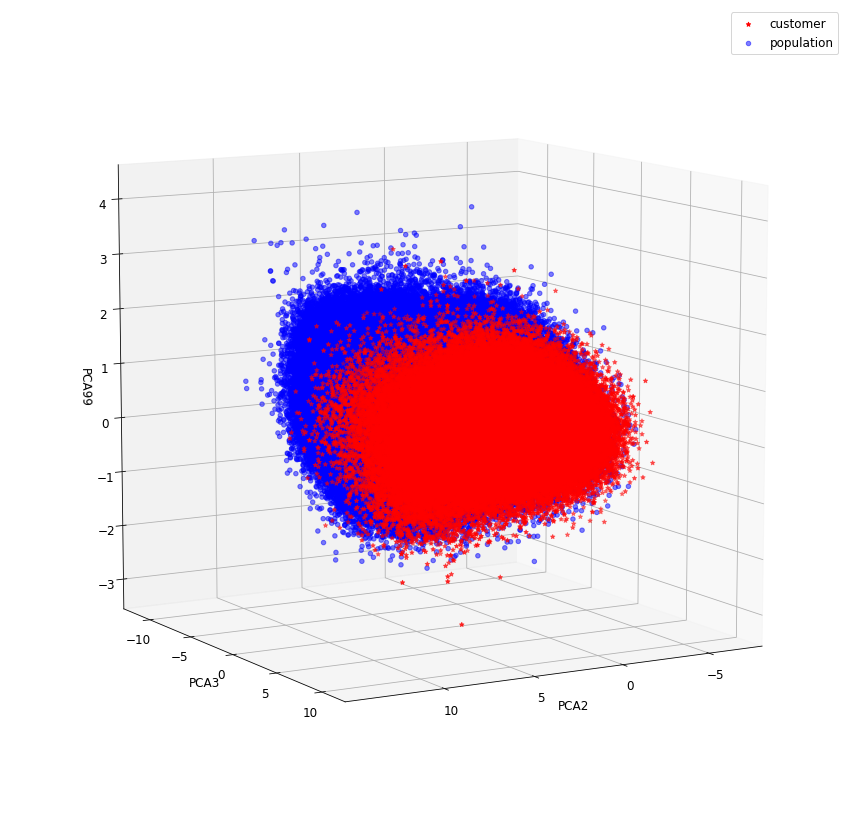

In [347]:
# select components
c1 = pca_n_stats_top[0]
c2 = pca_n_stats_top[1]
c3 = pca_n_stats_top[2]

PCA1 = df_pca_customers_main[:,c1]
PCA2 = df_pca_customers_main[:,c2]
PCA3 = df_pca_customers_main[:,c3]
PCA1_population = df_pca_population[:,c1]
PCA2_population = df_pca_population[:,c2]
PCA3_population = df_pca_population[:,c3]


fig = plt.figure(figsize = [15,15])
ax = fig.add_subplot(111, projection='3d')


ax.scatter(PCA1, PCA2, PCA3, c='red',
           label='customer',marker='*')
ax.scatter(PCA1_population, PCA2_population, PCA3_population, c='blue',
           label='population',marker='o', alpha = 0.5)



ax.set_xlabel('PCA'+str(c1+1))
ax.set_ylabel('PCA'+str(c2+1))
ax.set_zlabel('PCA'+str(c3+1))
ax.view_init(elev=10., azim=60)

plt.legend()
plt.show()

We can take a quick look at what these PCA components are. 

- We have already looked at PCA2 before, which indicates primarily afifnity to personalities. Higher PCA2 values mean LOWER affinity to fightful attitude (SEMIO_KAEM), critical minded (SEMIO_KRIT), dominant minded (SEMIO_DOM), and HIGHER affinity to attributes such as dreamily (SEMIO_VERT), cultural minded (SEMIO_KULT). 

- PCA3 below indicates personality affinities as well. Higher PCA3 values mean higher affinity to religious (SEMIO_REL), cultural minded (SEMIO_KULT), and LOWER affinity to eventful oriented (SEMIO_ERL). 

- PCA99 below primarily includes contributions from CJT_TYP, some D19 and KBA13 columns. Higher PCA99 value indicates:
    - lower age
    - Higher D19_SOZIALES (D19_SOZIALES is important feature but we have no information)
    - We have no information on CJT_TYP meaning
    - Less likelihood to be Gourmet consumption type (D19_KONSUMTYP_3), more likely to be Inactive consumption type  (D19_KONSUMTYP_9)
    - Share of car owners aged 35-45 is lower, while share of car owners aged over 66 is increased

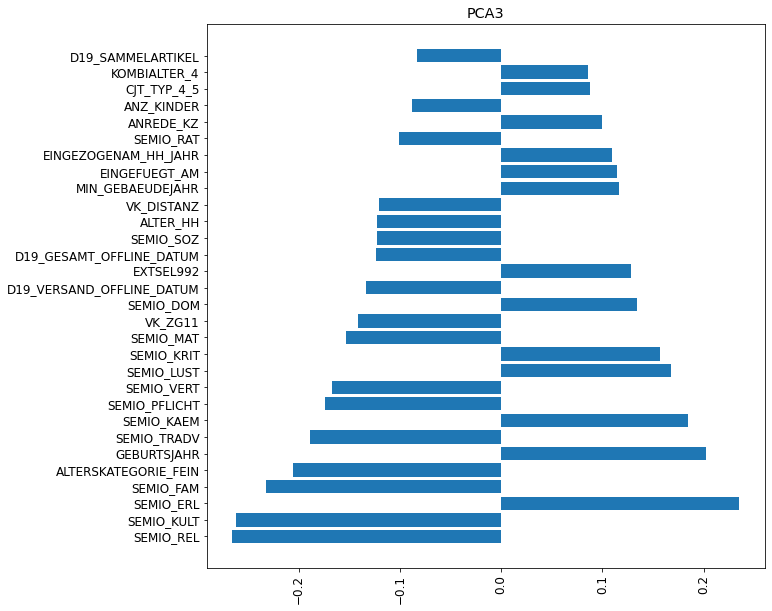

In [135]:
# look at weights for PCA99, and maybe PCA3 (ifI didn't look at it)

weights_pca3 = pca_components[2,:].transpose()
n_top = 30
weights_pca3_top = weights_pca3[np.argsort(-abs(weights_pca3))[0:n_top]]
weights_pca3_features = df_scaled.columns[np.argsort(-abs(weights_pca3))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pca3_features,weights_pca3_top)
plt.xticks(rotation = 'vertical')
plt.title('PCA3')
plt.show()


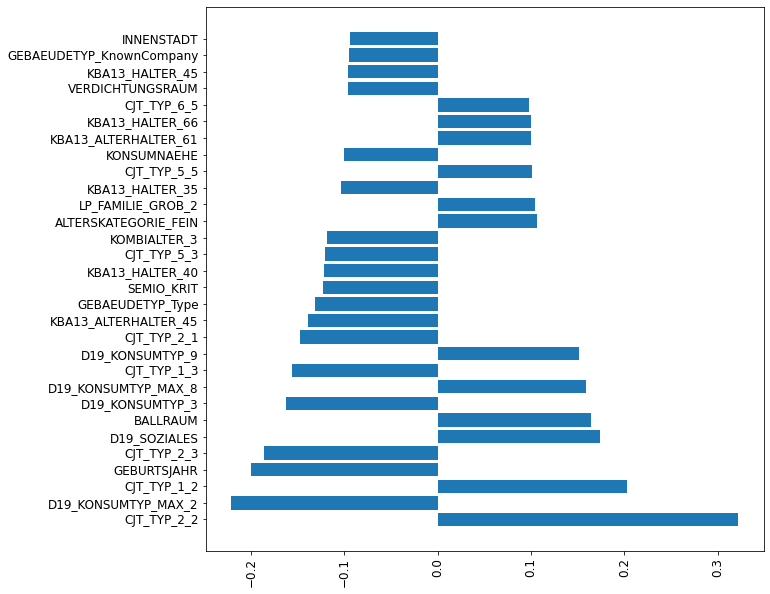

In [136]:
weights_pca99 = pca_components[98,:].transpose()
n_top = 30
weights_pca99_top = weights_pca99[np.argsort(-abs(weights_pca99))[0:n_top]]
weights_pca99_features = df_scaled.columns[np.argsort(-abs(weights_pca99))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pca99_features,weights_pca99_top)
plt.xticks(rotation = 'vertical')
plt.show()

We can take a peek at how these 3 PCA components look like for customers vs population dataset.

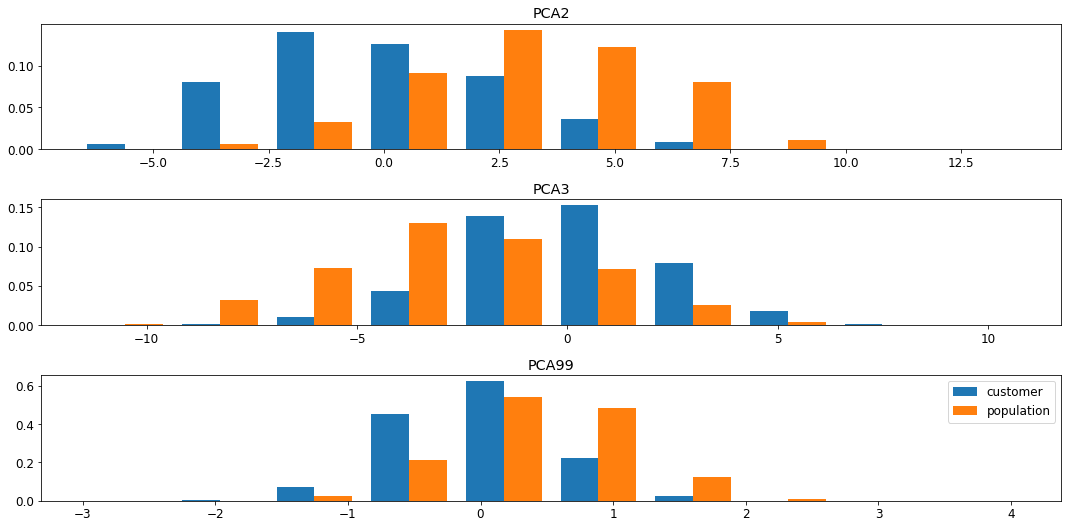

In [139]:
# visualize values of PCA2, PCA3, PCA 99
c1, c2, c3 = 1, 2, 98 

PCA1 = df_pca_customers_main[:,c1]
PCA2 = df_pca_customers_main[:,c2]
PCA3 = df_pca_customers_main[:,c3]
PCA1_population = df_pca_population[:,c1]
PCA2_population = df_pca_population[:,c2]
PCA3_population = df_pca_population[:,c3]

plt.figure(figsize=[15,3*2.5])

plt.subplot(3,1,1)
data = [PCA1, PCA1_population]
plt.hist(data, label = ['customer','population'], density  = True)
plt.title('PCA2')

plt.subplot(3,1,2)
data = [PCA2, PCA2_population]
plt.hist(data, label = ['customer','population'], density  = True)
plt.title('PCA3')

plt.subplot(3,1,3)
data = [PCA3, PCA3_population]
plt.hist(data, label = ['customer','population'], density  = True)
plt.title('PCA99')

plt.tight_layout()
plt.legend()

The customer have lower PCA2, slightly higher PCA3, and slightly lower PCA99 values. From our interpretations above, this means the customer, compared to population, is POTENTIALLY: 

- higher affinity to fightful, critical minded and cominant minded
- higher affinity to religious, cultural minded

However, at this point we cannot pin-point to exact differnces since PCA is a reduced combination of many attributes.


Still, it is interesting that, unlike cluster comparisons within customers, customer vs population are primarily different in aspects such as personality and demographics, not transaction activity. 

In [357]:
threshold = optimal_threshold
col_to_compare = list(df_cleaned_population.columns)
col_to_compare.remove('LNR')
ks_stats_list_col =  np.zeros((df_cleaned_population.shape[1]-1))
for ind in range(len(col_to_compare)):
    col = col_to_compare[ind]
    customers_col = df_cleaned_customers_main[col]
    population_col = df_cleaned_population[col]
    
    ks_statistics, pvalue = stats.ks_2samp(customers_col, population_col)
    ks_stats_list_col[ind] = ks_statistics
    
    if print_out:
        # mean, median
        print('Mean for PC {} is {} and {}'.format(c+1, round(customers_col.mean(),3), round(population_col.mean(),3)))

        # variance
        print('Variance for PC {} is {} and {}'.format(c+1, round(np.var(customers_col),3), round(np.var(population_col),3)))

        # skewness
        print('Skewness for PC {} is {} and {}'.format(c+1, round(stats.skew(customers_col),3), round(stats.skew(population_col),3)))
    
    
        print('KS Test for PC {} is {} with p-value {:3e}'.format(c+1, round(ks_statistics,2), round(pvalue,3)))

n_top = 10
ks_stats_top_col = ks_stats_list_col[np.argsort(-abs(ks_stats_list_col))[0:n_top]]
col_n_stats_top = np.array(col_to_compare)[np.argsort(-abs(ks_stats_list_col))[0:n_top]]

for n in range(n_top):
    print('KS Stats for column {} is {}'.format(col_n_stats_top[n], ks_stats_top_col[n]))

KS Stats for column D19_SOZIALES is 0.6861818893220746
KS Stats for column GEBURTSJAHR is 0.6229488603210697
KS Stats for column LP_LEBENSPHASE_FEIN_income is 0.6153175999108915
KS Stats for column EXTSEL992 is 0.6000799735082176
KS Stats for column ALTERSKATEGORIE_FEIN is 0.5368438097132957
KS Stats for column KK_KUNDENTYP is 0.5297556994820563
KS Stats for column D19_KONSUMTYP_MAX_2 is 0.5206789174693986
KS Stats for column VK_ZG11 is 0.4562343049599136
KS Stats for column D19_KONSUMTYP_9 is 0.4489120496076378
KS Stats for column AGER_TYP_nan is 0.42510357350473466


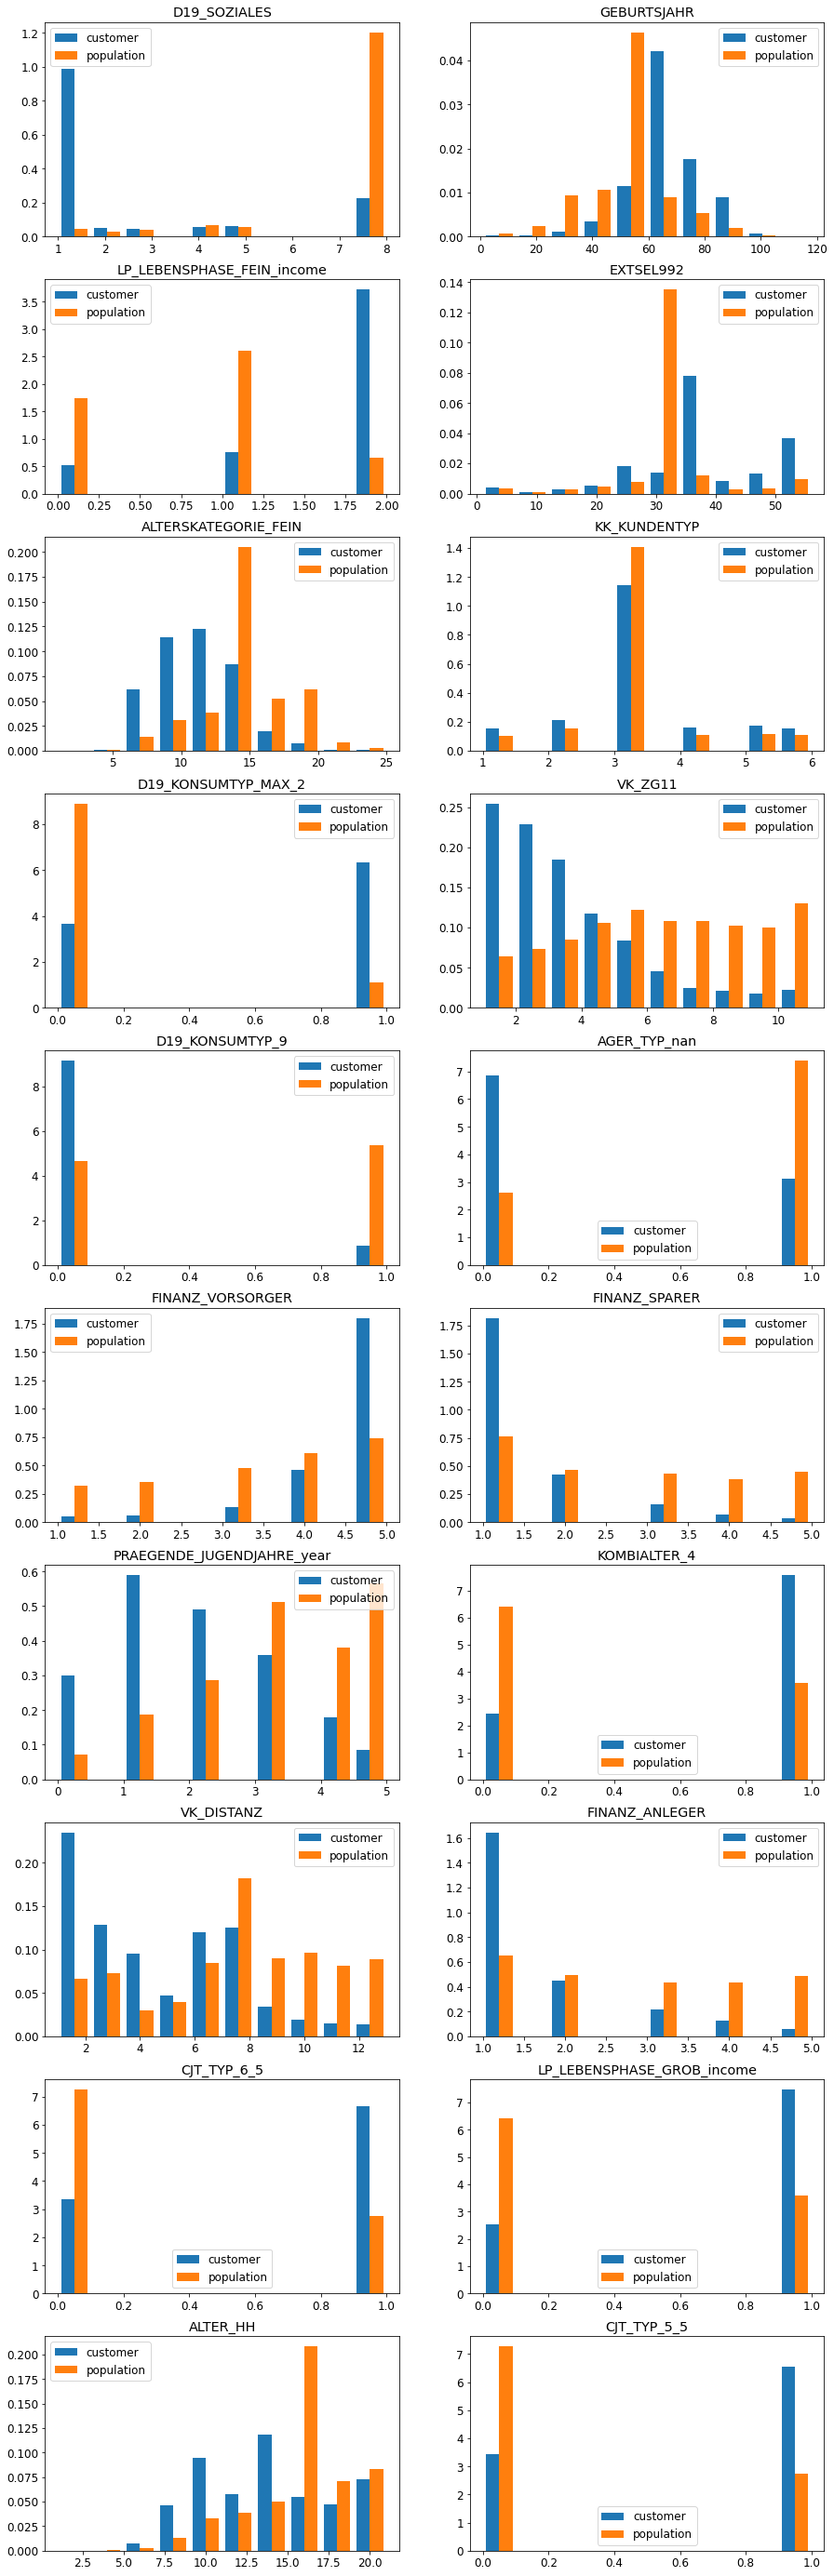

In [362]:
n_top = 20
plt.figure(figsize=[15,n_top*2.5])

for n in range(n_top):
    col = col_n_stats_top[n]
    customers_col = df_cleaned_customers_main[col]
    population_col = df_cleaned_population[col]
    
    plt.subplot(math.ceil(n_top/2),2, n+1)
    
    data = [df_cleaned_customers_main[col], 
            df_cleaned_population[col]]
    
    plt.hist(data, label = ['customer','population'], density  = True)
    plt.title(str(col))
    plt.legend()

These description statistics shows mean and variance of PC components differ a lot for the customers and population dataset. The KS tests all show near-zero p-value, and were able to reject the null hypothesis that the population and customers dataset are statistically the same. Therefore, these results show that customers and population datasets are different. 


These top 10 different attributes between customers vs population are primarily in categories related to consumption type and age. The above plots can be interpreted as follows:

- The customer vs population differ a lot on D19_SOZIALES. Though we lack information for this attribute, the name indicates a purchase related to SOCIAL segments. 
- The customer is slightly older than population
- Income of customer is higher than population
- Customer has more active consumption than population
- Customer is much less likely to be 'prepared' financial type, but 'money saver' and 'investor' financial type than population
- Main age within household is likely older than population


In general, the attributes with biggest staitistical difference between customers vs. population are primarily in relation to (1) Age and (2) Financial or Consumption Type.

### 2.3.c. Compare Representation of Customer Profiles in customer vs. population

Using the un-supervised clustering algorithm trained on customers dataset, we can cluster the population dataset as well. Belowe we show the fraction of the 3 clusters in the population dataset. Note again that our analysis is done with the 'MAIN-CLUSTER' data where we have <60% missing values for each sample/row.

We then take the ratio of the fractions of each cluster in the customer vs. population dataset. This ratio is an indicator of  likelihood for a person belonging to cluster X becoming a customer. A ratio greater than 1 indicates that people in this group is MORE LIKELY THAN AVERAGE to become a customer. 


In [363]:
label_pop = clf.predict(df_pca_population)

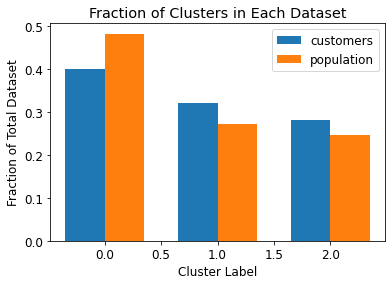

In [364]:
unique_pop, counts_pop = np.unique(label_pop, return_counts=True)
counts_pop = counts_pop/sum(counts_pop)

labels = clf.predict(df_pca_customers_main)

unique, counts = np.unique(labels, return_counts=True)
counts = counts/sum(counts)

width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(unique - width/2, counts, width, 
                label='customers')
rects2 = ax.bar(unique_pop + width/2, counts_pop, width, 
                label='population')


ax.set_xlabel('Cluster Label')
ax.set_ylabel('Fraction of Total Dataset')
ax.set_title('Fraction of Clusters in Each Dataset')
ax.legend()


plt.show()

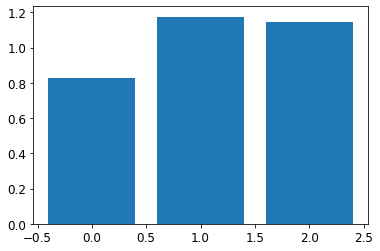

The ratios are:
[0.82744538 1.17491087 1.14428709]


In [365]:
plt.bar(unique, counts/counts_pop)
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Ratio of Cluster Fractions in Customers vs in Population')
ax.set_title('Ratio of Cluster Fractions')
plt.show()

print('The ratios are:')
print(counts/counts_pop)


We found that cluster 0 has ratio of 0.82, so it can be interpreted as 18% LESS LIKELY THAN AVERAGE to become a customer, whereas people in cluster 2 has ratio of 1.14, so people in this cluster are 14% MORE LIKELY THAN AVERAGE to become a customer.

This interpretation makes sense intuitively as well. The more active consumer that purchase recently is more likely to become a customer. 

### Testing Cluster Representations in Population

We take a quick de-tour to try build and train the pipeline with the population dataset. This could potentially build a different segmentation method that captures any DISTINCT GROUP that are in the population but not in the customers dataset. 

We perform similar pipeline optimization as we did before: (1) optimize n_numeric_threshold (2) record metrics of clustering for different n_category_threshold. 

Finished step 1 of cleaning
Processed 0.1031619577657593 rows with higher than 0.6 NA fraction
Dropped 9 columns with higher than 0.6 NA fraction
Finished step 3a of cleaning - filling NA for 337 numerical columns
Finished step 3b of cleaning - Encoded 6 columns, dropped 23 columns and found 15 binary columns
Columns we have not processed: 
['LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Processed dataset in 23.26131582260132 seconds
Finished step 1 of cleaning
Processed 0.1031619577657593 rows with higher than 0.6 NA fraction
Dropped 9 columns with higher than 0.6 NA fraction
Finished step 3a of cleaning - filling NA for 337 numerical columns
Finished step 3b of cleaning - Encoded 6 columns, dropped 23 columns and found 15 binary columns
Columns we have not processed: 
['LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Processed dataset in 23.437483549118042 seconds
Finished step 1 of cleaning
Processed 0.1031619577657593 rows with higher tha

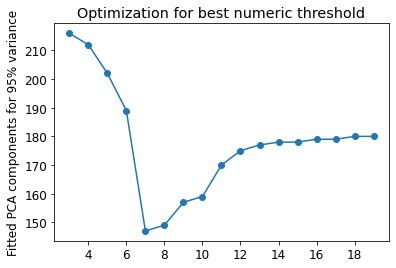

In [398]:

scalar_choice =  [MinMaxScaler(),StandardScaler()]
select_main_cluster = 1 #main 
mailout = 1 #is mailout/population
target_variance = 0.95
na_row_threshold = 0.6


na_col_threshold = 0.6
skewedness_threshold = 0.2
skew_select = 1
na_low_frac = 0.15
na_high_frac  = 0.95
n_numeric_threshold_range = range(3,20,1)

fitted_n_components_range = []
for n_numeric_threshold in n_numeric_threshold_range:
    
    
    verbose_print_out = 2
    
    df_cleaned_population_forcluster, df_scaled_population_forcluster, df_pca_population_forcluster, \
    d19_letzer_dict_population_forcluster, rows_na_population_forcluster, columns_na_population_forcluster, \
    fill_na_cols_cat_population_forcluster, drop_na_cols_cat_population_forcluster, \
    column_encode_population_forcluster, column_remain_population_forcluster, column_binary_population_forcluster, \
        prefix_list_encode_population_forcluster, df_column_names_population_forcluster, \
    col_name_likely_rank_population_forcluster, col_name_likely_normal_population_forcluster, \
        rank_scaler_population_forcluster, numeric_scaler_population_forcluster,\
    pca_fitted_population_forcluster, fitted_n_components_population_forcluster = \
    df_clean_scale_pca(population_sample,select_main_cluster,na_row_threshold, na_col_threshold,
       skewedness_threshold, skew_select, na_low_frac, na_high_frac, 4,
      n_numeric_threshold, scalar_choice, mailout, 0.95, verbose_print_out)
    
    fitted_n_components_range.append(fitted_n_components_population_forcluster)
    
plt.plot(n_numeric_threshold_range, fitted_n_components_range, marker = 'o')
plt.title('Optimization for best numeric threshold')
plt.ylabel('Fitted PCA components for 95% variance')
plt.show()

In [399]:
print(fitted_n_components_range)

[216, 212, 202, 189, 147, 149, 157, 159, 170, 175, 177, 178, 178, 179, 179, 180, 180]


In [411]:

# use optimal n components found in above step
ind_min = fitted_n_components_range.index(min(fitted_n_components_range)) 
n_numeric_threshold_optimal = n_numeric_threshold_range[ind_min]

scalar_choice =  [MinMaxScaler(),StandardScaler()]
select_main_cluster = 1 #main 
mailout = 1 #mailout or population
target_variance = 0.95
na_row_threshold = 0.6


na_col_threshold = 0.6
skewedness_threshold = 0.2
skew_select = 1
na_low_frac = 0.15
na_high_frac  = 0.95
n_category_threshold_range = [1,3,5,7,10,14,40]

ch_score_gmm_range, db_score_gmm_range, sil_score_gmm_range, bic_info_gmm_range = [], [], [], []
ch_score_kmeans_range, db_score_kmeans_range, sil_score_kmeans_range, inertia_kmeans_range, diff_inertia_kmeans_range = [],[],[],[], []
fitted_n_components_range = []
dimension_range = []
for n_category_threshold in n_category_threshold_range:

    verbose_print_out = 1
    
    df_cleaned_population_forcluster, df_scaled_population_forcluster, df_pca_population_forcluster, \
    d19_letzer_dict_population_forcluster, rows_na_population_forcluster, columns_na_population_forcluster, \
    fill_na_cols_cat_population_forcluster, drop_na_cols_cat_population_forcluster, \
    column_encode_population_forcluster, column_remain_population_forcluster, column_binary_population_forcluster, \
    prefix_list_encode_population_forcluster, df_column_names_population_forcluster, \
    col_name_likely_rank_population_forcluster, col_name_likely_normal_population_forcluster, \
    rank_scaler_population_forcluster, numeric_scaler_population_forcluster,\
    pca_fitted_population_forcluster, fitted_n_components_population_forcluster = \
    df_clean_scale_pca(population_sample,select_main_cluster,na_row_threshold, na_col_threshold,
    skewedness_threshold, skew_select, na_low_frac, na_high_frac, n_category_threshold,
    7, scalar_choice, mailout, 0.95, verbose_print_out)
    
    dimension_range.append(df_scaled_population_forcluster.shape[1])
    fitted_n_components_range.append(fitted_n_components_population_forcluster)
    
    ch_score_gmm_cv, db_score_gmm_cv, sil_score_gmm_cv, bic_info_gmm_cv = [], [],[],[]
    print('Running cluster analysis CV for {} category threshold'.format(n_category_threshold))
    
    start_time = time.time() 
    # sub-sample dataset to calculate segmentation metrics
    for cv in range(3):
        rows_id = random.sample(range(0,df_pca_population_forcluster.shape[0]-1), math.ceil(0.1 * df_pca_population_forcluster.shape[0]))
        df_pca_sample = df_pca_population_forcluster[rows_id,:]

        sum_of_squared_distances = []
        ch_score_gmm, db_score_gmm, sil_score_gmm, bic_info_gmm = [], [],[],[]


        
        K_gmm = range(2,20,1)
        for k in K_gmm:


            # fit a Gaussian Mixture Model with two components
            clf = mixture.GaussianMixture(n_components=k, covariance_type='full', max_iter = 1000)
            clf.fit(df_pca_sample)

            #print('Computing score for {} clusters'.format(k))

            bic_info_gmm.append(clf.bic(df_pca_sample))
            labels = clf.predict(df_pca_sample)
            ch_score_gmm.append(calinski_harabasz_score(df_pca_sample, labels))
            db_score_gmm.append(davies_bouldin_score(df_pca_sample, labels))
            sil_score_gmm.append(silhouette_score(df_pca_sample, labels))
        
        ch_score_gmm_cv.append(ch_score_gmm)
        db_score_gmm_cv.append(db_score_gmm)
        sil_score_gmm_cv.append(sil_score_gmm)
        bic_info_gmm_cv.append(bic_info_gmm)
        
    current_time = time.time()
    elapsed_time = current_time - start_time
    print('Finish cluster analysis CV for {} category threshold in {} minutes'.format(n_category_threshold, int(elapsed_time)/60))
        
    ch_score_gmm_range.append(ch_score_gmm_cv)
    db_score_gmm_range.append(db_score_gmm_cv)
    sil_score_gmm_range.append(sil_score_gmm_cv)
    bic_info_gmm_range.append(bic_info_gmm_cv)
    
    
    
    

Processed dataset in 21.396509647369385 seconds
Running cluster analysis CV for 1 category threshold
Finish cluster analysis CV for 1 category threshold in 11.8 minutes
Processed dataset in 22.334482431411743 seconds
Running cluster analysis CV for 3 category threshold
Finish cluster analysis CV for 3 category threshold in 11.366666666666667 minutes
Processed dataset in 25.67463207244873 seconds
Running cluster analysis CV for 5 category threshold
Finish cluster analysis CV for 5 category threshold in 12.9 minutes
Processed dataset in 27.6194965839386 seconds
Running cluster analysis CV for 7 category threshold
Finish cluster analysis CV for 7 category threshold in 16.466666666666665 minutes
Processed dataset in 28.236088275909424 seconds
Running cluster analysis CV for 10 category threshold
Finish cluster analysis CV for 10 category threshold in 18.966666666666665 minutes
Processed dataset in 27.9458110332489 seconds
Running cluster analysis CV for 14 category threshold
Finish cluster

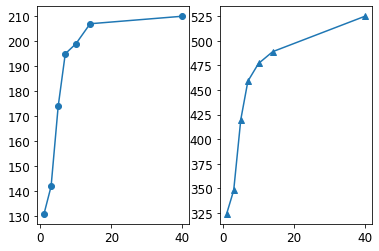

In [412]:
plt.subplot(1,2,1)
plt.plot(n_category_threshold_range, fitted_n_components_range, marker = 'o')
plt.subplot(1,2,2)
plt.plot(n_category_threshold_range, dimension_range, marker = '^')

In [413]:
# output these components
for ind in range(len(n_category_threshold_range)):
    print('For category threshodl {} we have fitted {} PCA components for {} attributes'.format(
        n_category_threshold_range[ind], fitted_n_components_range[ind],
    dimension_range[ind]))

For category threshodl 1 we have fitted 131 PCA components for 324 attributes
For category threshodl 3 we have fitted 142 PCA components for 348 attributes
For category threshodl 5 we have fitted 174 PCA components for 420 attributes
For category threshodl 7 we have fitted 195 PCA components for 459 attributes
For category threshodl 10 we have fitted 199 PCA components for 477 attributes
For category threshodl 14 we have fitted 207 PCA components for 489 attributes
For category threshodl 40 we have fitted 210 PCA components for 525 attributes


In [416]:

mean_ch_range, std_ch_range = [],[]
mean_db_range, std_db_range = [],[]
mean_sil_range, std_sil_range = [],[]
mean_bic_range, std_bic_range = [],[]
for ind in range(len(n_category_threshold_range)):
    mean_ch_k,std_ch_k = [],[]
    mean_db_k,std_db_k = [],[]
    mean_sil_k,std_sil_k = [],[]
    mean_bic_k,std_bic_k = [],[]
    for k_ind in range(18):
        mean_ch, mean_db, mean_sil, mean_bic = 0,0,0,0
        std_ch, std_db, std_sil, std_bic = [],[],[],[]
        for cv_ind in range(3):
            mean_ch += ch_score_gmm_range[ind][cv_ind][k_ind] 
            mean_db += db_score_gmm_range[ind][cv_ind][k_ind]
            mean_sil += sil_score_gmm_range[ind][cv_ind][k_ind]
            mean_bic += bic_info_gmm_range[ind][cv_ind][k_ind]
            
            std_ch.append(ch_score_gmm_range[ind][cv_ind][k_ind])
            std_db.append(db_score_gmm_range[ind][cv_ind][k_ind])
            std_sil.append(sil_score_gmm_range[ind][cv_ind][k_ind])
            std_bic.append(bic_info_gmm_range[ind][cv_ind][k_ind])
            
        mean_ch_k.append(mean_ch/5)
        mean_db_k.append(mean_db/5)
        mean_sil_k.append(mean_sil/5)
        mean_bic_k.append(mean_bic/5)
        
        std_ch_k.append(statistics.stdev(std_ch))
        std_db_k.append(statistics.stdev(std_db))
        std_sil_k.append(statistics.stdev(std_sil))
        std_bic_k.append(statistics.stdev(std_bic))
        
    mean_ch_range.append(mean_ch_k)
    mean_db_range.append(mean_db_k)
    mean_sil_range.append(mean_sil_k)
    mean_bic_range.append(mean_bic_k)
    
    std_ch_range.append(std_ch_k)
    std_db_range.append(std_db_k)
    std_sil_range.append(std_sil_k)
    std_bic_range.append(std_bic_k)
    


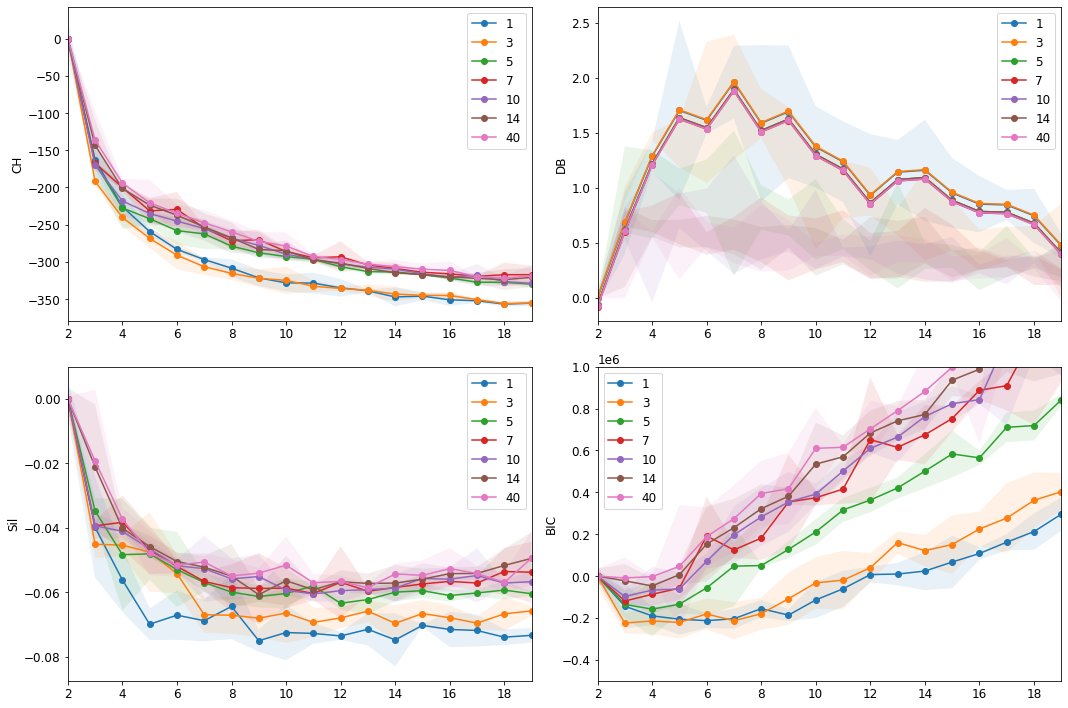

In [420]:

fig, axs = plt.subplots(2, 2, figsize=(15,10)) 
color_cat = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']

for ind, color_ind in zip(range(7), color_cat):    
    std_ch_abs = [abs(x) for x in std_ch_range[ind]]
    y1 = [x + y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    y2 = [x - y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    axs[0][0].plot(K_gmm, mean_ch_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][0].set_ylabel('CH')
    axs[0][0].set_xlim(2,19)
    axs[0][0].legend()
    

    std_db_abs = [abs(x) for x in std_db_range[ind]]
    y1 = [x + y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    y2 = [x - y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    axs[0][1].plot(K_gmm, mean_db_range[0] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][1].set_ylabel('DB')
    axs[0][1].set_xlim(2,19)
    axs[0][1].legend()
    

    std_sil_abs = [abs(x) for x in std_sil_range[ind]]
    y1 = [x + y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    y2 = [x - y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    axs[1][0].plot(K_gmm, mean_sil_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][0].set_ylabel('Sil')
    axs[1][0].set_xlim(2,19)
    axs[1][0].legend()
    

    std_bic_abs = [abs(x) for x in std_bic_range[ind]]
    y1 = [x + y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    y2 = [x - y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    axs[1][1].plot(K_gmm, mean_bic_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][1].set_ylabel('BIC')
    axs[1][1].set_xlim(2,19)
    axs[1][1].set_ylim(-0.5*1e6,1*1e6)
    axs[1][1].legend()
    
    
plt.tight_layout()
plt.show()


In [422]:
version = 1
# save optimization stats in csv file
for cat_ind in range(7):
    ch_temp = pd.DataFrame(data = ch_score_gmm_range[cat_ind], columns = K_gmm)
    file_name_ch = 'cv/ch_score_pop_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    ch_temp.to_csv(file_name_ch)
    
    db_temp = pd.DataFrame(data = db_score_gmm_range[cat_ind], columns = K_gmm)
    file_name_db = 'cv/db_score_pop_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    db_temp.to_csv(file_name_db)
    
    sil_temp = pd.DataFrame(data = sil_score_gmm_range[cat_ind], columns = K_gmm)
    file_name_sil = 'cv/sil_score_pop_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    sil_temp.to_csv(file_name_sil)
    
    bic_temp = pd.DataFrame(data = bic_info_gmm_range[cat_ind], columns = K_gmm)
    file_name_bic = 'cv/bic_score_pop_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    bic_temp.to_csv(file_name_bic)
    
    

From the above plots, it is clear that the general trend of the 4 metrics (CH Score, DB score, silhouette score and BIC information) are very similar to those built on customers dataset. We notice that the optimal cluster number based on BIC information is larger relative to customers dataset.

For n_category_threshold above 7, the optimal cluster is either 3 (for n_category_threshold = 7, 10, 40) or 4 (for n_category_threshold = 14). Given that we have chosen n_category_threshold = 40, the clustering is fairly robust. It seems that we have not missed any distinctly different groups in the population dataset.

###  <a id = 'segment_subcluster'> Part 2 In Parallel: Analyzing Sub-Cluster </a>

### Optimize Sub-Cluster Pipeline

In parallel to analyzing the main-cluster, we perform the same analysis for the sub-cluster with greater than 60% missing values for each entry/sample. 

The optimal n_numeric_threshold is found to be 9, which gives the minimum number of PCA components to explain 95% of variance.

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 50.88387179374695 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 51.11002993583679 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 50.33829164505005 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 49.74472093582153 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 50.032997608184814 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 49.635616302490234 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 50.50386309623718 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 48.26708102226257 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 48.85807728767395 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 48.073843240737915 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 49.103646993637085 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 48.13975286483765 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 48.91150689125061 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 48.32160806655884 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 49.00595784187317 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 48.05925154685974 seconds


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 48.783456563949585 seconds


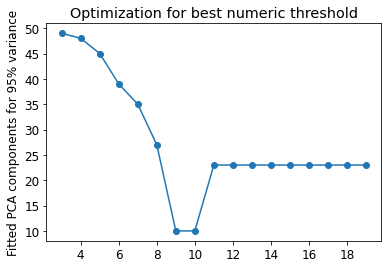

In [423]:

scalar_choice =  [MinMaxScaler(),StandardScaler()]
select_main_cluster = 0 #not main 
mailout = 0 #NOT mailout
target_variance = 0.95
na_row_threshold = 0.6


na_col_threshold = 0.6
skewedness_threshold = 0.2
skew_select = 1
na_low_frac = 0.15
na_high_frac  = 0.95
n_numeric_threshold_range = range(3,20,1)

ch_score_gmm_range, db_score_gmm_range, sil_score_gmm_range, bic_info_gmm_range = [], [], [], []
ch_score_kmeans_range, db_score_kmeans_range, sil_score_kmeans_range, inertia_kmeans_range, diff_inertia_kmeans_range = [],[],[],[], []
fitted_n_components_range = []
for n_numeric_threshold in n_numeric_threshold_range:
    
    customers = pd.read_csv('data/customers.csv')
    del customers['Unnamed: 0']
    
    verbose_print_out = 1
    
    df_cleaned, df_scaled, df_pca, \
    d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
    column_encode, column_remain, column_binary, prefix_list_encode, df_column_names, \
    col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler,\
    pca_fitted, fitted_n_components = df_clean_scale_pca(customers,select_main_cluster,na_row_threshold, na_col_threshold,
       skewedness_threshold, skew_select, na_low_frac, na_high_frac, 4,
      n_numeric_threshold, scalar_choice, mailout, 0.95, verbose_print_out)
    
    fitted_n_components_range.append(fitted_n_components)
    
plt.plot(n_numeric_threshold_range, fitted_n_components_range, marker = 'o')
plt.title('Optimization for best numeric threshold')
plt.ylabel('Fitted PCA components for 95% variance')
plt.show()

In [454]:

# use optimal n components found in above step
n_numeric_threshold_optimal = 9

scalar_choice =  [MinMaxScaler(),StandardScaler()]
select_main_cluster = 0 #sub-cluster 
mailout = 0 #NOT mailout
target_variance = 0.95
na_row_threshold = 0.6


na_col_threshold = 0.6
skewedness_threshold = 0.2
skew_select = 1
na_low_frac = 0.15
na_high_frac  = 0.95
n_category_threshold_range = [2,3,4,5,6,7,8,10,12,14,16,40]

ch_score_gmm_range, db_score_gmm_range, sil_score_gmm_range, bic_info_gmm_range = [], [], [], []
ch_score_kmeans_range, db_score_kmeans_range, sil_score_kmeans_range, inertia_kmeans_range, diff_inertia_kmeans_range = [],[],[],[], []
fitted_n_components_range = []
dimension_range = []
for n_category_threshold in n_category_threshold_range:
    
    customers = pd.read_csv('data/customers.csv')
    del customers['Unnamed: 0']

    verbose_print_out = 1
    
    df_cleaned, df_scaled, df_pca, \
    d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
    column_encode, column_remain, column_binary, prefix_list_encode, df_column_names, \
    col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler,\
    pca_fitted, fitted_n_components = df_clean_scale_pca(customers,select_main_cluster,na_row_threshold, na_col_threshold,
       skewedness_threshold, skew_select, na_low_frac, na_high_frac, n_category_threshold,
      n_numeric_threshold_optimal, scalar_choice, mailout, 0.95, verbose_print_out)
    
    
    dimension_range.append(df_scaled.shape[1])
    fitted_n_components_range.append(fitted_n_components)
    
    ch_score_gmm_cv, db_score_gmm_cv, sil_score_gmm_cv, bic_info_gmm_cv = [], [],[],[]
    print('Running cluster analysis CV for {} category threshold'.format(n_category_threshold))
    
    start_time = time.time() 
    # sub-sample dataset to calculate segmentation metrics
    for cv in range(5):
        rows_id = random.sample(range(0,df_pca.shape[0]-1), math.ceil(0.1 * df_pca.shape[0]))
        df_pca_sample = df_pca[rows_id,:]

        sum_of_squared_distances = []
        ch_score_gmm, db_score_gmm, sil_score_gmm, bic_info_gmm = [], [],[],[]


        
        K_gmm = range(2,10,1)
        for k in K_gmm:


            # fit a Gaussian Mixture Model with two components
            clf = mixture.GaussianMixture(n_components=k, covariance_type='full', max_iter = 1000)
            clf.fit(df_pca_sample)

            #print('Computing score for {} clusters'.format(k))

            bic_info_gmm.append(clf.bic(df_pca_sample))
            labels = clf.predict(df_pca_sample)
            ch_score_gmm.append(calinski_harabasz_score(df_pca_sample, labels))
            db_score_gmm.append(davies_bouldin_score(df_pca_sample, labels))
            sil_score_gmm.append(silhouette_score(df_pca_sample, labels))
        
        ch_score_gmm_cv.append(ch_score_gmm)
        db_score_gmm_cv.append(db_score_gmm)
        sil_score_gmm_cv.append(sil_score_gmm)
        bic_info_gmm_cv.append(bic_info_gmm)
        
    current_time = time.time()
    elapsed_time = current_time - start_time
    print('Finish cluster analysis CV for {} category threshold in {} minutes'.format(n_category_threshold, int(elapsed_time)/60))
        
    ch_score_gmm_range.append(ch_score_gmm_cv)
    db_score_gmm_range.append(db_score_gmm_cv)
    sil_score_gmm_range.append(sil_score_gmm_cv)
    bic_info_gmm_range.append(bic_info_gmm_cv)
    
    
    
    

    
    

Processed dataset in 50.64358186721802 seconds
Running cluster analysis CV for 2 category threshold
Finish cluster analysis CV for 2 category threshold in 0.36666666666666664 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 50.614553928375244 seconds
Running cluster analysis CV for 3 category threshold
Finish cluster analysis CV for 3 category threshold in 0.36666666666666664 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 50.69262933731079 seconds
Running cluster analysis CV for 4 category threshold
Finish cluster analysis CV for 4 category threshold in 0.38333333333333336 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 51.269182443618774 seconds
Running cluster analysis CV for 5 category threshold
Finish cluster analysis CV for 5 category threshold in 0.4166666666666667 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 50.84377408027649 seconds
Running cluster analysis CV for 6 category threshold
Finish cluster analysis CV for 6 category threshold in 0.43333333333333335 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 51.790724992752075 seconds
Running cluster analysis CV for 7 category threshold
Finish cluster analysis CV for 7 category threshold in 0.43333333333333335 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 51.38229155540466 seconds
Running cluster analysis CV for 8 category threshold
Finish cluster analysis CV for 8 category threshold in 0.45 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 51.33824896812439 seconds
Running cluster analysis CV for 10 category threshold
Finish cluster analysis CV for 10 category threshold in 0.45 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 50.993918895721436 seconds
Running cluster analysis CV for 12 category threshold
Finish cluster analysis CV for 12 category threshold in 0.45 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 51.84973978996277 seconds
Running cluster analysis CV for 14 category threshold
Finish cluster analysis CV for 14 category threshold in 0.4666666666666667 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 50.764699935913086 seconds
Running cluster analysis CV for 16 category threshold
Finish cluster analysis CV for 16 category threshold in 0.48333333333333334 minutes


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processed dataset in 51.40130949020386 seconds
Running cluster analysis CV for 40 category threshold
Finish cluster analysis CV for 40 category threshold in 0.45 minutes


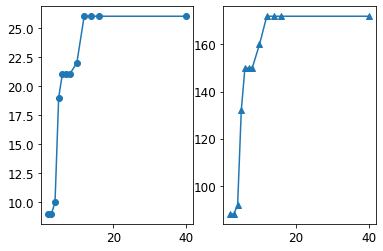

In [455]:
plt.subplot(1,2,1)
plt.plot(n_category_threshold_range, fitted_n_components_range, marker = 'o')
plt.subplot(1,2,2)
plt.plot(n_category_threshold_range, dimension_range, marker = '^')

In [456]:
# output these components
for ind in range(len(n_category_threshold_range)):
    print('For category threshodl {} we have fitted {} PCA components for {} attributes'.format(
        n_category_threshold_range[ind], fitted_n_components_range[ind],
    dimension_range[ind]))

For category threshodl 2 we have fitted 9 PCA components for 88 attributes
For category threshodl 3 we have fitted 9 PCA components for 88 attributes
For category threshodl 4 we have fitted 10 PCA components for 92 attributes
For category threshodl 5 we have fitted 19 PCA components for 132 attributes
For category threshodl 6 we have fitted 21 PCA components for 150 attributes
For category threshodl 7 we have fitted 21 PCA components for 150 attributes
For category threshodl 8 we have fitted 21 PCA components for 150 attributes
For category threshodl 10 we have fitted 22 PCA components for 160 attributes
For category threshodl 12 we have fitted 26 PCA components for 172 attributes
For category threshodl 14 we have fitted 26 PCA components for 172 attributes
For category threshodl 16 we have fitted 26 PCA components for 172 attributes
For category threshodl 40 we have fitted 26 PCA components for 172 attributes


In [168]:
version = 1
n_category_threshold_range = [2,3,4,5,6,7,8,10,12,14,16,40]


# LOAD optimization stats in csv file
ch_score_gmm_range, db_score_gmm_range, sil_score_gmm_range, bic_info_gmm_range = [], [], [],[]
    
for cat_ind in range(12):
    file_name_ch = 'cv/ch_score_subcluster_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    ch_temp =pd.read_csv(file_name_ch)
    ch_temp = ch_temp.drop(columns = 'Unnamed: 0')
    ch_score_gmm_range.append(ch_temp)
    
    
    file_name_db = 'cv/db_score_subcluster_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    db_temp = pd.read_csv(file_name_db)
    db_temp = db_temp.drop(columns = 'Unnamed: 0')
    db_score_gmm_range.append(db_temp)
    
    file_name_sil = 'cv/sil_score_subcluster_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    sil_temp = pd.read_csv(file_name_sil)
    sil_temp = sil_temp.drop(columns = 'Unnamed: 0')
    sil_score_gmm_range.append(sil_temp)
    
    file_name_bic = 'cv/bic_score_subcluster_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    bic_temp = pd.read_csv(file_name_bic)
    bic_temp = bic_temp.drop(columns = 'Unnamed: 0')
    bic_info_gmm_range.append(bic_temp)
    

In [169]:
import statistics
load_data = 1


mean_ch_range, std_ch_range = [],[]
mean_db_range, std_db_range = [],[]
mean_sil_range, std_sil_range = [],[]
mean_bic_range, std_bic_range = [],[]
for ind in range(len(n_category_threshold_range)):
    mean_ch_k,std_ch_k = [],[]
    mean_db_k,std_db_k = [],[]
    mean_sil_k,std_sil_k = [],[]
    mean_bic_k,std_bic_k = [],[]
    for k_ind in range(8):
        mean_ch, mean_db, mean_sil, mean_bic = 0,0,0,0
        std_ch, std_db, std_sil, std_bic = [],[],[],[]
        for cv_ind in range(5):
            
            if load_data == 1:
                mean_ch += ch_score_gmm_range[ind].iloc[cv_ind,k_ind] 
                mean_db += db_score_gmm_range[ind].iloc[cv_ind,k_ind] 
                mean_sil += sil_score_gmm_range[ind].iloc[cv_ind,k_ind] 
                mean_bic += bic_info_gmm_range[ind].iloc[cv_ind,k_ind] 

                std_ch.append(ch_score_gmm_range[ind].iloc[cv_ind,k_ind] )
                std_db.append(db_score_gmm_range[ind].iloc[cv_ind,k_ind] )
                std_sil.append(sil_score_gmm_range[ind].iloc[cv_ind,k_ind] )
                std_bic.append(bic_info_gmm_range[ind].iloc[cv_ind,k_ind])
            else:
                mean_ch += ch_score_gmm_range[ind][cv_ind][k_ind] 
                mean_db += db_score_gmm_range[ind][cv_ind][k_ind]
                mean_sil += sil_score_gmm_range[ind][cv_ind][k_ind]
                mean_bic += bic_info_gmm_range[ind][cv_ind][k_ind]

                std_ch.append(ch_score_gmm_range[ind][cv_ind][k_ind])
                std_db.append(db_score_gmm_range[ind][cv_ind][k_ind])
                std_sil.append(sil_score_gmm_range[ind][cv_ind][k_ind])
                std_bic.append(bic_info_gmm_range[ind][cv_ind][k_ind])
                
            
        mean_ch_k.append(mean_ch/5)
        mean_db_k.append(mean_db/5)
        mean_sil_k.append(mean_sil/5)
        mean_bic_k.append(mean_bic/5)
        
        std_ch_k.append(statistics.stdev(std_ch))
        std_db_k.append(statistics.stdev(std_db))
        std_sil_k.append(statistics.stdev(std_sil))
        std_bic_k.append(statistics.stdev(std_bic))
        
    mean_ch_range.append(mean_ch_k)
    mean_db_range.append(mean_db_k)
    mean_sil_range.append(mean_sil_k)
    mean_bic_range.append(mean_bic_k)
    
    std_ch_range.append(std_ch_k)
    std_db_range.append(std_db_k)
    std_sil_range.append(std_sil_k)
    std_bic_range.append(std_bic_k)
    


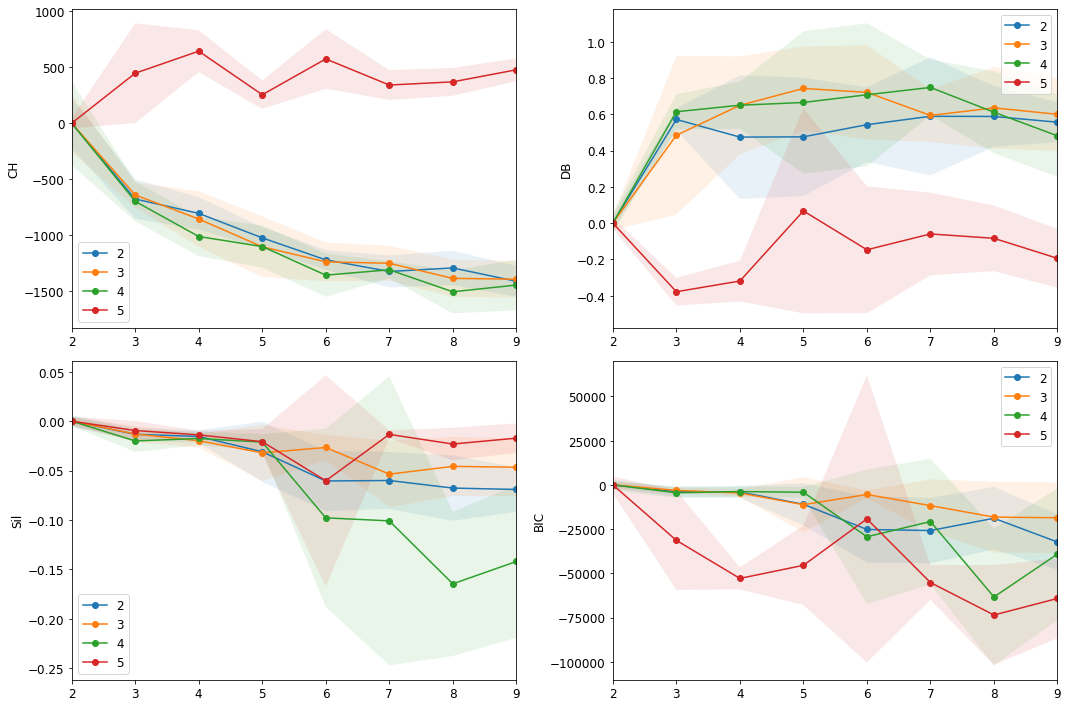

In [170]:
K_gmm = range(2,10,1)

fig, axs = plt.subplots(2, 2, figsize=(15,10)) 
color_cat = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']

for ind, color_ind in zip(range(4), color_cat):    
    std_ch_abs = [abs(x) for x in std_ch_range[ind]]
    y1 = [x + y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    y2 = [x - y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    axs[0][0].plot(K_gmm, mean_ch_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][0].set_ylabel('CH')
    axs[0][0].set_xlim(2,9)
    axs[0][0].legend()
    

    std_db_abs = [abs(x) for x in std_db_range[ind]]
    y1 = [x + y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    y2 = [x - y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    axs[0][1].plot(K_gmm, mean_db_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][1].set_ylabel('DB')
    axs[0][1].set_xlim(2,9)
    axs[0][1].legend()
    

    std_sil_abs = [abs(x) for x in std_sil_range[ind]]
    y1 = [x + y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    y2 = [x - y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    axs[1][0].plot(K_gmm, mean_sil_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][0].set_ylabel('Sil')
    axs[1][0].set_xlim(2,9)
    axs[1][0].legend()
    

    std_bic_abs = [abs(x) for x in std_bic_range[ind]]
    y1 = [x + y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    y2 = [x - y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    axs[1][1].plot(K_gmm, mean_bic_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][1].set_ylabel('BIC')
    axs[1][1].set_xlim(2,9)
    axs[1][1].legend()
    
    
plt.tight_layout()
plt.show()


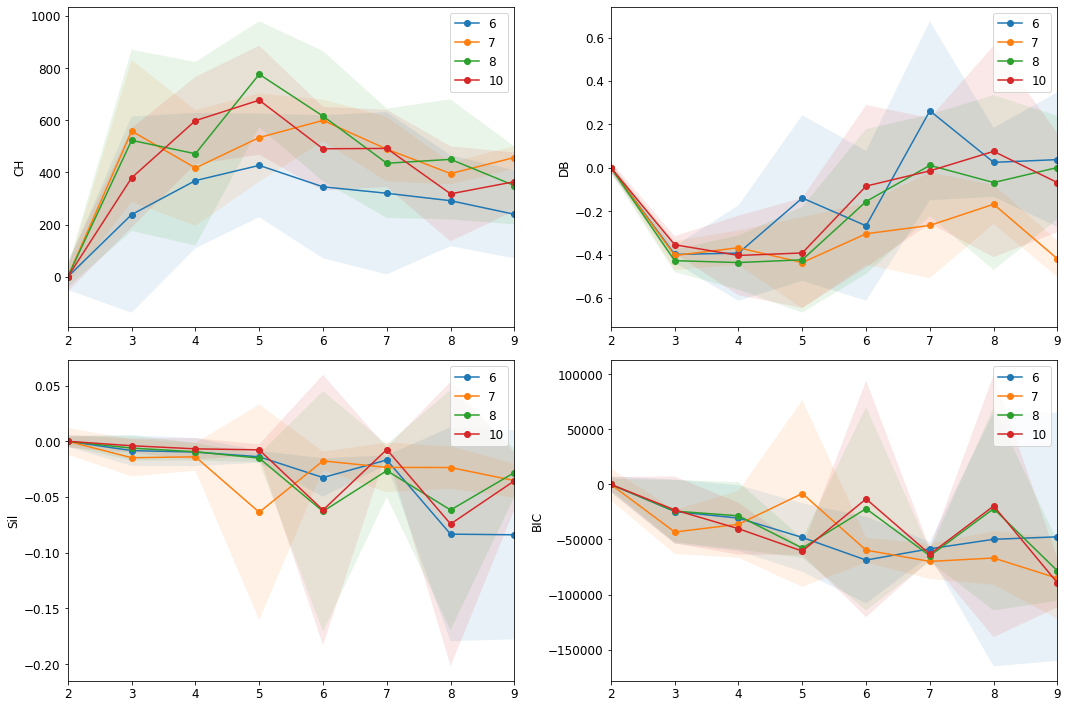

In [171]:
K_gmm = range(2,10,1)

fig, axs = plt.subplots(2, 2, figsize=(15,10)) 
color_cat = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']

for ind, color_ind in zip(range(4,8), color_cat):    
    std_ch_abs = [abs(x) for x in std_ch_range[ind]]
    y1 = [x + y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    y2 = [x - y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    axs[0][0].plot(K_gmm, mean_ch_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][0].set_ylabel('CH')
    axs[0][0].set_xlim(2,9)
    axs[0][0].legend()
    

    std_db_abs = [abs(x) for x in std_db_range[ind]]
    y1 = [x + y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    y2 = [x - y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    axs[0][1].plot(K_gmm, mean_db_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][1].set_ylabel('DB')
    axs[0][1].set_xlim(2,9)
    axs[0][1].legend()
    

    std_sil_abs = [abs(x) for x in std_sil_range[ind]]
    y1 = [x + y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    y2 = [x - y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    axs[1][0].plot(K_gmm, mean_sil_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][0].set_ylabel('Sil')
    axs[1][0].set_xlim(2,9)
    axs[1][0].legend()
    

    std_bic_abs = [abs(x) for x in std_bic_range[ind]]
    y1 = [x + y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    y2 = [x - y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    axs[1][1].plot(K_gmm, mean_bic_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][1].set_ylabel('BIC')
    axs[1][1].set_xlim(2,9)
    axs[1][1].legend()
    
    
plt.tight_layout()
plt.show()


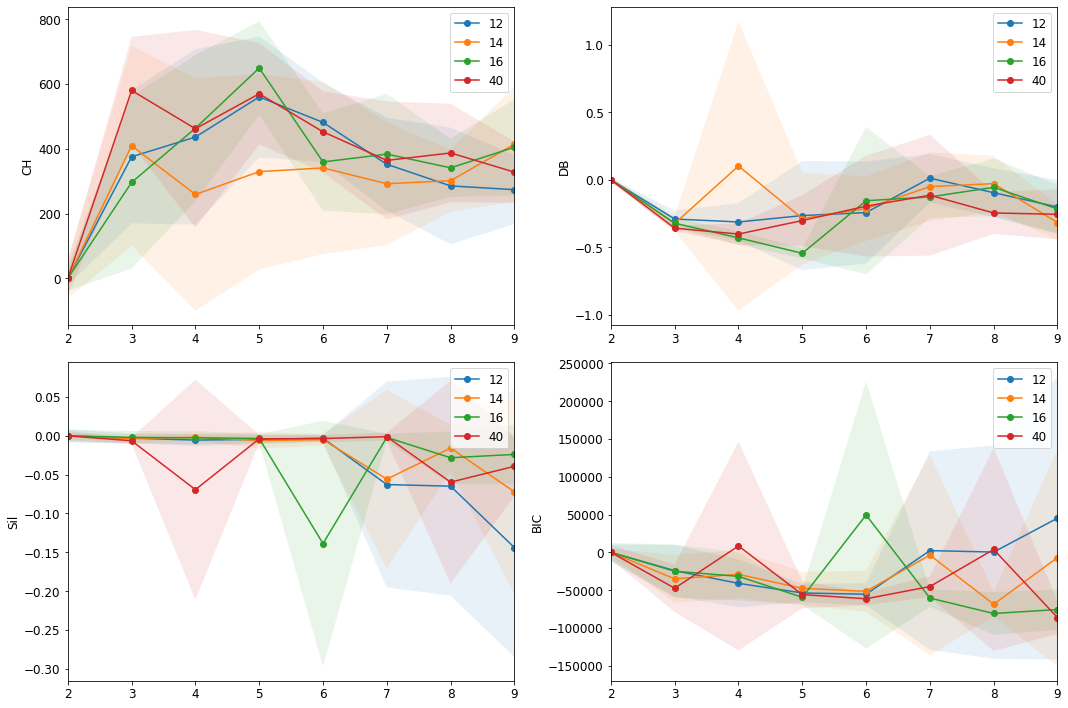

In [172]:

fig, axs = plt.subplots(2, 2, figsize=(15,10)) 
color_cat = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']

for ind, color_ind in zip(range(8,12), color_cat):    
    std_ch_abs = [abs(x) for x in std_ch_range[ind]]
    y1 = [x + y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    y2 = [x - y for x, y in zip(mean_ch_range[ind],std_ch_abs)] 
    axs[0][0].plot(K_gmm, mean_ch_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][0].set_ylabel('CH')
    axs[0][0].set_xlim(2,9)
    axs[0][0].legend()
    

    std_db_abs = [abs(x) for x in std_db_range[ind]]
    y1 = [x + y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    y2 = [x - y for x, y in zip(mean_db_range[ind],std_db_abs)] 
    axs[0][1].plot(K_gmm, mean_db_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[0][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[0][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[0][1].set_ylabel('DB')
    axs[0][1].set_xlim(2,9)
    axs[0][1].legend()
    

    std_sil_abs = [abs(x) for x in std_sil_range[ind]]
    y1 = [x + y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    y2 = [x - y for x, y in zip(mean_sil_range[ind],std_sil_abs)] 
    axs[1][0].plot(K_gmm, mean_sil_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][0].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][0].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][0].set_ylabel('Sil')
    axs[1][0].set_xlim(2,9)
    axs[1][0].legend()
    

    std_bic_abs = [abs(x) for x in std_bic_range[ind]]
    y1 = [x + y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    y2 = [x - y for x, y in zip(mean_bic_range[ind],std_bic_abs)] 
    axs[1][1].plot(K_gmm, mean_bic_range[ind] - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    #axs[1][1].plot(K_gmm, y2 - (y1[0]+y2[0])/2, label = n_category_threshold_range[ind], color = color_ind, marker = 'o')
    axs[1][1].fill_between(K_gmm, y1 - (y1[0]+y2[0])/2, y2 - (y1[0]+y2[0])/2, alpha = 0.1)
    axs[1][1].set_ylabel('BIC')
    axs[1][1].set_xlim(2,9)
   # axs[1][1].set_ylim(-0.5*1e6,1*1e6)
    axs[1][1].legend()
    
    
plt.tight_layout()
plt.show()


The metrics for clustering is clearly different from those for the main-cluster analysis. 

The trend is more or less robust for n_cateogry_threshold >= 5, though we still see large standard deviations (shaded area) for some cluster numbers:
- The CH value is usually maximum at k = 3 or 5
- the DB score is smallest for k = 3 - 5 
- the BIC information is small usually for k = 3 or 5, but seem to continue to decrease 
- The Silhouette score remains high until it starts to decrease at k about 6 or 7

So it seems that cluster number k of 3 or 5 are good choices. 

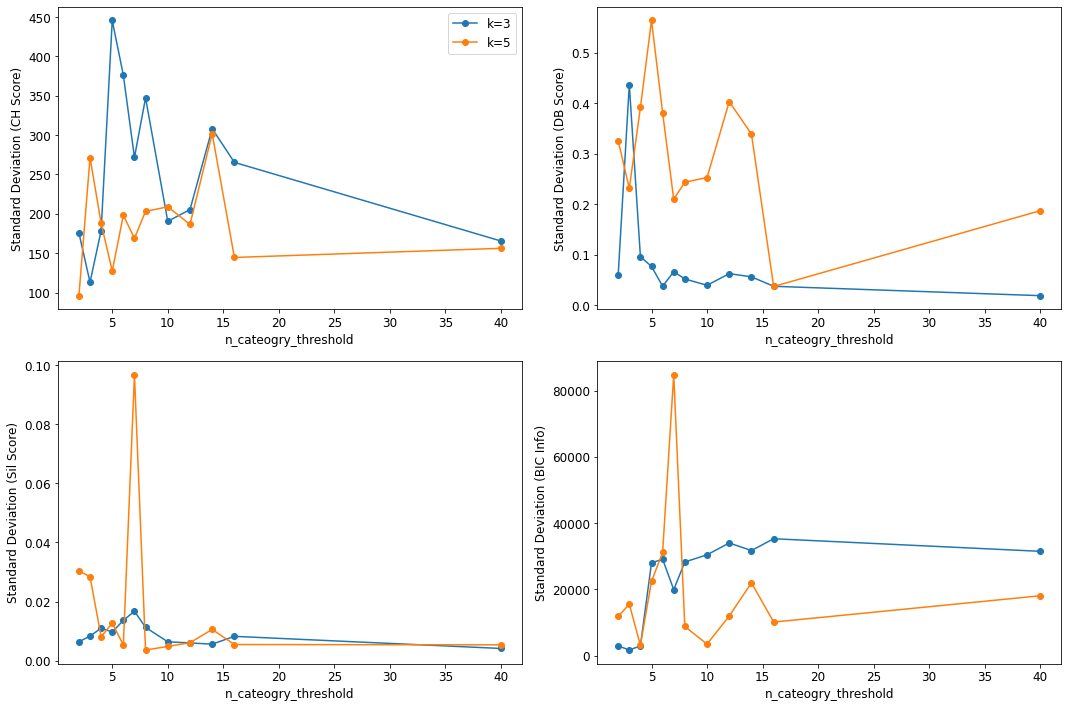

In [179]:
# scan for k = 3
fig, axs = plt.subplots(2, 2, figsize=(15,10)) 

std_kfix_ch, std_kfix_db,std_kfix_sil,std_kfix_bic = [],[],[],[]
for ind in range(12):
    std_kfix_ch.append(std_ch_range[ind][1])
    std_kfix_db.append(std_db_range[ind][1])
    std_kfix_sil.append(std_sil_range[ind][1])
    std_kfix_bic.append(std_bic_range[ind][1])

axs[0][0].plot(n_category_threshold_range, std_kfix_ch, marker = 'o', label = 'k=3')
axs[0][1].plot(n_category_threshold_range, std_kfix_db, marker = 'o')
axs[1][0].plot(n_category_threshold_range, std_kfix_sil, marker = 'o')
axs[1][1].plot(n_category_threshold_range, std_kfix_bic, marker = 'o')

#k = 5
std_kfix_ch, std_kfix_db,std_kfix_sil,std_kfix_bic = [],[],[],[]
for ind in range(12):
    std_kfix_ch.append(std_ch_range[ind][3])
    std_kfix_db.append(std_db_range[ind][3])
    std_kfix_sil.append(std_sil_range[ind][3])
    std_kfix_bic.append(std_bic_range[ind][3])

axs[0][0].plot(n_category_threshold_range, std_kfix_ch, marker = 'o',label = 'k=5')
axs[0][1].plot(n_category_threshold_range, std_kfix_db, marker = 'o')
axs[1][0].plot(n_category_threshold_range, std_kfix_sil, marker = 'o')
axs[1][1].plot(n_category_threshold_range, std_kfix_bic, marker = 'o')
axs[0][0].legend()

# add title and axis 
axs[0][0].set_ylabel('Standard Deviation (CH Score)')
axs[0][0].set_xlabel('n_cateogry_threshold')
axs[0][1].set_ylabel('Standard Deviation (DB Score)')
axs[0][1].set_xlabel('n_cateogry_threshold')
axs[1][0].set_ylabel('Standard Deviation (Sil Score)')
axs[1][0].set_xlabel('n_cateogry_threshold')
axs[1][1].set_ylabel('Standard Deviation (BIC Info)')
axs[1][1].set_xlabel('n_cateogry_threshold')

plt.tight_layout()
plt.show()

We plot the standard deviation of scores for different cluster number k, as a function of n_category_threshold. We see that when n_category_threshold = 16, we obtain usually one of the smallest standard deviations when k = 5. 

So we select the pipeline parameter with n_category_threshold = 16 and cluster number of 5, for the sub-cluster analysis below. 

In [467]:
version = 1
# save optimization stats in csv file
for cat_ind in range(12):
    ch_temp = pd.DataFrame(data = ch_score_gmm_range[cat_ind], columns = K_gmm)
    file_name_ch = 'cv/ch_score_subcluster_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    ch_temp.to_csv(file_name_ch)
    
    
    db_temp = pd.DataFrame(data = db_score_gmm_range[cat_ind], columns = K_gmm)
    file_name_db = 'cv/db_score_subcluster_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    db_temp.to_csv(file_name_db)
    
    sil_temp = pd.DataFrame(data = sil_score_gmm_range[cat_ind], columns = K_gmm)
    file_name_sil = 'cv/sil_score_subcluster_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    sil_temp.to_csv(file_name_sil)
    
    bic_temp = pd.DataFrame(data = bic_info_gmm_range[cat_ind], columns = K_gmm)
    file_name_bic = 'cv/bic_score_subcluster_ncat='+str(n_category_threshold_range[cat_ind])+'_v'+str(version)+'.csv'
    bic_temp.to_csv(file_name_bic)
    
    

### Interpret Reduced Features and Customer Segments

In [228]:
scalar_choice =  [MinMaxScaler(),StandardScaler() ]
select_main_cluster = 0 #NOT main-cluster
mailout = 0 #NOT mailout
target_variance = 0.95
na_row_threshold = 0.6


na_col_threshold = 0.6
skewedness_threshold = 0.2
skew_select = 1
na_low_frac = 0.15
na_high_frac  = 0.95

verbose_print_out = 2
df_cleaned, df_scaled, df_pca, \
d19_letzer_dict, rows_na, columns_na, fill_na_cols_cat, drop_na_cols_cat, \
column_encode, column_remain, column_binary, prefix_list_encode, df_column_names, \
col_name_likely_rank, col_name_likely_normal, rank_scaler, numeric_scaler,\
pca_fitted, fitted_n_components = df_clean_scale_pca(customers,select_main_cluster,na_row_threshold, na_col_threshold,
   skewedness_threshold, skew_select, na_low_frac, na_high_frac, 16,
  9, scalar_choice, mailout, 0.95, verbose_print_out)

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=5, covariance_type='full', max_iter = 1000)
clf.fit(df_pca)

Finished step 1 of cleaning
Processed 0.26046167011040844 rows with higher than 0.6 NA fraction
Dropped 275 columns with higher than 0.6 NA fraction
Finished step 3a of cleaning - filling NA for 94 numerical columns
Finished step 3b of cleaning - Encoded 15 columns, dropped 0 columns and found 2 binary columns
Columns we have not processed: 
['PRODUCT_GROUP', 'ONLINE_PURCHASE', 'CUSTOMER_GROUP', 'LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Processed dataset in 26.58017063140869 seconds


GaussianMixture(max_iter=1000, n_components=5)

We find that, surprisingly, many of the customers in this sub-cluster are identical after scaling. It turns out that, in the original customers dataset, when we sub-set the sub-clsuter and look at attributes we have retained the customers' attributes are almost identical. These rows of course created the largest cluster in the 5 clusters we labeled.

In [264]:
test_cols = list(customers.columns.copy())
test_cols.remove('LNR')
print('Fraction of customers in sub-cluster with identifical attributes')
print(customers.loc[rows_na,test_cols ].duplicated().sum()/len(rows_na))

Fraction of customers in sub-cluster with identifical attributes
0.8204254978164189


We go on to interpret the cumulative explained ratio, take a look at the clusters in reduced-feature space and what the importance PCA components mean.

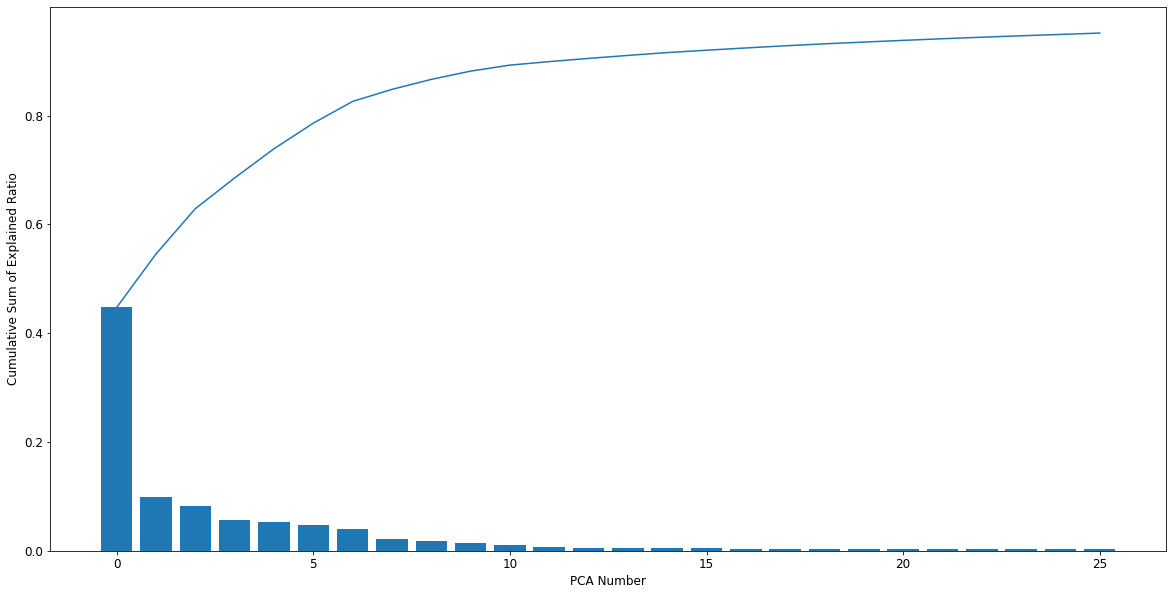

In [265]:
plt.figure(figsize=[20,10])

plt.plot(range(df_pca.shape[1]), np.cumsum(pca_fitted.explained_variance_ratio_))
plt.bar(range(df_pca.shape[1]), pca_fitted.explained_variance_ratio_)

plt.xlabel('PCA Number')
plt.ylabel('Cumulative Sum of Explained Ratio')
plt.show()

 We plot below a scatter plot of top 3 PCA values with maximum difference between clusters, and visualize the 5 clusters.

In [271]:
diff_n = np.zeros(df_pca.shape[1])
for n in range(df_pca.shape[1]):
    
    diff_list = []
    for i in range(5):
        for j in range(5):
            diff_list.append(abs(clf.means_[i][n] - clf.means_[j][n]))
    
    diff_n[n] = max(diff_list)

n_top = 5
diff_top = diff_n[np.argsort(-abs(diff_n))[0:n_top]]
pca_n = np.array(range(df_pca.shape[1]))
diff_top_PCA = pca_n[np.argsort(-abs(diff_n))[0:n_top]]

print('The top {} PCA components with max difference between clusters are:'.format(n_top))
print(diff_top_PCA)

The top 5 PCA components with max difference between clusters are:
[0 1 2 3 4]


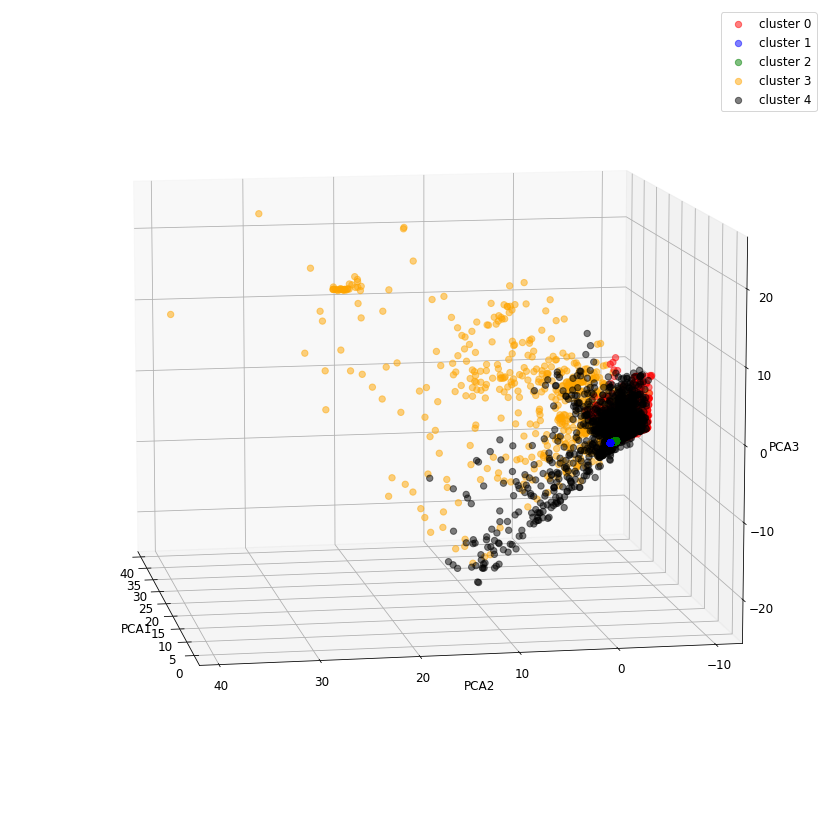

In [277]:
ind_1 = diff_top_PCA[0]
ind_2 = diff_top_PCA[1]
ind_3 = diff_top_PCA[2]

PCA1 = df_pca[:,ind_1]
PCA2 = df_pca[:,ind_2]
PCA3 = df_pca[:,ind_3]
labels = clf.predict(df_pca)

fig = plt.figure(figsize = [15,15])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA1[labels==0], PCA2[labels==0],PCA3[labels == 0], c='red',s=40, alpha = 0.5, label = 'cluster 0')
ax.scatter(PCA1[labels==1], PCA2[labels==1],PCA3[labels == 1],c='blue',s=40, alpha = 0.5, label = 'cluster 1')
ax.scatter(PCA1[labels==2], PCA2[labels==2],PCA3[labels == 2],c='green',s=40, alpha = 0.5, label = 'cluster 2')
ax.scatter(PCA1[labels==3], PCA2[labels==3],PCA3[labels == 3],c='orange',s=40, alpha = 0.5, label = 'cluster 3')
ax.scatter(PCA1[labels==4], PCA2[labels==4],PCA3[labels == 4],c='black',s=40, alpha = 0.5, label = 'cluster 4')


ax.set_xlabel('PCA'+str(ind_1+1))
ax.set_ylabel('PCA'+str(ind_2+1))
ax.set_zlabel('PCA'+str(ind_3+1))
ax.legend()
ax.view_init(elev=10, azim=170)

plt.show()

It's clear from the plot that cluster 1 and 2 (blue and green on the plot) actually is quite small in the reduced feature space. The other 3 clusters (cluster 0, 3 and 4) are much more spread. Cluster labeled 1 and 2 actually account for almost all samples in this sub-cluster, consistent with our observation previously that many different customers with same profile exist in this sub-cluster. This is possibly due to the fact that many values are missing in these data points.

In [278]:
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([ 1222, 40964,  5632,   761,  1339], dtype=int64))

We further look at the different weights of the parameters in each of the PCA components.The y-axis shows the columns in the dataframe, while the x-axis shows the top 10 PCA components. The color shows the weight of each column (aka data attribute) in each PCA component. The brightest areas on the plot are more towards top of the heatmap, suggesting that the first 50 data attributes in the dataset are more important.

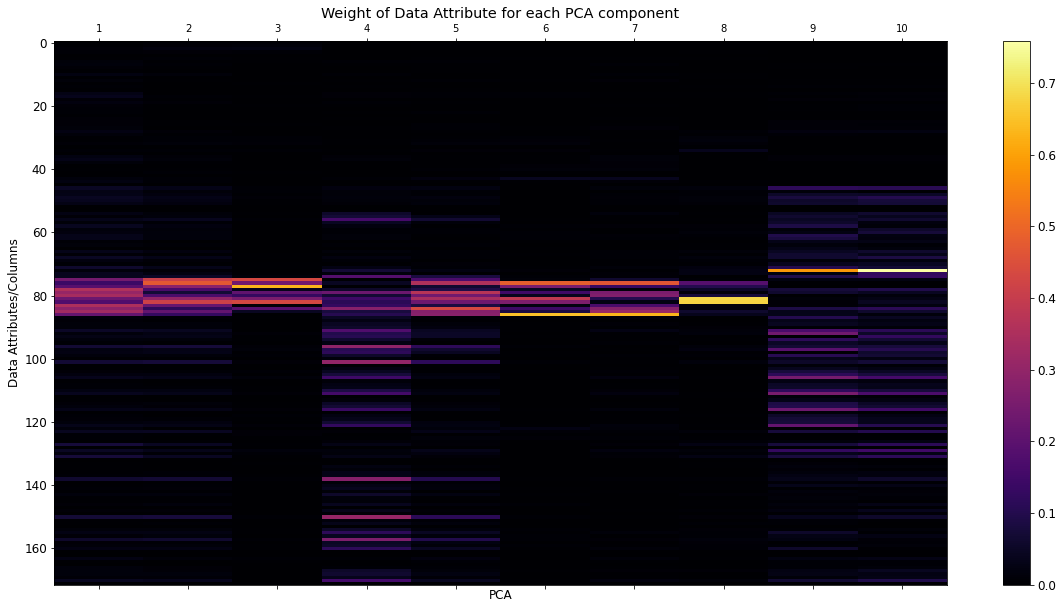

In [280]:
pca_components = pca_fitted.components_
n = 10
x_ticks = [str(i) for i in range(1,n+1)]
fig2,ax2=plt.subplots(figsize=(n*2,10))
cax = ax2.matshow(abs(pca_components[0:n,:].transpose()),cmap = 'inferno', aspect="auto")
plt.xticks(range(0,n),x_ticks,fontsize=10)
plt.colorbar(cax)
plt.xlabel('PCA')
plt.ylabel('Data Attributes/Columns')
plt.title('Weight of Data Attribute for each PCA component')
plt.show()# 

In [282]:
df_scaled.columns[70:90]

Index(['SEMIO_TRADV', 'SEMIO_VERT', 'ANREDE_KZ', 'ALTERSKATEGORIE_GROB',
       'CJT_GESAMTTYP_Advertising', 'D19_BANKEN_DATUM',
       'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM',
       'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM',
       'D19_GESAMT_ONLINE_DATUM', 'D19_TELKO_DATUM', 'D19_TELKO_OFFLINE_DATUM',
       'D19_VERSAND_DATUM', 'D19_VERSAND_OFFLINE_DATUM',
       'D19_VERSAND_ONLINE_DATUM', 'D19_VERSI_DATUM', 'CJT_KATALOGNUTZER_1',
       'CJT_KATALOGNUTZER_2', 'CJT_KATALOGNUTZER_3'],
      dtype='object')

For almost all components, the 70th-90th attributes are heavily weighted, as seen by the bright color in the plot. These are attributes primarily related to D19 columns. 

We can dig deeper into what each PCA component constitutes of. We select the top 30 data attributes by weight, for PCA component 1. A larger PCA component 1 indicates:

- recent actuality of purchases in many categories such as TOTAL POOL MAIL-ORDER, BANKING, TELECOMMUNICATIONS across both online and offline channels

- financial type: less likely to be 'be prepared' type

- Other columns are of less importance, but relate to financial type, personalities primarily



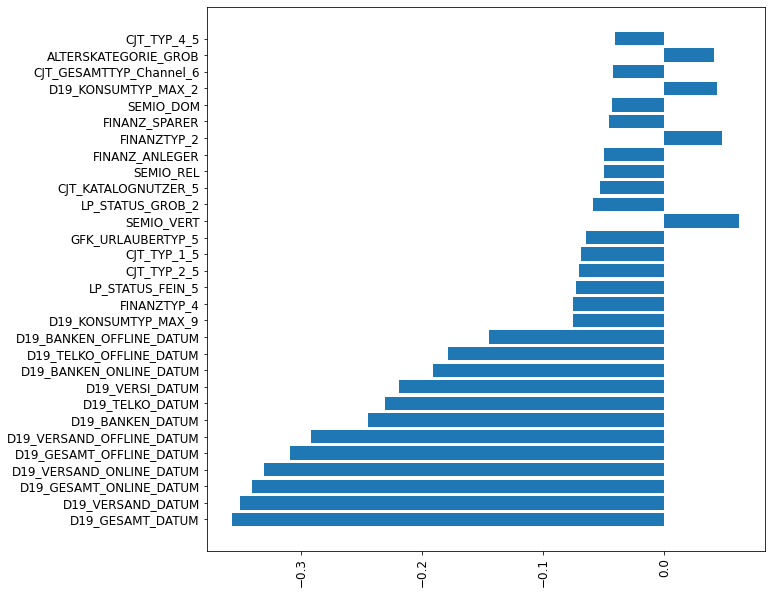

In [283]:
weights_pca1 = pca_components[0,:].transpose()
n_top = 30
weights_pca1_top = weights_pca1[np.argsort(-abs(weights_pca1))[0:n_top]]
weights_pca1_features = df_scaled.columns[np.argsort(-abs(weights_pca1))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pca1_features,weights_pca1_top)
plt.xticks(rotation = 'vertical')
plt.show()

The 2nd and 3rd PCA components also explain mostly about actuality of recent transactions in cateogories. Higher PCA2 value means

- higher activity in offline and total telecomm, offline and online banking
- lower activity in mail-order and total pool segement

Higher PCA3 value means

- lower activity in online banking, total and mail-order segments
- higher activity in  offline banking, telecomm, total and mail-order segements

PCA3 values seems to indicate a substitution effect between online and offline channels.

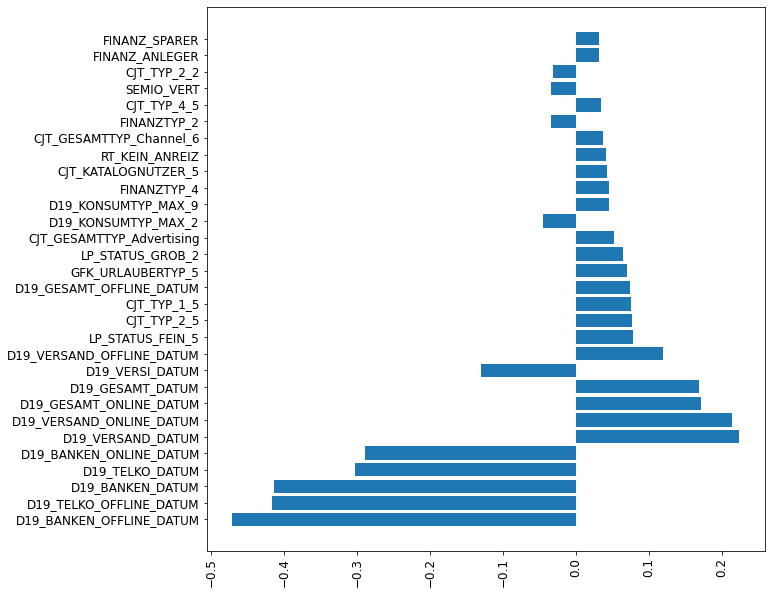

In [285]:
weights_pca2 = pca_components[1,:].transpose()
n_top = 30
weights_pca2_top = weights_pca2[np.argsort(-abs(weights_pca2))[0:n_top]]
weights_pca2_features = df_scaled.columns[np.argsort(-abs(weights_pca2))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pca2_features,weights_pca2_top)
plt.xticks(rotation = 'vertical')
plt.show()

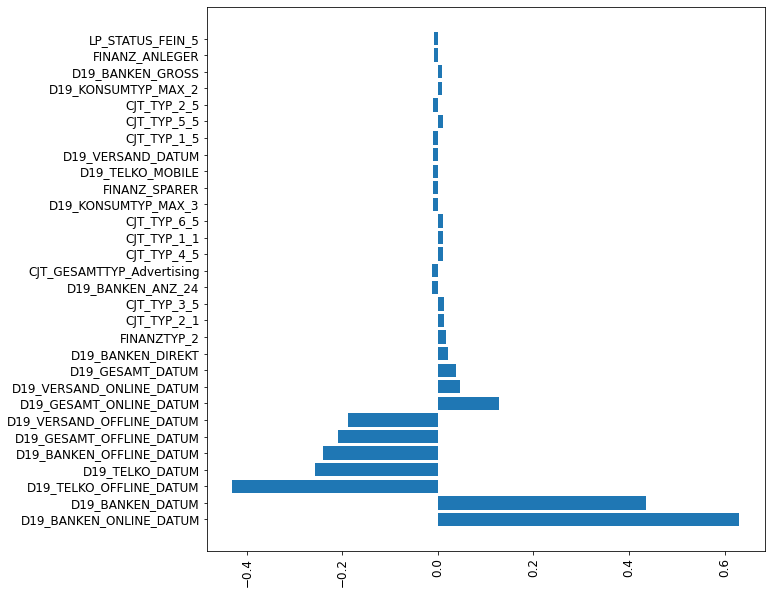

In [287]:
weights_pca3 = pca_components[2,:].transpose()
n_top = 30
weights_pca3_top = weights_pca3[np.argsort(-abs(weights_pca3))[0:n_top]]
weights_pca3_features = df_scaled.columns[np.argsort(-abs(weights_pca3))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pca3_features,weights_pca3_top)
plt.xticks(rotation = 'vertical')
plt.show()

The 4th PCA component, unlike previous components that describe transaction activity, now describe about life status and consumption type primarily. Higher PCA4 means:

- CJ_TYP desriptions are missing in the Excel sheets. 
- more interest in advertising from CJT_GESAMTTYP attributes
- more likely to be minimalist aveareg to high income earners from LP STATUS attributes

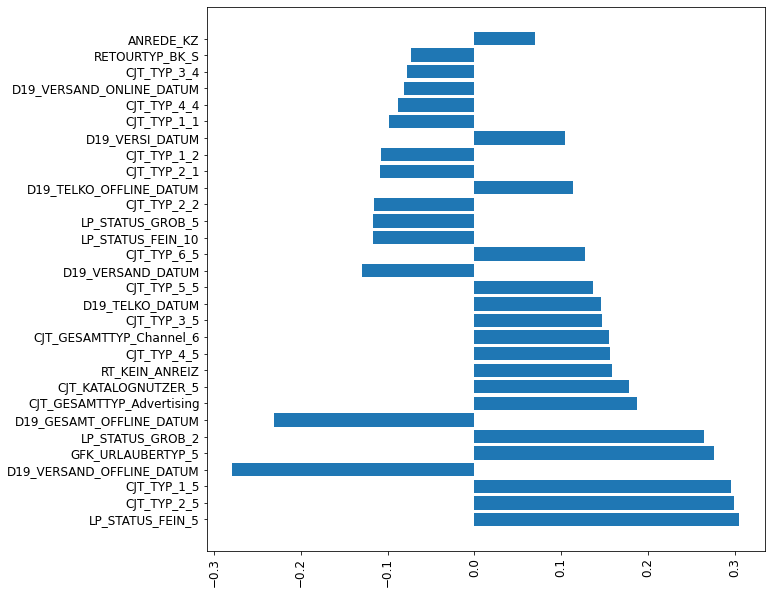

In [288]:
weights_pca4 = pca_components[3,:].transpose()
n_top = 30
weights_pca4_top = weights_pca4[np.argsort(-abs(weights_pca4))[0:n_top]]
weights_pca4_features = df_scaled.columns[np.argsort(-abs(weights_pca4))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pca4_features,weights_pca4_top)
plt.xticks(rotation = 'vertical')
plt.show()

Below is a bar plot of the fraction of each cluster in the SUB-CLUSTER of the customers dataset. Note that the sub-cluster accounts for about 26% of total customers. 

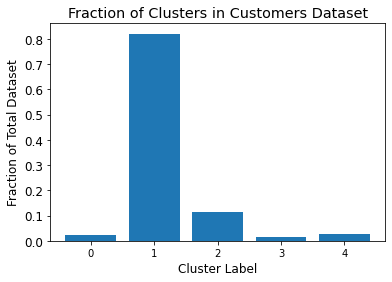

In [289]:
labels = clf.predict(df_pca)

# count how many are with a certain label
unique_labels, counts_labels = np.unique(labels, return_counts=True)

plt.bar(unique_labels, counts_labels/sum(counts_labels))
plt.xlabel('Cluster Label')
plt.ylabel('Fraction of Total Dataset')
plt.title('Fraction of Clusters in Customers Dataset')
plt.xticks(range(0,len(unique_labels)),unique_labels,fontsize=10)
plt.show()

In [292]:
print('Fraction of customers in sub-cluster analysis')
print(df_cleaned.shape[0]/customers.shape[0])

Fraction of customers in sub-cluster analysis
0.26046167011040844


### 2.4.b Inverse Transform Pipeline

In this section, we go on to map the reduced features and clusters back to demographic information.

In [293]:
for cluster_n in range(0,len(unique_labels)):
    center_cluster = clf.means_[cluster_n]
    
    # inverse transform via PCA
    inverse_transformed_X = pca_fitted.inverse_transform(center_cluster)
   
    # inverse scale
    df_cleaned_cluster, column_names_total = df_inverse_scale_population(df_scaled, inverse_transformed_X,
                                                                         col_name_likely_rank, 
                                                                         col_name_likely_normal, 
                                                                         rank_scaler,numeric_scaler)
    n_dim = df_cleaned_cluster.shape[0]
    
    if cluster_n == 0:
        df_cleaned_clusters = df_cleaned_cluster
    elif cluster_n == 1:
        df_cleaned_clusters = np.stack((df_cleaned_clusters,df_cleaned_cluster ))
    else:
        df_cleaned_cluster = np.reshape(df_cleaned_cluster, (-1, n_dim))
        df_cleaned_clusters = np.concatenate((df_cleaned_clusters, df_cleaned_cluster), axis = 0)

In [294]:
df_cleaned_clusters = pd.DataFrame(data = df_cleaned_clusters, columns = column_names_total)

# re-order columns
df_cleaned_attributes = df_cleaned.drop(columns = ['LNR','PRODUCT_GROUP','CUSTOMER_GROUP','ONLINE_PURCHASE'])

# re-order column names so it's same as cleaned dataframe
df_cleaned_clusters = df_cleaned_clusters[df_cleaned_attributes.columns]
df_cleaned_clusters.head()

D19_BANKEN_ANZ_12  D19_BANKEN_ANZ_24  D19_BANKEN_DATUM  D19_BANKEN_DIREKT  \
0          -0.042585          -0.038860          9.954114           7.960022   
1          -0.000077          -0.000102          9.999973           7.999980   
2           0.000311           0.001899         10.000027           7.994783   
3           0.335778           0.537376          7.982375           7.078768   
4           0.144456           0.252633          9.127506           7.271624   

   D19_BANKEN_GROSS  D19_BANKEN_LOKAL  D19_BANKEN_OFFLINE_DATUM  \
0          7.971065          7.973044                  9.999643   
1          8.000114          8.000098                 10.000005   
2          7.994309          7.998366                  9.999991   
3          7.087500          7.785829                  9.276158   
4          7.675152          7.944173                 10.000331   

   D19_BANKEN_ONLINE_DATUM  D19_BANKEN_REST  D19_BEKLEIDUNG_GEH  ...  \
0                10.006127         7.952693            7.393474  ...   
1                10.000047         7.999689            8.000143  ...   
2                 9.999180         8.001694            8.003813  ...   
3                 9.266716         7.351440            6.954161  ...   
4                 9.122554         7.763359            7.187661  ...   

   ZABEOTYP_2  ZABEOTYP_3  ZABEOTYP_4  ZABEOTYP_5  ZABEOTYP_6  \
0    0.002703    0.861321    0.005396   -0.001183    0.126953   
1    0.000032    0.999720   -0.000033    0.000339   -0.000126   
2   -0.000294    0.990934    0.002695    0.002328    0.004715   
3    0.009305    0.642258    0.056036    0.029994    0.247849   
4    0.004449    0.697984    0.052139    0.032510    0.201393   

   CJT_GESAMTTYP_Channel_3  CJT_GESAMTTYP_Channel_4  CJT_GESAMTTYP_Channel_5  \
0                 0.099642                 0.182892                 0.101164   
1                -0.000302                -0.001502                 0.001686   
2                 0.166217                 0.204501                 0.112822   
3                 0.199868                 0.226938                 0.135014   
4                 0.168181                 0.193831                 0.130747   

   CJT_GESAMTTYP_Channel_6  WOHNLAGE_Rural_0  
0                 0.616302               1.0  
1                 1.000117               1.0  
2                 0.516460               1.0  
3                 0.438180               1.0  
4                 0.507241               1.0  

[5 rows x 172 columns]

### 2.4.c. Interpreting Customer Segments

Given these cluster centers, we can infer the typical customer profile in each segment. We first calculate the weighed cluster centers and standard deviations. The standard deviation and means are weighed by the number of labels in each segment. 

In order to highlight the attributes of a segment that are most different from the average attributes, we select the attributes that deviate most from the weighed mean of clusters. For each segment, we choose a deviation threshold above which there are only a few outstanding attributes.

Below we can see the typical profile of customers in segment 0. 

In [295]:
std_df_cleaned_attributes = df_cleaned_attributes.std(axis = 0)
avg_df_cleaned_attributes = df_cleaned_attributes.mean(axis = 0)


In [299]:
select = 0

num_cols_range = []
threshold_range = np.arange(0,3,0.05)
for threshold in threshold_range:

    num_cols = (df_cleaned_clusters.loc[select] > (avg_df_cleaned_attributes + threshold*std_df_cleaned_attributes)).sum() + \
    (df_cleaned_clusters.loc[select] < (avg_df_cleaned_attributes - threshold*std_df_cleaned_attributes)).sum()
    #print('{} threshold result in {} cols'.format(threshold, num_cols))
    num_cols_range.append(num_cols)
   

num_cols_range = [abs(x-10) for x in num_cols_range]
optimal_threshold = threshold_range[num_cols_range.index(min(num_cols_range))]
print('The threshold that give closest to 10 columns is '+str(optimal_threshold))

threshold = optimal_threshold
cluster_select_center = []
cluster_select_col = []
for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    std_away = (df_cleaned_clusters.loc[select, col] - avg_df_cleaned_attributes[ind])/std_df_cleaned_attributes[ind]
    
    
    if df_cleaned_clusters.loc[select, col] > avg_df_cleaned_attributes[ind] + threshold *std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is high with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)
    elif df_cleaned_clusters.loc[select, col] < avg_df_cleaned_attributes[ind] -threshold*std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is low with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)

print('-'*40)
print('Output cluster centers')
for col, cluster_center in zip(cluster_select_col, cluster_select_center):
    avg_value = avg_df_cleaned_attributes.loc[col]
    print('for cluster {}: columns {} is centered at {} while average value is {}'.format(select, col, cluster_center, avg_value))
    
    
cluster_select_col_0 = set(cluster_select_col)

The threshold that give closest to 10 columns is 2.7
for cluster 0: column FINANZ_ANLEGER is low with -3.7977452541372188 std away from mean 
for cluster 0: column FINANZ_MINIMALIST is high with 3.6326417584853825 std away from mean 
for cluster 0: column FINANZ_SPARER is low with -3.8952471395740536 std away from mean 
for cluster 0: column FINANZ_UNAUFFAELLIGER is low with -3.709823349953098 std away from mean 
for cluster 0: column FINANZ_VORSORGER is high with 3.8256192783085265 std away from mean 
for cluster 0: column SEMIO_PFLICHT is low with -3.6569834811152595 std away from mean 
for cluster 0: column SEMIO_REL is low with -3.560738630633239 std away from mean 
for cluster 0: column SEMIO_VERT is high with 3.42585144671045 std away from mean 
for cluster 0: column D19_KONSUMTYP_MAX_2 is high with 3.5385889534475643 std away from mean 
for cluster 0: column D19_KONSUMTYP_MAX_9 is low with -3.587094996447234 std away from mean 
for cluster 0: column FINANZTYP_2 is high with 3.78

C:\Users\Dennis\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


We look at the most outstanding attributes for customers in each segment. 

In [301]:
select = 1

num_cols_range = []
threshold_range = np.arange(0,3,0.05)
for threshold in threshold_range:

    num_cols = (df_cleaned_clusters.loc[select] > (avg_df_cleaned_attributes + threshold*std_df_cleaned_attributes)).sum() + \
    (df_cleaned_clusters.loc[select] < (avg_df_cleaned_attributes - threshold*std_df_cleaned_attributes)).sum()
    #print('{} threshold result in {} cols'.format(threshold, num_cols))
    num_cols_range.append(num_cols)
   

num_cols_range = [abs(x-10) for x in num_cols_range]
optimal_threshold = threshold_range[num_cols_range.index(min(num_cols_range))]
print('The threshold that give closest to 10 columns is '+str(optimal_threshold))

threshold = optimal_threshold
cluster_select_center = []
cluster_select_col = []
for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    std_away = (df_cleaned_clusters.loc[select, col] - avg_df_cleaned_attributes[ind])/std_df_cleaned_attributes[ind]
    
    
    if df_cleaned_clusters.loc[select, col] > avg_df_cleaned_attributes[ind] + threshold *std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is high with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)
    elif df_cleaned_clusters.loc[select, col] < avg_df_cleaned_attributes[ind] -threshold*std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is low with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)

print('-'*40)
print('Output cluster centers')
for col, cluster_center in zip(cluster_select_col, cluster_select_center):
    avg_value = avg_df_cleaned_attributes.loc[col]
    print('for cluster {}: columns {} is centered at {} while average value is {}'.format(select, col, cluster_center, avg_value))
    
    
cluster_select_col_1 = set(cluster_select_col)

The threshold that give closest to 10 columns is 0.30000000000000004
for cluster 1: column RT_KEIN_ANREIZ is high with 0.39618417153670804 std away from mean 
for cluster 1: column CJT_GESAMTTYP_Advertising is high with 0.38425363133793594 std away from mean 
for cluster 1: column CJT_KATALOGNUTZER_5 is high with 0.33214915045171706 std away from mean 
for cluster 1: column CJT_TYP_1_5 is high with 0.45043036420413746 std away from mean 
for cluster 1: column CJT_TYP_2_5 is high with 0.45418613418145454 std away from mean 
for cluster 1: column GFK_URLAUBERTYP_5 is high with 0.4362843292961658 std away from mean 
for cluster 1: column LP_STATUS_FEIN_5 is high with 0.4581568638337752 std away from mean 
for cluster 1: column LP_STATUS_GROB_2 is high with 0.4107931585000858 std away from mean 
for cluster 1: column CJT_GESAMTTYP_Channel_6 is high with 0.3064569064257617 std away from mean 
----------------------------------------
Output cluster centers
for cluster 1: columns RT_KEIN_ANRE

C:\Users\Dennis\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [302]:
select = 2

num_cols_range = []
for threshold in np.arange(0,3,0.1):

    num_cols = (df_cleaned_clusters.loc[select] > (avg_df_cleaned_attributes + threshold*std_df_cleaned_attributes)).sum() + \
    (df_cleaned_clusters.loc[select] < (avg_df_cleaned_attributes - threshold*std_df_cleaned_attributes)).sum()
    #print('{} threshold result in {} cols'.format(threshold, num_cols))
    num_cols_range.append(num_cols)
    
num_cols_range = [abs(x-10) for x in num_cols_range]
optimal_threshold = np.arange(0,3,0.1)[num_cols_range.index(min(num_cols_range))]
print('The threshold that give closest to 10 columns is '+str(optimal_threshold))

threshold = optimal_threshold
cluster_select_center = []
cluster_select_col = []
for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    std_away = (df_cleaned_clusters.loc[select, col] - avg_df_cleaned_attributes[ind])/std_df_cleaned_attributes[ind]
    
    
    if df_cleaned_clusters.loc[select, col] > avg_df_cleaned_attributes[ind] + threshold *std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is high with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)
    elif df_cleaned_clusters.loc[select, col] < avg_df_cleaned_attributes[ind] -threshold*std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is low with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)

print('-'*40)
print('Output cluster centers')
for col, cluster_center in zip(cluster_select_col, cluster_select_center):
    avg_value = avg_df_cleaned_attributes.loc[col]
    print('for cluster {}: columns {} is centered at {} while average value is {}'.format(select, col, cluster_center, avg_value))
    
    
cluster_select_col_2 = set(cluster_select_col)

The threshold that give closest to 10 columns is 1.4000000000000001
for cluster 2: column RT_KEIN_ANREIZ is low with -1.885320730600504 std away from mean 
for cluster 2: column CJT_GESAMTTYP_Advertising is low with -1.778629856297829 std away from mean 
for cluster 2: column CJT_KATALOGNUTZER_5 is low with -1.585338567252193 std away from mean 
for cluster 2: column CJT_TYP_1_5 is low with -2.094186411956755 std away from mean 
for cluster 2: column CJT_TYP_2_5 is low with -2.101912083055641 std away from mean 
for cluster 2: column GFK_URLAUBERTYP_5 is low with -2.026786982000376 std away from mean 
for cluster 2: column LP_STATUS_FEIN_5 is low with -2.1131936897549934 std away from mean 
for cluster 2: column LP_STATUS_GROB_2 is low with -1.9979556505582854 std away from mean 
for cluster 2: column CJT_GESAMTTYP_Channel_6 is low with -1.4219069095766557 std away from mean 
----------------------------------------
Output cluster centers
for cluster 2: columns RT_KEIN_ANREIZ is center

C:\Users\Dennis\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [303]:
select = 3

num_cols_range = []
for threshold in np.arange(0,4,0.1):

    num_cols = (df_cleaned_clusters.loc[select] > (avg_df_cleaned_attributes + threshold*std_df_cleaned_attributes)).sum() + \
    (df_cleaned_clusters.loc[select] < (avg_df_cleaned_attributes - threshold*std_df_cleaned_attributes)).sum()
    #print('{} threshold result in {} cols'.format(threshold, num_cols))
    num_cols_range.append(num_cols)
    
num_cols_range = [abs(x-10) for x in num_cols_range]
optimal_threshold = np.arange(0,4,0.1)[num_cols_range.index(min(num_cols_range))]
print('The threshold that give closest to 10 columns is '+str(optimal_threshold))

threshold = optimal_threshold
cluster_select_center = []
cluster_select_col = []
for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    std_away = (df_cleaned_clusters.loc[select, col] - avg_df_cleaned_attributes[ind])/std_df_cleaned_attributes[ind]
    
    
    if df_cleaned_clusters.loc[select, col] > avg_df_cleaned_attributes[ind] + threshold *std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is high with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)
    elif df_cleaned_clusters.loc[select, col] < avg_df_cleaned_attributes[ind] -threshold*std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is low with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)

print('-'*40)
print('Output cluster centers')
for col, cluster_center in zip(cluster_select_col, cluster_select_center):
    avg_value = avg_df_cleaned_attributes.loc[col]
    print('for cluster {}: columns {} is centered at {} while average value is {}'.format(select, col, cluster_center, avg_value))
    
    
cluster_select_col_3 = set(cluster_select_col)

The threshold that give closest to 10 columns is 3.8000000000000003
for cluster 3: column D19_BANKEN_DATUM is low with -3.8158905014596334 std away from mean 
for cluster 3: column D19_GESAMT_ANZ_12 is high with 4.159148445731909 std away from mean 
for cluster 3: column D19_GESAMT_ANZ_24 is high with 4.303274111489009 std away from mean 
for cluster 3: column D19_GESAMT_DATUM is low with -4.2768657319923165 std away from mean 
for cluster 3: column D19_GESAMT_OFFLINE_DATUM is low with -4.393106296268127 std away from mean 
for cluster 3: column D19_SONSTIGE is low with -3.879719860342699 std away from mean 
for cluster 3: column D19_TELKO_DATUM is low with -3.942186298478499 std away from mean 
for cluster 3: column D19_TELKO_MOBILE is low with -3.963630018734265 std away from mean 
for cluster 3: column D19_TELKO_OFFLINE_DATUM is low with -4.36866895493772 std away from mean 
for cluster 3: column D19_VERSAND_ANZ_24 is high with 3.8375108903761794 std away from mean 
----------------

C:\Users\Dennis\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [304]:
select = 4

num_cols_range = []
for threshold in np.arange(0,5,0.1):

    num_cols = (df_cleaned_clusters.loc[select] > (avg_df_cleaned_attributes + threshold*std_df_cleaned_attributes)).sum() + \
    (df_cleaned_clusters.loc[select] < (avg_df_cleaned_attributes - threshold*std_df_cleaned_attributes)).sum()
    #print('{} threshold result in {} cols'.format(threshold, num_cols))
    num_cols_range.append(num_cols)
    
num_cols_range = [abs(x-10) for x in num_cols_range]
optimal_threshold = np.arange(0,5,0.1)[num_cols_range.index(min(num_cols_range))]
print('The threshold that give closest to 10 columns is '+str(optimal_threshold))

threshold = optimal_threshold
cluster_select_center = []
cluster_select_col = []
for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    std_away = (df_cleaned_clusters.loc[select, col] - avg_df_cleaned_attributes[ind])/std_df_cleaned_attributes[ind]
    
    
    if df_cleaned_clusters.loc[select, col] > avg_df_cleaned_attributes[ind] + threshold *std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is high with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)
    elif df_cleaned_clusters.loc[select, col] < avg_df_cleaned_attributes[ind] -threshold*std_df_cleaned_attributes[ind]:
        print( 'for cluster {}: column {} is low with {} std away from mean '.format(select, col, std_away))
        cluster_select_center.append(df_cleaned_clusters.loc[select, col])
        cluster_select_col.append(col)

print('-'*40)
print('Output cluster centers')
for col, cluster_center in zip(cluster_select_col, cluster_select_center):
    avg_value = avg_df_cleaned_attributes.loc[col]
    print('for cluster {}: columns {} is centered at {} while average value is {}'.format(select, col, cluster_center, avg_value))
    
    
cluster_select_col_4 = set(cluster_select_col)

The threshold that give closest to 10 columns is 3.2
for cluster 4: column D19_GESAMT_DATUM is low with -3.5262751687227674 std away from mean 
for cluster 4: column FINANZ_ANLEGER is low with -3.2561194705586662 std away from mean 
for cluster 4: column FINANZ_MINIMALIST is high with 3.436745023030763 std away from mean 
for cluster 4: column FINANZ_SPARER is low with -3.340199736976141 std away from mean 
for cluster 4: column FINANZ_UNAUFFAELLIGER is low with -3.3574339599092236 std away from mean 
for cluster 4: column SEMIO_PFLICHT is low with -3.463047727420389 std away from mean 
for cluster 4: column SEMIO_REL is low with -3.41693232666888 std away from mean 
for cluster 4: column SEMIO_VERT is high with 3.502034977938788 std away from mean 
for cluster 4: column D19_KONSUMTYP_MAX_9 is low with -3.6456213652305163 std away from mean 
for cluster 4: column FINANZTYP_4 is low with -3.63074307753622 std away from mean 
----------------------------------------
Output cluster center

C:\Users\Dennis\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


Cluster 1 is the dominant cluster, we observe what are the distinct attributes separating this cluster from other 4 clusters. 

While some attributes' information are missing, we can still infer that cluster 1 customers are more advertising interested and more likely 'minimalist high-income earners'. This is an attribute captured by PCA4 pretty well.

['RT_KEIN_ANREIZ', 'CJT_TYP_1_5', 'CJT_KATALOGNUTZER_5', 'LP_STATUS_FEIN_5', 'CJT_GESAMTTYP_Advertising', 'GFK_URLAUBERTYP_5', 'CJT_GESAMTTYP_Channel_6', 'LP_STATUS_GROB_2', 'CJT_TYP_2_5']


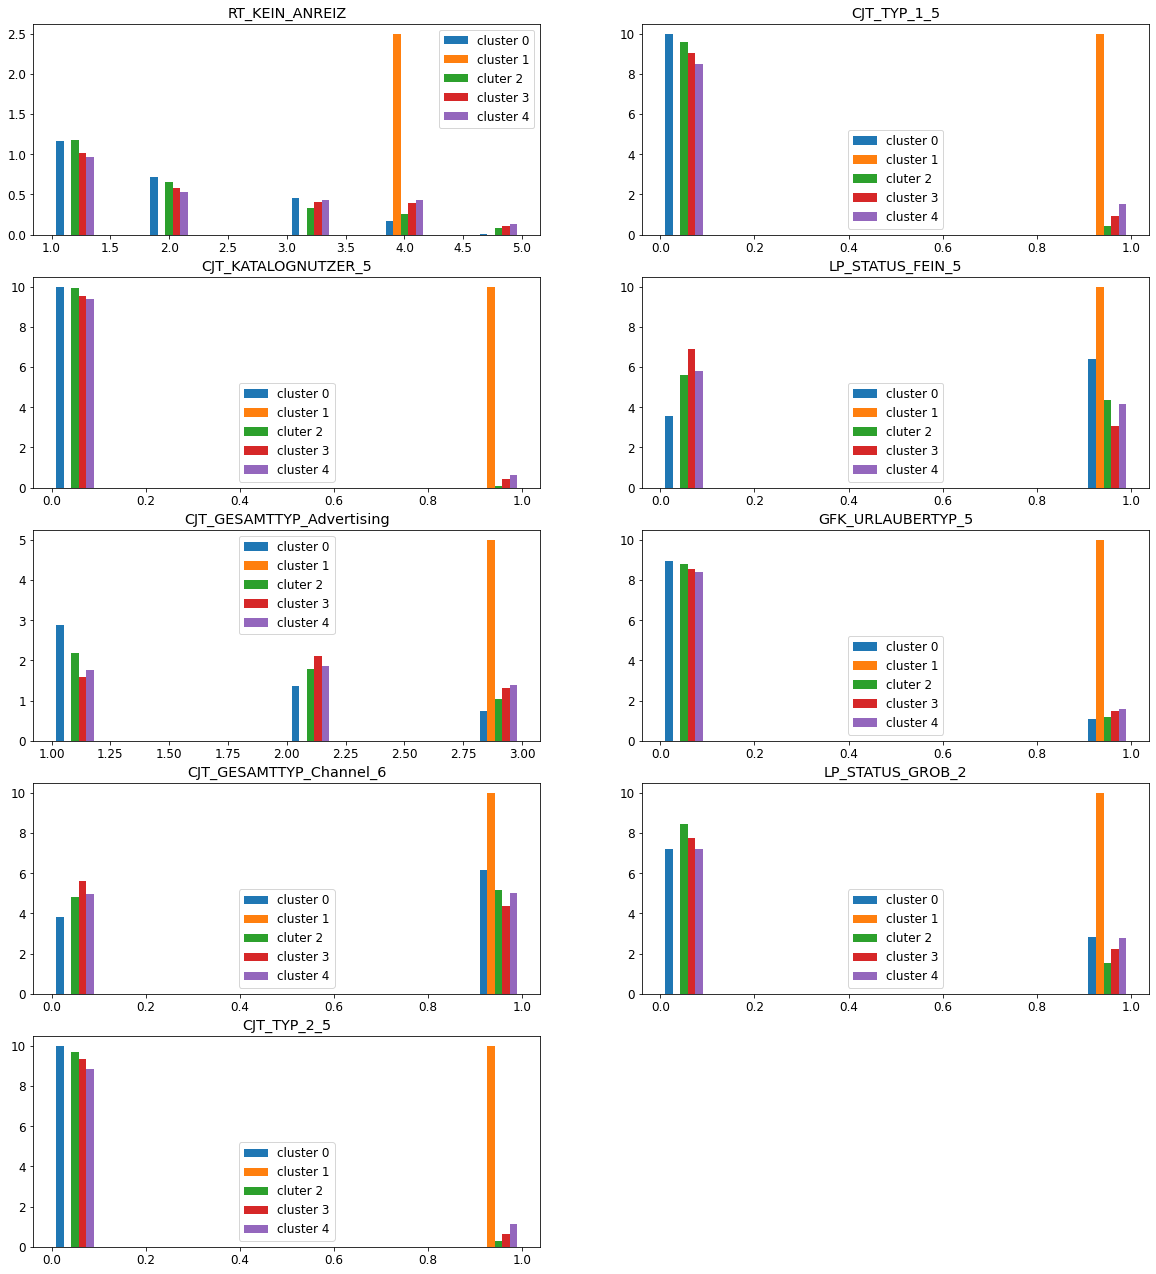

In [307]:
# plot outstanding columns for cluster 1
cluster_select_col_1 = list(cluster_select_col_1)

print(cluster_select_col_1)
n_plots = len(cluster_select_col_1)
plt.figure(figsize=[20,n_plots*2.5])

for ind in range(n_plots):
    plt.subplot(math.ceil(n_plots/2),2, ind+1)
    data = [df_cleaned[labels == 0][common_select_cols[ind]], 
            df_cleaned[labels == 1][common_select_cols[ind]],
            df_cleaned[labels == 2][common_select_cols[ind]],
            df_cleaned[labels == 3][common_select_cols[ind]],
            df_cleaned[labels == 4][common_select_cols[ind]]
           ]
    
    plt.hist(data, label = ['cluster 0', 'cluster 1','cluter 2', 'cluster 3', 'cluster 4'], density = True)
    plt.title(str(cluster_select_col_1[ind]))
    plt.legend()

Though cluster 0, 3 and 4 are fairly small fraction, we're interested in how different they are primarily from cluster 1 and 2 (Which are the dominant clusters). Clearly from the plot below that these 3 small clusters have much higher transaction activity in TOTAL POOL, compared to cluster 1 and 2.

['D19_GESAMT_DATUM']


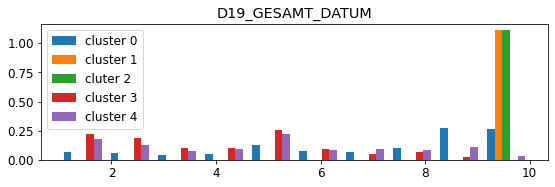

In [311]:
# find common columns from  clusters and plot

#common_select_cols = cluster_select_col_0.intersection(cluster_select_col_3)
common_select_cols = cluster_select_col_3.intersection(cluster_select_col_4)
common_select_cols = list(common_select_cols)

print(common_select_cols)
n_plots = len(common_select_cols)
plt.figure(figsize=[20,n_plots*2.5])

for ind in range(n_plots):
    plt.subplot(math.ceil(n_plots/2),2, ind+1)
    data = [df_cleaned[labels == 0][common_select_cols[ind]], 
            df_cleaned[labels == 1][common_select_cols[ind]],
            df_cleaned[labels == 2][common_select_cols[ind]],
            df_cleaned[labels == 3][common_select_cols[ind]],
            df_cleaned[labels == 4][common_select_cols[ind]]
           ]
    
    plt.hist(data, label = ['cluster 0', 'cluster 1','cluter 2', 'cluster 3', 'cluster 4'], density = True)
    plt.title(str(common_select_cols[ind]))
    plt.legend()

We take a look at the attributes with largest distance between cluster centers. The distance is calcualted as number of standard deviations. 

Primarily these distinguishing attributes are on financial types. Cluster 1 and 2 (the two dominant clusters) are different in terms of following:

- Clusters 1 and 2 customers are less likely money-saver and investors; they are more likely be-prepared, minimalists in terms of finances

- This seems to be somewhat in line with their transaction activities as well, since they are MINIMALISTS, they tend to have less recent transactions than the other clusters

In [314]:
# find largest distance between cluster centers for each attribute
std_away_columns = np.zeros(len(df_cleaned_clusters.columns))


for ind in range(len(df_cleaned_clusters.columns)):
    col = df_cleaned_clusters.columns[ind]
    distance = df_cleaned_clusters.loc[0, col] - df_cleaned_clusters.loc[1, col]
    std_away = distance/std_df_cleaned_attributes[ind]
    std_away_columns[ind] = std_away
    

# find top k attributes with largest distance between clusters
n_top = 10
std_away_top = std_away_columns[np.argsort(-abs(std_away_columns))[0:n_top]]
top_dist_columns = df_cleaned_clusters.columns[np.argsort(-abs(std_away_columns))[0:n_top]]

for n in range(n_top):
    col = top_dist_columns[n]
    print('Column {} is max {} std away between clusters'.format(col, std_away_top[n]))
    avg_value = avg_df_cleaned_attributes.loc[col]
    cluster_center = df_cleaned_clusters[col][0]
    cluster_center1 = df_cleaned_clusters[col][1]
    cluster_center2 = df_cleaned_clusters[col][2]
    
    
    print('columns {} is centered at {},{},{} while average value is {}'.format(col, cluster_center,cluster_center1,cluster_center2, avg_value))


Column FINANZ_SPARER is max -4.147531338420635 std away between clusters
columns FINANZ_SPARER is centered at 1.2511765490062192,4.000821217745981,4.003546865331355 while average value is 3.8335670499619376
Column FINANZ_VORSORGER is max 4.063320383587262 std away between clusters
columns FINANZ_VORSORGER is centered at 4.806945659641089,2.9991365879774534,2.987908816418556 while average value is 3.1048920229175847
Column FINANZ_ANLEGER is max -4.039872814273394 std away between clusters
columns FINANZ_ANLEGER is centered at 1.9552487348802758,5.000347588371106,5.025400085467849 while average value is 4.817841259665852
Column FINANZTYP_2 is max 4.004074608052065 std away between clusters
columns FINANZTYP_2 is centered at 0.8379523417661593,-0.00011457123088052384,-0.011191434465678052 while average value is 0.04591530109379382
Column FINANZ_UNAUFFAELLIGER is max -3.960055314649098 std away between clusters
columns FINANZ_UNAUFFAELLIGER is centered at 2.7988058101635116,5.0004738355030

C:\Users\Dennis\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


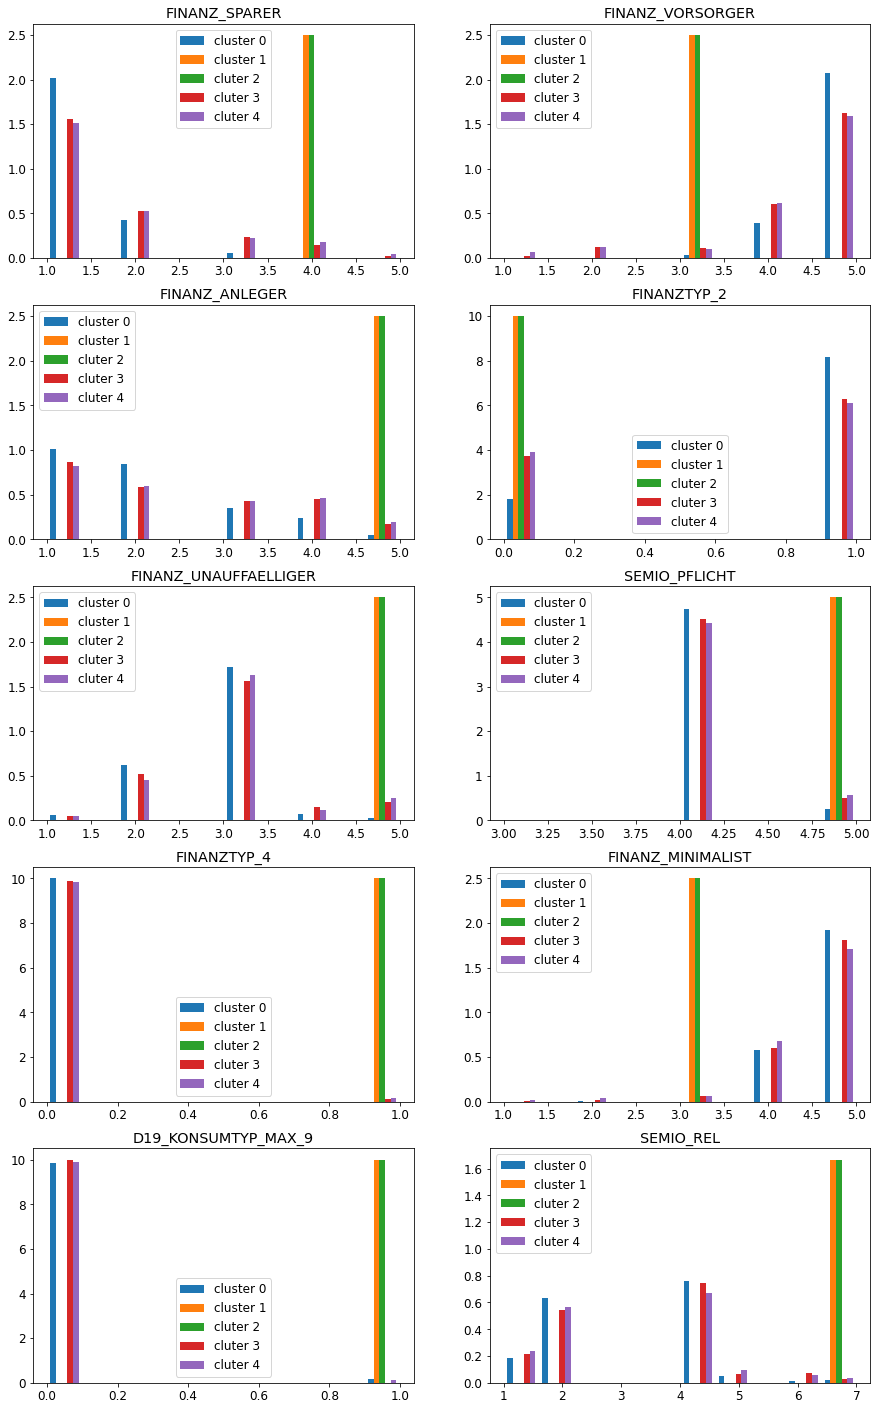

In [315]:
plt.figure(figsize=[15,n_top*2.5])

for n in range(n_top):
    col = top_dist_columns[n]
    
    plt.subplot(math.ceil(n_top/2),2, n+1)
    
    data = [df_cleaned[labels == 0][col], 
            df_cleaned[labels == 1][col],
            df_cleaned[labels == 2][col],
           df_cleaned[labels == 3][col],
           df_cleaned[labels == 4][col]]
    
    plt.hist(data, label = ['cluster 0', 'cluster 1','cluter 2','cluter 3','cluter 4'], density = True)
    plt.title(str(col))
    plt.legend()

### Pipeline for Population Sub-cluster

Similar as before, we use the fitted pipeline with customers sub-cluster to analyze the population sub-cluster. We clean, scale and perform PCA analysis.

In [316]:
customers = pd.read_csv('data/customers.csv')
del customers['Unnamed: 0']

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [317]:
select_main_cluster = 0
skew_select = 1
skewedness_threshold = 0.2
na_row_threshold = 0.6
na_col_threshold = 0.6
na_low_frac = 0.15
na_high_frac = 0.95
scalar_choice = [MinMaxScaler(),StandardScaler()]
mailout = 0

verbose_print_out = 2
df_cleaned_customers_subcluster, df_scaled_customers_subcluster, df_pca_customers_subcluster, \
d19_letzer_dict_customers_subcluster, rows_na_customers_subcluster, columns_na_customers_subcluster, \
fill_na_cols_cat_customers_subcluster, drop_na_cols_cat_customers_subcluster, \
column_encode_customers_subcluster, column_remain_customers_subcluster, column_binary_customers_subcluster, prefix_list_encode_customers_subcluster, df_column_names_customers_subcluster, \
col_name_likely_rank_customers_subcluster, col_name_likely_normal_customers_subcluster, rank_scaler_customers_subcluster, numeric_scaler_customers_subcluster,\
pca_fitted_customers_subcluster, fitted_n_components_customers_subclustern = \
df_clean_scale_pca(customers,select_main_cluster,na_row_threshold, na_col_threshold,
   skewedness_threshold, skew_select, na_low_frac, na_high_frac, 16,
  9, scalar_choice, mailout, 0.95, verbose_print_out)

Finished step 1 of cleaning
Processed 0.26046167011040844 rows with higher than 0.6 NA fraction
Dropped 275 columns with higher than 0.6 NA fraction
Finished step 3a of cleaning - filling NA for 94 numerical columns
Finished step 3b of cleaning - Encoded 15 columns, dropped 0 columns and found 2 binary columns
Columns we have not processed: 
['PRODUCT_GROUP', 'ONLINE_PURCHASE', 'CUSTOMER_GROUP', 'LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Processed dataset in 39.9247841835022 seconds


In [318]:
# import population datasets
population = pd.read_csv('data/azdias1.csv')
del population['Unnamed: 0']
print('Importing dataset')
print(population.shape)
for i in range(2,10):
    azdias_filename = 'data/azdias'+str(i)+'.csv'
    print('Importing dataset '+azdias_filename)
    population_add = pd.read_csv(azdias_filename)
    del population_add['Unnamed: 0']
    
    population = population.append(population_add, ignore_index=True)
    print(population.shape)

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Importing dataset
(100000, 366)
Importing dataset azdias2.csv
(200000, 366)
Importing dataset azdias3.csv
(300000, 366)
Importing dataset azdias4.csv
(400000, 366)
Importing dataset azdias5.csv
(500000, 366)
Importing dataset azdias6.csv
(600000, 366)
Importing dataset azdias7.csv
(700000, 366)
Importing dataset azdias8.csv
(800000, 366)
Importing dataset azdias9.csv
(891221, 366)


In [319]:
df_cleaned_population_subcluster, df_scaled_population_subcluster, df_pca_population_subcluster = \
df_clean_scale_pca_population(population,df_cleaned_customers_subcluster, 0, 0,
                              0.6, columns_na_customers_subcluster, 0.2,1,
                                  column_encode_customers_subcluster, column_remain_customers_subcluster, column_binary_customers_subcluster, prefix_list_encode_customers_subcluster, 
                                  fill_na_cols_cat_customers_subcluster, drop_na_cols_cat_customers_subcluster, 0,d19_letzer_dict_customers_subcluster,
                                  col_name_likely_rank_customers_subcluster,col_name_likely_normal_customers_subcluster, 
                                 rank_scaler_customers_subcluster,  numeric_scaler_customers_subcluster, pca_fitted_customers_subcluster, verbose_print_out)

Finished step 1 of cleaning
Processed 0.10458124303623904 rows with higher than 0.6 NA fraction
Dropped 275 columns
Dropped 275 columns
Finished step 3a of cleaning - filling NA for 94 numerical columns
Finished step 3b of cleaning - Encoded 15 columns, dropped 0 columns and found 2         binary columns
Columns we have not processed: 
['LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Finished processing population dataset in 3 minutes


### 2.3.b Compare customers vs. demographics PCA 

We can then compare descriptional statistics between customers and population datasets. 

Calculating the description statistics for these PCA componnents, we see that indeed PCA components differ a lot between the customers and population datasets. 

In [320]:
from scipy import stats
print_out = 0
ks_stats_list = np.zeros((df_pca_customers_subcluster.shape[1]))
for c in range(df_pca_customers_subcluster.shape[1]):
    PCA_customers = df_pca_customers_subcluster[:,c]
    PCA_population = df_pca_population_subcluster[:,c]
    ks_statistics, pvalue = stats.ks_2samp(PCA_customers, PCA_population)
    ks_stats_list[c] = ks_statistics
    
    if print_out:
        # mean, median
        print('Mean for PC {} is {} and {}'.format(c+1, round(PCA_customers.mean(),3), round(PCA_population.mean(),3)))

        # variance
        print('Variance for PC {} is {} and {}'.format(c+1, round(np.var(PCA_customers),3), round(np.var(PCA_population),3)))

        # skewness
        print('Skewness for PC {} is {} and {}'.format(c+1, round(stats.skew(PCA_customers),3), round(stats.skew(PCA_population),3)))
    
    
        print('KS Test for PC {} is {} with p-value {:3e}'.format(c+1, round(ks_statistics,2), round(pvalue,3)))
    


In [321]:
n_top = 10
ks_stats_top = ks_stats_list[np.argsort(-abs(ks_stats_list))[0:n_top]]
pca_n_stats_top = np.array(range(df_pca_customers_subcluster.shape[1]))[np.argsort(-abs(ks_stats_list))[0:n_top]]

for n in range(n_top):
    print('KS Stats for PCA {} is {}'.format(pca_n_stats_top[n]+1, ks_stats_top[n]))

KS Stats for PCA 15 is 0.47511316402363213
KS Stats for PCA 11 is 0.47038168635938504
KS Stats for PCA 13 is 0.4078432561593492
KS Stats for PCA 18 is 0.4023143804237641
KS Stats for PCA 1 is 0.39720186221007836
KS Stats for PCA 22 is 0.39069064865542624
KS Stats for PCA 20 is 0.3869127142022923
KS Stats for PCA 2 is 0.3659881454552797
KS Stats for PCA 9 is 0.3500778136827838
KS Stats for PCA 17 is 0.34180820431565384


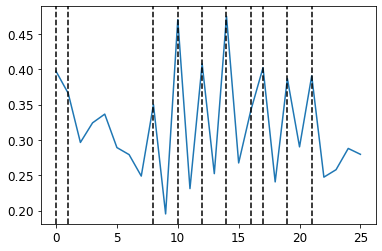

In [322]:
plt.plot(range(df_pca_customers_subcluster.shape[1]), ks_stats_list)
for n in range(n_top):
    plt.axvline(x = pca_n_stats_top[n], linestyle = '--', color = 'k')

plt.show()

We can see that PCA 15, PCA 11 and PCA 13 are the top 3 components with highest KS statistics, suggesting these components are most different between customer vs population. We take a look at what these PCA components are.

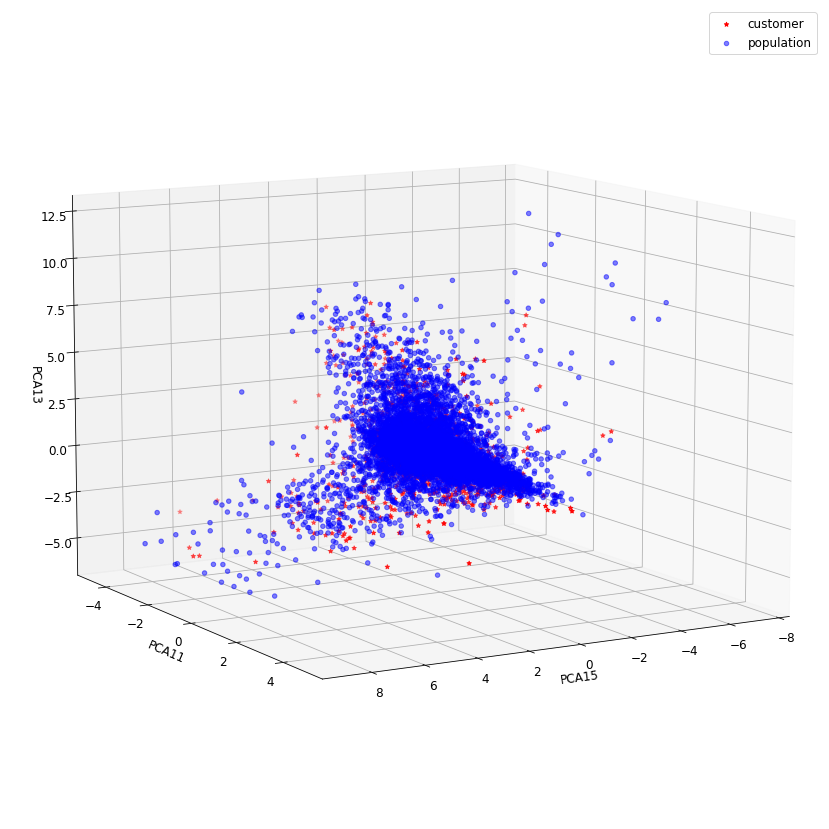

In [323]:
# select components
c1 = pca_n_stats_top[0]
c2 = pca_n_stats_top[1]
c3 = pca_n_stats_top[2]

PCA1 = df_pca_customers_subcluster[:,c1]
PCA2 = df_pca_customers_subcluster[:,c2]
PCA3 = df_pca_customers_subcluster[:,c3]
PCA1_population = df_pca_population_subcluster[:,c1]
PCA2_population = df_pca_population_subcluster[:,c2]
PCA3_population = df_pca_population_subcluster[:,c3]


fig = plt.figure(figsize = [15,15])
ax = fig.add_subplot(111, projection='3d')


ax.scatter(PCA1, PCA2, PCA3, c='red',
           label='customer',marker='*')
ax.scatter(PCA1_population, PCA2_population, PCA3_population, c='blue',
           label='population',marker='o', alpha = 0.5)



ax.set_xlabel('PCA'+str(c1+1))
ax.set_ylabel('PCA'+str(c2+1))
ax.set_zlabel('PCA'+str(c3+1))
ax.view_init(elev=10., azim=60)

plt.legend()
plt.show()

PCA15 describes primarily transaction activity, life status and consumption types. PCA13 is more focused on transaction and personality affinities. 

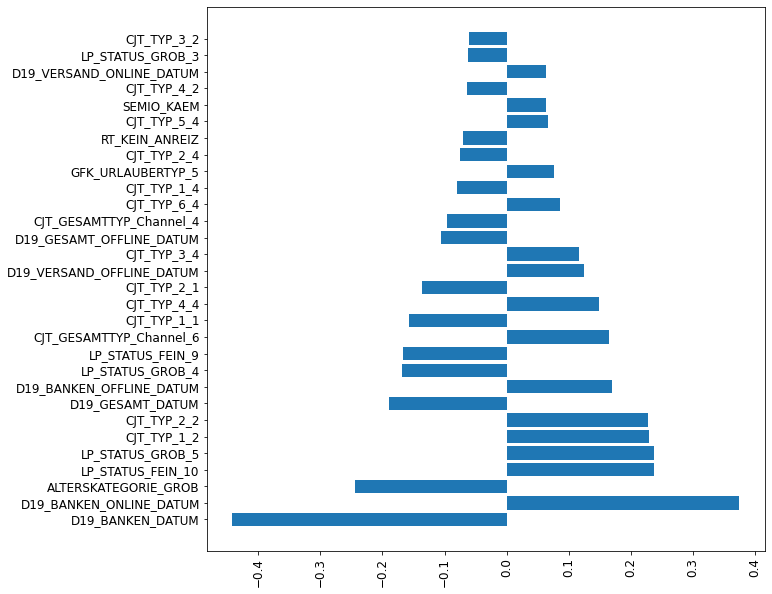

In [324]:
weights_pca_c1 = pca_components[c1,:].transpose()
n_top = 30
weights_pcac1_top = weights_pca_c1[np.argsort(-abs(weights_pca_c1))[0:n_top]]
weights_pcac1_features = df_scaled.columns[np.argsort(-abs(weights_pca_c1))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pcac1_features,weights_pcac1_top)
plt.xticks(rotation = 'vertical')
plt.show()

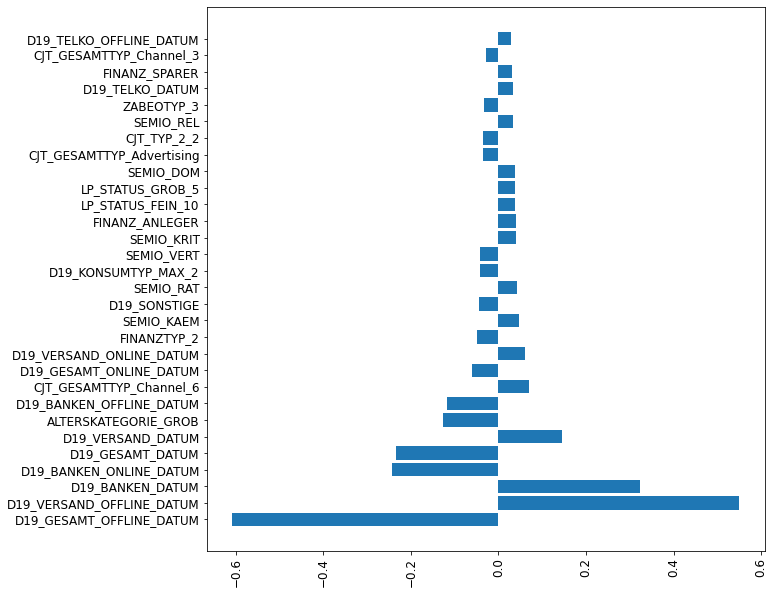

In [326]:
weights_pca_c2 = pca_components[c3,:].transpose()
n_top = 30
weights_pcac2_top = weights_pca_c2[np.argsort(-abs(weights_pca_c2))[0:n_top]]
weights_pcac2_features = df_scaled.columns[np.argsort(-abs(weights_pca_c2))[0:n_top]]

fig3,ax3=plt.subplots(figsize=(10,10))
ax3.barh(weights_pcac2_features,weights_pcac2_top)
plt.xticks(rotation = 'vertical')
plt.show()

We also look at the top 20 statistically different attributes between customres and population. 

In [329]:
threshold = optimal_threshold
col_to_compare = list(df_cleaned_customers_subcluster.columns)
col_to_compare.remove('LNR')
col_to_compare.remove('PRODUCT_GROUP')
col_to_compare.remove('CUSTOMER_GROUP')
col_to_compare.remove('ONLINE_PURCHASE')
ks_stats_list_col =  np.zeros((df_cleaned_customers_subcluster.shape[1]-1))
for ind in range(len(col_to_compare)):
    col = col_to_compare[ind]
    customers_col = df_cleaned_customers_subcluster[col]
    population_col = df_cleaned_population_subcluster[col]
    
    ks_statistics, pvalue = stats.ks_2samp(customers_col, population_col)
    ks_stats_list_col[ind] = ks_statistics
    
    if print_out:
        # mean, median
        print('Mean for PC {} is {} and {}'.format(c+1, round(customers_col.mean(),3), round(population_col.mean(),3)))

        # variance
        print('Variance for PC {} is {} and {}'.format(c+1, round(np.var(customers_col),3), round(np.var(population_col),3)))

        # skewness
        print('Skewness for PC {} is {} and {}'.format(c+1, round(stats.skew(customers_col),3), round(stats.skew(population_col),3)))
    
    
        print('KS Test for PC {} is {} with p-value {:3e}'.format(c+1, round(ks_statistics,2), round(pvalue,3)))

n_top = 20
ks_stats_top_col = ks_stats_list_col[np.argsort(-abs(ks_stats_list_col))[0:n_top]]
col_n_stats_top = np.array(col_to_compare)[np.argsort(-abs(ks_stats_list_col))[0:n_top]]

for n in range(n_top):
    print('KS Stats for column {} is {}'.format(col_n_stats_top[n], ks_stats_top_col[n]))

KS Stats for column LP_STATUS_FEIN_5 is 0.3190748525237094
KS Stats for column ALTERSKATEGORIE_GROB is 0.31653291065820666
KS Stats for column CJT_TYP_4_5 is 0.31572670741627773
KS Stats for column CJT_TYP_3_5 is 0.3123807625805608
KS Stats for column CJT_TYP_6_5 is 0.3112940501645917
KS Stats for column CJT_TYP_5_5 is 0.30933431885101825
KS Stats for column GFK_URLAUBERTYP_5 is 0.3093022789658716
KS Stats for column CJT_KATALOGNUTZER_5 is 0.27063537014393857
KS Stats for column LP_STATUS_GROB_2 is 0.2487165719657498
KS Stats for column CJT_GESAMTTYP_Advertising is 0.234593086505547
KS Stats for column RT_SCHNAEPPCHEN is 0.2298871570973951
KS Stats for column CJT_TYP_2_5 is 0.21772880185915716
KS Stats for column CJT_GESAMTTYP_Channel_6 is 0.21657509603771213
KS Stats for column CJT_TYP_1_5 is 0.19835010593275554
KS Stats for column LP_STATUS_GROB_1 is 0.18289651721060074
KS Stats for column ONLINE_AFFINITAET is 0.18169985611873674
KS Stats for column RETOURTYP_BK_S is 0.15255647984329

It turns out that 

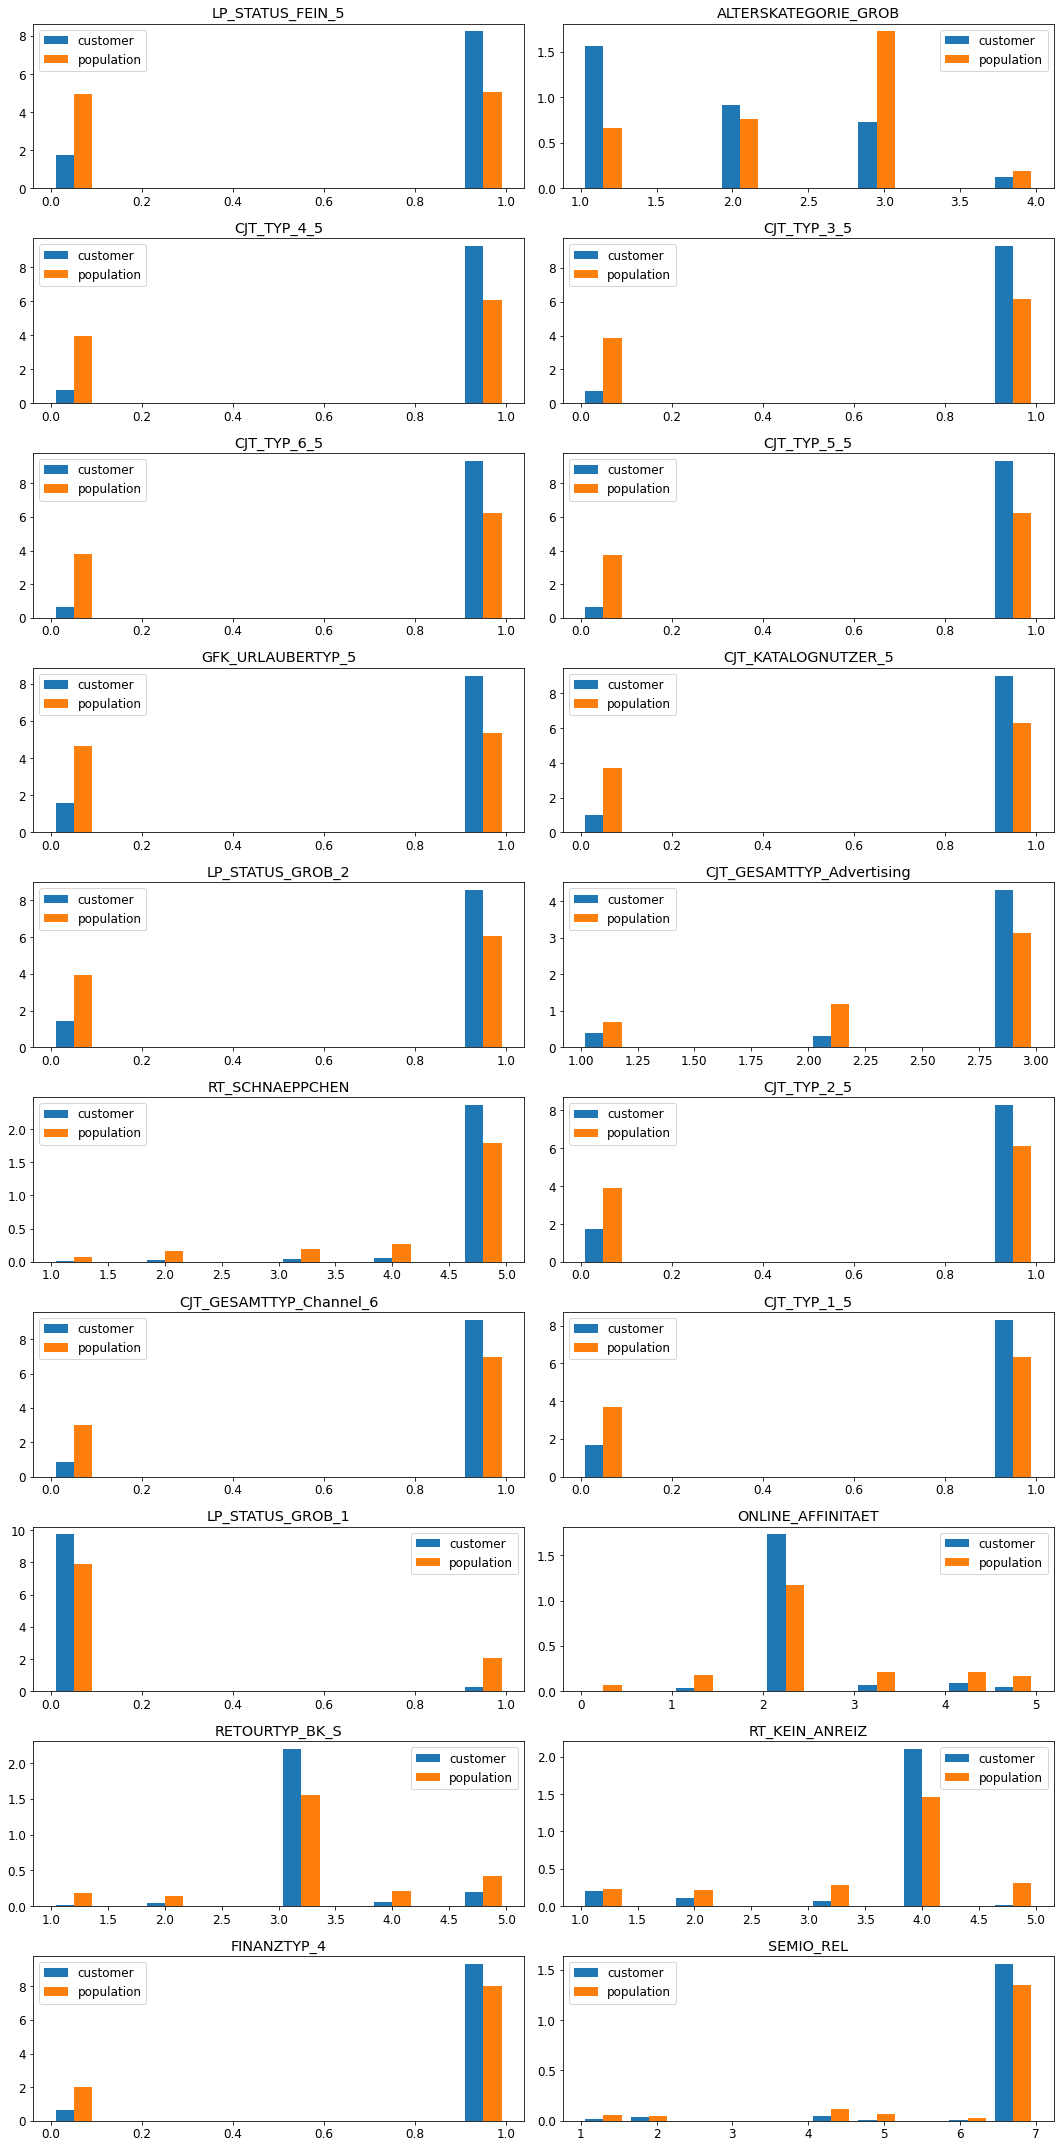

In [331]:
n_top = 20
plt.figure(figsize=[15,n_top*1.5])

for n in range(n_top):
    col = col_n_stats_top[n]
    customers_col = df_cleaned_customers_subcluster[col]
    population_col = df_cleaned_population_subcluster[col]
    
    plt.subplot(math.ceil(n_top/2),2, n+1)
    
    data = [df_cleaned_customers_subcluster[col], 
            df_cleaned_population_subcluster[col]]
    
    plt.hist(data, label = ['customer','population'], density  = True)
    plt.title(str(col))
    plt.legend()
    
plt.tight_layout()
plt.show()

### 2.4.c. Compare Customer Profiles in customer vs. population

In [332]:
label_pop_subcluster = clf.predict(df_pca_population_subcluster)

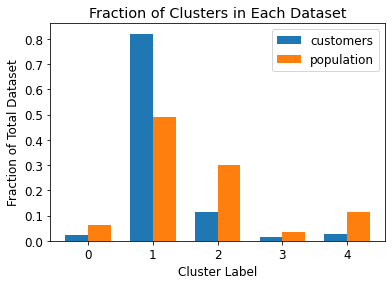

In [333]:
unique_pop, counts_pop = np.unique(label_pop_subcluster, return_counts=True)
counts_pop = counts_pop/sum(counts_pop)

labels_subcluster = clf.predict(df_pca_customers_subcluster)

unique, counts = np.unique(labels_subcluster, return_counts=True)
counts = counts/sum(counts)

width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(unique - width/2, counts, width, 
                label='customers')
rects2 = ax.bar(unique_pop + width/2, counts_pop, width, 
                label='population')


ax.set_xlabel('Cluster Label')
ax.set_ylabel('Fraction of Total Dataset')
ax.set_title('Fraction of Clusters in Each Dataset')
ax.legend()


plt.show()

Above we plot the fraction of clusters within the SUB-CLUSTER dataset, for both customers vs population. 

Then, as shown below, we plot the ratio of these cluster fractions in customer vs in population. If the cluster is proportionally higher in customers (ratio > 1), then it suggests the likelihood to become a customer is HIGHER THAN AVERAGE. 

However, note that the SUBCLUSTER itself is of different fraction in customer vs population dataset.Since we don't konw why the SUB-CLUSTER is created in the first place, we cannot properly adjust for the difference. 

- If the sub-cluster in both customers vs population come from the same data collection process, which suggests the subcluster is a randomized representation of customer and population datasets, we probably don't need to account for the differnt fraction of SUBCLUSTER itself

- If the sub-clusters are not created from same process, which suggests the creation of subcluster itself employs different sampling methods within customer vs. population, we probably need to account for the different fractions of subcluster itself

From the plots below, cluster 1 seems to be more represented in customer vs in population in both scenarios. These customers are high-income minimalists and don't seem to have recent activity in transactions.

Interestingly, these characteristics are different from the MAIN-CLUSTER's cluster 1 and 2, which were identified as more likely to become customers. 

The ratios are:
[0.39543711 1.67814363 0.37602293 0.42238716 0.23749692]


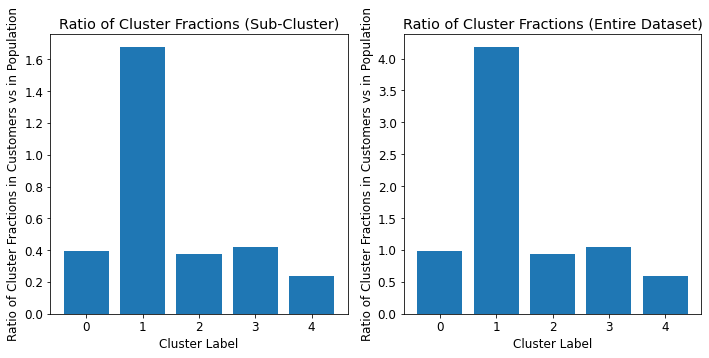

The ratios are:
[0.39543711 1.67814363 0.37602293 0.42238716 0.23749692]


In [345]:
plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
plt.bar(unique, counts/counts_pop)
plt.xlabel('Cluster Label')
plt.ylabel('Ratio of Cluster Fractions in Customers vs in Population')
plt.title('Ratio of Cluster Fractions (Sub-Cluster)')


print('The ratios are:')
print(counts/counts_pop)

ratio_subclusters_pop = df_pca_population_subcluster.shape[0]/population.shape[0]
ratio_subclusters_customers = df_pca_customers_subcluster.shape[0]/customers.shape[0]

plt.subplot(1,2,2)
plt.bar(unique,  (counts * ratio_subclusters_customers)/(counts_pop * ratio_subclusters_pop))
plt.xlabel('Cluster Label')
plt.ylabel('Ratio of Cluster Fractions in Customers vs in Population')
plt.title('Ratio of Cluster Fractions (Entire Dataset)')

plt.tight_layout()
plt.show()

print('The ratios are:')
print(counts/counts_pop)

## <a id='mailout_prediction'> Part 3: Supervised Learning Model for Mailout Prediction </a>

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.


The data cleaning pipeline is created so that when we analyze the population data, the same scalers and cleaning processes are used. 


- [1. Transform Demographics Data for the Campaigns](#pipeline_mailout)  

    
- [2. Benchmark and Optimize Performance of Classifiers](#optimize_classifiers)    
    a. Benchmark Classifiers  
    b. Optimize pipeline and classifier parameters using cross-validation (e.g. GridSearchCV)  
    c. Benchmark performance with upsampling  
    d. Benchmakr and optimize performance with feature selection
     
Note we don't need to ues the previously fitted pipelines for customers. This is because the mail-out targest could have different demographic profiles from the existing customers. 


### 1. <a id='pipeline_mailout'> Transform Demographics Data for the Campaigns </a>

We build the pipeline for cleaning and scaling demographics data in the mailout_train file. Similar to previous subsections, we analyze the dropped sub-cluster and remaining datasets in parallel. 

Note that we do not reduce features in this dataset.

After building the pipeline (i.e. selecting what columns to drop, and fitting our standard/minmax scalers), we use the fitted pipeline to fit-transform the mailout_test dataset. 

First, we import the dataset and select the target variable 'RESPONSE'. The remaining columsn contain same number of columns as our population dataset. 

In [ ]:
#mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

In [348]:
mailout_train = pd.read_csv('data/mailout_train.csv')
del mailout_train['Unnamed: 0']
#print(mailout_train.head())
y_mailout_train = mailout_train['RESPONSE']

print('{} entries in mailout dataset'.format(mailout_train.shape[0]))

42962 entries in mailout dataset


C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [349]:
y_mailout_train.value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

### <a id='optimize_classifiers'> 2. Benchmark and Optimize Classifiers

In this section, we benchmark and optimize performance of classifiers for transformed mail-out train data. The process is as follows:

- benchmark different classifiers
- optimize best classifier in the previous step 
    - optimize pipeline parameters for cleaning and scaling data via cross-validation
    - optimzie classifier parameters using GridSearchCV
- improve classifier 
    - try upsampling minority classes
    - try select top features before training classifier

#### Metric Selection
In evaluating our classifier performance, we use AOC-ROC metric as it is known to perform better with imbalanced datasets and is also the performance metric for the online Kaggle competition.

### Benchmark Classifiers 


In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, IsolationForest, StackingClassifier, VotingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# support functions for metrics, cv
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statistics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# functions for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [676]:
# train classification model on y = response data

na_low_frac = 0.15
na_high_frac = 0.95
na_row_threshold = 0.6
na_col_threshold = 0.8
select_main_cluster = 2

skew_outlier_threshold = 0.2
skew_select = 1
scalar_choice = [MinMaxScaler(),StandardScaler()]

# clean dataset
verbose_print_out = 2
df_cleaned_mailout, df_scaled_mailout, df_pca_mailout, \
d19_letzer_dict_mailout, rows_na_mailout, columns_na_mailout, fill_na_cols_cat_mailout, drop_na_cols_cat_mailout, \
column_encode_mailout, column_remain_mailout, column_binary_mailout, prefix_list_encode_mailout, df_column_names_mailout, \
col_name_likely_rank_mailout, col_name_likely_normal_mailout, rank_scaler_mailout, numeric_scaler_mailout,\
pca_fitted_mailout, fitted_n_components_mailout = \
df_clean_scale_pca(mailout_train.drop(columns='RESPONSE'),select_main_cluster,na_row_threshold, na_col_threshold,
                       skew_outlier_threshold, skew_select, na_low_frac, na_high_frac, 40,
                      8, scalar_choice, 1, 0.95, verbose_print_out)

# split cleaned data
X_train, X_test, y_train, y_test = train_test_split(df_scaled_mailout, y_mailout_train, test_size=0.3, random_state=42)

# list classifiers to benchmark
estimators = [ ('rf', RandomForestClassifier(n_estimators=10, random_state=42)) ]
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = BernoulliNB()

clf_choice = [LogisticRegression(random_state=0, max_iter = 3000, C  = 0.008),
              GaussianNB(), BernoulliNB(),
              DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=100),
              AdaBoostClassifier(),
              GradientBoostingClassifier(random_state=0),
              SGDClassifier(max_iter=3000, tol=1e-3, loss = 'log'),
              ExtraTreesClassifier(random_state=0),
              StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()),
              VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft'),
              HistGradientBoostingClassifier(),
              LGBMClassifier(n_estimators=100, learning_rate = 0.01, num_boosting_round = 3000, #feature_fraction=0.06,bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=1234),
             CatBoostClassifier(n_estimators=3000,learning_rate = 0.01, #colsample_bylevel=0.06,
                        max_leaves=31,#subsample=0.67,
                        verbose=0,
                        thread_count=6,
                        random_state=1234)]

clf_name = ['lr','gnb','bnb','dt','rf','ada','gb',
           'sgd','extra','stack','voting','histgbc',
           'lgbm','catboost']


auc_score, auc_score_std = [], []
n_splits = 3

for ind in range(len(clf_choice)):
    
    clf = clf_choice[ind]
    name = clf_name[ind]
    
    print('Training classifier: '+name)
    
    cv = KFold(n_splits=n_splits)
    cv_clf = clf
    val_scores = 0
    val_scores_list = []
    for train_ind, test_ind in cv.split(X_train, y_train):
        X_train_cv = X_train.loc[X_train.index.intersection(train_ind)]
        y_train_cv = y_train.loc[y_train.index.intersection(train_ind)]
        X_test_cv = X_train.loc[X_train.index.intersection(test_ind)]
        y_test_cv = y_train.loc[y_train.index.intersection(test_ind)]
        cv_clf.fit(X_train_cv, y_train_cv)
        y_pred = cv_clf.predict_proba(X_test_cv)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test_cv, y_pred)
        val_scores += auc(fpr,tpr)
        val_scores_list.append(auc(fpr,tpr))
    val_scores /= n_splits
    val_scores_std = statistics.stdev(val_scores_list)

    auc_score.append(val_scores)
    auc_score_std.append(val_scores_std)
    print('AUC score for classifier {} is {} +/- {}'.format(name, val_scores, val_scores_std))
        

Finished step 1 of cleaning
Processed 0.18102043666495973 rows with higher than 0.6 NA fraction
Dropped 5 columns with higher than 0.8 NA fraction
Finished step 3a of cleaning - filling NA for 339 numerical columns
Finished step 3b of cleaning - Encoded 42 columns, dropped 1 columns and found 3 binary columns
Columns we have not processed: 
['LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Processed dataset in 19.341553211212158 seconds
Training classifier: lr
AUC score for classifier lr is 0.6522754569464536 +/- 0.04272076004519317
Training classifier: gnb
AUC score for classifier gnb is 0.5046160694523656 +/- 0.012070958674749796
Training classifier: bnb
AUC score for classifier bnb is 0.5998490662376507 +/- 0.02573490066371817
Training classifier: dt
AUC score for classifier dt is 0.5112121674580413 +/- 0.03127152644381222
Training classifier: rf
AUC score for classifier rf is 0.6284408076605889 +/- 0.016160012467553147
Training classifier: ada
AUC score for cla

C:\Users\Dennis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dennis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

AUC score for classifier voting is 0.6390321887769496 +/- 0.035345479400891854
Training classifier: histgbc
AUC score for classifier histgbc is 0.7164829938275612 +/- 0.02619897457723002
Training classifier: lgbm
AUC score for classifier lgbm is 0.7461707519355999 +/- 0.02241513047061253
Training classifier: catboost
AUC score for classifier catboost is 0.7474153888625755 +/- 0.023615670824700542


### Optimize Parameters for Gradient Boosting

Since the best classifier is the gradient boosted classifer, so we optimize below the parameters for cleaning and scaling data.

In [678]:
na_low_frac = 0.15
na_high_frac = 0.95
na_row_threshold = 0.6
na_col_threshold = 0.8
select_main_cluster = 2

skew_outlier_threshold = 0.2
skew_select = 1
scalar_choice = [MinMaxScaler(),StandardScaler()]

auc_score_range = []
auc_score_std_range =[]

n_splits = 3
n_numeric_threshold = 9
n_category_threshold_range = [2,3,4,5,6,7,8,10,12,14,16,40]

for n_category_threshold in n_category_threshold_range:

        df_cleaned_mailout, df_scaled_mailout, df_pca_mailout, \
        d19_letzer_dict_mailout, rows_na_mailout, columns_na_mailout, fill_na_cols_cat_mailout, drop_na_cols_cat_mailout, \
        column_encode_mailout, column_remain_mailout, column_binary_mailout, prefix_list_encode_mailout, df_column_names_mailout, \
        col_name_likely_rank_mailout, col_name_likely_normal_mailout, rank_scaler_mailout, numeric_scaler_mailout,\
        pca_fitted_mailout, fitted_n_components_mailout = \
        df_clean_scale_pca(mailout_train.drop(columns='RESPONSE'),select_main_cluster,na_row_threshold, na_col_threshold,
                               skew_outlier_threshold, skew_select, na_low_frac, na_high_frac, n_category_threshold,
                              n_numeric_threshold, scalar_choice, 1, 0.95, 1)
        
        
        print('Calculating CV AUC score for category threshold {}'.format(n_category_threshold))
        
        # use cleaned data
        X_train, X_test, y_train, y_test = train_test_split(df_scaled_mailout, y_mailout_train, test_size=0.3, random_state=42)

        params = {'n_estimators': 1000, 'max_depth': 3, 'subsample': 0.7,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
        
        cv = KFold(n_splits=n_splits)
        cv_clf = GradientBoostingClassifier(**params)
        val_scores = 0
        val_scores_list = []
        for train_ind, test_ind in cv.split(X_train, y_train):
            X_train_cv = X_train.loc[X_train.index.intersection(train_ind)]
            y_train_cv = y_train.loc[y_train.index.intersection(train_ind)]
            X_test_cv = X_train.loc[X_train.index.intersection(test_ind)]
            y_test_cv = y_train.loc[y_train.index.intersection(test_ind)]
            cv_clf.fit(X_train_cv, y_train_cv)
            y_pred = cv_clf.predict_proba(X_test_cv)[:,1]
            fpr, tpr, thresholds = roc_curve(y_test_cv, y_pred)
            val_scores += auc(fpr,tpr)
            val_scores_list.append(auc(fpr,tpr))
        val_scores /= n_splits
        val_scores_std = statistics.stdev(val_scores_list)
        
        auc_score_range.append(val_scores)
        auc_score_std_range.append(val_scores_std)
        print('AUC score for category threshold {} is {} +/- {}'.format(n_category_threshold, val_scores, val_scores_std))
        

Processed dataset in 14.010440111160278 seconds
Calculating CV AUC score for category threshold 2
AUC score for category threshold 2 is 0.7616394470849878 +/- 0.03652805813523494
Processed dataset in 15.29367208480835 seconds
Calculating CV AUC score for category threshold 3
AUC score for category threshold 3 is 0.7619110276199291 +/- 0.03507791424279497
Processed dataset in 15.528897523880005 seconds
Calculating CV AUC score for category threshold 4
AUC score for category threshold 4 is 0.7620568353625168 +/- 0.037046003194877955
Processed dataset in 16.79611372947693 seconds
Calculating CV AUC score for category threshold 5
AUC score for category threshold 5 is 0.7643012054370822 +/- 0.03310871274256645
Processed dataset in 17.687951803207397 seconds
Calculating CV AUC score for category threshold 6
AUC score for category threshold 6 is 0.763701138785688 +/- 0.035302635592646715
Processed dataset in 17.576843738555908 seconds
Calculating CV AUC score for category threshold 7
AUC scor

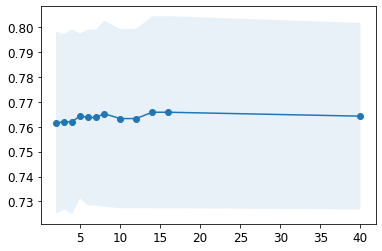

In [679]:
std_auc_abs = [abs(x) for x in auc_score_std_range]
plt.plot(n_category_threshold_range, auc_score_range, marker = 'o')

y1 = [x + y for x, y in zip(auc_score_range,std_auc_abs)] 
y2 = [x - y for x, y in zip(auc_score_range,std_auc_abs)] 
plt.fill_between(n_category_threshold_range, y1, y2, alpha = 0.1)


plt.show()

In [683]:
# select category parameter
n_category_threshold_optimal = n_category_threshold_range[auc_score_range.index(max(auc_score_range))]
n_category_threshold_optimal

14

In [685]:
na_low_frac = 0.15
na_high_frac = 0.95
na_row_threshold = 0.6
na_col_threshold = 0.8
select_main_cluster = 2

skew_outlier_threshold = 0.2
skew_select = 1
scalar_choice = [MinMaxScaler(),StandardScaler()]

auc_score_numeric_range = []
auc_score_std_numeric_range =[]

n_splits = 3
n_numeric_threshold_range = range(3,20,1)
n_category_threshold = n_category_threshold_optimal

for n_numeric_threshold in n_numeric_threshold_range:

        df_cleaned_mailout, df_scaled_mailout, df_pca_mailout, \
        d19_letzer_dict_mailout, rows_na_mailout, columns_na_mailout, fill_na_cols_cat_mailout, drop_na_cols_cat_mailout, \
        column_encode_mailout, column_remain_mailout, column_binary_mailout, prefix_list_encode_mailout, df_column_names_mailout, \
        col_name_likely_rank_mailout, col_name_likely_normal_mailout, rank_scaler_mailout, numeric_scaler_mailout,\
        pca_fitted_mailout, fitted_n_components_mailout = \
        df_clean_scale_pca(mailout_train.drop(columns='RESPONSE'),select_main_cluster,na_row_threshold, na_col_threshold,
                               skew_outlier_threshold, skew_select, na_low_frac, na_high_frac, n_category_threshold,
                              n_numeric_threshold, scalar_choice, 1, 0.95, 1)
        
        print('Calculating CV AUC score for numeric threshold {}'.format(n_numeric_threshold))
        
        # use cleaned data
        X_train, X_test, y_train, y_test = train_test_split(df_scaled_mailout, y_mailout_train, test_size=0.3, random_state=42)

        params = {'n_estimators': 1000, 'max_depth': 3, 'subsample': 0.7,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
        
        cv = KFold(n_splits=n_splits)
        cv_clf = GradientBoostingClassifier(**params)
        val_scores = 0
        val_scores_list = []
        for train_ind, test_ind in cv.split(X_train, y_train):
            X_train_cv = X_train.loc[X_train.index.intersection(train_ind)]
            y_train_cv = y_train.loc[y_train.index.intersection(train_ind)]
            X_test_cv = X_train.loc[X_train.index.intersection(test_ind)]
            y_test_cv = y_train.loc[y_train.index.intersection(test_ind)]
            cv_clf.fit(X_train_cv, y_train_cv)
            y_pred = cv_clf.predict_proba(X_test_cv)[:,1]
            fpr, tpr, thresholds = roc_curve(y_test_cv, y_pred)
            val_scores += auc(fpr,tpr)
            val_scores_list.append(auc(fpr,tpr))
        val_scores /= n_splits
        val_scores_std = statistics.stdev(val_scores_list)
        
        auc_score_numeric_range.append(val_scores)
        auc_score_std_numeric_range.append(val_scores_std)
        print('AUC score for numeric threshold {} is {} +/- {}'.format(n_numeric_threshold, val_scores, val_scores_std))
        

Processed dataset in 19.144366025924683 seconds
Calculating CV AUC score for numeric threshold 3
AUC score for numeric threshold 3 is 0.7661543485367682 +/- 0.039847442207932605
Processed dataset in 19.10933494567871 seconds
Calculating CV AUC score for numeric threshold 4
AUC score for numeric threshold 4 is 0.7659340329477763 +/- 0.04026771422755347
Processed dataset in 19.52673316001892 seconds
Calculating CV AUC score for numeric threshold 5
AUC score for numeric threshold 5 is 0.7671656081167469 +/- 0.03810762694598864
Processed dataset in 18.547793865203857 seconds
Calculating CV AUC score for numeric threshold 6
AUC score for numeric threshold 6 is 0.7658748599730915 +/- 0.03925780688887978
Processed dataset in 18.428680419921875 seconds
Calculating CV AUC score for numeric threshold 7
AUC score for numeric threshold 7 is 0.7647090139108085 +/- 0.03899094099807706
Processed dataset in 18.55079698562622 seconds
Calculating CV AUC score for numeric threshold 8
AUC score for numeri

In [686]:
# select category parameter
n_numeric_threshold_optimal = n_numeric_threshold_range[auc_score_numeric_range.index(max(auc_score_numeric_range))]
n_numeric_threshold_optimal

5

In [689]:
na_row_threshold = 0.6
na_col_threshold = 0.8
select_main_cluster = 2

skew_outlier_threshold = 0.2
skew_select = 1
scalar_choice = [MinMaxScaler(),StandardScaler()]


n_numeric_threshold = n_numeric_threshold_optimal
n_category_threshold = n_category_threshold_optimal
n_splits = 3

na_low_frac_range = [0,0,0,0.3,0.5,0.8,0.1,0.3]
na_high_frac_range = [1,0.8,0.6,1,1,1,0.8,0.6]
auc_score_nafrac_range, auc_score_std_nafrac_range = [], []

for na_low_frac, na_high_frac in zip(na_low_frac_range, na_high_frac_range):

    df_cleaned_mailout, df_scaled_mailout, df_pca_mailout, \
    d19_letzer_dict_mailout, rows_na_mailout, columns_na_mailout, fill_na_cols_cat_mailout, drop_na_cols_cat_mailout, \
    column_encode_mailout, column_remain_mailout, column_binary_mailout, prefix_list_encode_mailout, df_column_names_mailout, \
    col_name_likely_rank_mailout, col_name_likely_normal_mailout, rank_scaler_mailout, numeric_scaler_mailout,\
    pca_fitted_mailout, fitted_n_components_mailout = \
    df_clean_scale_pca(mailout_train.drop(columns='RESPONSE'),select_main_cluster,na_row_threshold, na_col_threshold,
                           skew_outlier_threshold, skew_select, na_low_frac, na_high_frac, n_category_threshold_optimal,
                          n_numeric_threshold_optimal, scalar_choice, 1, 0.95, 1)

     
    print('Calculating CV AUC score for low NA threshold {} and high NA threshold {}'.format(na_low_frac, na_high_frac))

    # use cleaned data
    X_train, X_test, y_train, y_test = train_test_split(df_scaled_mailout, y_mailout_train, test_size=0.3, random_state=42)

    params = {'n_estimators': 1000, 'max_depth': 3, 'subsample': 0.7,
      'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

    cv = KFold(n_splits=n_splits)
    cv_clf = GradientBoostingClassifier(**params)
    val_scores = 0
    val_scores_list = []
    for train_ind, test_ind in cv.split(X_train, y_train):
        X_train_cv = X_train.loc[X_train.index.intersection(train_ind)]
        y_train_cv = y_train.loc[y_train.index.intersection(train_ind)]
        X_test_cv = X_train.loc[X_train.index.intersection(test_ind)]
        y_test_cv = y_train.loc[y_train.index.intersection(test_ind)]
        cv_clf.fit(X_train_cv, y_train_cv)
        y_pred = cv_clf.predict_proba(X_test_cv)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test_cv, y_pred)
        val_scores += auc(fpr,tpr)
        val_scores_list.append(auc(fpr,tpr))
    val_scores /= n_splits
    val_scores_std = statistics.stdev(val_scores_list)

    auc_score_nafrac_range.append(val_scores)
    auc_score_std_nafrac_range.append(val_scores_std)
    print('AUC score for low NA threshold {} and high NA threshold {} is {} +/- {}'.format(na_low_frac,na_high_frac, val_scores, val_scores_std))

Processed dataset in 18.315568208694458 seconds
Calculating CV AUC score for low NA threshold 0 and high NA threshold 1
AUC score for low NA threshold 0 and high NA threshold 1 is 0.7631487240747417 +/- 0.03827448189056573
Processed dataset in 18.52276921272278 seconds
Calculating CV AUC score for low NA threshold 0 and high NA threshold 0.8
AUC score for low NA threshold 0 and high NA threshold 0.8 is 0.7631487240747417 +/- 0.03827448189056573
Processed dataset in 18.33759307861328 seconds
Calculating CV AUC score for low NA threshold 0 and high NA threshold 0.6
AUC score for low NA threshold 0 and high NA threshold 0.6 is 0.7648888942685156 +/- 0.03756108934865814
Processed dataset in 18.517764568328857 seconds
Calculating CV AUC score for low NA threshold 0.3 and high NA threshold 1
AUC score for low NA threshold 0.3 and high NA threshold 1 is 0.7646477570413293 +/- 0.03799315074925984
Processed dataset in 18.51476263999939 seconds
Calculating CV AUC score for low NA threshold 0.5 a

In [691]:
# select NA threshold parameter
na_low_frac_optimal = na_low_frac_range[auc_score_nafrac_range.index(max(auc_score_nafrac_range))]
print(na_low_frac_optimal)

# run gridsearch on learning_rate, n_estimators, subsample, min_samples_leaf, max_depth
# time
na_high_frac_optimal = na_high_frac_range[auc_score_nafrac_range.index(max(auc_score_nafrac_range))]
print(na_high_frac_optimal)



0.1
0.8


From the previous optimization, the optimal parameters for cleaning and scaling data are:

- n_category_threshold = 14
- n_numeric_threshold = 5
- na_low_frac = 0.1
- na_high_frac = 0.8

In [351]:
na_low_frac_optimal = 0.1
na_high_frac_optimal = 0.8
n_category_threshold_optimal = 14
n_numeric_threshold_optimal = 5
    
select_main_cluster = 2

na_row_threshold = 0.6
na_col_threshold = 0.8
skew_outlier_threshold = 0.2
skew_select = 1
scalar_choice = [MinMaxScaler(),StandardScaler()]

df_cleaned_mailout, df_scaled_mailout, df_pca_mailout, \
d19_letzer_dict_mailout, rows_na_mailout, columns_na_mailout, fill_na_cols_cat_mailout, drop_na_cols_cat_mailout, \
column_encode_mailout, column_remain_mailout, column_binary_mailout, prefix_list_encode_mailout, df_column_names_mailout, \
col_name_likely_rank_mailout, col_name_likely_normal_mailout, rank_scaler_mailout, numeric_scaler_mailout,\
pca_fitted_mailout, fitted_n_components_mailout = \
df_clean_scale_pca(mailout_train.drop(columns='RESPONSE'),select_main_cluster,na_row_threshold, na_col_threshold,
                       skew_outlier_threshold, skew_select, na_low_frac_optimal, na_high_frac_optimal, n_category_threshold_optimal,
                      n_numeric_threshold_optimal, scalar_choice, 1, 0.95, 1)

Processed dataset in 16.206449031829834 seconds


### GridSearch 


In the following steps, we use GridSearchCV to find best parameters for classifier.

In [693]:

# Set the parameters by cross-validation
#tuned_parameters = [{'learning_rate': [0.001, 0.01,0.1,1],
#                    'n_estimators': [50,100,200]}
#                    ]

#tuned_parameters = [{"learning_rate": [0.005, 0.01, 0.025, 0.05],
#                     'n_estimators': [50,100,200]
#                    }]

tuned_parameters = [{'min_samples_split': [2],
                     'subsample': [0.5,0.65,0.8],
                    'learning_rate': [0.001,0.003,0.005,0.007,0.01,0.03,0.05],
                    'n_estimators':[500,600,700,800,900,1000,1500,2000]}]

select_main_cluster = 2

skew_outlier_threshold = 0.2
skew_select = 1
scalar_choice = [MinMaxScaler(),StandardScaler()]


df_cleaned_mailout, df_scaled_mailout, df_pca_mailout, \
d19_letzer_dict_mailout, rows_na_mailout, columns_na_mailout, fill_na_cols_cat_mailout, drop_na_cols_cat_mailout, \
column_encode_mailout, column_remain_mailout, column_binary_mailout, prefix_list_encode_mailout, df_column_names_mailout, \
col_name_likely_rank_mailout, col_name_likely_normal_mailout, rank_scaler_mailout, numeric_scaler_mailout,\
pca_fitted_mailout, fitted_n_components_mailout = \
df_clean_scale_pca(mailout_train.drop(columns='RESPONSE'),select_main_cluster,na_row_threshold, na_col_threshold,
                       skew_outlier_threshold, skew_select, na_low_frac_optimal, na_high_frac_optimal, n_category_threshold_optimal,
                      n_numeric_threshold_optimal, scalar_choice, 1, 0.95, 1)

X_train, X_test, y_train, y_test = train_test_split(df_scaled_mailout, y_mailout_train, test_size=0.3, random_state=42)


scores = ['roc_auc'] 
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        GradientBoostingClassifier(random_state=0), tuned_parameters, scoring=score, verbose = 100, n_jobs = 4
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("AUC score:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true =  y_test
    y_pred = clf.predict_proba(X_test)[:,1]
    print(roc_auc_score(y_true, y_pred))
    print()

Processed dataset in 19.032256603240967 seconds
# Tuning hyper-parameters for roc_auc

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done  13 tasks      |

[Parallel(n_jobs=4)]: Done 132 tasks      | elapsed: 148.3min
[Parallel(n_jobs=4)]: Done 133 tasks      | elapsed: 149.7min
[Parallel(n_jobs=4)]: Done 134 tasks      | elapsed: 149.8min
[Parallel(n_jobs=4)]: Done 135 tasks      | elapsed: 150.5min
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed: 150.9min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 151.9min
[Parallel(n_jobs=4)]: Done 138 tasks      | elapsed: 152.1min
[Parallel(n_jobs=4)]: Done 139 tasks      | elapsed: 152.8min
[Parallel(n_jobs=4)]: Done 140 tasks      | elapsed: 153.2min
[Parallel(n_jobs=4)]: Done 141 tasks      | elapsed: 154.7min
[Parallel(n_jobs=4)]: Done 142 tasks      | elapsed: 154.9min
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed: 155.6min
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed: 156.0min
[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed: 157.6min
[Parallel(n_jobs=4)]: Done 146 tasks      | elapsed: 158.3min
[Parallel(n_jobs=4)]: Done 147 tasks      | elapsed: 159.0min
[Paralle

[Parallel(n_jobs=4)]: Done 265 tasks      | elapsed: 296.2min
[Parallel(n_jobs=4)]: Done 266 tasks      | elapsed: 296.8min
[Parallel(n_jobs=4)]: Done 267 tasks      | elapsed: 297.7min
[Parallel(n_jobs=4)]: Done 268 tasks      | elapsed: 298.1min
[Parallel(n_jobs=4)]: Done 269 tasks      | elapsed: 299.5min
[Parallel(n_jobs=4)]: Done 270 tasks      | elapsed: 300.1min
[Parallel(n_jobs=4)]: Done 271 tasks      | elapsed: 300.3min
[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed: 300.6min
[Parallel(n_jobs=4)]: Done 273 tasks      | elapsed: 302.0min
[Parallel(n_jobs=4)]: Done 274 tasks      | elapsed: 302.6min
[Parallel(n_jobs=4)]: Done 275 tasks      | elapsed: 302.8min
[Parallel(n_jobs=4)]: Done 276 tasks      | elapsed: 303.8min
[Parallel(n_jobs=4)]: Done 277 tasks      | elapsed: 305.2min
[Parallel(n_jobs=4)]: Done 278 tasks      | elapsed: 305.8min
[Parallel(n_jobs=4)]: Done 279 tasks      | elapsed: 306.0min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 307.0min
[Paralle

[Parallel(n_jobs=4)]: Done 398 tasks      | elapsed: 443.8min
[Parallel(n_jobs=4)]: Done 399 tasks      | elapsed: 444.0min
[Parallel(n_jobs=4)]: Done 400 tasks      | elapsed: 444.8min
[Parallel(n_jobs=4)]: Done 401 tasks      | elapsed: 447.0min
[Parallel(n_jobs=4)]: Done 402 tasks      | elapsed: 447.7min
[Parallel(n_jobs=4)]: Done 403 tasks      | elapsed: 447.9min
[Parallel(n_jobs=4)]: Done 404 tasks      | elapsed: 448.7min
[Parallel(n_jobs=4)]: Done 405 tasks      | elapsed: 450.6min
[Parallel(n_jobs=4)]: Done 406 tasks      | elapsed: 450.8min
[Parallel(n_jobs=4)]: Done 407 tasks      | elapsed: 450.9min
[Parallel(n_jobs=4)]: Done 408 tasks      | elapsed: 451.6min
[Parallel(n_jobs=4)]: Done 409 tasks      | elapsed: 453.6min
[Parallel(n_jobs=4)]: Done 410 tasks      | elapsed: 453.8min
[Parallel(n_jobs=4)]: Done 411 tasks      | elapsed: 454.6min
[Parallel(n_jobs=4)]: Done 412 tasks      | elapsed: 455.3min
[Parallel(n_jobs=4)]: Done 413 tasks      | elapsed: 457.2min
[Paralle

[Parallel(n_jobs=4)]: Done 531 tasks      | elapsed: 592.8min
[Parallel(n_jobs=4)]: Done 532 tasks      | elapsed: 593.7min
[Parallel(n_jobs=4)]: Done 533 tasks      | elapsed: 595.4min
[Parallel(n_jobs=4)]: Done 534 tasks      | elapsed: 595.5min
[Parallel(n_jobs=4)]: Done 535 tasks      | elapsed: 596.5min
[Parallel(n_jobs=4)]: Done 536 tasks      | elapsed: 598.1min
[Parallel(n_jobs=4)]: Done 537 tasks      | elapsed: 599.9min
[Parallel(n_jobs=4)]: Done 538 tasks      | elapsed: 599.9min
[Parallel(n_jobs=4)]: Done 539 tasks      | elapsed: 600.9min
[Parallel(n_jobs=4)]: Done 540 tasks      | elapsed: 602.5min
[Parallel(n_jobs=4)]: Done 541 tasks      | elapsed: 603.2min
[Parallel(n_jobs=4)]: Done 542 tasks      | elapsed: 603.2min
[Parallel(n_jobs=4)]: Done 543 tasks      | elapsed: 604.2min
[Parallel(n_jobs=4)]: Done 544 tasks      | elapsed: 605.8min
[Parallel(n_jobs=4)]: Done 545 tasks      | elapsed: 606.5min
[Parallel(n_jobs=4)]: Done 546 tasks      | elapsed: 607.4min
[Paralle

[Parallel(n_jobs=4)]: Done 664 tasks      | elapsed: 744.3min
[Parallel(n_jobs=4)]: Done 665 tasks      | elapsed: 744.9min
[Parallel(n_jobs=4)]: Done 666 tasks      | elapsed: 746.1min
[Parallel(n_jobs=4)]: Done 667 tasks      | elapsed: 746.9min
[Parallel(n_jobs=4)]: Done 668 tasks      | elapsed: 748.5min
[Parallel(n_jobs=4)]: Done 669 tasks      | elapsed: 749.2min
[Parallel(n_jobs=4)]: Done 670 tasks      | elapsed: 750.3min
[Parallel(n_jobs=4)]: Done 671 tasks      | elapsed: 751.9min
[Parallel(n_jobs=4)]: Done 672 tasks      | elapsed: 753.6min
[Parallel(n_jobs=4)]: Done 673 tasks      | elapsed: 754.2min
[Parallel(n_jobs=4)]: Done 674 tasks      | elapsed: 755.4min
[Parallel(n_jobs=4)]: Done 675 tasks      | elapsed: 756.9min
[Parallel(n_jobs=4)]: Done 676 tasks      | elapsed: 757.3min
[Parallel(n_jobs=4)]: Done 677 tasks      | elapsed: 758.0min
[Parallel(n_jobs=4)]: Done 678 tasks      | elapsed: 759.1min
[Parallel(n_jobs=4)]: Done 679 tasks      | elapsed: 760.7min
[Paralle

[Parallel(n_jobs=4)]: Done 797 tasks      | elapsed: 897.2min
[Parallel(n_jobs=4)]: Done 798 tasks      | elapsed: 898.2min
[Parallel(n_jobs=4)]: Done 799 tasks      | elapsed: 899.7min
[Parallel(n_jobs=4)]: Done 800 tasks      | elapsed: 900.1min
[Parallel(n_jobs=4)]: Done 801 tasks      | elapsed: 901.8min
[Parallel(n_jobs=4)]: Done 802 tasks      | elapsed: 902.8min
[Parallel(n_jobs=4)]: Done 803 tasks      | elapsed: 904.4min
[Parallel(n_jobs=4)]: Done 804 tasks      | elapsed: 904.7min
[Parallel(n_jobs=4)]: Done 805 tasks      | elapsed: 906.4min
[Parallel(n_jobs=4)]: Done 806 tasks      | elapsed: 908.3min
[Parallel(n_jobs=4)]: Done 807 tasks      | elapsed: 909.9min
[Parallel(n_jobs=4)]: Done 808 tasks      | elapsed: 910.3min
[Parallel(n_jobs=4)]: Done 809 tasks      | elapsed: 912.0min
[Parallel(n_jobs=4)]: Done 810 tasks      | elapsed: 913.9min
[Parallel(n_jobs=4)]: Done 811 tasks      | elapsed: 915.5min
[Parallel(n_jobs=4)]: Done 812 tasks      | elapsed: 915.8min
[Paralle

0.7826947448114683



In [ ]:
# add optimal thresholds

df_cleaned_mailout, df_scaled_mailout, df_pca_mailout, \
d19_letzer_dict_mailout, rows_na_mailout, columns_na_mailout, fill_na_cols_cat_mailout, drop_na_cols_cat_mailout, \
column_encode_mailout, column_remain_mailout, column_binary_mailout, prefix_list_encode_mailout, df_column_names_mailout, \
col_name_likely_rank_mailout, col_name_likely_normal_mailout, rank_scaler_mailout, numeric_scaler_mailout,\
pca_fitted_mailout, fitted_n_components_mailout = \
df_clean_scale_pca(mailout_train.drop(columns='RESPONSE'),select_main_cluster,na_row_threshold, na_col_threshold,
                       skew_outlier_threshold, skew_select, na_low_frac_optimal, na_high_frac_optimal, n_category_threshold_optimal,
                      n_numeric_threshold_optimal, scalar_choice, 1, 0.95, 1)



In [697]:
clf_optimal =  GradientBoostingClassifier(random_state=0,
                                         learning_rate = 0.007, min_samples_split = 2, 
                                          n_estimators = 500, subsample = 0.5)
clf_optimal.fit(df_scaled_mailout, y_mailout_train)
clf_optimal

GradientBoostingClassifier(learning_rate=0.007, n_estimators=500,
                           random_state=0, subsample=0.5)

From the cross-validated results above, we see that the best parameters for classifer are:

- learning_rate = 0.007
- min_samples_split = 2
- n_estimators = 500
- subsample = 0.5

The best AUC score is 0.7826947448114683 trained on the full training set and validated on testing set.

### Benchmark Method that Select Top Features 

We'd like to see if one can further improve AUC-Score by training on the top features, instead of on all the features. The optimization is done as follows:

- calculate mutual information classification scores for features 
- benchmark classifier performances with different number of features used for training
- optimize number of features selected
- Gridsearch to optimize classifier performance

In [354]:

X_train, X_test, y_train, y_test = train_test_split(df_scaled_mailout, y_mailout_train, test_size=0.3, random_state=42)


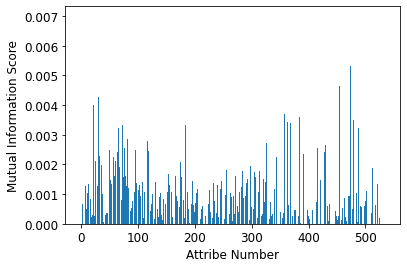

In [355]:

def select_features(X_train, y_train, X_test):
    '''
    Calculates feature scores using mutual information classification with target label
    '''
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)  
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# print out what are scores for the features
#for i in range(len(fs.scores_)):
    #print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Attribe Number')
plt.ylabel('Mutual Information Score')
plt.show()

In [718]:
# select columns with top k features
for k in range(100,500,100):

    ind_sorted = np.argsort(fs.scores_)
    ind_sorted = np.flipud(ind_sorted)


    ind_top_k = ind_sorted[:k]

    fs.scores_[ind_sorted[:k]]

    X_train_topk = X_train.iloc[:,ind_sorted[:k]]
    X_test_topk = X_test.iloc[:,ind_sorted[:k]]
    print('size of features selected is '+str(k))

    clf_choice = [LogisticRegression(random_state=0, max_iter = 3000, C  = 0.008),
                  GaussianNB(), BernoulliNB(),
                  DecisionTreeClassifier(),
                  RandomForestClassifier(n_estimators=100),
                  AdaBoostClassifier(),
                  GradientBoostingClassifier(random_state=0)]
    clf_name = ['lr','gnb','bnb','dt','rf','ada','gb']
    auc_score = []
    fpr_benchmark = []
    tpr_benchmark = []

    for ind in range(len(clf_choice)):
        clf = clf_choice[ind]
        name = clf_name[ind]

        print('Training classifier: '+name)
 
        # train using topk  data
        clf.fit(X_train_topk, y_train)

        # fit and test score using original dataset
        y_pred = clf.predict_proba(X_test_topk)[:,1]

        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score.append(auc(fpr, tpr))

        #plt.plot(fpr, tpr, label= name)
        fpr_benchmark.append(fpr)
        tpr_benchmark.append(tpr)
        print('AUC Score for classifier {} trained on entire set with top {} features is {}'.format(name, k, auc(fpr,tpr)))

        
         # train using upsampled data
        clf.fit(X_train, y_train)

        # fit and test score using original dataset
        y_pred = clf.predict_proba(X_test)[:,1]

        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score.append(auc(fpr, tpr))

        #plt.plot(fpr, tpr, label= name)
        fpr_benchmark.append(fpr)
        tpr_benchmark.append(tpr)
        print('AUC Score for classifier {} trained on entire set of training data is {}'.format(name, auc(fpr,tpr)))


size of features selected is 100
Training classifier: lr
AUC Score for classifier lr trained on entire set with top 100 features is 0.7518316902297054
AUC Score for classifier lr trained on entire set of training data is 0.7369479784430656
Training classifier: gnb
AUC Score for classifier gnb trained on entire set with top 100 features is 0.6791824165052821
AUC Score for classifier gnb trained on entire set of training data is 0.6311826688684438
Training classifier: bnb
AUC Score for classifier bnb trained on entire set with top 100 features is 0.690928961598739
AUC Score for classifier bnb trained on entire set of training data is 0.6535792136875926
Training classifier: dt
AUC Score for classifier dt trained on entire set with top 100 features is 0.49637227955254914
AUC Score for classifier dt trained on entire set of training data is 0.5015971570741234
Training classifier: rf
AUC Score for classifier rf trained on entire set with top 100 features is 0.7117491510174075
AUC Score for c

It turns out that the best classifier is still the Gradient Boosting Classifier. We go on to optimize for number of features selected for training. 

In [735]:
# select columns with top k features
k_range = list(range(370,X_train.shape[1],10))
k_range.append(X_train.shape[1])

auc_score_k, auc_score_k_std = [],[]
for k in k_range:

    ind_sorted = np.argsort(fs.scores_)
    ind_sorted = np.flipud(ind_sorted)


    ind_top_k = ind_sorted[:k]

    fs.scores_[ind_sorted[:k]]

    X_train_topk = X_train.iloc[:,ind_sorted[:k]]
    X_test_topk = X_test.iloc[:,ind_sorted[:k]]
    print('size of features selected is '+str(k))


    clf = GradientBoostingClassifier(random_state=0)
    name = 'gb'

    cv = KFold(n_splits=3)
    cv_clf = clf
    val_scores = 0
    val_scores_list = []
    for train_ind, test_ind in cv.split(X_train_topk, y_train):
        X_train_cv = X_train_topk.loc[X_train_topk.index.intersection(train_ind)]
        y_train_cv = y_train.loc[y_train.index.intersection(train_ind)]
        X_test_cv = X_train_topk.loc[X_train_topk.index.intersection(test_ind)]
        y_test_cv = y_train.loc[y_train.index.intersection(test_ind)]


        cv_clf.fit(X_train_cv, y_train_cv)
        y_pred = cv_clf.predict_proba(X_test_cv)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test_cv, y_pred)

        val_scores += auc(fpr,tpr)
        val_scores_list.append(auc(fpr,tpr))
    val_scores /= n_splits
    val_scores_std = statistics.stdev(val_scores_list)

    auc_score_k.append(val_scores)
    auc_score_k_std.append(val_scores_std)
    print('AUC score for classifier {} with top {} features is {} +/- {}'.format(name,k, val_scores, val_scores_std))


size of features selected is 370
AUC score for classifier gb with top 370 features is 0.7550879643822968 +/- 0.022242972280427136
size of features selected is 380
AUC score for classifier gb with top 380 features is 0.759016739496912 +/- 0.025408313211969825
size of features selected is 390
AUC score for classifier gb with top 390 features is 0.7552326272209182 +/- 0.0346387572146526
size of features selected is 400
AUC score for classifier gb with top 400 features is 0.7508455023651835 +/- 0.032718341231954516
size of features selected is 410
AUC score for classifier gb with top 410 features is 0.7510231030090191 +/- 0.03946735086387556
size of features selected is 420
AUC score for classifier gb with top 420 features is 0.7454743172041804 +/- 0.03325184675892662
size of features selected is 430
AUC score for classifier gb with top 430 features is 0.7487446029815396 +/- 0.030605605255503765
size of features selected is 440
AUC score for classifier gb with top 440 features is 0.7479417

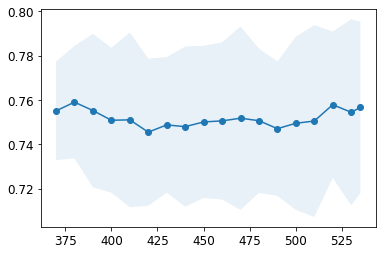

In [736]:
# find top k features to select
plt.plot(k_range, auc_score_k, marker = 'o')
std_auc_abs_k = [abs(x) for x in auc_score_k_std]

y1 = [x + y for x, y in zip(auc_score_k,std_auc_abs_k)] 
y2 = [x - y for x, y in zip(auc_score_k,std_auc_abs_k)] 
plt.fill_between(k_range, y1, y2, alpha = 0.1)


plt.show()

In [741]:
k_optimal = k_range[auc_score_k.index(max(auc_score_k))]
k_optimal

380

The optimal number of features is 380 and we go on to grid-search for classifier parameters. 

In [744]:
# gridsearch CV on learning_rate and number of estimators
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        learning_rate=0.1, min_samples_split=150, 
        min_samples_leaf=50, max_depth=8, 
        max_features='sqrt',subsample=0.8,random_state=10), 
    param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

X_train_topk = X_train.iloc[:,ind_sorted[:k_optimal]]
X_test_topk = X_test.iloc[:,ind_sorted[:k_optimal]]
gsearch1.fit(X_train_topk, y_train)

print("Best parameters set found on development set:")
print()
print(gsearch1.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("AUC score:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true =  y_test
y_pred = gsearch1.predict_proba(X_test_topk)[:,1]
print(roc_auc_score(y_true, y_pred))
print()

Best parameters set found on development set:

{'n_estimators': 30}

Grid scores on development set:

0.704 (+/-0.043) for {'n_estimators': 20}
0.711 (+/-0.054) for {'n_estimators': 30}
0.709 (+/-0.051) for {'n_estimators': 40}
0.701 (+/-0.058) for {'n_estimators': 50}
0.705 (+/-0.061) for {'n_estimators': 60}
0.699 (+/-0.060) for {'n_estimators': 70}
0.694 (+/-0.059) for {'n_estimators': 80}

AUC score:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.7483166645636404



In [786]:
# gridsearch CV on tree features (part 1)
param_test2 = {'max_depth':range(3,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(
    estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=30, 
                                           max_features='sqrt', subsample=0.8, random_state=10), 
    param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5, verbose = 10)

gsearch2.fit(X_train_topk, y_train)

print("Best parameters set found on development set:")
print()
print(gsearch2.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch2.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("AUC score:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true =  y_test
y_pred = gsearch2.predict_proba(X_test_topk)[:,1]
print(roc_auc_score(y_true, y_pred))
print()


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   23.3s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   28.7s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   36.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   42.8s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:   52.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 175 out of 175 | elapsed:  1.2min finished


Best parameters set found on development set:

{'max_depth': 5, 'min_samples_split': 600}

Grid scores on development set:

0.735 (+/-0.034) for {'max_depth': 3, 'min_samples_split': 200}
0.735 (+/-0.041) for {'max_depth': 3, 'min_samples_split': 400}
0.737 (+/-0.041) for {'max_depth': 3, 'min_samples_split': 600}
0.737 (+/-0.040) for {'max_depth': 3, 'min_samples_split': 800}
0.737 (+/-0.037) for {'max_depth': 3, 'min_samples_split': 1000}
0.734 (+/-0.042) for {'max_depth': 5, 'min_samples_split': 200}
0.743 (+/-0.034) for {'max_depth': 5, 'min_samples_split': 400}
0.746 (+/-0.028) for {'max_depth': 5, 'min_samples_split': 600}
0.735 (+/-0.017) for {'max_depth': 5, 'min_samples_split': 800}
0.740 (+/-0.029) for {'max_depth': 5, 'min_samples_split': 1000}
0.706 (+/-0.036) for {'max_depth': 7, 'min_samples_split': 200}
0.724 (+/-0.033) for {'max_depth': 7, 'min_samples_split': 400}
0.731 (+/-0.035) for {'max_depth': 7, 'min_samples_split': 600}
0.727 (+/-0.034) for {'max_depth': 7, 'min

In [787]:
# gridsearch CV on tree features (part 1)
param_test2 = {'max_depth':range(3,16,2), 'min_samples_split':range(10,201,20)}
gsearch2 = GridSearchCV(
    estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=30, 
                                           max_features='sqrt', subsample=0.8, random_state=10), 
    param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5, verbose = 10)

gsearch2.fit(X_train_topk, y_train)

print("Best parameters set found on development set:")
print()
print(gsearch2.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch2.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("AUC score:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true =  y_test
y_pred = gsearch2.predict_proba(X_test_topk)[:,1]
print(roc_auc_score(y_true, y_pred))
print()


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   18.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   26.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   32.0s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:   39.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   46.8s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:   57.4s
[Parallel(

Best parameters set found on development set:

{'max_depth': 3, 'min_samples_split': 10}

Grid scores on development set:

0.745 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 10}
0.739 (+/-0.021) for {'max_depth': 3, 'min_samples_split': 30}
0.737 (+/-0.024) for {'max_depth': 3, 'min_samples_split': 50}
0.736 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 70}
0.737 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 90}
0.736 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 110}
0.736 (+/-0.026) for {'max_depth': 3, 'min_samples_split': 130}
0.735 (+/-0.030) for {'max_depth': 3, 'min_samples_split': 150}
0.734 (+/-0.031) for {'max_depth': 3, 'min_samples_split': 170}
0.734 (+/-0.031) for {'max_depth': 3, 'min_samples_split': 190}
0.725 (+/-0.057) for {'max_depth': 5, 'min_samples_split': 10}
0.716 (+/-0.033) for {'max_depth': 5, 'min_samples_split': 30}
0.724 (+/-0.034) for {'max_depth': 5, 'min_samples_split': 50}
0.725 (+/-0.022) for {'max_depth': 5, 'min_samples_sp

In [788]:
# gridsearch CV on tree features (part 1)
param_test2 = {'max_depth':range(3,16,2), 'min_samples_split':range(2,11,2)}
gsearch2 = GridSearchCV(
    estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=30, 
                                           max_features='sqrt', subsample=0.8, random_state=10), 
    param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5, verbose = 10)

gsearch2.fit(X_train_topk, y_train)

print("Best parameters set found on development set:")
print()
print(gsearch2.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch2.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("AUC score:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true =  y_test
y_pred = gsearch2.predict_proba(X_test_topk)[:,1]
print(roc_auc_score(y_true, y_pred))
print()


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   14.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   24.7s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   32.0s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   42.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   52.3s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 175 out of 175 | elapsed:  1.9min finished


Best parameters set found on development set:

{'max_depth': 3, 'min_samples_split': 8}

Grid scores on development set:

0.741 (+/-0.026) for {'max_depth': 3, 'min_samples_split': 2}
0.743 (+/-0.020) for {'max_depth': 3, 'min_samples_split': 4}
0.742 (+/-0.016) for {'max_depth': 3, 'min_samples_split': 6}
0.745 (+/-0.022) for {'max_depth': 3, 'min_samples_split': 8}
0.745 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 10}
0.732 (+/-0.028) for {'max_depth': 5, 'min_samples_split': 2}
0.733 (+/-0.035) for {'max_depth': 5, 'min_samples_split': 4}
0.710 (+/-0.030) for {'max_depth': 5, 'min_samples_split': 6}
0.720 (+/-0.054) for {'max_depth': 5, 'min_samples_split': 8}
0.725 (+/-0.057) for {'max_depth': 5, 'min_samples_split': 10}
0.687 (+/-0.034) for {'max_depth': 7, 'min_samples_split': 2}
0.691 (+/-0.029) for {'max_depth': 7, 'min_samples_split': 4}
0.721 (+/-0.027) for {'max_depth': 7, 'min_samples_split': 6}
0.702 (+/-0.044) for {'max_depth': 7, 'min_samples_split': 8}
0.713 (+

In [790]:
# gridsearch CV on tree features (part 2)

param_test3 = {'min_samples_leaf':range(1,121,10)}
gsearch3 = GridSearchCV(estimator = 
                        GradientBoostingClassifier(learning_rate=0.1, 
                                                   n_estimators=30,
                                                   max_depth=3,
                                                   max_features='sqrt', 
                                                   min_samples_split = 8,
                                                   subsample=0.8, 
                                                   random_state=10), 
                        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 10)


gsearch3.fit(X_train_topk, y_train)

print("Best parameters set found on development set:")
print()
print(gsearch3.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch3.cv_results_['mean_test_score']
stds = gsearch3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("AUC score:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true =  y_test
y_pred = gsearch3.predict_proba(X_test_topk)[:,1]
print(roc_auc_score(y_true, y_pred))
print()


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   12.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   12.0s finished
C:\Users\Dennis\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best parameters set found on development set:

{'min_samples_leaf': 1}

Grid scores on development set:

0.745 (+/-0.022) for {'min_samples_leaf': 1}
0.733 (+/-0.027) for {'min_samples_leaf': 11}
0.737 (+/-0.028) for {'min_samples_leaf': 21}
0.734 (+/-0.040) for {'min_samples_leaf': 31}
0.738 (+/-0.033) for {'min_samples_leaf': 41}
0.737 (+/-0.037) for {'min_samples_leaf': 51}
0.737 (+/-0.037) for {'min_samples_leaf': 61}
0.738 (+/-0.031) for {'min_samples_leaf': 71}
0.734 (+/-0.042) for {'min_samples_leaf': 81}
0.733 (+/-0.045) for {'min_samples_leaf': 91}
0.735 (+/-0.049) for {'min_samples_leaf': 101}
0.735 (+/-0.042) for {'min_samples_leaf': 111}

AUC score:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.7564064583024737



In [798]:
# gridsearch CV on tree features (part 4)
param_test5 = {'subsample':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        learning_rate=0.1, 
        n_estimators=30,
        max_depth=3,
        min_samples_split=8, 
        min_samples_leaf=1, 
        max_features=None,
        random_state=10),
    param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 10)


gsearch5.fit(X_train_topk, y_train)

print("Best parameters set found on development set:")
print()
print(gsearch5.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch5.cv_results_['mean_test_score']
stds = gsearch5.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch5.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("AUC score:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true =  y_test
y_pred = gsearch5.predict_proba(X_test_topk)[:,1]
print(roc_auc_score(y_true, y_pred))
print()

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   30.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   38.6s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   59.5s
[Parallel(n_jobs=4)]: Done  43 out of  45 | elapsed:  1.3min remaining:    3.6s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  1.4min finished
C:\Users\Dennis\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best parameters set found on development set:

{'subsample': 0.8}

Grid scores on development set:

0.762 (+/-0.021) for {'subsample': 0.5}
0.763 (+/-0.026) for {'subsample': 0.55}
0.770 (+/-0.015) for {'subsample': 0.6}
0.763 (+/-0.022) for {'subsample': 0.65}
0.767 (+/-0.017) for {'subsample': 0.7}
0.761 (+/-0.012) for {'subsample': 0.75}
0.771 (+/-0.016) for {'subsample': 0.8}
0.768 (+/-0.014) for {'subsample': 0.85}
0.765 (+/-0.028) for {'subsample': 0.9}

AUC score:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.7729186439686119



In [800]:
param_test6 = {'learning_rate':[0.1, 0.05,0.01,0.005,0.001,0.0005],
                'n_estimators': [30,60,300,600]}

gsearch6 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        subsample = 0.8,
        max_depth=3,
        min_samples_split=8, 
        min_samples_leaf=1, 
        max_features=None,
        random_state=10),
    param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5, verbose = 10)

gsearch6.fit(X_train_topk, y_train)

print("Best parameters set found on development set:")
print()
print(gsearch6.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch6.cv_results_['mean_test_score']
stds = gsearch6.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch6.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("AUC score:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true =  y_test
y_pred = gsearch6.predict_proba(X_test_topk)[:,1]
print(roc_auc_score(y_true, y_pred))
print()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   39.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 12.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 15.6min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 19.7min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 22.1min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 26.0min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed: 32.4min finished


Best parameters set found on development set:

{'learning_rate': 0.1, 'n_estimators': 30}

Grid scores on development set:

0.771 (+/-0.016) for {'learning_rate': 0.1, 'n_estimators': 30}
0.769 (+/-0.010) for {'learning_rate': 0.1, 'n_estimators': 60}
0.733 (+/-0.012) for {'learning_rate': 0.1, 'n_estimators': 300}
0.704 (+/-0.024) for {'learning_rate': 0.1, 'n_estimators': 600}
0.764 (+/-0.019) for {'learning_rate': 0.05, 'n_estimators': 30}
0.764 (+/-0.021) for {'learning_rate': 0.05, 'n_estimators': 60}
0.752 (+/-0.018) for {'learning_rate': 0.05, 'n_estimators': 300}
0.736 (+/-0.023) for {'learning_rate': 0.05, 'n_estimators': 600}
0.766 (+/-0.016) for {'learning_rate': 0.01, 'n_estimators': 30}
0.764 (+/-0.019) for {'learning_rate': 0.01, 'n_estimators': 60}
0.766 (+/-0.019) for {'learning_rate': 0.01, 'n_estimators': 300}
0.765 (+/-0.019) for {'learning_rate': 0.01, 'n_estimators': 600}
0.763 (+/-0.022) for {'learning_rate': 0.005, 'n_estimators': 30}
0.762 (+/-0.018) for {'learn

In [802]:
param_test7 = [{'learning_rate': [0.001,0.003,0.005,0.007,0.01],
                    'n_estimators':[300,500,600,700,800,900,1000,1500,2000]}]

gsearch7 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        subsample = 0.8,
        max_depth=3,
        min_samples_split=8, 
        min_samples_leaf=1, 
        max_features=None,
        random_state=10),
    param_grid = param_test7, scoring='roc_auc',n_jobs=4, cv=5, verbose = 100)

gsearch7.fit(X_train_topk, y_train)

print("Best parameters set found on development set:")
print()
print(gsearch7.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch7.cv_results_['mean_test_score']
stds = gsearch7.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch7.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("AUC score:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true =  y_test
y_pred = gsearch7.predict_proba(X_test_topk)[:,1]
print(roc_auc_score(y_true, y_pred))
print()

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:  8.0min
[Parallel

[Parallel(n_jobs=4)]: Done 133 tasks      | elapsed: 128.6min
[Parallel(n_jobs=4)]: Done 134 tasks      | elapsed: 129.3min
[Parallel(n_jobs=4)]: Done 135 tasks      | elapsed: 129.8min
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed: 130.6min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 131.1min
[Parallel(n_jobs=4)]: Done 138 tasks      | elapsed: 131.8min
[Parallel(n_jobs=4)]: Done 139 tasks      | elapsed: 132.8min
[Parallel(n_jobs=4)]: Done 140 tasks      | elapsed: 133.2min
[Parallel(n_jobs=4)]: Done 141 tasks      | elapsed: 133.9min
[Parallel(n_jobs=4)]: Done 142 tasks      | elapsed: 134.9min
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed: 135.3min
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed: 135.3min
[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed: 136.0min
[Parallel(n_jobs=4)]: Done 146 tasks      | elapsed: 137.3min
[Parallel(n_jobs=4)]: Done 147 tasks      | elapsed: 137.7min
[Parallel(n_jobs=4)]: Done 148 tasks      | elapsed: 137.8min
[Paralle

0.7821358427009443



In [805]:
param_test8 = [{'learning_rate': [0.004,0.0045,0.005,0.0055,0.006],
                    'n_estimators':[800,900,1000,1100,1200]}]

gsearch8 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        subsample = 0.8,
        max_depth=3,
        min_samples_split=8, 
        min_samples_leaf=1, 
        max_features=None,
        random_state=10),
    param_grid = param_test8, scoring='roc_auc',n_jobs=4, cv=5, verbose = 100)

gsearch8.fit(X_train_topk, y_train)

print("Best parameters set found on development set:")
print()
print(gsearch8.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch8.cv_results_['mean_test_score']
stds = gsearch8.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch8.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("AUC score:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true =  y_test
y_pred = gsearch8.predict_proba(X_test_topk)[:,1]
print(roc_auc_score(y_true, y_pred))
print()

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 10.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed: 11.2min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed: 11.2min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed: 14.5min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed: 14.9min
[Parallel

0.7827205754611571



In [368]:
clf_optimal_topk =  GradientBoostingClassifier(
    learning_rate = 0.005, max_depth=3,
    n_estimators = 1100,
    min_samples_split=8, 
    min_samples_leaf=1, 
    max_features=None,
    subsample = 0.8,
    random_state=10)

k_optimal = 380
ind_sorted = np.argsort(fs.scores_)
ind_sorted = np.flipud(ind_sorted)
    
clf_optimal_topk.fit(df_scaled_mailout.iloc[:,ind_sorted[:k_optimal]], y_mailout_train)
clf_optimal_topk

GradientBoostingClassifier(learning_rate=0.005, min_samples_split=8,
                           n_estimators=1100, random_state=10, subsample=0.8)

### Benchmark Classifier Performance with Upsampling

It seems like upsampling minority class does not help improve classifier performance.

In [364]:
# upsampling 


from imblearn.over_sampling import SMOTE
X_resampled_train, y_resampled_train = SMOTE(sampling_strategy = 'auto', k_neighbors = 1).fit_resample(X_train, y_train)
print('finished resampling')

gb1 = GradientBoostingClassifier(random_state = 10)
gb2 = GradientBoostingClassifier(random_state = 10)

gb1.fit(X_train, y_train)
y_pred = gb1.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred))

gb2.fit(X_resampled_train, y_resampled_train)
y_pred = gb2.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred))

finished resampling
0.7705351379128104
0.6610010679716402


In [366]:
# test if sampling_strategy makes any difference
for sample_ratio in [0.1,0.2,0.5,0.7]:
    X_resampled_train, y_resampled_train = SMOTE(sampling_strategy = sample_ratio, k_neighbors = 1).fit_resample(X_train, y_train)
    gb2.fit(X_resampled_train, y_resampled_train)
    y_pred = gb2.predict_proba(X_test)[:,1]
    print('AUC-ROC score for sample ratio of {} is {}'.format(sample_ratio, roc_auc_score(y_test, y_pred)))

AUC-ROC score for sample ratio of 0.1 is 0.705033867867769
AUC-ROC score for sample ratio of 0.2 is 0.6907479184610967
AUC-ROC score for sample ratio of 0.5 is 0.6725876001909182
AUC-ROC score for sample ratio of 0.7 is 0.67112942572751


## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
#mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')

In [369]:
mailout_test = pd.read_csv('data/mailout_test.csv')
del mailout_test['Unnamed: 0']
mailout_test.shape

C:\Users\Dennis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(42833, 366)

In [370]:
df_cleaned_mailout_test, df_scaled_mailout_test, df_pca_mailout_test = \
df_clean_scale_pca_population(mailout_test,df_cleaned_mailout, 2, 1, 
                              0.6, columns_na_mailout, 0.2,1,
                                  column_encode_mailout, column_remain_mailout, column_binary_mailout, prefix_list_encode_mailout, 
                                  fill_na_cols_cat_mailout, drop_na_cols_cat_mailout, 0,d19_letzer_dict_mailout,
                                  col_name_likely_rank_mailout,col_name_likely_normal_mailout, 
                                 rank_scaler_mailout,  numeric_scaler_mailout, pca_fitted_mailout,2)

Finished step 1 of cleaning
Processed 0.1780636425186188 rows with higher than 0.6 NA fraction
Dropped 5 columns
Dropped following columns:
['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'TITEL_KZ']
Finished step 3a of cleaning - filling NA for 339 numerical columns
Finished step 3b of cleaning - Encoded 41 columns, dropped 2 columns and found 3         binary columns
Columns we have not processed: 
['LNR']
Finished cleaning step
Finished scaling step
Finished PCA step
Finished processing population dataset in 0 minutes


### Use Optimized Classifiers for Prediction

In [ ]:
# predict
y_mailout_test = clf_optimal.predict_proba(df_scaled_mailout_test)[:,1]
lnr_mailout_test = mailout_test['LNR']

In [ ]:
# combine LNR with y probability
df_mailout_test = pd.DataFrame({'LNR': lnr_mailout_test, 'RESPONSE': y_mailout_test})
df_mailout_test.shape

In [700]:
df_mailout_test.to_csv('submission3_mailout.csv',index=False)

### Use Classifier Trained on Top K features for Prediction

In [372]:
# predict
y_mailout_test = clf_optimal_topk.predict_proba(df_scaled_mailout_test.iloc[:,ind_sorted[:k_optimal]])[:,1]
lnr_mailout_test = mailout_test['LNR']

In [373]:
# combine LNR with y probability
df_mailout_test = pd.DataFrame({'LNR': lnr_mailout_test, 'RESPONSE': y_mailout_test})
df_mailout_test.shape

(42833, 2)

In [374]:
df_mailout_test.to_csv('submission4_mailout_v2.csv',index=False)

This classifier slightly improved upon previous submission without selecting top features. We go on to interpret the best model.

### Interpret Best Model

We interpret the gradient-boosted classifier using following methods:

- Gini importance/Gain, which is the change in loss function when split at the node/feature
SHAP values, which is a recently proposed feature attribution method that averages difference in predictions over all possible orderings of the features

Then we take a look at how specific values of some attributes affect the SHAP values.

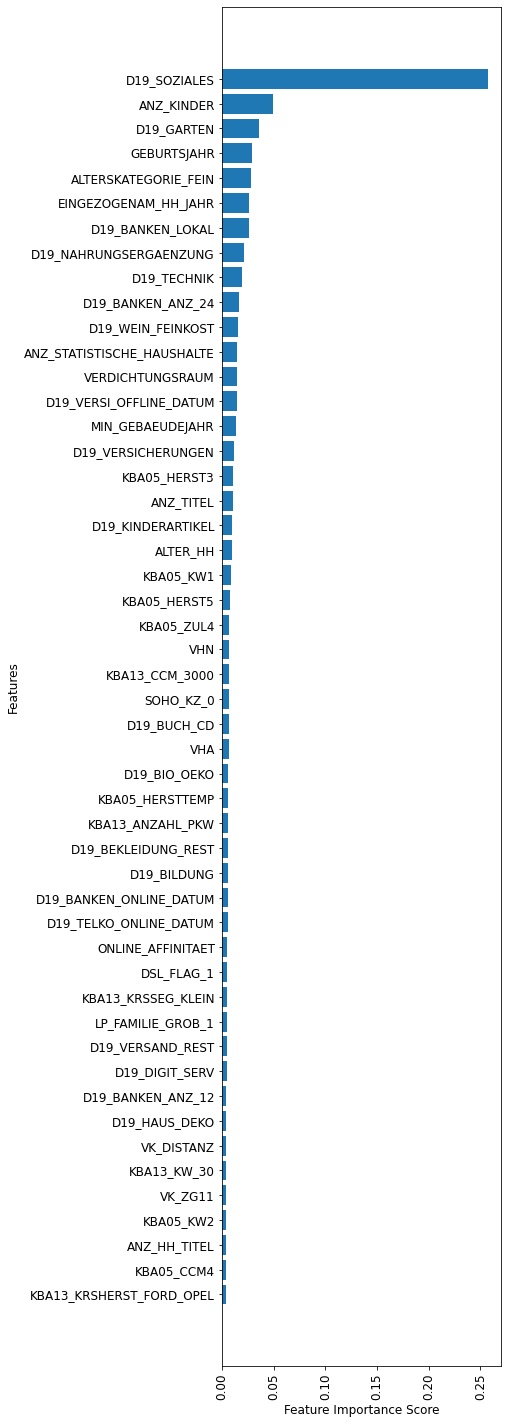

In [375]:
predictors = list( df_scaled_mailout_test.columns[ind_sorted[:k_optimal]])

fig,ax=plt.subplots(figsize=(5,25))
# plot top 100 features
feat_imp = pd.Series(clf_optimal_topk.feature_importances_, predictors).sort_values(ascending=False)

select_top = 50
ax.barh( feat_imp[:select_top].index, feat_imp[:select_top].values)
plt.xticks(rotation = 'vertical')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance Score')
ax.set_ylabel('Features')
plt.show()

We also try another method of interpretation using mean(|Tree SHAP|) value. Same time, we plot how the SHAP values, which denote contribution from a feature, depends on the specific value of the feature in dependence plots.

In [376]:
def interpret_shap(reg_select, X_new_train, cols_interpret, standard_cols, scaler_standard,
                  min_max_cols, scalar_minmax):
    '''
    Interpret ML model using SHAP package
    - plot most important features by SHAP value (impact on model)
    - output dependence plot for variables in cols_interpret (i.e. how this attributes' impact on model changes
    with respect to different values of this attribute)
    - output characteristics (aka mean, standard deviation, etc.) for the variable
    
    INPUT:
    reg_select        machine learning model to interpret
    X_new_train       (pandas dataframe) dataset the model is traiend on
    cols_interpret    (list) of data attributes to interpret
    standard_cols     (list) of column names scaled using standard scaler
    min_max_cols      (list) of column names scaled using min-max scaler
    scaler_standard   (scikit learn class) standard scalar fitted to listing dataset's columns in standard_cols
    scaler_minmax     (scikit learn class) min-max scalar fitted to listing dataset's columns in min_max_cols
    
    OUTPUT:
    shap_values       SHAP values for the models' attributes
    
    '''
    
    explainer = shap.TreeExplainer(reg_select)
    shap_values = explainer.shap_values(X_new_train)

    shap.summary_plot(shap_values, X_new_train)
    
    for col in cols_interpret: 
        shap.dependence_plot(col, shap_values, X_new_train)
        if col in standard_cols:
            print('Mean of {} is {} with std of {}'.format(col, scaler_standard.mean_[standard_cols.index(col)],
                                                                     math.sqrt(scaler_standard.var_[standard_cols.index(col)])))
        elif col in min_max_cols:
            print('Min of {} is {} with max of {}'.format(col, scalar_minmax.data_min_[min_max_cols.index(col)],
                                                                     scalar_minmax.data_max_[min_max_cols.index(col)]))
    return shap_values

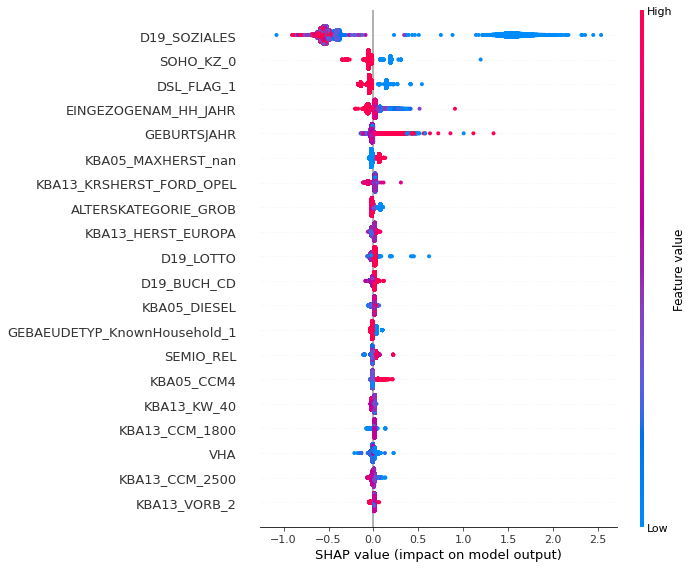

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


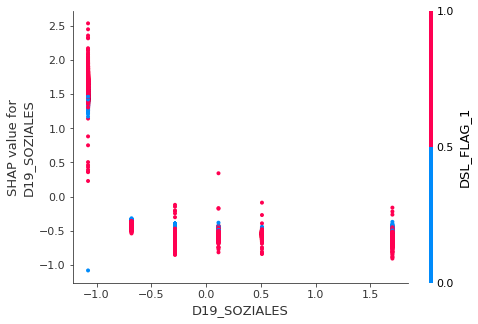

Mean of D19_SOZIALES is 3.7150505097528046 with std of 2.52035911211287


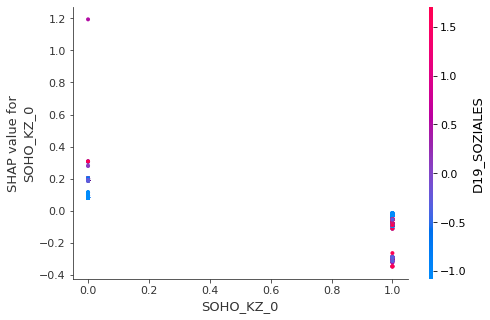

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


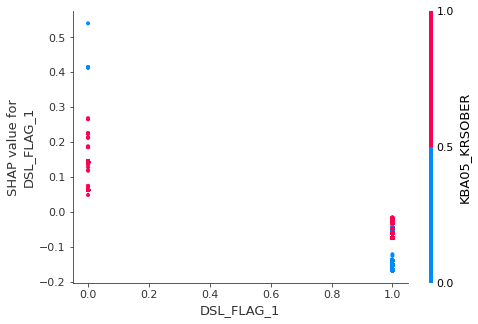

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


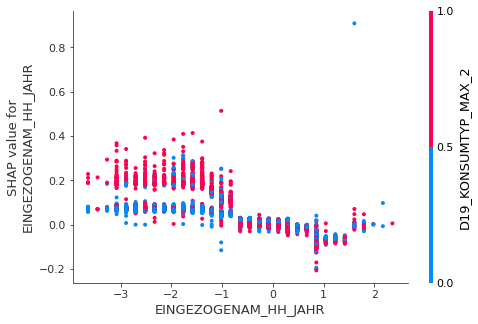

Mean of EINGEZOGENAM_HH_JAHR is 19.43026395419208 with std of 5.332035550320553


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


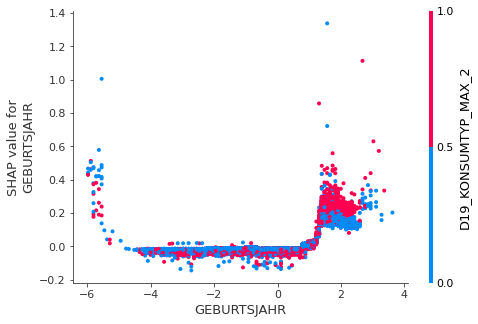

Mean of GEBURTSJAHR is 70.74954611051626 with std of 11.668477655472689


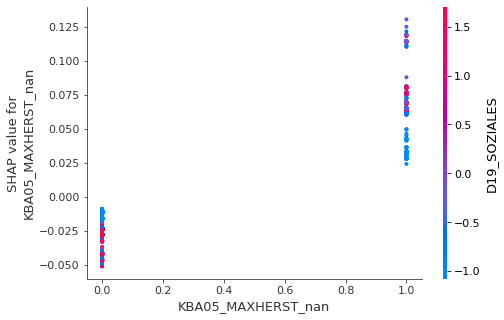

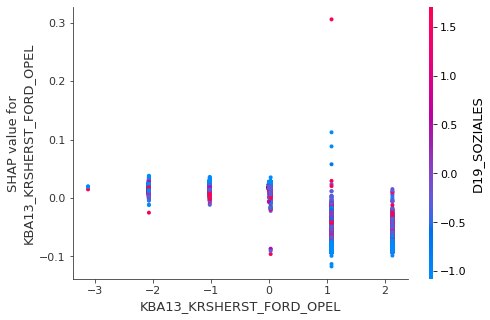

Mean of KBA13_KRSHERST_FORD_OPEL is 2.9721142857142855 with std of 0.9533212293819076


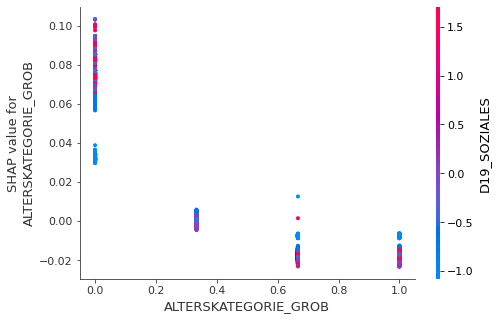

Min of ALTERSKATEGORIE_GROB is 1.0 with max of 4.0


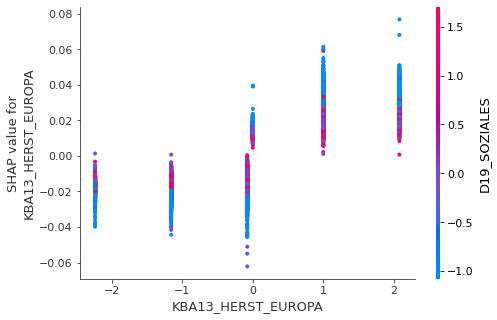

Mean of KBA13_HERST_EUROPA is 3.0742000000000003 with std of 0.927675322828762


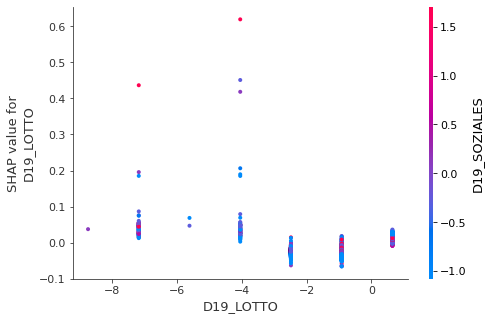

Mean of D19_LOTTO is 7.583957916298124 with std of 0.6385149275411711


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


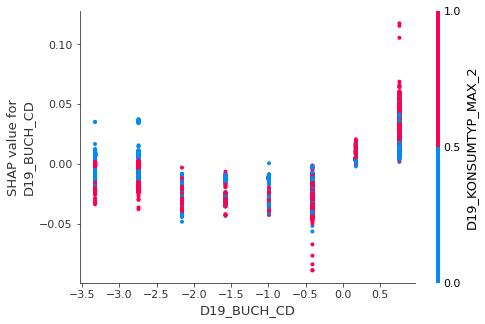

Mean of D19_BUCH_CD is 6.699711372841115 with std of 1.7128275276015672


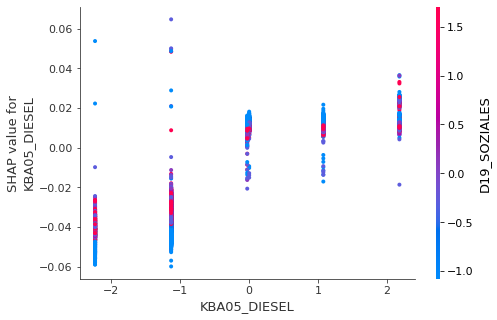

Mean of KBA05_DIESEL is 2.0256107983849576 with std of 0.9047915451861237


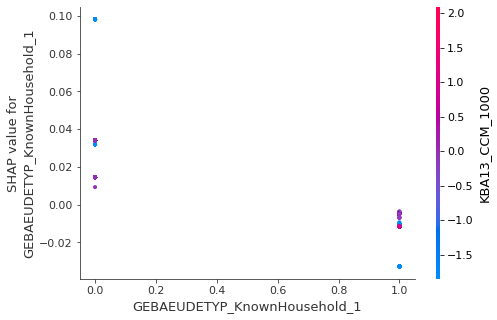

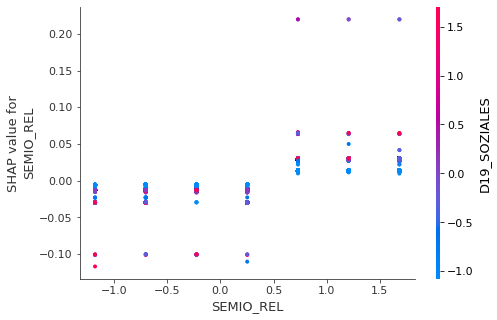

Mean of SEMIO_REL is 3.471789022857409 with std of 2.0961941228460073


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


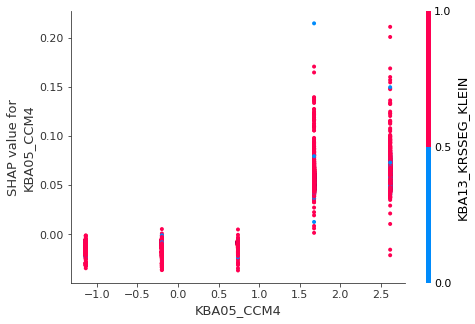

Mean of KBA05_CCM4 is 1.2107676551370978 with std of 1.067335180342353


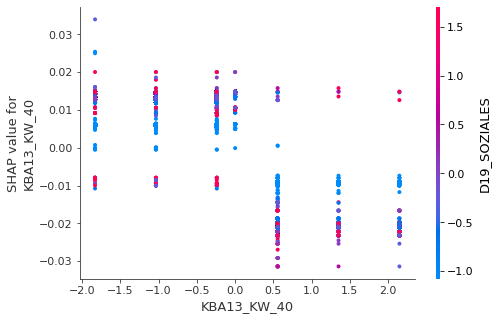

Mean of KBA13_KW_40 is 2.3016 with std of 1.2561687125032797


In [382]:
import shap
cols_interpret = ['D19_SOZIALES','SOHO_KZ_0','DSL_FLAG_1','EINGEZOGENAM_HH_JAHR',
                 'GEBURTSJAHR','KBA05_MAXHERST_nan','KBA13_KRSHERST_FORD_OPEL',
                 'ALTERSKATEGORIE_GROB','KBA13_HERST_EUROPA','D19_LOTTO',
                 'D19_BUCH_CD','KBA05_DIESEL','GEBAEUDETYP_KnownHousehold_1',
                 'SEMIO_REL','KBA05_CCM4','KBA13_KW_40']

shap_values_gbr = interpret_shap(clf_optimal_topk, df_scaled_mailout.iloc[:,ind_sorted[:k_optimal]], cols_interpret, col_name_likely_normal_mailout, numeric_scaler_mailout,
                  col_name_likely_rank_mailout, rank_scaler_mailout)


We observe first that feature importance calcualted from the methods above are not consistent. As suggested by [this article](https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27), the inconsistency is possibly because the Gini importance (entropy) are dependent on location of the feature in the tree. A disportionate weight, aka more contribution, is given to features split at deeper levels and closer to leaves. Let's take a look at mean (|Tree SHAP|) values.

Interestingly, many of these important features 

Let's take a look at some most important features and how their contribution depends on their specific values. 
- D19_SOZIALES: Multiple buyer activity in this cateogry leads to higher chance to respond to mail-out campaign; all other values (2-7) have slightly negative contribution, and the effects don't differ much between these several categories. This suggests only multiple buyer activity lead to higher response rate, while other buyers are indifferent.   

- SOHO_KZ_0, DSL_FLAG_1: No information provided. Not belonging to this group contributes to higher chance of response.   

- EINGEZOGENAM_HH_JAHR: It seems this attribute entails insert year of customer in the system. We've cleaned attribute to the year to 2018, so larger the attribute is, the longer the customer has been entered in the system. There is a positive contribution to response chance, when the insert time is roughly shorter than 14-19 years. Naively, without better information on this attribute, we can say that newer customers in the client's database have higher chance to respond to campagin.  

- GEBURTSJAHR: From our data cleaning process, this attribute means age at year 2018. We see that there is a positive contribution for response rate, when the age is either older than 80 years or smaller than 25 years. Other age groups don't show much contribution from this age feature.   

- KBA05_MAXHERST_nan: This indicates the most common build in the community is unknown. When this is true, there is a higher response chance. It's likely that this unknown value correlates with some other attribute of the community.

- KBA13_KRSHERST_FORD_OPEL: Share of ownership of Ford/Opel cars. Higher ownership suggests lower chance to reply.

- ALTERSKATEGORIE_GROB: Age through pre-name analysis. This suggests that <30 year is more likely to respond.

- KBA13_HERST_EUROPA: Higher share of European cars contributes positively. 

- D19_LOTTO: There is a small positive contribution for multi-buyer, double-buyer activities in LOTTO product group.

- D19_BUCH_CD: There is a positivie contribution for fewer transaction activities in book and cd segments.



From the above, we see that many important features are not intuitively related to the behavior of responding to mail-out campaigns. This is an indication that our model is able to capture many hidden relations.

### Part 4: Reflections and Summary

#### Project Summary

The project aims to (1) understand the demographic difference between customers and the general population, and to (2) predict whether a NEW customer with demographics information can respond to the company's mail-out campaign. 

1. Processing Pipeline  
The solution I provided solves the problem by first building a data processing (cleaning and scaling) pipeline. This pipeline is used for both customer segmentation and mail-out prediction. Since the pipeline needs to clean both customer and population dataset, as well as training and testing datasets, the pipelien is built in a way that can be fitted to the customer/train dataset, and then can be used to transform the exact same way our test/population datasets. 

The data processing pipeline has 3 steps: cleaning, scaling and feature reduction. The cleaning step processes some unique columns, cleans missing data (drop rows/columns with almost all missing values, fill in missing values for numerical attibutes, processes missing values in categorical columns) and finally encodes categorical columns. The scaling step then scales both ordinal and numerical data, and keeps categorical attributes. The feature reduction step uses PCA to extract latent features within the dataset.

We identified two large clusters in the first place, one that contains entries with many missing attributes (which we deem as SUB-CLUSTER) and one that do not have many missing attributes (which we deem as MAIN-CLUSTER). 

A few parameters are chosen for the pipeline in order to automate optimization of the processing pipeline. For example, one can choose what categorical columns to include or not: those with number of categories higher than a certain threshold are dropped, while those with fewer categories are encoded. Other parameters include how to choose min-max scaler vs standard scaler, which missing values are filled or dropped. This way, we can tailor the pipeline to our problem at hand.

2. Customer Segmentation  
To perform customer segmentation, we use KMeans method to cluster customers. The processing pipeline parametesr are tuned such that one can achieve a fairly robust clustering result, with a certain number of clusters. Four metrics were used to increase robustness of our algorithm. 

To interpret the segmented customers, we then use inverse-transform and scaling to derive typical customer profiles within each cluster. Attributes are identified that best differentiate between clusters and between customers vs population. It is found that the most dominant clusters in the MAIN CLUSTER differ most in terms of level and recency of transaction activity in a few segments. The dominant cluster in the SUB-CLUSTER, however, do not have high level of transaction activity but are average to high-income minimalists. 

We then use the 'fitted' data processing pipeline and clustering algorithm to process the population dataset. The ratio of cluster fractions within customers vs population is taken, in order to identify which group is more likely than average to become a customer.

3. Mail-out Response Prediction  
First, we benchmark the performance of different classification algorithms and found the Gradient Boosting Classifier performs best. Then we go on to optimzie both the processing pipeline parameters and hyper-parameters of the algorithm itself to better increase our prediction power. The metric chosen is the AUC-ROC, which works fairly well with imbalanced datasets. The performance of the algorithm is trained on a training dataset and evaluated on a test dataset. 

We then tried upsampling and feature selection to improve performance. The gradient boosting algorithm trained with the top 380 features turn out to be my best algorithm. 

I was able to place in the  the Kaggle competition in about top 12%, with AUC-ROC score at 0.80456, which is only ~0.006 (0.6%) away from #2 on the leaderboard. 


#### Challenges

Some aspects of the project I find are quite challenging:

-  data cleaning. A bulk of the time is spent on writing the data processing pipeline. For example, I have to manually refer to what attributes mean, whether they ordinal, numerical or categorical, in the Attributes Excel sheet. This is because different types of data require different processing procedures. However, if this step can be automated somehow, this could (1) make the coding part easier and (2) make the pipeline much more robust to any more additions of new data.

- gridsearch. To improve algorithm performance, gridsearch is performed, but the gridsearch part takes lots of computational time and quite slow. Faster experimentation usually leads to better performance, but to do more experimentation is quite challenging. 


#### Discussion on Potential Improvements

Several aspects of the implementation could be improved.

- The choice of pipeline parameters could be improved. Currently, the parameters such as n_category_threshold just drops attributes with certain number of categories, but this is still rather random. Attributes with lots of categories don't necessarily mean they're not useful in prediction power or differentiation of customers. For example, in mail-out prediction part, a better way could perhaps be to select features by calculating their mutual information with the training target. Those categorical attributes with higher scores are selected. 

- Experiment with different classfication algorithms. The algorithms I've tested are all rather conventional ones from scikit learn package, but other recent algorithms such as XGBoost and even deep neural networks may work better and have more predictive power. 

- For faster experimentation on algorithms, one may choose to run optimization on a cloud service or train via local GPUs. 


#### Possible Solutions

For example, XGBoost algorithm includes several features that may be an improvement on the current gradient boosting method.

1. regularization that avoids over-fitting
2. much less training time
3. awareness of sparsity (missing values)

Deep neural networks could also be an improvement in mail-out prediction performance. It is one of the most powerful predictive algorithms and have seen many recent developments. While it usually could be more accurate than Gradient Boosting, it could also take much longer to train.